In [2]:
from online_attacks.scripts.hist_classifiers import Logger
from online_attacks.online_algorithms import AlgorithmType
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from online_attacks.classifiers import CifarModel
from online_attacks.scripts.online_attack_params import OnlineAttackParams as Params
from collections import defaultdict
import numpy as np
import seaborn
from matplotlib.ticker import PercentFormatter
from sklearn.neighbors import KernelDensity
import pandas as pd

fontsize = 12
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "mathtext.fontset": 'stix',
    "font.family": 'STIXGeneral',
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": fontsize,
    "font.size": fontsize,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize
}

plt.rcParams.update(tex_fonts)

def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


def filter_logger(path, filters={}):
    list_expid = Logger.list_all_logger(path)
    list_logger = []
    for exp_id in list_expid:
        logger = Logger(path, exp_id)
        try:
            params = logger.load_hparams()
        except:
            continue
        params = OmegaConf.merge(Params, params)
        select_flag = True
        for key, value in filters.items():
            if OmegaConf.select(params, key) != value:
                select_flag = False
                break
        if select_flag:
            list_logger.append(logger)
    return list_logger


def load_all_hist(path):
    list_runs = Logger.list_all_eval(path)
    list_hist = []
    for run in list_runs:
        list_hist.append(Logger.load_eval_results(run))
    return list_hist


def filter_eval(logger, filters=[]):
    list_path = logger.list_all_hist()
    list_hist = []
    for path in list_path: 
        if len(filters) <= 0:
            list_hist += load_all_hist(path)
            continue
        for name in filters:
            if name in path:
                list_hist += load_all_hist(path)
                break
    return list_hist

In [3]:
list_logger = filter_logger("/checkpoint/hberard/OnlineAttack/results_icml/madry-icml/cifar/fgsm/",
                            filters={"online_params.K": 100})
list_hist = []
for logger in list_logger:
    list_hist += filter_eval(logger)

AttributeError: type object 'Logger' has no attribute 'list_all_logger'

In [4]:
results = {AlgorithmType.Name: defaultdict(list) for AlgorithmType }
for hist in list_hist:
    for name in hist:
        

plt.hist(list_hist[4][AlgorithmType.STOCHASTIC_MODIFIED_VIRTUAL.name])

SyntaxError: invalid syntax (<ipython-input-4-a46ca51a2948>, line 1)

# Histograms of $v_i$

In [53]:
from online_attacks.scripts.hist_classifiers import Logger
from online_attacks.classifiers import CifarModel
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

{'output_path': 'results/hist', 'dataset': 'CIFAR', 'source_model_name': 'train_0', 'target_model_name': 'train_1', 'attacker': 'FGSM_ATTACK', 'batch_size': 128, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'VGG_16', 'target_model_type': 'VGG_16', 'attacker_params': {'eps': 0.03125, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}
0.697320818901062 1.2236274480819702
{'output_path': 'results/hist', 'dataset': 'CIFAR', 'source_model_name': 'adv_trained', 'target_model_name': 'secret', 'attacker': 'FGSM_ATTACK', 'batch_size': 128, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'MADRY_MODEL', 'target_model_type': 'MADRY_MODEL', 'attacker_params': {'eps': 0.03125, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}
0.7006822824478149 1.5771578550338745


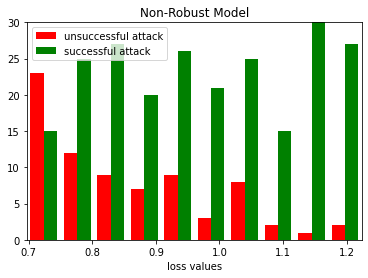

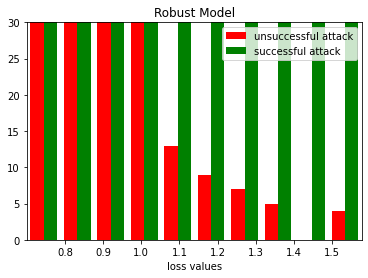

In [43]:
list_logger = Logger.list_logger("../results/hist")
for logger in list_logger:
    config = logger.load_config()
    print(config)
    hist = logger.load_hist()
    loss = np.array(hist["loss"])
    mask = np.array(hist["correct"], dtype=bool).squeeze()
    loss_correct = loss[mask]
    loss_fail = loss[~mask]
    
    min_loss, max_loss = loss_fail.min(), loss_correct.max()
    loss_correct = loss_correct[loss_correct >= min_loss]
    loss_fail = loss_fail[loss_fail <= max_loss]
    print(min_loss, max_loss)
    
    plt.figure()
    if config.target_model_type == CifarModel.MADRY_MODEL.name:
        title = "Robust Model"
    else:
        title = "Non-Robust Model"
    plt.title(title)
    plt.hist([loss_correct, loss_fail], bins=10, color=["red", "green"], label=["unsuccessful attack", "successful attack"])
    plt.legend()
    
    plt.xlim(min_loss, max_loss)
    plt.ylim(0, 30)
    plt.xlabel("loss values")

{'output_path': 'results/hist', 'dataset': 'CIFAR', 'source_model_name': 'train_0', 'target_model_name': 'train_1', 'attacker': 'FGSM_ATTACK', 'batch_size': 128, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'VGG_16', 'target_model_type': 'VGG_16', 'attacker_params': {'eps': 0.03125, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}
{'output_path': 'results/hist', 'dataset': 'CIFAR', 'source_model_name': 'adv_trained', 'target_model_name': 'secret', 'attacker': 'FGSM_ATTACK', 'batch_size': 128, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'MADRY_MODEL', 'target_model_type': 'MADRY_MODEL', 'attacker_params': {'eps': 0.03125, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}


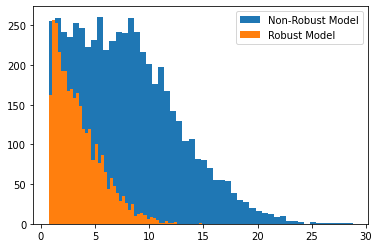

In [36]:
plt.figure()
list_logger = Logger.list_logger("../results/hist")
for logger in list_logger:
    config = logger.load_config()
    print(config)
    hist = logger.load_hist()
    loss = np.array(hist["loss"])
    mask = np.array(hist["correct"], dtype=bool).squeeze()
    loss_correct = loss[mask]
    loss_fail = loss[~mask]
    if config.target_model_type == CifarModel.MADRY_MODEL.name:
        label = "Robust Model"
    else:
        label = "Non-Robust Model"
    plt.hist(loss_fail, bins=50, label=label)
    plt.legend()

# Histogram of $V_i$ for different models.

{'output_path': 'results/hist_2', 'dataset': 'CIFAR', 'source_model_name': 'adv_trained', 'target_model_name': 'secret', 'attacker': 'FGSM_ATTACK', 'batch_size': 128, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'MADRY_MODEL', 'target_model_type': 'MADRY_MODEL', 'attacker_params': {'eps': 0.03125, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}
-575.1
32.489999999999995
0.0018064148025587201 7.906302452087402
{'output_path': 'results/hist_2/', 'dataset': 'CIFAR', 'source_model_name': 'train_0', 'target_model_name': 'train_1', 'attacker': 'FGSM_ATTACK', 'batch_size': 128, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'VGG_16', 'target_model_type': 'VGG_16', 'attacker_params': {'eps': 0.03125, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}
-332.8
56.71999999999999
-0.0 23.07944107055664
{'output_path': 'results/hist_2/', 'dataset': 'CIFAR', 'source_model_name': 'train_0', 'target_model_name'

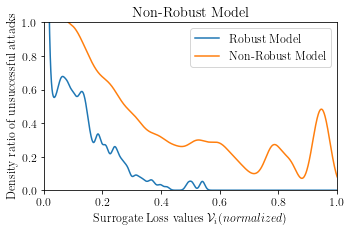

In [9]:
from scipy.stats import gaussian_kde
fig, ax = plt.subplots(1, 1, figsize=set_size(350, subplots=(1,1)))
fig.tight_layout()
palette = seaborn.color_palette()
green_color = palette[0]
red_color = palette[1]

list_logger = Logger.list_logger("../results/hist_2")
i = 0
for logger in list_logger:
    if i >= 2:
        break
    config = logger.load_config()
    print(config)
    hist = logger.load_hist()
    loss = np.array(hist["source"]["loss"])
    indices = loss.argsort()[::-1]
    mask = np.array(hist["target"]["correct"], dtype=bool).squeeze()
    loss_correct = loss[mask]
    loss_fail = loss[~mask]
    print((1-mask[indices].sum()/1000)*100)
    print((1-mask.sum()/len(mask))*100)
    
    min_loss, max_loss = loss_fail.min(), loss_correct.max()
    #loss_correct = loss_correct[loss_correct >= min_loss]
    #loss_fail = loss_fail[loss_fail <= max_loss]
    print(min_loss, max_loss)
    
    x = np.linspace(0, loss.max(), 1000)
    kde_correct = gaussian_kde(loss_correct)
    kde_fail = gaussian_kde(loss_fail)
    kde = gaussian_kde(loss)
    density_correct = kde_correct(x)
    density_fail = kde_fail(x)
    density = kde(x)
    ratio = density_correct / density
    
    x = x/loss.max()
    
    if config.target_model_type == CifarModel.MADRY_MODEL.name:
        title = "Robust Model"
    elif config.source_model_type == config.target_model_type:
        continue
    else:
        title = "Non-Robust Model"
    ax.set_title(title)
    #ax[i].hist([loss_correct, loss_fail], bins=30, color=[red_color, green_color], label=["unsuccessful attack", "successful attack"], density=True)  
    #ax[i].plot(x, density_correct, label="correct")
    #ax[i].plot(x, density_fail, label="fail")
    ax.plot(x, ratio, label=title)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel(r"Surrogate Loss values $\mathcal{V}_i$ (normalized)")
    ax.set_ylabel(r"Density ratio of unsuccessful attacks")
    #ax[i].yaxis.set_major_formatter(PercentFormatter(xmax=1))
    ax.legend()
    i += 1
print(i)
fig.savefig("../figures/histogram_Vi.pdf", format='pdf', bbox_inches='tight')

# Histogram of $V_i$ for different attacks.

{'output_path': 'results/hist_fgsm_vs_pgd', 'dataset': 'MNIST', 'source_model_name': 'train_0', 'target_model_name': 'train_1', 'attacker': 'PGD_ATTACK', 'batch_size': 1000, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'MODEL_A', 'target_model_type': 'MODEL_A', 'attacker_params': {'eps': 0.3, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}
{'output_path': 'results/hist_fgsm_vs_pgd', 'dataset': 'MNIST', 'source_model_name': 'train_0', 'target_model_name': 'train_1', 'attacker': 'FGSM_ATTACK', 'batch_size': 1000, 'model_dir': '/checkpoint/hberard/OnlineAttack/pretained_models/', 'source_model_type': 'MODEL_A', 'target_model_type': 'MODEL_A', 'attacker_params': {'eps': 0.3, 'clip_min': 0.0, 'clip_max': 1.0, 'targeted': False}}


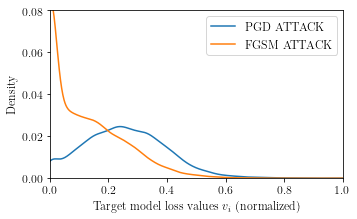

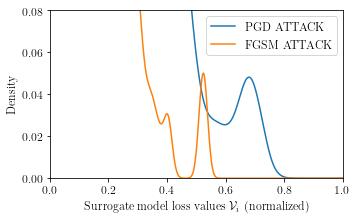

In [11]:
from scipy.stats import gaussian_kde
fig1, ax1 = plt.subplots(1, 1, figsize=set_size(350, subplots=(1,1)))
fig2, ax2 = plt.subplots(1, 1, figsize=set_size(350, subplots=(1,1)))

fig1.tight_layout()
fig2.tight_layout()

palette = seaborn.color_palette()
green_color = palette[0]
red_color = palette[1]

list_logger = Logger.list_logger("../results/hist_fgsm_vs_pgd/")
for logger in list_logger:
    config = logger.load_config()
    print(config)
    hist = logger.load_hist()
    loss = np.array(hist["target"]["loss"])
    indices = loss.argsort()[::-1]
    mask = np.array(hist["target"]["correct"], dtype=bool).squeeze()
    loss_correct = loss[mask]
    loss_fail = loss[~mask]
    
    min_loss, max_loss = loss_fail.min(), loss_correct.max()
    
    x = np.linspace(0, loss.max(), 1000)
    kde_correct = gaussian_kde(loss_correct)
    kde_fail = gaussian_kde(loss_fail)
    kde = gaussian_kde(loss)
    density_correct = kde_correct(x)
    density_fail = kde_fail(x)
    density = kde(x)
    ratio = density
    #ratio = density_fail / density
    
    title = config.attacker.replace("_", " ")
    x = x/loss.max()
    
    #ax.set_title(r"Distribution of the target model loss values $v_i$")
    ax1.plot(x, ratio, label=title)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 0.08)
    ax1.set_xlabel(r"Target model loss values $v_i$ (normalized)")
    ax1.set_ylabel(r"Density")
    ax1.legend()
    
    
    # Successful vs unsuccessful
    loss = np.array(hist["source"]["loss"])
    indices = loss.argsort()[::-1]
    mask = np.array(hist["target"]["correct"], dtype=bool).squeeze()
    loss_correct = loss[mask]
    loss_fail = loss[~mask]
    
    min_loss, max_loss = loss_fail.min(), loss_correct.max()
    
    x = np.linspace(0, loss.max(), 1000)
    kde_correct = gaussian_kde(loss_correct)
    kde_fail = gaussian_kde(loss_fail)
    kde = gaussian_kde(loss)
    density_correct = kde_correct(x)
    density_fail = kde_fail(x)
    density = kde(x)
    ratio = density_correct /density
    
    title = config.attacker.replace("_", " ")
    x = x/loss.max()
    
    #ax.set_title("Ratio of unsuccessful attacks")
    ax2.plot(x, ratio, label=title)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 0.08)
    ax2.set_ylabel(r"Density")
    ax2.set_xlabel(r"Surrogate model loss values $\mathcal{V}_i$ (normalized)")
    #ax[1].set_ylabel(r"Density")
    ax2.legend()

fig1.savefig("../figures/fgsm_vs_pgd_loss.pdf", format='pdf', bbox_inches='tight')
fig2.savefig("../figures/fgsm_vs_pgd_ratio.pdf", format='pdf', bbox_inches='tight')

# Madry Cifar FGSM

In [40]:
list_loss = [1.1977276802062988, 0.03582444414496422, 3.688880205154419, 0.0008993871742859483, 0.013897906988859177, 0.010456537827849388, 1.1965867280960083, 4.020186424255371, 1.5252307653427124, 2.2383947372436523, 1.8311183452606201, 0.0005125877796672285, 0.033412907272577286, 0.0003626880934461951, 0.00047743841423653066, 1.529745101928711, 0.3187263607978821, 0.015223385766148567, 2.4197869300842285, 0.0003691230376716703, 0.02579684555530548, 0.07687299698591232, 2.731588363647461, 0.0011973362416028976, 3.9433608055114746, 0.029824355617165565, 3.8009262084960938, 2.121493101119995, 0.0012630588607862592, 0.02607109397649765, 1.976636528968811, 0.9059514999389648, 1.4299994707107544, 3.9364962577819824, 0.002399781486019492, 1.1572396755218506, 3.271348237991333, 1.9021375179290771, 0.00029797881143167615, 0.0014334175502881408, 0.001930398982949555, 1.3328121900558472, 2.3417201042175293, 2.352886438369751, 3.336562395095825, 0.00010168035078095272, 0.5123646259307861, 0.16540952026844025, 1.091935157775879, 4.396083831787109, 0.13953861594200134, 1.3279519081115723, 0.19735084474086761, 0.22064438462257385, 0.00016711745411157608, 0.006614102050662041, 3.2310986518859863, 2.7350881099700928, 1.863900065422058, 6.469855785369873, 0.0001591317413840443, 0.7971846461296082, 0.138736292719841, 0.023520277813076973, 5.021372318267822, 2.5729315280914307, 0.13292783498764038, 0.00019810620869975537, 1.987807273864746, 5.0912580490112305, 0.45183664560317993, 0.08474411070346832, 0.003919064532965422, 0.0032076595816761255, 0.11670459061861038, 0.03923603519797325, 0.009659101255238056, 0.004875438287854195, 3.327833414077759, 0.0003694805200211704, 0.010855194181203842, 3.115684986114502, 0.014960943721234798, 0.004083035048097372, 0.017292911186814308, 8.959798812866211, 0.04230446740984917, 1.2738316059112549, 0.5561345815658569, 0.8702748417854309, 0.00022432672267314047, 1.5855997800827026, 0.018089553341269493, 4.4728569984436035, 6.456819534301758, 0.06211550533771515, 0.021410057321190834, 0.14980380237102509, 0.0022877492010593414, 0.00015829740732442588, 1.0171252489089966, 0.00753796985372901, 0.124850794672966, 0.0016243371646851301, 0.00038389943074434996, 0.0022193582262843847, 3.4198720455169678, 1.524466633796692, 0.034720733761787415, 0.00035363141796551645, 1.2015972137451172, 2.143240213394165, 0.1742151826620102, 0.033919256180524826, 0.026658250018954277, 0.014368287287652493, 0.004008592572063208, 0.9961910247802734, 1.1825414896011353, 2.436532974243164, 3.9391164779663086, 1.6497023105621338, 0.03229914605617523, 0.0003097769513260573, 3.56889009475708, 4.213136672973633, 0.10228955000638962, 0.15015338361263275, 7.500258922576904, 2.3061094284057617, 0.06785330921411514, 0.00020585325546562672, 3.4536986351013184, 0.0008742563077248633, 0.0006951061659492552, 0.8773252964019775, 0.0009569118265062571, 0.0010094314347952604, 0.0020817292388528585, 2.5482778549194336, 0.032449640333652496, 0.15110443532466888, 0.002551397541537881, 0.012830797582864761, 0.007482124026864767, 0.09743625670671463, 1.3939354419708252, 0.6386061310768127, 0.04470619559288025, 0.7941036224365234, 0.10146506875753403, 0.021137678995728493, 4.924630641937256, 0.021750949323177338, 0.6801318526268005, 1.4115570783615112, 3.951890707015991, 0.00014935807848814875, 0.992634654045105, 0.0004727914638351649, 7.450303382938728e-05, 2.8133444786071777, 6.238151550292969, 0.4920370280742645, 0.6951572895050049, 0.6812273859977722, 4.919272422790527, 5.649757385253906, 7.656604766845703, 3.264559030532837, 0.0005465444410219789, 0.09941427409648895, 0.037079036235809326, 0.32856661081314087, 0.02805236354470253, 0.00020203932945150882, 0.19360984861850739, 0.09575378149747849, 4.5017900466918945, 0.0006008726777508855, 0.0002890407631639391, 0.07459938526153564, 0.15328174829483032, 0.6709126234054565, 0.001191025716252625, 0.0018829250475391746, 4.391299724578857, 0.16262799501419067, 2.820617437362671, 0.934415876865387, 0.003559327218681574, 1.5633234977722168, 0.4594997465610504, 0.12207045406103134, 2.542365550994873, 0.4648944139480591, 0.0009722749819047749, 0.015647608786821365, 0.000854841957334429, 0.019524531438946724, 3.2800745964050293, 6.6869730949401855, 0.006078684702515602, 0.0017810686258599162, 1.7525635957717896, 0.4580719470977783, 0.04241073504090309, 0.11479707807302475, 0.0006313714548014104, 1.879384160041809, 4.354791641235352, 0.10069844126701355, 0.00021717573690693825, 2.0183002948760986, 0.038382306694984436, 0.0030687404796481133, 0.00032074074260890484, 0.0007053509471006691, 3.787135601043701, 0.002228278899565339, 0.07314042001962662, 0.24440860748291016, 0.0024018031544983387, 0.19490951299667358, 0.2675100564956665, 0.19143058359622955, 7.785139560699463, 0.013368964195251465, 0.0018716213526204228, 4.493064880371094, 0.0030652941204607487, 7.450303382938728e-05, 5.325814723968506, 7.58493709564209, 0.06479077786207199, 0.0010207447921857238, 0.07448884844779968, 1.608513355255127, 0.3168141543865204, 0.00016652150952722877, 0.001627550576813519, 0.02454359643161297, 8.279834747314453, 0.0031177031341940165, 7.390703103737906e-05, 1.239441156387329, 0.00020990552729927003, 0.6737833619117737, 0.0027664743829518557, 1.1336740255355835, 3.1947500705718994, 0.16955560445785522, 0.0022354156244546175, 1.0455745458602905, 2.083901882171631, 9.509170532226562, 1.0450453758239746, 0.00026854246971197426, 0.03523769974708557, 0.18624867498874664, 2.2698004245758057, 5.689395904541016, 2.1658995151519775, 0.6770848631858826, 3.5501670837402344, 0.07677385956048965, 4.914331436157227, 0.059849150478839874, 0.0030197754967957735, 0.7766869068145752, 0.8276842832565308, 0.002533918246626854, 0.2349715530872345, 3.866057872772217, 11.785512924194336, 2.0497660636901855, 4.745686054229736, 2.5919570922851562, 1.3061497211456299, 0.9610618352890015, 0.452125608921051, 1.21702241897583, 0.07355041056871414, 0.00010716341057559475, 5.329212665557861, 0.001167450100183487, 0.0005268854438327253, 0.026871105656027794, 0.0006405447493307292, 0.7866207361221313, 0.00029869386344216764, 0.37254300713539124, 0.015752404928207397, 0.8531617522239685, 0.035803280770778656, 0.01759152114391327, 0.0016525434330105782, 0.0023469780571758747, 0.012265610508620739, 0.9297188520431519, 0.03515898063778877, 0.02823316864669323, 0.09789759665727615, 0.0027756281197071075, 0.0008962904685176909, 3.0543484687805176, 5.456476211547852, 3.4075117111206055, 0.19313186407089233, 4.524494171142578, 0.31701672077178955, 0.0017964191501960158, 8.111748695373535, 0.052114613354206085, 0.21518810093402863, 0.0025733946822583675, 0.6374732255935669, 0.042006175965070724, 0.003810527501627803, 0.0832844153046608, 0.0029325359500944614, 3.422293186187744, 2.050402879714966, 6.749496936798096, 0.05541331693530083, 1.7199305295944214, 3.357882022857666, 1.4145352840423584, 0.03543389216065407, 0.9161480665206909, 0.00044169207103550434, 0.0023261650931090117, 1.1986725330352783, 0.7308886647224426, 2.106999158859253, 0.08209989964962006, 0.121198870241642, 4.4025468826293945, 0.003949224483221769, 0.11632274091243744, 9.948246002197266, 0.0002520958660170436, 3.257129669189453, 2.4385857582092285, 3.4209728240966797, 0.053478680551052094, 0.07292743772268295, 0.001419847016222775, 0.0010495636379346251, 1.7879202365875244, 0.5822535753250122, 0.025749562308192253, 0.005252134520560503, 5.6622808187967166e-05, 8.063033103942871, 5.154031276702881, 4.243017196655273, 7.879849433898926, 2.3758747577667236, 0.07498577237129211, 2.452579975128174, 0.00025412190007045865, 0.00045849301386624575, 0.9582528471946716, 0.0004314445541240275, 0.021779527887701988, 0.015392791479825974, 0.10554958879947662, 9.8688325881958, 0.0018403275171294808, 0.26125532388687134, 0.0005785936955362558, 0.14587697386741638, 0.12302001565694809, 0.0004640932602342218, 0.047120023518800735, 0.07290782034397125, 2.111888885498047, 0.7778920531272888, 0.006009367760270834, 0.23946724832057953, 0.006981147453188896, 0.0010937429033219814, 1.0522613525390625, 0.2032109647989273, 5.2845940589904785, 2.6847667694091797, 3.9765796661376953, 0.5281532406806946, 0.0005417786305770278, 2.4204797744750977, 0.00017307691450696439, 0.0006192197324708104, 1.3665170669555664, 1.3787932395935059, 0.6276221871376038, 0.07363513857126236, 0.07075490057468414, 0.03551270440220833, 0.0006367324967868626, 0.0020487764850258827, 1.0065159797668457, 0.12340184301137924, 0.001479246304370463, 2.4531631469726562, 3.103728771209717, 0.0035373514983803034, 3.085416555404663, 0.0011519708205014467, 2.08101749420166, 0.0009218971827067435, 0.004619640298187733, 0.19619280099868774, 0.0008512687054462731, 0.00037377048283815384, 9.536288416711614e-05, 0.23742027580738068, 0.0003135904553346336, 1.0318970680236816, 2.8567771911621094, 0.39237090945243835, 4.508170127868652, 0.3132466673851013, 0.0015792291378602386, 0.6550477743148804, 0.002675645984709263, 5.7941131591796875, 0.16603675484657288, 0.10495686531066895, 0.001029319129884243, 2.426440715789795, 0.01727147027850151, 0.12551943957805634, 2.6835267543792725, 1.0146583318710327, 0.021770428866147995, 0.0034824698232114315, 6.626812934875488, 0.03835821524262428, 3.258013963699341, 0.0004920940846204758, 3.1548285484313965, 0.15160733461380005, 0.41040515899658203, 0.0016872945707291365, 6.32352352142334, 2.7930195331573486, 0.00023898606013972312, 0.3357754647731781, 1.3330349922180176, 0.8663926124572754, 0.002865734277293086, 0.00035577642847783864, 1.1307826042175293, 0.007124258670955896, 0.030590038746595383, 6.589347839355469, 3.3059756755828857, 0.2450471818447113, 4.322259902954102, 0.009935213252902031, 4.813170433044434, 0.0004887578543275595, 0.46072250604629517, 2.83007550239563, 1.8273817300796509, 0.25013646483421326, 0.0003828269545920193, 0.008389941416680813, 0.0010494445450603962, 2.0387208461761475, 0.5975020527839661, 0.000399033073335886, 6.55305290222168, 1.2799052000045776, 0.00888749584555626, 0.046691764146089554, 7.255384922027588, 0.13427457213401794, 2.3560216426849365, 1.8477462530136108, 0.002334847114980221, 0.027413949370384216, 0.8929444551467896, 0.002587187336757779, 0.10922138392925262, 1.4207680225372314, 0.08239635080099106, 0.1890306919813156, 0.000788139586802572, 0.03497297316789627, 0.009933442808687687, 0.01972885988652706, 0.00027223696815781295, 0.007464139256626368, 0.00028689560713246465, 0.2136812061071396, 0.932762861251831, 1.260977864265442, 0.14685115218162537, 0.7850655317306519, 2.4976441860198975, 6.656841278076172, 0.6161754131317139, 0.0075578466057777405, 0.0011519708205014467, 0.0012977044098079205, 7.323101997375488, 0.0006519814487546682, 4.093702793121338, 0.0023971651680767536, 0.007283444050699472, 0.004224780946969986, 0.6457551717758179, 0.001672894461080432, 0.3960770070552826, 0.00023755589791107923, 0.0007776573766022921, 3.84989595413208, 0.0032414060551673174, 0.6405857801437378, 0.0004337085410952568, 0.005819402169436216, 1.236444354057312, 0.010580161586403847, 0.05073757842183113, 0.022997334599494934, 0.02245744876563549, 0.01170811615884304, 0.22260361909866333, 0.0001726001501083374, 1.0253127813339233, 9.193766593933105, 0.0024251118302345276, 3.333812713623047, 0.029962847009301186, 0.0013262771535664797, 0.5820634961128235, 0.03655911237001419, 0.0019327785121276975, 0.000860201776959002, 0.01089623011648655, 0.00037305548903532326, 0.00027259447961114347, 0.000271521887043491, 0.20834824442863464, 0.0016041041817516088, 0.24672472476959229, 1.156928539276123, 2.47952248173533e-05, 4.565107822418213, 3.878432035446167, 0.1434742510318756, 2.598304271697998, 0.754932165145874, 0.725031852722168, 5.08088493347168, 0.12544582784175873, 0.007813840173184872, 0.10308023542165756, 0.0012706785928457975, 1.0864503383636475, 7.946038722991943, 1.1580415964126587, 0.2288724184036255, 3.078489065170288, 0.058945417404174805, 3.292661666870117, 0.9508293271064758, 0.010972166433930397, 4.7316741943359375, 0.00033968876232393086, 5.539116382598877, 4.44480037689209, 0.0004389514506328851, 0.039538364857435226, 0.00019059749320149422, 5.303518295288086, 0.030092064291238785, 0.07640539109706879, 2.6000678539276123, 1.1766239404678345, 0.891191840171814, 0.023843923583626747, 0.05164603888988495, 0.007379889953881502, 1.7924264669418335, 3.638320207595825, 0.031043274328112602, 1.0142470598220825, 0.00029202012228779495, 0.037320464849472046, 0.0010345588671043515, 0.02509816735982895, 7.079499244689941, 0.7528742551803589, 0.00041559641249477863, 0.8399751782417297, 4.442458629608154, 0.3247067928314209, 3.94531512260437, 0.16602575778961182, 0.023917602375149727, 0.0004219118563923985, 0.0005647733341902494, 0.0052381413988769054, 0.7594212889671326, 0.4062768220901489, 0.5569170117378235, 0.0009664393728598952, 0.009720728732645512, 0.0016569469589740038, 0.00047708096099086106, 0.0003657863999251276, 3.1014151573181152, 3.0255203247070312, 0.02433280274271965, 0.006648681126534939, 1.478139042854309, 0.001328658196143806, 0.2429349422454834, 0.906178891658783, 0.02316903881728649, 0.10991422832012177, 0.0012992521515116096, 0.0013428251259028912, 0.0002917817619163543, 1.0931066274642944, 0.0011192255187779665, 2.438108444213867, 1.8460606336593628, 9.312509536743164, 0.17922352254390717, 1.7506697177886963, 0.23194186389446259, 0.04050067067146301, 0.0037796504329890013, 0.32174989581108093, 0.13402698934078217, 6.884642124176025, 5.479885578155518, 1.1269254684448242, 2.9148776531219482, 0.005261977203190327, 0.0020687624346464872, 0.08853157609701157, 3.4025931358337402, 2.5410592555999756, 1.7974777221679688, 0.0021586944349110126, 0.04910251125693321, 0.015047844499349594, 0.03838689625263214, 0.09777295589447021, 0.0018578189192339778, 0.7918314933776855, 0.0001823735801735893, 0.62894606590271, 3.171380043029785, 5.605239391326904, 0.031049862504005432, 0.032630231231451035, 0.0004408579843584448, 2.774498701095581, 0.33546099066734314, 0.34619957208633423, 0.00046588058467023075, 0.0014427024871110916, 0.0011254174169152975, 4.861551284790039, 0.0004818470624741167, 4.150848865509033, 6.341252326965332, 0.0008964095613919199, 3.2502706050872803, 1.429357886314392, 1.5726405382156372, 1.2806211709976196, 0.015290423296391964, 0.08247429877519608, 0.606646716594696, 0.0028204445261508226, 3.0341577529907227, 1.4744057655334473, 0.009090464562177658, 0.0716230571269989, 2.012063980102539, 0.053184494376182556, 0.5227857828140259, 6.486820220947266, 0.04246295243501663, 0.0049908580258488655, 5.465356349945068, 0.00013934595335740596, 3.252102851867676, 1.659595251083374, 0.027826424688100815, 0.5505667924880981, 0.0004932855372317135, 0.6138215065002441, 0.0004752936656586826, 0.002446041675284505, 0.030894646421074867, 0.00040558696491643786, 0.10703414678573608, 0.05138630419969559, 0.12524117529392242, 2.4919986724853516, 0.20531629025936127, 0.7646719217300415, 0.32608214020729065, 0.00018320789968129247, 0.0008361419313587248, 3.84271240234375, 0.903644323348999, 2.154405355453491, 1.2840278148651123, 2.2606654167175293, 0.03163248300552368, 0.009070736356079578, 0.03198249638080597, 0.00047017011092975736, 0.00025960413040593266, 0.1331409364938736, 0.0038908030837774277, 4.781896591186523, 0.2988394796848297, 5.907731533050537, 0.4118843078613281, 0.0032370095141232014, 0.9550652503967285, 1.4728797674179077, 0.00013720047718379647, 0.608195424079895, 5.307757377624512, 1.6228208541870117, 0.00035279724397696555, 0.0010954099707305431, 6.828787326812744, 0.17621468007564545, 2.294732093811035, 0.00020466140995267779, 0.02838647924363613, 0.0012304362608119845, 5.091335773468018, 0.002454365836456418, 1.2174596786499023, 0.0012209111591801047, 0.0029459670186042786, 0.05624767765402794, 0.023134443908929825, 0.01794051006436348, 0.000514017534442246, 0.0009806115413084626, 0.046814970672130585, 0.23011089861392975, 2.8601393699645996, 0.00020776021119672805, 0.002584690460935235, 0.00021944021864328533, 0.44664302468299866, 3.937753200531006, 0.010476591996848583, 0.009235636331140995, 0.00015889335190877318, 0.004413269460201263, 1.6051697731018066, 0.007809700444340706, 3.531364679336548, 0.08788664638996124, 0.17403408885002136, 2.065826654434204, 0.009589677676558495, 4.66161584854126, 0.7245213985443115, 0.14544014632701874, 0.3716637194156647, 0.0007182164117693901, 0.0010045487433671951, 4.023955821990967, 0.0037773940712213516, 0.08785978704690933, 0.0008233971311710775, 0.5725705027580261, 2.7751221656799316, 0.029132885858416557, 0.0010369406081736088, 0.04311969131231308, 3.962999105453491, 0.22269321978092194, 3.4002275466918945, 0.000291662581730634, 2.64715313911438, 0.5116147994995117, 0.7006822824478149, 1.577136754989624, 3.173313617706299, 0.4056183993816376, 0.0025516352616250515, 1.2025010585784912, 0.00021669900161214173, 0.007696143351495266, 0.1836734116077423, 2.1576648578047752e-05, 3.7637991905212402, 5.759373664855957, 0.06692200154066086, 2.6440274715423584, 0.0003997480380348861, 0.00450690696015954, 0.018568499013781548, 0.007694724015891552, 0.5536586046218872, 0.0006961782928556204, 0.02065529301762581, 0.0005189026123844087, 0.02293884940445423, 5.592520713806152, 9.457772254943848, 0.11388169229030609, 7.994184494018555, 0.21313180029392242, 0.24962589144706726, 0.0015160269103944302, 0.00018916724366135895, 0.22054360806941986, 0.11692234873771667, 0.0011525661684572697, 0.0006272017490118742, 0.00021407696476671845, 0.2784147262573242, 3.2925586700439453, 0.001796538126654923, 0.00874392781406641, 0.15389885008335114, 0.3215535581111908, 3.450394868850708, 2.3866500854492188, 0.002317126141861081, 0.0003895000845659524, 0.0009077242575585842, 0.028761373832821846, 0.005293282680213451, 0.667140543460846, 8.160048484802246, 0.2862517237663269, 0.0877290889620781, 0.0014873405452817678, 4.501989841461182, 5.36067008972168, 4.54112434387207, 0.00035255891270935535, 4.606594085693359, 12.269737243652344, 0.0012413900112733245, 0.00038938093348406255, 0.2292034924030304, 1.3567742109298706, 0.0018090326339006424, 3.10835337638855, 1.9427824020385742, 0.12444478273391724, 3.3993892669677734, 0.00391799584031105, 0.0007129749283194542, 0.0014531777705997229, 2.5864250659942627, 7.962863310240209e-05, 0.0003387354372534901, 0.06716179102659225, 0.10784805566072464, 0.0007674132939428091, 4.135531425476074, 0.000474936212413013, 0.0007564543629996479, 0.21483130753040314, 0.011286343447864056, 5.034034252166748, 3.0198922157287598, 0.0009873997187241912, 0.0007220283732749522, 4.714297771453857, 5.460638046264648, 0.004646456800401211, 0.051630642265081406, 0.0002671123365871608, 0.0026433072052896023, 3.568369150161743, 0.12693582475185394, 0.22143587470054626, 0.4077042043209076, 1.5554938316345215, 0.014613968320190907, 0.38854074478149414, 0.0012755600037053227, 0.007689282298088074, 0.0013016331940889359, 0.02128799818456173, 1.2598323822021484, 6.3774932641536e-05, 0.6085286140441895, 0.6513652801513672, 0.07032497972249985, 0.0015707785496488214, 0.019240062683820724, 0.0005153281381353736, 8.601826667785645, 2.406032085418701, 0.016919786110520363, 0.0011655449634417892, 2.315582036972046, 0.019094698131084442, 4.924574851989746, 0.015361213125288486, 0.052888866513967514, 0.0001776060671545565, 1.2039365768432617, 0.000559292733669281, 0.0012804412981495261, 1.2521432638168335, 0.2066897451877594, 0.00013445904187392443, 0.13364075124263763, 0.30569979548454285, 3.2363815307617188, 0.6567414402961731, 0.003570017870515585, 1.0485799312591553, 0.009210832417011261, 0.5666483640670776, 0.017996594309806824, 0.005448373034596443, 4.143290042877197, 0.07217243313789368, 0.0003500564198475331, 0.0006074252305552363, 0.0006820021662861109, 0.0015880366554483771, 0.02276640757918358, 0.07295137643814087, 0.00042822727118618786, 1.0129523277282715, 6.75563383102417, 1.339195728302002, 0.0004167880106251687, 6.047042369842529, 0.00037448544753715396, 0.005469358526170254, 4.2520856857299805, 0.0017354916781187057, 1.1547287702560425, 0.0016582560492679477, 0.008200427517294884, 0.37378400564193726, 0.06278745830059052, 0.0025830259546637535, 2.0739002227783203, 1.5363188982009888, 0.0010782625759020448, 0.0012730597518384457, 0.5547562837600708, 0.018141884356737137, 0.002529875375330448, 0.8715611696243286, 0.485106885433197, 1.1638422012329102, 0.8048898577690125, 0.012575849890708923, 0.02250407263636589, 0.013937055133283138, 0.052297454327344894, 0.034980688244104385, 0.49228334426879883, 0.06432900577783585, 8.542067527770996, 0.04203200712800026, 0.0034042997285723686, 0.0140783516690135, 0.3116282820701599, 0.08437483757734299, 0.37160322070121765, 0.7399328947067261, 6.005340576171875, 2.5083017349243164, 1.968278169631958, 0.01809142716228962, 0.5716281533241272, 0.0002076410164590925, 0.3028566837310791, 3.222622871398926, 2.8878531455993652, 7.853390216827393, 0.00034600470098666847, 3.4849109649658203, 0.011942907236516476, 2.135481834411621, 0.05245255306363106, 0.006011263467371464, 0.005950355436652899, 0.0003748429589904845, 0.00033408781746402383, 0.3185744881629944, 0.2865537703037262, 0.0021634523291140795, 0.006136860232800245, 0.12539924681186676, 0.013457298278808594, 0.7987855672836304, 1.4664716720581055, 0.028502926230430603, 0.0011622109450399876, 0.000501983508002013, 0.015936151146888733, 0.0003150205302517861, 3.4464869499206543, 0.18465596437454224, 0.017472509294748306, 0.07224196940660477, 0.0012571059633046389, 1.2390449047088623, 0.0012985378270968795, 1.3638882637023926, 0.0019233791390433908, 0.8445231914520264, 0.9845796823501587, 0.0003518439189065248, 1.9845256805419922, 1.1020145416259766, 0.01851806417107582, 0.0005731132114306092, 0.05565114691853523, 0.8424109220504761, 2.9314656257629395, 0.0005958688561804593, 0.48775142431259155, 6.223409175872803, 0.35957959294319153, 0.0013759202556684613, 0.0002631794777698815, 0.6667799949645996, 0.1200350895524025, 0.16181398928165436, 5.926440238952637, 1.072258472442627, 0.07323359698057175, 0.29250308871269226, 0.001515431678853929, 0.00035696811391972005, 0.376374214887619, 0.7282454967498779, 2.7554969787597656, 1.1290544271469116, 0.07922624796628952, 6.437265872955322, 0.7441527247428894, 0.0023074925411492586, 0.22014346718788147, 0.051565881818532944, 0.2440844029188156, 0.9354905486106873, 0.00213668798096478, 0.47187355160713196, 0.09777684509754181, 0.0001616347290109843, 5.798627853393555, 0.7945882081985474, 8.595264434814453, 0.0008173224050551653, 0.013121801428496838, 0.20874829590320587, 1.0522093772888184, 4.356539726257324, 2.5050230026245117, 0.00046826363541185856, 0.30812060832977295, 1.8803513050079346, 0.05459609255194664, 0.0004651656490750611, 0.0008216104470193386, 0.024020371958613396, 0.0009753713966347277, 0.0010201494442299008, 0.8711898326873779, 0.05382226034998894, 0.26375845074653625, 0.003321727504953742, 0.12614277005195618, 0.9678109288215637, 1.441678524017334, 0.4246003031730652, 0.004940563812851906, 0.002200683578848839, 2.3349080085754395, 5.706521987915039, 2.2953333854675293, 0.0375136099755764, 0.6992003917694092, 0.018083933740854263, 0.998276948928833, 0.00016640232934150845, 0.0064545730128884315, 0.008377174846827984, 0.014624306000769138, 5.3165931603871286e-05, 0.001894704531878233, 1.4726617336273193, 0.00015198028995655477, 0.0004920940846204758, 0.0806967169046402, 4.035155296325684, 0.00016068121476564556, 0.0004363300104159862, 0.019810905680060387, 0.012672021985054016, 0.005665672942996025, 0.0316508486866951, 0.42218440771102905, 0.11448924243450165, 0.03732367977499962, 0.0007528808200731874, 0.1271514594554901, 0.008547035045921803, 0.44469428062438965, 0.04739325866103172, 2.3405447006225586, 0.0022226886358112097, 0.20479919016361237, 0.16106386482715607, 0.18687662482261658, 3.368107795715332, 5.654190540313721, 11.148365020751953, 3.0867772102355957, 5.566094875335693, 0.08049985021352768, 0.16263175010681152, 0.02770143561065197, 6.616168022155762, 2.1684839725494385, 0.003400735557079315, 0.7172629833221436, 0.00023529145983047783, 0.7623769640922546, 0.00016950124700088054, 2.4432668685913086, 2.233644485473633, 1.4392247200012207, 0.12062063813209534, 0.016392556950449944, 6.761970520019531, 6.886836528778076, 0.27460142970085144, 0.0030972626991569996, 1.6002745628356934, 0.012510748580098152, 0.01406988874077797, 4.304388999938965, 0.007472776807844639, 0.021834930405020714, 1.1577072143554688, 0.0005770448478870094, 0.3567071855068207, 0.0004967409186065197, 3.347088098526001, 0.0015065044863149524, 4.196667194366455, 2.63423490524292, 4.87717342376709, 1.229443073272705, 0.011255696415901184, 0.0025563915260136127, 0.0014368696138262749, 1.3019154071807861, 4.54548454284668, 0.06484005600214005, 3.323160409927368, 1.493664264678955, 0.013841357082128525, 3.1807312965393066, 0.018856434151530266, 5.2679877281188965, 3.4521231651306152, 0.30082815885543823, 0.0006316096987575293, 2.0448594093322754, 7.216801166534424, 2.2313201427459717, 0.047669149935245514, 0.02688758447766304, 0.029830489307641983, 0.0006709231529384851, 8.609075546264648, 0.20154987275600433, 0.6832678318023682, 0.0001821352052502334, 0.00022575691400561482, 0.0001784403866622597, 0.0005528590409085155, 0.14827178418636322, 0.0008512687054462731, 0.051969874650239944, 0.0012963948538526893, 0.0010205067228525877, 3.384230613708496, 3.1644678115844727, 0.0011441120877861977, 0.0003513672563713044, 1.9201023578643799, 0.017377501353621483, 0.003513474715873599, 0.020494835451245308, 1.8548303842544556, 0.15606191754341125, 0.0004374024283606559, 0.0006416169344447553, 0.0016150538576766849, 1.4928717613220215, 0.9911782145500183, 0.0020988595206290483, 0.0010132422903552651, 5.607063293457031, 0.01376998983323574, 5.664405822753906, 0.013244508765637875, 5.431564807891846, 4.058159828186035, 0.7786116003990173, 1.131691575050354, 0.7123162746429443, 0.015341960825026035, 3.4186129570007324, 0.08918961882591248, 0.0012284121476113796, 0.0011508992174640298, 0.0004266782198101282, 0.0008213722030632198, 2.8393256664276123, 4.005352093372494e-05, 0.003997669089585543, 0.079539954662323, 0.7718619108200073, 0.00032574593205936253, 7.192965507507324, 0.02232339419424534, 1.7513400316238403, 0.0012775840004906058, 0.012560075148940086, 0.9491387009620667, 3.1116671562194824, 0.10288536548614502, 0.291654497385025, 2.0403363704681396, 0.0006043276516720653, 0.039780229330062866, 0.001878284616395831, 0.0006425699684768915, 0.013550562784075737, 0.01791357807815075, 0.13831347227096558, 0.00010549465514486656, 10.48640251159668, 3.344700574874878, 0.005668754689395428, 5.11557674407959, 0.011386057361960411, 0.40099048614501953, 1.260920763015747, 2.377507209777832, 0.03299511969089508, 0.0011951930355280638, 2.3018417358398438, 0.0008704449282959104, 0.33079394698143005, 0.000871278636623174, 4.074097156524658, 1.4415802955627441, 0.00011538793478393927, 1.6141315698623657, 0.9436624646186829, 0.17866921424865723, 1.0391695499420166, 0.0041108159348368645, 0.04778280481696129, 0.848668098449707, 0.033015765249729156, 0.18256932497024536, 2.624508857727051, 1.804748773574829, 0.005359092261642218, 0.0016690860502421856, 0.07394584268331528, 0.028574524447321892, 1.5459997653961182, 3.6497833728790283, 0.003658745903521776, 0.0010839784517884254, 0.0011392300948500633, 3.886685371398926, 0.00025733973598107696, 1.210769534111023, 0.8925368785858154, 0.000254241080256179, 2.6595988273620605, 0.19488567113876343, 1.3290495872497559, 0.053087733685970306, 5.059539318084717, 0.7014411091804504, 6.571874618530273, 0.07706405967473984, 0.0007969540893100202, 0.009746700525283813, 0.5553854703903198, 0.0018504415638744831, 8.034383063204587e-05, 0.002366838976740837, 0.0055246055126190186, 0.0005436849314719439, 0.0002356490003876388, 0.0009277330245822668, 0.0008719933102838695, 0.14352278411388397, 0.00047267231275327504, 3.2732880115509033, 0.41251787543296814, 0.0318525992333889, 0.020751507952809334, 0.000380324519937858, 5.436225414276123, 0.3305017054080963, 0.5547526478767395, 0.004138477612286806, 0.00022921319759916514, 0.04139743000268936, 0.983535885810852, 0.0029444219544529915, 0.024696659296751022, 0.05704395845532417, 0.14590519666671753, 3.3467535972595215, 0.002993033966049552, 0.504173994064331, 2.2821972370147705, 0.0027998790610581636, 2.703810214996338, 0.24979805946350098, 0.17056035995483398, 0.8775907158851624, 5.216884613037109, 0.0048933508805930614, 4.393579959869385, 0.00046433156239800155, 2.2890899181365967, 2.726806163787842, 0.738038182258606, 3.7427785396575928, 2.7679567337036133, 0.30401426553726196, 0.0003367095487192273, 0.0016377858119085431, 0.00181783817242831, 0.11286909878253937, 0.0028469529934227467, 0.001506028464064002, 0.0038319032173603773, 0.00019500737835187465, 0.002125268103554845, 0.0033340840600430965, 1.458258032798767, 3.9638242721557617, 0.9666600227355957, 0.0001854724541772157, 6.016658306121826, 4.340388298034668, 0.00242475513368845, 0.0002320735511602834, 0.07746946811676025, 2.8812413215637207, 0.0010618292726576328, 0.0174254160374403, 0.0018033209489658475, 0.0012380562257021666, 0.0025480680633336306, 3.0474610328674316, 5.183660984039307, 2.1657729148864746, 0.002617150079458952, 0.00024423000286333263, 4.985335826873779, 3.782191514968872, 0.007868129760026932, 0.8808762431144714, 1.1614242792129517, 2.9613895416259766, 0.18386496603488922, 2.0464792251586914, 0.004667102824896574, 0.003230117727071047, 0.004973065573722124, 0.23477475345134735, 0.007723587565124035, 0.01787411794066429, 1.6673023700714111, 0.00765947112813592, 0.006352470256388187, 3.590366840362549, 4.083588600158691, 0.13627441227436066, 0.0026286831125617027, 2.7259888648986816, 0.000842692912556231, 0.030833154916763306, 0.0009214208112098277, 3.4024925231933594, 0.035880569368600845, 0.0011210116790607572, 3.1360769271850586, 0.08193088322877884, 0.24200859665870667, 0.00011216964776394889, 3.5707082748413086, 0.004748971201479435, 3.787644147872925, 0.04811141639947891, 0.04690108075737953, 1.1146159172058105, 1.7068207263946533, 0.09110161662101746, 0.0025827880017459393, 1.5372967720031738, 2.864452600479126, 2.095808744430542, 0.0006914132391102612, 0.00098204065579921, 0.001484959851950407, 0.010432589799165726, 0.0001817776501411572, 0.01270509697496891, 0.45192426443099976, 0.009694874286651611, 2.2828216552734375, 0.08330130577087402, 1.4357185363769531, 2.1427671909332275, 0.0003296785580459982, 1.024297833442688, 0.0611884780228138, 0.023232635110616684, 0.014521271921694279, 0.005583287216722965, 0.0008778294431976974, 0.7384234070777893, 0.0024780300445854664, 0.38433799147605896, 2.068512439727783, 0.00040046300273388624, 0.19483888149261475, 0.0010306290350854397, 0.006874954793602228, 0.6389365196228027, 0.27014920115470886, 0.08495984971523285, 2.144580125808716, 0.006472102366387844, 5.688196182250977, 0.0003156163729727268, 0.0006512666586786509, 0.0006039702566340566, 0.07452292740345001, 0.0007107115816324949, 4.633752346038818, 0.0681033506989479, 0.8944538831710815, 7.652943895664066e-05, 0.007266757544130087, 0.00030179237364791334, 0.0001294529065489769, 0.022543584927916527, 0.00830931682139635, 0.8549299240112305, 2.5644867420196533, 0.0003014348621945828, 2.1291303634643555, 0.0008032671175897121, 3.319150924682617, 0.05674879252910614, 0.00047886825632303953, 0.005809091031551361, 0.005906390026211739, 0.24264374375343323, 0.038480959832668304, 4.530243873596191, 0.5931239128112793, 2.7548022270202637, 0.6215827465057373, 0.0844925045967102, 1.6183991432189941, 0.00226788641884923, 0.18403713405132294, 0.01593521237373352, 0.00033420699764974415, 0.1264358013868332, 0.15369288623332977, 0.33729663491249084, 3.006412982940674, 0.299919068813324, 10.624068260192871, 1.0933656692504883, 0.0005856229108758271, 2.050738573074341, 0.02868121676146984, 0.00027104519540444016, 0.00023862851958256215, 0.09051506966352463, 0.013332853093743324, 9.514852523803711, 0.0024682790972292423, 3.4909491539001465, 1.1934053897857666, 0.021074533462524414, 3.356752634048462, 0.13760678470134735, 0.006228914950042963, 0.0021182496566325426, 1.2312755584716797, 0.3720077872276306, 0.039412081241607666, 3.5442264080047607, 3.957670196541585e-05, 6.119359970092773, 0.32199323177337646, 0.004633167292922735, 0.04917877912521362, 0.013455769047141075, 1.0248918533325195, 0.01698085106909275, 8.333993911743164, 0.13558554649353027, 0.03915281593799591, 0.14885468780994415, 0.0034046561922878027, 0.030681142583489418, 0.021765297278761864, 1.9907944202423096, 0.012990842573344707, 8.016674995422363, 0.7314038872718811, 2.530255079269409, 0.07786412537097931, 0.43634873628616333, 0.024565696716308594, 0.8508952260017395, 3.2225399017333984, 5.72298526763916, 2.0299925804138184, 0.0051337797194719315, 0.00020180096908006817, 0.7423425316810608, 0.005897264927625656, 2.790485143661499, 0.00028046013903804123, 0.01697206124663353, 0.000336590368533507, 0.0006847421173006296, 3.533515691757202, 0.0009465504554100335, 0.06238837167620659, 0.025187097489833832, 0.2975374162197113, 0.2453984022140503, 0.4045616388320923, 3.492661476135254, 4.006664276123047, 0.0035127620212733746, 2.2983832359313965, 0.0009540535393171012, 5.840936660766602, 3.8395023345947266, 0.1709156185388565, 0.00271904026158154, 3.4592573642730713, 4.3512115478515625, 0.002717613708227873, 1.3524625301361084, 0.09716478735208511, 0.0001431601122021675, 0.019789518788456917, 3.0672051906585693, 0.24899311363697052, 0.0038202654104679823, 3.603720188140869, 0.0003703146940097213, 1.8298217058181763, 1.0260417461395264, 0.025877002626657486, 0.0751575157046318, 0.015416738577187061, 1.9675498008728027, 6.568271636962891, 0.012478255666792393, 1.3904776573181152, 0.01993548311293125, 0.000872946111485362, 0.21429485082626343, 0.00014983485743869096, 2.172924757003784, 3.2956995964050293, 0.58555006980896, 0.024459609761834145, 7.408142566680908, 2.035572052001953, 0.0010028815595433116, 1.3601529598236084, 1.9527615308761597, 0.0008247073274105787, 0.00012432756193447858, 0.00020239688456058502, 0.0004314445541240275, 6.2791876792907715, 0.05515320599079132, 4.467448711395264, 0.0003156163729727268, 0.20706477761268616, 0.6073682308197021, 1.4875504970550537, 0.23560760915279388, 6.393045425415039, 0.0029731853865087032, 0.01310168206691742, 0.0014257990987971425, 0.9588512182235718, 1.711229681968689, 0.12496389448642731, 2.1451375484466553, 0.00034517052699811757, 0.018311146646738052, 4.798064231872559, 0.0002675890573300421, 2.2641398906707764, 0.13852325081825256, 0.1479022055864334, 0.3643088936805725, 7.485610008239746, 4.179323196411133, 0.3715187907218933, 0.03705514222383499, 0.0005081792478449643, 0.9406852126121521, 5.5738372802734375, 6.980579853057861, 0.1044289767742157, 0.012661781162023544, 0.002085417043417692, 0.35817819833755493, 0.0012441283324733377, 0.024554412811994553, 1.3293111324310303, 0.058905184268951416, 0.0018630543490871787, 0.0004481264913920313, 0.016553441062569618, 0.22369395196437836, 2.502448320388794, 3.3918538093566895, 2.3110079765319824, 0.14410589635372162, 3.217989444732666, 5.838571071624756, 0.14777563512325287, 0.001001809723675251, 0.03319648280739784, 0.010723584331572056, 0.003474510507658124, 2.4900896549224854, 0.007561041042208672, 9.66541576385498, 0.0007121411035768688, 0.000977276940830052, 0.009259259328246117, 0.0022223317064344883, 0.2189061939716339, 5.701492786407471, 2.0014078617095947, 0.15028385818004608, 4.1710052490234375, 10.642963409423828, 0.013726484030485153, 3.553234577178955, 0.0013894913718104362, 0.1417081207036972, 1.3067245483398438, 0.008166139014065266, 0.0009515525307506323, 0.9653708934783936, 0.0008927173912525177, 0.009007297456264496, 0.042298413813114166, 0.000526289688423276, 0.010571079328656197, 0.0024862352292984724, 1.3701865673065186, 0.0015330478781834245, 0.000144709600135684, 0.0015417367685586214, 0.7125933766365051, 0.004845068324357271, 0.00035637227119877934, 0.8988387584686279, 0.004359385464340448, 1.56063973903656, 3.3611199855804443, 0.4319108724594116, 0.001213529147207737, 4.510611534118652, 1.2268140316009521, 4.5012102127075195, 0.01749441586434841, 0.0006157647585496306, 0.069920115172863, 0.00046433156239800155, 0.0898457020521164, 8.071642875671387, 0.0007232195930555463, 1.763293981552124, 0.7565269470214844, 5.8053239627042785e-05, 0.004064158070832491, 4.953990459442139, 0.03867296501994133, 0.0016931259306147695, 1.539053201675415, 6.492084980010986, 2.1932384967803955, 0.44025731086730957, 0.19967924058437347, 0.008100513368844986, 0.05657690018415451, 0.025026900693774223, 0.5677042007446289, 4.4546217918396, 8.458518028259277, 4.414074897766113, 0.001534000039100647, 0.0004015354788862169, 0.0006229128921404481, 0.0049704560078680515, 0.02511095628142357, 0.007345336023718119, 0.0006834316882304847, 0.2801819443702698, 1.4244904518127441, 0.0012440093560144305, 0.012716161087155342, 4.097006320953369, 0.00015710550360381603, 0.0012896086554974318, 4.189423084259033, 0.03829890117049217, 0.002925998531281948, 0.05293205752968788, 0.00024339574156329036, 0.03837152197957039, 0.022080298513174057, 0.014192714355885983, 6.940290451049805, 9.077502250671387, 3.880957841873169, 0.700780987739563, 7.92710343375802e-05, 0.584124743938446, 2.185603618621826, 0.08389855921268463, 5.809325695037842, 3.503678560256958, 0.038884542882442474, 0.198791965842247, 6.55629628454335e-05, 0.14507973194122314, 0.9801061153411865, 0.5204581022262573, 0.19440898299217224, 0.009434283711016178, 0.6806773543357849, 2.586808113846928e-05, 0.019848888739943504, 0.002438192954286933, 4.546635150909424, 0.1741591989994049, 0.5499684810638428, 0.22808319330215454, 0.10335967689752579, 0.7138299345970154, 0.0006073060794733465, 0.00044169207103550434, 0.03380182757973671, 1.119755744934082, 0.005404741503298283, 7.83934211730957, 0.7398606538772583, 0.007676624692976475, 0.3362869918346405, 0.009776449762284756, 0.16541972756385803, 3.6180920600891113, 7.029616832733154, 0.00012015574611723423, 0.29827186465263367, 1.9981064796447754, 0.5474816560745239, 0.023837639018893242, 4.089443206787109, 5.602602005004883, 0.4169641137123108, 0.5925848484039307, 0.010268595069646835, 0.012350744567811489, 0.0041723111644387245, 0.8356606960296631, 2.963256597518921, 0.013562087900936604, 0.8222802877426147, 0.18340185284614563, 0.26405155658721924, 7.437503814697266, 0.0004297763225622475, 0.0025429551023989916, 0.0014673429541289806, 0.8925368785858154, 0.47287172079086304, 3.433877468109131, 4.725860595703125, 0.01203890424221754, 1.1197973489761353, 0.0009614374139346182, 0.547994077205658, 0.49462980031967163, 1.9831573963165283, 5.674443244934082, 1.9608235359191895, 0.0005933669744990766, 8.114957809448242, 0.05806955322623253, 0.001982748508453369, 0.10571465641260147, 3.5594143867492676, 0.8485598564147949, 0.00413859635591507, 0.009752249345183372, 0.0659947320818901, 0.00035446559195406735, 0.639230489730835, 0.0009703694959171116, 0.09198926389217377, 1.9567105770111084, 0.23999589681625366, 0.0010788579238578677, 0.0005332001601345837, 0.002258371328935027, 5.083795070648193, 0.11060263961553574, 0.0038379596080631018, 0.33532384037971497, 6.812018394470215, 4.300818920135498, 0.00023064337437972426, 0.0015655416063964367, 0.004096094518899918, 1.2990925312042236, 6.017601490020752, 0.12991730868816376, 0.013807261362671852, 5.0029072761535645, 0.39147433638572693, 0.005991000682115555, 0.002034857403486967, 0.001341396477073431, 1.8536019325256348, 5.917680740356445, 2.63667631149292, 0.04420299828052521, 0.004589262884110212, 0.0001793938863556832, 0.00043299360550008714, 4.414963722229004, 4.750414848327637, 4.669736862182617, 3.062356472015381, 0.20647895336151123, 0.008384976536035538, 0.0001716466504149139, 0.005793327931314707, 0.0008143446175381541, 0.1733580380678177, 0.016574544832110405, 0.024950280785560608, 0.5272547006607056, 0.31398263573646545, 0.022128339856863022, 6.472207546234131, 0.001260439632460475, 0.00043025295599363744, 0.0069404239766299725, 0.0032821616623550653, 0.000291662581730634, 0.0004873280122410506, 0.8368160128593445, 0.010739034041762352, 0.011147834360599518, 0.01088278740644455, 3.0100362300872803, 2.454178810119629, 3.912414789199829, 6.05564855504781e-05, 0.00018106251081917435, 0.5383661985397339, 6.031808152329177e-05, 5.916280746459961, 0.0009592937421984971, 0.04457007348537445, 0.07504472136497498, 0.0895518809556961, 0.06841132789850235, 0.004400451667606831, 0.18128354847431183, 6.767702579498291, 0.015769772231578827, 2.751826286315918, 1.080434799194336, 0.24493661522865295, 0.7415614128112793, 0.003233088180422783, 0.09057322144508362, 2.2449889183044434, 1.646342396736145, 0.7371479272842407, 6.2650370597839355, 0.7105734348297119, 4.28800106048584, 11.254047393798828, 3.7974367141723633, 0.2639206349849701, 1.378568410873413, 3.8523318767547607, 0.004036257043480873, 4.720951080322266, 0.25772035121917725, 8.602261543273926, 0.0026366491802036762, 0.0020688814111053944, 0.000653411028906703, 2.8424766063690186, 0.04503422603011131, 2.3664345741271973, 3.6203856468200684, 0.020879587158560753, 0.024054354056715965, 0.1396259069442749, 1.0255554914474487, 0.08234651386737823, 2.905813455581665, 0.03854565694928169, 0.02622160129249096, 2.259787082672119, 0.0019904817454516888, 0.0006087357178330421, 0.30967050790786743, 0.0006760457181371748, 0.0004648081958293915, 0.0003483880718704313, 8.808022499084473, 0.0008487674640491605, 2.2762045860290527, 4.875054359436035, 0.0006269635050557554, 0.0005250982358120382, 5.540751934051514, 0.000393432448618114, 1.975406289100647, 1.6516156196594238, 0.014509640634059906, 0.0008668717346154153, 0.23870886862277985, 3.0585238933563232, 7.499449253082275, 6.364872455596924, 1.1713414192199707, 5.528381824493408, 0.0014392504235729575, 0.0006860524881631136, 0.6723846197128296, 5.368364334106445, 3.3385400772094727, 0.00010227633902104571, 4.304813861846924, 5.122901916503906, 0.176409050822258, 1.3014692068099976, 0.0005743046058341861, 5.637834072113037, 0.0007440659101121128, 7.415379524230957, 3.69720196723938, 4.895584583282471, 0.02172505483031273, 0.0003579214389901608, 0.6189706921577454, 2.5748875486897305e-05, 1.0911123752593994, 0.0014193708775565028, 0.11566979438066483, 5.138566017150879, 6.603413105010986, 0.0016881275223568082, 0.18964308500289917, 0.097562775015831, 3.568734645843506, 3.082648515701294, 0.21365010738372803, 6.582042217254639, 0.08850986510515213, 0.00027247529942542315, 0.0013253247598186135, 0.10079307854175568, 1.1567201614379883, 0.7346687912940979, 0.02322331629693508, 0.011742165312170982, 1.6749647855758667, 0.0596013106405735, 4.7634358406066895, 0.657011091709137, 0.0004601611872203648, 0.8257498741149902, 3.447476863861084, 2.561027765274048, 1.3664772510528564, 4.634404182434082, 2.9686334133148193, 3.8827497959136963, 0.4036545753479004, 0.001650877296924591, 0.0018646011594682932, 2.89687442779541, 0.180158793926239, 0.3423219621181488, 0.03320743888616562, 2.8200502395629883, 1.3361330032348633, 0.011333726346492767, 1.3681294918060303, 0.0013524680398404598, 0.04353007674217224, 5.3881147323409095e-05, 0.024793650954961777, 0.00021371940965764225, 0.0013068715343251824, 0.025149783119559288, 0.001408776268362999, 0.3041430115699768, 8.381511688232422, 3.77130389213562, 5.519376754760742, 0.47667983174324036, 0.0030366519931703806, 0.9368228316307068, 0.5424398183822632, 0.06438500434160233, 0.1557476669549942, 1.5171236991882324, 0.49339330196380615, 3.0230650901794434, 0.15251679718494415, 0.00033849707688204944, 0.5780767202377319, 0.0016501632053405046, 1.255110740661621, 0.8833591938018799, 0.00195229088421911, 1.703697919845581, 0.000490068516228348, 0.8444567322731018, 0.9298428893089294, 0.00026770823751576245, 3.6478891372680664, 0.00024577934527769685, 0.0931805893778801, 0.027200281620025635, 0.6839781403541565, 0.03204691782593727, 0.0002818902430590242, 0.020966792479157448, 4.0351386070251465, 1.049790620803833, 0.06650013476610184, 0.05435767397284508, 0.0017847575945779681, 5.752910614013672, 0.0008272086852230132, 1.4632978439331055, 0.0016958630876615644, 0.18801093101501465, 3.419832944869995, 0.14711666107177734, 0.006548493169248104, 0.00030655929003842175, 0.29401907324790955, 0.0006672301678918302, 0.7363831996917725, 5.240279197692871, 0.003010624088346958, 0.004007405135780573, 0.0709170401096344, 0.0975751057267189, 0.002840296132490039, 8.860468864440918, 1.2589011192321777, 0.9139525294303894, 1.236846685409546, 0.0004524161049630493, 0.014151696115732193, 0.22149653732776642, 1.2734062671661377, 4.637133679352701e-05, 0.0008647278300486505, 0.000886285852175206, 8.503152847290039, 0.8084267973899841, 0.43580350279808044, 1.3827295303344727, 0.07186028361320496, 0.04992854222655296, 0.869361400604248, 0.001510551548562944, 0.08445964008569717, 0.120172418653965, 0.0008966478053480387, 3.4452316761016846, 0.494748055934906, 0.0022261380217969418, 1.4024298191070557, 0.0015711355954408646, 0.5195267200469971, 3.079643964767456, 0.002750782296061516, 0.17870979011058807, 0.13446904718875885, 4.603000640869141, 0.41959136724472046, 0.12167692929506302, 0.0011333954753354192, 0.0001774868869688362, 0.35173559188842773, 0.00011145447206217796, 4.763254642486572, 1.374975562095642, 2.089062452316284, 3.448244333267212, 1.0786548852920532, 0.0006301801186054945, 4.204601764678955, 0.6116220951080322, 1.1088156700134277, 1.3628143072128296, 0.016045140102505684, 0.0005255748401395977, 2.491729736328125, 0.002195806708186865, 3.0149030685424805, 6.485580921173096, 0.44849544763565063, 0.0005104430601932108, 4.2088727951049805, 2.724797248840332, 3.492217540740967, 0.021174676716327667, 0.19687239825725555, 7.471826076507568, 0.8681621551513672, 6.003119945526123, 0.00024875884992070496, 0.8925368785858154, 1.112187385559082, 0.0017378717893734574, 2.3389222621917725, 0.0005211663665249944, 0.00015662873920518905, 8.11976432800293, 5.270171642303467, 0.006299401633441448, 7.033100700937212e-05, 1.912055492401123, 0.10617069154977798, 2.1426684856414795, 0.0012854416854679585, 0.0008724696817807853, 0.45671093463897705, 0.000704278820194304, 0.12744146585464478, 0.040763817727565765, 0.06928107887506485, 0.01364969927817583, 0.24022401869297028, 0.018396588042378426, 1.2219221591949463, 0.004338495433330536, 0.36095643043518066, 0.00600782735273242, 0.061080485582351685, 0.0010712367948144674, 12.389483451843262, 0.11850778013467789, 2.1127872467041016, 2.469809055328369, 5.830168724060059, 0.023848697543144226, 0.14420321583747864, 0.17217063903808594, 1.1493772268295288, 1.4350677728652954, 2.6146488189697266, 0.0013971101725474, 0.0010216975351795554, 0.9580994248390198, 0.031740352511405945, 0.5460163354873657, 0.000286657246761024, 4.460663795471191, 0.0018881603609770536, 6.544376083184034e-05, 0.054863348603248596, 0.0017158561386168003, 3.8587191104888916, 7.675850868225098, 1.6972675323486328, 0.005801031831651926, 0.0015357855008915067, 0.0716853141784668, 0.15705536305904388, 0.0010452766437083483, 0.007999997586011887, 1.5119028091430664, 0.0020736397709697485, 2.0147452354431152, 6.6649932861328125, 0.0022435036953538656, 0.026106515899300575, 0.02684360183775425, 0.004105948377400637, 1.4883527755737305, 0.0002579356369096786, 0.11077317595481873, 0.5441882610321045, 0.05179761350154877, 0.2639140188694, 3.2300658226013184, 0.0028532531578093767, 2.643979549407959, 0.0005214046686887741, 0.1571744680404663, 0.0013390155509114265, 1.9484000205993652, 0.002380634658038616, 0.1335648149251938, 0.009518831968307495, 0.05546530708670616, 0.00026353701832704246, 0.000563224486541003, 0.38148462772369385, 0.0002936885575763881, 0.5353424549102783, 2.983809471130371, 0.07840291410684586, 0.00048780461656861007, 0.6116960644721985, 0.00019298121333122253, 0.0031774768140167, 1.1046619415283203, 0.0008588915807195008, 4.294250011444092, 0.37289077043533325, 2.596245288848877, 0.000310730334604159, 0.0009365463047288358, 0.40088000893592834, 0.0015300721861422062, 0.032385244965553284, 1.8178595304489136, 2.4438273906707764, 2.034349203109741, 10.036205291748047, 0.988795280456543, 0.0004891153075732291, 6.916568279266357, 0.9678924679756165, 0.13247935473918915, 0.2339707314968109, 0.005732524674385786, 0.002466614358127117, 1.1149415969848633, 0.03750212863087654, 2.5999867916107178, 0.2874143719673157, 0.004182757809758186, 0.6721526384353638, 0.5139298439025879, 3.0284903049468994, 0.39727672934532166, 0.44555050134658813, 0.000316212244797498, 5.213954925537109, 0.3584294617176056, 1.6493659019470215, 0.6651660203933716, 0.0005545270396396518, 0.00573963625356555, 1.2986468076705933, 4.00660514831543, 0.0115321921184659, 0.0003830652858596295, 0.0002369599969824776, 0.18545952439308167, 0.5718460083007812, 0.00016604475968051702, 0.3226206600666046, 0.0036354658659547567, 4.644418239593506, 0.28490376472473145, 5.862184047698975, 0.0016746795736253262, 1.8316099643707275, 0.0008001701789908111, 4.809345722198486, 0.00043335105874575675, 0.001927543431520462, 3.926481008529663, 6.522470474243164, 0.007304035592824221, 0.008160226978361607, 2.0167856216430664, 0.0003833036171272397, 0.0016718233237043023, 0.0210834052413702, 3.895218849182129, 2.6645665168762207, 0.0017839246429502964, 0.021596500650048256, 0.0010588521836325526, 7.017248630523682, 0.1475517302751541, 0.0008650851668789983, 0.07806988805532455, 0.8727623224258423, 0.5066052079200745, 3.8203439712524414, 0.0010969580616801977, 0.4748937785625458, 5.4238757002167404e-05, 6.6653265953063965, 5.214224815368652, 5.487353324890137, 0.09495674073696136, 0.059081509709358215, 4.252521514892578, 0.22247308492660522, 0.043665770441293716, 0.00033158526639454067, 8.455853462219238, 2.615673542022705, 0.002167496830224991, 0.00028868322260677814, 0.00029952809563837945, 0.007688217796385288, 0.6583664417266846, 0.0013267532922327518, 0.00850093737244606, 0.006315985694527626, 0.1411060094833374, 3.597036123275757, 0.013439890928566456, 0.00027366707217879593, 2.108225107192993, 0.000962032878305763, 1.8628076314926147, 3.482116460800171, 0.02236524410545826, 1.4589099884033203, 4.827122688293457, 4.7110514640808105, 0.006448650732636452, 0.003228810615837574, 10.521183967590332, 0.8783272504806519, 0.9996281266212463, 0.0010449193650856614, 0.019384704530239105, 0.11834999173879623, 0.005767015740275383, 0.0014569868799299002, 0.10527665913105011, 0.028958959504961967, 0.028118662536144257, 4.518289089202881, 0.001134705264121294, 8.513407707214355, 0.0012693690368905663, 9.687369346618652, 3.5182480812072754, 0.9576316475868225, 0.002011658623814583, 0.570807933807373, 0.003435188438743353, 0.017156990244984627, 3.3230466842651367, 0.06509117782115936, 4.8997392654418945, 0.22860896587371826, 0.006771119311451912, 0.0008335214806720614, 0.00011443436960689723, 1.735048532485962, 0.04083362966775894, 0.0018542492762207985, 0.13891829550266266, 1.3208585977554321, 0.3290597200393677, 0.023964274674654007, 1.6501846313476562, 6.101858615875244, 0.0011152960360050201, 0.1662781536579132, 1.284678339958191, 0.028611479327082634, 3.689530849456787, 0.0006598440813831985, 0.0022637236397713423, 0.18389055132865906, 0.017368128523230553, 0.14992108941078186, 0.25843921303749084, 0.0010943383676931262, 0.08128069341182709, 4.203330993652344, 0.1499176025390625, 0.06292784214019775, 0.03263773024082184, 0.0005087750032544136, 0.0017744047800078988, 0.35488635301589966, 0.7336727976799011, 0.989742636680603, 6.353653589030728e-05, 5.364274329622276e-05, 0.3505205810070038, 3.2640063762664795, 8.581425666809082, 1.9338449239730835, 0.0012309125158935785, 0.05408497527241707, 0.0016088649863377213, 0.006959246937185526, 3.197686195373535, 0.1908278614282608, 0.0041035739704966545, 0.002400257159024477, 0.377996027469635, 1.5448095798492432, 0.739989697933197, 0.5844380259513855, 0.00037472377880476415, 0.0022515917662531137, 0.00547990994527936, 9.178694017464295e-05, 2.5538811683654785, 8.093223571777344, 0.058488693088293076, 0.8195350766181946, 0.0079509187489748, 2.990835189819336, 0.0027492367662489414, 0.1884845644235611, 0.0030718303751200438, 0.011280213482677937, 0.0032370095141232014, 1.9518449306488037, 1.0576176643371582, 0.013352496549487114, 0.19889143109321594, 0.08661673963069916, 0.002551397541537881, 1.161201000213623, 1.1804604530334473, 1.748715877532959, 0.000587767455726862, 0.0003665013937279582, 0.38168078660964966, 6.190749168395996, 0.0899815708398819, 0.08493290841579437, 0.0626073107123375, 0.1016259714961052, 1.4443104267120361, 2.2296814918518066, 0.5574501156806946, 0.34111839532852173, 2.262842893600464, 0.011668290942907333, 0.039215631783008575, 1.904970407485962, 0.7048008441925049, 0.0006161222117953002, 0.4398026466369629, 1.016474723815918, 0.2315719872713089, 0.0003844952443614602, 3.0469958782196045, 0.7798247933387756, 0.0374625138938427, 0.0005704921204596758, 0.0003393312799744308, 1.8848644495010376, 0.8408612012863159, 5.169549942016602, 0.37216514348983765, 0.47396522760391235, 5.826387405395508, 4.727569103240967, 1.0253918170928955, 0.0005310555570758879, 0.00022516099852509797, 0.7069530487060547, 0.05166573449969292, 1.0391061305999756, 5.365646839141846, 11.506074905395508, 1.9100923538208008, 1.1791391372680664, 0.25219058990478516, 0.00022504181833937764, 2.7098193168640137, 5.2559027671813965, 1.7774672508239746, 9.107174992095679e-05, 0.4592559337615967, 0.05222187936306, 0.000500196241773665, 0.0028131932485848665, 0.02520732395350933, 0.1757729947566986, 0.005047554615885019, 0.20916152000427246, 0.78273606300354, 0.9345234036445618, 0.000800408364739269, 0.033993810415267944, 2.9685447216033936, 1.2601919174194336, 0.004719902761280537, 2.8552145957946777, 5.016922950744629, 0.0673702135682106, 0.00615048548206687, 0.0013372297398746014, 3.6628987789154053, 0.3124719262123108, 0.009262211620807648, 0.00831369124352932, 0.036792855709791183, 1.3592528104782104, 0.6960523724555969, 0.000560245884116739, 0.57111656665802, 0.010672987438738346, 0.050935737788677216, 4.190455436706543, 0.00367216719314456, 0.07021985948085785, 0.007717081345617771, 0.0392981581389904, 0.38019275665283203, 0.03650693595409393, 0.001680272980593145, 0.011182139627635479, 0.017112812027335167, 0.002109446795657277, 2.63322114944458, 2.051290988922119, 2.508481502532959, 0.007773742079734802, 3.7584967613220215, 0.9248714447021484, 7.118505001068115, 0.24925152957439423, 10.037489891052246, 0.0032120561227202415, 0.009206816554069519, 7.933875560760498, 8.567548751831055, 3.6870574951171875, 0.4393848180770874, 2.0152275562286377, 0.001741203828714788, 0.0008406681008636951, 0.0018387805903330445, 1.9948794841766357, 0.6705312728881836, 1.3517248630523682, 0.5103565454483032, 0.00012742661056108773, 0.10127516090869904, 0.1551191508769989, 0.00023266946664080024, 0.0032204927410930395, 2.1276378631591797, 0.005947392899543047, 0.0005949157639406621, 0.40334683656692505, 6.084024906158447, 1.2979576587677002, 0.019014699384570122, 0.004572886973619461, 0.0020173690281808376, 0.009495570324361324, 0.04821252450346947, 5.060158729553223, 0.25439414381980896, 3.427785634994507, 0.0035508933942764997, 1.2628084421157837, 0.029114823788404465, 6.38690710067749, 0.034949835389852524, 0.002899967832490802, 6.444353103637695, 0.0008069596369750798, 1.7297998666763306, 5.161649703979492, 0.0033325394615530968, 5.077700614929199, 0.2030370980501175, 0.0018849477637559175, 0.0005210472736507654, 3.112215757369995, 0.46274012327194214, 0.048448555171489716, 9.291959762573242, 0.0003631647559814155, 2.2511487007141113, 8.082063141046092e-05, 0.002141089178621769, 0.284355103969574, 5.417788028717041, 3.4828989505767822, 0.0011993603548035026, 0.00026651646476238966, 1.3494682312011719, 0.366594135761261, 0.0027350897435098886, 0.2164917290210724, 0.006408142391592264, 0.06246744096279144, 2.771743059158325, 0.04361122101545334, 0.17070479691028595, 0.000428942235885188, 1.149794340133667, 0.0004980515805073082, 0.015095285139977932, 0.010364045388996601, 0.18886923789978027, 0.29764217138290405, 0.0025102554354816675, 0.0028055852744728327, 1.4066597032069694e-05, 3.280066967010498, 0.008425877429544926, 2.6186673641204834, 1.5572750568389893, 0.004342293832451105, 0.0055276877246797085, 0.007826733402907848, 0.00027247529942542315, 0.06168656423687935, 0.5230726599693298, 0.033987704664468765, 0.33584174513816833, 0.08762359619140625, 0.011271608993411064, 0.0005837167263962328, 0.0025412903632968664, 0.08992066234350204, 1.5110012292861938, 0.004947680979967117, 0.0004377598816063255, 0.2985532581806183, 0.0004295380203984678, 0.2982752323150635, 0.009154844097793102, 0.007857367396354675, 0.013468706980347633, 0.08345133811235428, 0.002878453116863966, 3.0896897315979004, 0.6619942784309387, 7.671802997589111, 4.005385398864746, 3.1964619159698486, 0.0014937683008611202, 0.015252972021698952, 7.646668434143066, 7.486063259420916e-05, 0.0006192197324708104, 0.00028939827461726964, 0.09395962208509445, 0.001116844010539353, 0.0012334127677604556, 0.0006429274217225611, 0.0868433266878128, 0.22059772908687592, 7.445026397705078, 4.489900588989258, 0.017765795812010765, 8.154354095458984, 0.10405594110488892, 1.221482276916504, 0.00177107285708189, 0.0027141659520566463, 1.741251826286316, 0.0811205506324768, 0.02603079192340374, 0.27054309844970703, 0.7791476249694824, 0.006645483896136284, 0.00012730741582345217, 0.2949688732624054, 0.0007190502947196364, 1.0520955324172974, 6.308438777923584, 0.0007304860628210008, 0.20529522001743317, 0.00047636605449952185, 4.943622589111328, 0.00371718080714345, 0.0011132716899737716, 0.0013567537534981966, 0.0044149309396743774, 0.14982402324676514, 0.05320845916867256, 1.5780186653137207, 0.0003393312799744308, 0.004717767238616943, 0.0007761088781990111, 0.0011523280991241336, 1.78505277633667, 0.05100291967391968, 1.178542137145996, 0.11843249201774597, 0.13641983270645142, 0.0007113072206266224, 1.0659291744232178, 0.5857416391372681, 0.0011261318577453494, 0.0058573270216584206, 1.6470632553100586, 0.011887895874679089, 0.00047791501856409013, 3.9645533561706543, 0.0006550788530148566, 0.3548663854598999, 0.0011126763420179486, 0.0007568117580376565, 0.002695738337934017, 0.00018952481332235038, 0.8353282809257507, 0.01908908598124981, 0.25057804584503174, 0.020109349861741066, 0.0008754473528824747, 0.06591784209012985, 1.1770596504211426, 2.2896149158477783, 0.009015094488859177, 0.2114931046962738, 0.1727333664894104, 7.2931365966796875, 0.007095613982528448, 1.3377878665924072, 0.006590654142200947, 0.9744986891746521, 4.2578864097595215, 0.0004120216181036085, 0.0004943578969687223, 0.001802487880922854, 0.0004904259694740176, 0.014896349981427193, 0.009088692255318165, 0.38830816745758057, 0.0002983363519888371, 0.6470799446105957, 7.0268754959106445, 0.00030894274823367596, 6.020879745483398, 0.0003259842633269727, 0.0008344743982888758, 0.0004353767435532063, 7.002027988433838, 0.04967641457915306, 0.8621933460235596, 0.013854525052011013, 0.1535913646221161, 0.713746190071106, 2.8859195709228516, 1.1779685020446777, 0.006396060809493065, 0.00028046013903804123, 1.9059947729110718, 0.003193043638020754, 0.04539564251899719, 0.717289388179779, 4.853024482727051, 0.0005305789527483284, 0.0009152276325039566, 1.2534589767456055, 0.003141232766211033, 0.36700212955474854, 0.0022864409256726503, 0.832332193851471, 0.08851870149374008, 0.0023365120869129896, 5.0497283935546875, 0.01351410523056984, 0.0010709986090660095, 5.294919013977051, 0.0028675172943621874, 0.0008958140970207751, 5.638490676879883, 0.4785819947719574, 0.0015512587269768119, 0.00026675479602999985, 0.0005712069687433541, 0.005218218546360731, 0.0071723125874996185, 0.0512663759291172, 0.74518883228302, 1.008882761001587, 0.008919632993638515, 0.43586716055870056, 0.9430709481239319, 7.993879318237305, 7.724351406097412, 4.423826694488525, 0.00033146608620882034, 3.9785003662109375, 5.368963718414307, 0.0038410471752285957, 6.249868869781494, 3.4871304035186768, 0.8195269703865051, 0.314039945602417, 2.155109167098999, 5.650328636169434, 0.4232425391674042, 0.5431323051452637, 0.33956483006477356, 0.2927032709121704, 0.001413180842064321, 0.00091856240760535, 1.1569766998291016, 1.6370551586151123, 0.032068509608507156, 1.5798003673553467, 0.3445124924182892, 0.09089797735214233, 0.002920768689364195, 0.00669024558737874, 0.007584466133266687, 0.0016731324139982462, 0.007439527660608292, 2.568118095397949, 1.2049845457077026, 5.956413269042969, 0.001256510615348816, 0.0011155341053381562, 0.001364372787065804, 0.004678256344050169, 0.06425611674785614, 0.0006287504802457988, 3.0944533348083496, 0.0007448997348546982, 0.0008328068652190268, 0.003317806636914611, 1.8211195468902588, 1.3643723726272583, 0.028019212186336517, 0.0033109153155237436, 0.00014494798961095512, 0.006005220115184784, 0.0002584123576525599, 0.825491189956665, 0.8765713572502136, 0.003465482033789158, 3.230052947998047, 0.00030119650182314217, 0.000961913785431534, 2.080632448196411, 0.19974680244922638, 1.462618350982666, 1.843165636062622, 0.021722838282585144, 0.0001934579631779343, 0.00220104050822556, 0.20473887026309967, 0.0002366024418734014, 0.13799752295017242, 0.00042989550274796784, 0.029683532193303108, 0.004273924510926008, 0.0001629458274692297, 0.027191579341888428, 3.473320722579956, 0.0009525052737444639, 0.03254980593919754, 7.426462980220094e-05, 0.0017007424030452967, 6.8845038414001465, 3.772355556488037, 1.5317176580429077, 0.00709821842610836, 0.0005465444410219789, 0.0006413786904886365, 0.006061504129320383, 4.612773418426514, 0.041516486555337906, 0.3601987063884735, 0.12136951088905334, 0.05530752241611481, 4.702956676483154, 5.602679812000133e-05, 2.922534465789795, 0.05907252058386803, 1.2434768676757812, 5.672482967376709, 7.699126243591309, 0.000459565402707085, 0.0004059444472659379, 0.00012039413559250534, 0.0010877889581024647, 0.0054457648657262325, 0.02032851055264473, 1.4280059337615967, 0.22990460693836212, 0.2938987910747528, 0.0004357342259027064, 3.249861240386963, 0.0008021951070986688, 0.0015261442167684436, 1.3827825784683228, 0.014847373589873314, 0.018737105652689934, 0.27110257744789124, 0.06102721393108368, 0.26904574036598206, 1.1344399452209473, 1.4760746955871582, 0.001026103738695383, 0.00010799778101500124, 0.08945389091968536, 0.6035608649253845, 1.3106958866119385, 0.016233760863542557, 0.0016345723997801542, 0.2381892055273056, 0.0006932000978849828, 0.14838020503520966, 0.23677973449230194, 2.500631332397461, 7.506391525268555, 0.026099665090441704, 0.8739738464355469, 2.4005961418151855, 0.0019227842567488551, 2.2158377170562744, 2.105792284011841, 0.006010315380990505, 0.0034872216638177633, 0.00159172632265836, 1.6956048011779785, 1.4782781600952148, 5.965518951416016, 0.45769426226615906, 5.678354740142822, 0.14154577255249023, 1.028277039527893, 0.1434866487979889, 2.4318398573086597e-05, 0.03551420196890831, 0.7334916591644287, 0.009285124950110912, 3.165945291519165, 0.06354454159736633, 0.2607085108757019, 0.0005496421363204718, 0.00022110878489911556, 0.0070052966475486755, 0.018889890983700752, 0.000535821367520839, 0.540557861328125, 3.1798887252807617, 0.0009348789462819695, 5.28818416595459, 0.021220659837126732, 0.002084703417494893, 1.1118440628051758, 1.507070541381836, 3.0424156188964844, 0.06602028757333755, 0.01310132909566164, 2.6196460723876953, 0.0010811204556375742, 0.006535347551107407, 0.0006753309280611575, 0.0012659162748605013, 0.7639548182487488, 0.4081946909427643, 0.00027998341829515994, 0.000300600629998371, 1.0940256118774414, 4.508023262023926, 0.00012885693286079913, 0.0012006701435893774, 0.026346659287810326, 1.425464391708374, 2.746366500854492, 0.007035008631646633, 0.00067223358200863, 2.936593770980835, 0.2980997860431671, 4.023370742797852, 0.0006899837171658874, 0.10563915222883224, 0.00288249459117651, 0.0007757514831610024, 0.0023981165140867233, 0.4728699326515198, 3.7827837467193604, 2.5646283626556396, 0.0009058186551555991, 0.012029482051730156, 0.02971280924975872, 0.01502858567982912, 5.005490303039551, 0.00021526881027966738, 4.899890422821045, 4.25410270690918, 2.686150312423706, 0.49501127004623413, 0.016314687207341194, 0.5708276033401489, 0.000560245884116739, 0.018641864880919456, 4.493311882019043, 0.6395294070243835, 0.0031036799773573875, 0.001540784491226077, 0.001116486731916666, 0.012067761272192001, 0.061108969151973724, 6.44331169128418, 1.328857660293579, 0.45592010021209717, 0.6563141345977783, 0.020851917564868927, 9.48860906646587e-05, 0.15097856521606445, 0.08398778736591339, 0.0001560327800689265, 2.7201004028320312, 0.5847735404968262, 0.0008279233006760478, 0.0006335158832371235, 0.007693067658692598, 0.004565529990941286, 0.0002817710628733039, 1.8806284666061401, 2.2073986530303955, 5.148464679718018, 3.2027969360351562, 0.0007061848300509155, 0.15201251208782196, 1.3169549703598022, 0.00034374051028862596, 0.09676728397607803, 4.518420696258545, 2.3490543365478516, 0.000603493710514158, 0.007746417541056871, 2.8068761825561523, 0.0011982887517660856, 2.430443286895752, 0.0006229128921404481, 0.0015995815629139543, 8.177422569133341e-05, 0.0007980260998010635, 1.3312430381774902, 0.015055829659104347, 0.00019894051365554333, 0.00014161060971673578, 0.00025817399728111923, 0.005933290813118219, 2.429391384124756, 0.22316691279411316, 2.8116018772125244, 0.0004923323867842555, 0.0029483442194759846, 4.523466110229492, 0.49862155318260193, 0.22236552834510803, 0.24574650824069977, 0.00017855956684798002, 0.013388137333095074, 9.108572959899902, 3.194188117980957, 0.08329275250434875, 0.011324767954647541, 0.00782886240631342, 0.0012548437807708979, 0.01949401944875717, 4.218290328979492, 3.084226369857788, 0.003212293842807412, 0.2641671597957611, 0.17087191343307495, 4.748377323150635, 0.0030126445926725864, 5.546626091003418, 0.0006269635050557554, 0.0002908283786382526, 1.8038138151168823, 0.000871159543748945, 0.06499109417200089, 2.2308850288391113, 0.0001358893496217206, 6.568216485902667e-05, 0.00042524831951595843, 0.0006463822210207582, 0.00016664070426486433, 6.525935649871826, 4.472588539123535, 0.2211669236421585, 2.1257004737854004, 0.00032479254878126085, 0.5109962224960327, 0.00043442347669042647, 0.0024857595562934875, 0.0009747759322635829, 0.6223531365394592, 0.11690081655979156, 0.0006191005813889205, 9.393251093570143e-05, 0.029357602819800377, 3.7696805000305176, 7.997790813446045, 8.821098163025454e-05, 0.036478083580732346, 0.016112474724650383, 4.244896411895752, 3.608194351196289, 0.21821407973766327, 0.008385094814002514, 3.096961736679077, 0.7954037189483643, 0.0007605044520460069, 0.2257414162158966, 0.28798389434814453, 0.005546181462705135, 0.009012022987008095, 0.15279851853847504, 0.0001530530134914443, 0.00010263393050990999, 2.025364875793457, 2.1767406463623047, 0.16595375537872314, 0.005816202145069838, 0.0002814135223161429, 1.3923814296722412, 0.0017815446481108665, 2.454094648361206, 3.6127920150756836, 0.0005422552349045873, 1.326099157333374, 0.9103574752807617, 3.45700973412022e-05, 0.11472055315971375, 0.9097122550010681, 0.0036258448380976915, 0.7680743932723999, 7.66666316986084, 0.00011193125828867778, 0.029956253245472908, 0.00013982271775603294, 0.09861744195222855, 0.038237862288951874, 0.03343481197953224, 4.788825035095215, 0.001993456156924367, 3.023815631866455, 6.185479640960693, 0.9372208118438721, 0.43742117285728455, 5.8068413734436035, 0.7159789800643921, 0.002404776168987155, 0.954937756061554, 0.0006202919175848365, 0.0037696745712310076, 0.7239105105400085, 6.401333666872233e-05, 5.195871829986572, 0.00034981805947609246, 1.2484177350997925, 0.5203482508659363, 0.45481544733047485, 0.001593392575159669, 2.396157741546631, 0.00043847484630532563, 0.009181421250104904, 0.0001431601122021675, 0.03243036940693855, 0.07873208820819855, 0.10983091592788696, 5.13696813583374, 0.3749387562274933, 0.13193947076797485, 0.049930132925510406, 0.00028546550311148167, 0.03265146166086197, 3.9434292316436768, 2.1700029373168945, 0.016397951170802116, 0.006035317666828632, 0.0007063039811328053, 0.4959287643432617, 0.0003636414185166359, 0.051854208111763, 0.0002915434306487441, 0.02577976882457733, 0.0043165371753275394, 4.466980457305908, 6.806107044219971, 0.0005297449533827603, 0.015530947595834732, 0.16762509942054749, 8.214616775512695, 0.031171197071671486, 0.007419412489980459, 0.002300237538293004, 0.09089536219835281, 0.00013183678674977273, 6.865908145904541, 0.024105092510581017, 3.357653856277466, 0.00529885571449995, 0.014069771394133568, 5.935014247894287, 0.02306210622191429, 7.023864269256592, 0.045148976147174835, 0.004866540897637606, 0.040109653025865555, 0.0004233417857903987, 0.0005619138828478754, 0.10790146142244339, 0.18507234752178192, 0.008877570740878582, 0.018552232533693314, 0.6456300020217896, 6.183468818664551, 0.025725744664669037, 0.00016556799528189003, 0.2156771868467331, 2.9212646484375, 0.018738508224487305, 0.0009488132782280445, 1.8577678203582764, 1.4876865148544312, 0.0011723319767042994, 0.001492696930654347, 0.026316123083233833, 0.002228278899565339, 0.0006793813081458211, 0.024118823930621147, 0.0035241658333688974, 1.487286925315857, 2.7347776889801025, 0.00013886917440686375, 0.0032305929344147444, 0.3723345398902893, 0.7303239107131958, 1.4962090253829956, 0.968781590461731, 0.036435555666685104, 0.00822596624493599, 0.20356202125549316, 0.008821799419820309, 0.27345824241638184, 0.0015525680501013994, 0.01817653514444828, 8.180318832397461, 0.00038485272671096027, 0.003652332117781043, 1.0854625701904297, 1.6574671268463135, 2.0149929523468018, 7.675479412078857, 0.0006848612101748586, 2.166008710861206, 0.06783950328826904, 0.0005063920398242772, 0.0023393663577735424, 1.5859203338623047, 0.14507199823856354, 6.775927543640137, 5.713675498962402, 0.0007198841194622219, 1.1920858014491387e-05, 1.526078224182129, 0.0017285895301029086, 0.38642042875289917, 5.68537712097168, 0.0009654866298660636, 2.214477062225342, 0.07655778527259827, 0.35513001680374146, 0.05770289897918701, 0.1663205474615097, 6.341733387671411e-05, 2.7394189834594727, 0.02853374369442463, 0.0007286992622539401, 0.21876385807991028, 7.279380798339844, 0.07174589484930038, 0.4115044176578522, 9.593071937561035, 3.0072224140167236, 3.3484902381896973, 0.0021265766117721796, 0.19248610734939575, 0.0008283997885882854, 1.3251574039459229, 10.742452621459961, 1.5257630348205566, 0.004452434368431568, 0.9436435103416443, 0.16373832523822784, 6.579348087310791, 5.195459842681885, 4.377201557159424, 6.6653523445129395, 0.03693624213337898, 0.04513302445411682, 5.460883140563965, 3.895841360092163, 0.6235588192939758, 2.4673421382904053, 0.30237478017807007, 0.09557177871465683, 0.007222376763820648, 0.013890265487134457, 0.001334967790171504, 1.8907246589660645, 0.0038028082344681025, 0.00159172632265836, 0.0004514628672040999, 0.005203039385378361, 0.00029523781267926097, 2.0636351108551025, 0.015170315280556679, 0.000589792791288346, 0.08339529484510422, 0.4607076048851013, 0.0009087961516343057, 0.0014218707801774144, 0.6099311709403992, 0.0004970983718521893, 0.0002924968139268458, 0.00032050241134129465, 0.015436693094670773, 3.412154197692871, 0.0007256020326167345, 0.010922053828835487, 5.412599086761475, 0.016319025307893753, 2.5353102684020996, 4.489053726196289, 0.0027377051301300526, 0.0005071069463156164, 0.01654769480228424, 7.077042102813721, 4.637133679352701e-05, 0.04263683035969734, 2.2918059825897217, 0.0025714922230690718, 0.004738530144095421, 0.00027533553657121956, 0.000529149197973311, 6.663577369181439e-05, 0.0002889215829782188, 0.0004549183649942279, 0.05198345705866814, 0.0007989790174178779, 0.08930192142724991, 1.9600551128387451, 0.030365832149982452, 0.34094879031181335, 0.36024361848831177, 0.09133382886648178, 5.710845947265625, 1.380313754081726, 0.008460630662739277, 0.805541455745697, 3.8022639751434326, 0.23645944893360138, 0.031369924545288086, 0.3263913094997406, 0.0011337526375427842, 0.0027633835561573505, 0.18982680141925812, 0.0007223857101053, 0.07811762392520905, 0.020545054227113724, 0.0006100462633185089, 4.056426525115967, 0.0059351869858801365, 0.011006123386323452, 1.8985055685043335, 0.0004758894501719624, 0.7173834443092346, 0.17260558903217316, 0.0003281293320469558, 4.730718612670898, 4.669116497039795, 0.019993675872683525, 1.655670166015625, 0.024740388616919518, 0.3647337257862091, 0.0009121309849433601, 1.6453282833099365, 0.46188420057296753, 0.09108398109674454, 2.4727373123168945, 1.2541089057922363, 0.383105993270874, 5.833471775054932, 0.015569444745779037, 0.00025281094713136554, 0.007600674405694008, 0.0464789904654026, 0.1076456606388092, 0.7300287485122681, 1.6679515838623047, 0.00338564720004797, 0.5745688676834106, 0.0033999038860201836, 0.31695741415023804, 0.4221056401729584, 0.00020752183627337217, 0.0015219782944768667, 0.00030501006403937936, 0.48787716031074524, 0.05722061172127724, 0.0018800693796947598, 0.0010520643554627895, 0.022559668868780136, 0.0017891604220494628, 0.2755123972892761, 0.05533741042017937, 4.593900680541992, 3.3546345233917236, 0.002155958442017436, 2.45725417137146, 0.001166616566479206, 0.19117549061775208, 0.00017891713650897145, 0.0027721805963665247, 6.822566986083984, 0.16099302470684052, 0.7946370244026184, 0.010662254877388477, 0.00020287363440729678, 1.8785768747329712, 1.647524356842041, 1.6103029251098633, 0.0007730118231847882, 0.00017152745567727834, 0.04108170419931412, 0.13716882467269897, 5.641354084014893, 1.7250107526779175, 1.816126823425293, 0.00012730741582345217, 1.3687474727630615, 9.832023620605469, 1.947195291519165, 1.0205388069152832, 0.009615653194487095, 0.00025054652360267937, 0.07267272472381592, 0.14857123792171478, 0.008445855230093002, 0.129592627286911, 1.691549301147461, 0.0003978414461016655, 0.17345315217971802, 0.7577914595603943, 0.20925474166870117, 2.992108420585282e-05, 0.029882092028856277, 0.007845776155591011, 0.018016498535871506, 3.4051568508148193, 0.0004378790326882154, 0.7497061491012573, 3.967881679534912, 6.69714879989624, 0.46491366624832153, 1.3614985942840576, 0.04341616854071617, 0.0008289953111670911, 0.00423451466485858, 0.004866896662861109, 0.0005726366653107107, 0.7697681784629822, 0.000780754373408854, 1.8609739542007446, 0.10629814863204956, 0.010600332170724869, 0.00039283663500100374, 1.464443564414978, 0.30326271057128906, 0.8550674319267273, 0.7765964269638062, 0.008172641508281231, 0.0012003129813820124, 0.0012710357550531626, 0.21929867565631866, 0.5585227012634277, 0.14772842824459076, 0.0010890988633036613, 0.0001677133986959234, 0.0003411188081372529, 3.6855249404907227, 0.0011731653939932585, 0.01948641985654831, 0.7092590928077698, 2.1409144401550293, 0.00545880664139986, 0.08397375792264938, 2.9147517681121826, 0.012294460088014603, 2.0630433559417725, 6.69481086730957, 0.20784172415733337, 0.0006478118011727929, 0.0007258402765728533, 0.25334492325782776, 0.00024125049822032452, 0.0008071978809311986, 0.0004555141495075077, 0.0031329141929745674, 0.011101031675934792, 0.003520839847624302, 7.047195911407471, 0.3549371063709259, 0.0011474461061879992, 4.723176002502441, 0.08305680006742477, 0.012750294990837574, 0.003483895445242524, 0.08222057670354843, 5.052158832550049, 0.5180320143699646, 3.157759189605713, 0.00305459788069129, 0.0035551695618778467, 1.352675437927246, 7.974783511599526e-05, 0.006296795327216387, 5.274600028991699, 0.0054838224314153194, 5.035671710968018, 0.00041333239641971886, 0.0010684978915378451, 0.010118380188941956, 0.15503032505512238, 0.5244448781013489, 0.016497744247317314, 0.9444930553436279, 1.109519124031067, 0.0005922947311773896, 0.19031867384910583, 5.606253623962402, 2.1190764904022217, 4.716095447540283, 0.025670789182186127, 0.0005133026279509068, 2.589139699935913, 0.0004107108688913286, 4.29351806640625, 2.1852493286132812, 0.5788276791572571, 0.004691189620643854, 1.2728662490844727, 2.89984130859375, 0.012706862762570381, 4.621150493621826, 6.900759220123291, 1.4989590644836426, 0.06683158129453659, 6.3242292404174805, 4.560135364532471, 3.389248847961426, 0.007206635549664497, 0.1021682545542717, 0.0001833270798670128, 4.176389217376709, 0.3105774223804474, 0.0011237503495067358, 3.563030242919922, 0.0034063193015754223, 0.11183245480060577, 0.001311514643020928, 4.627798080444336, 0.0890016183257103, 0.0018760239472612739, 0.00013648532330989838, 3.963667392730713, 0.018309859558939934, 2.867403984069824, 0.0007169060409069061, 0.011317813768982887, 7.83545446395874, 0.3916398584842682, 0.0002840353990904987, 0.0014217516873031855, 0.7609770894050598, 4.711567401885986, 1.1142799854278564, 0.013265683315694332, 1.27707839012146, 0.0012259118957445025, 0.0051655638962984085, 0.0014240134041756392, 0.004334460012614727, 5.026747226715088, 5.580131530761719, 0.021914472803473473, 0.000742398202419281, 0.0178710725158453, 3.957961082458496, 0.03519822284579277, 0.0006756883230991662, 0.0003091811086051166, 0.0019306369358673692, 0.00015770144818816334, 0.0028634758200496435, 0.0009673921740613878, 0.33533525466918945, 3.5413711071014404, 3.626408815383911, 1.460276484489441, 0.004404012113809586, 0.46084141731262207, 3.790783375734463e-05, 3.4454352855682373, 0.12476809322834015, 0.0006971312686800957, 1.0568418502807617, 2.8287296295166016, 0.0004183370911050588, 0.002605498069897294, 2.596726894378662, 7.334377765655518, 3.6815309524536133, 6.394070148468018, 0.006746845785528421, 0.0939304307103157, 0.0005461869877763093, 0.010412062518298626, 0.00019000156316906214, 0.0009835887467488647, 0.0005561950383707881, 0.00015889335190877318, 0.10702633112668991, 0.04155777022242546, 1.0577747821807861, 0.0003796095261350274, 4.374697208404541, 0.11424033343791962, 0.0009159421897493303, 0.0013749678619205952, 0.017943553626537323, 0.0008493629866279662, 4.523736953735352, 1.3560627698898315, 6.7115325927734375, 0.627535879611969, 0.009250637143850327, 6.814513206481934, 2.272773265838623, 0.15083177387714386, 0.0106009216979146, 2.0206761360168457, 0.022857408970594406, 0.0010895751183852553, 0.1025143414735794, 0.7772442102432251, 0.1309269219636917, 0.04297901317477226, 0.07525139302015305, 0.10410729050636292, 0.0005799042410217226, 0.7475186586380005, 0.0008631794480606914, 0.0006342306733131409, 1.3779113292694092, 2.418555974960327, 8.018756866455078, 0.0015094802947714925, 0.6545321345329285, 0.0023478104267269373, 0.0007439468172378838, 0.25113609433174133, 0.019528623670339584, 0.5812398791313171, 0.0017018134240061045, 5.386590003967285, 0.01979653164744377, 0.00212479243054986, 0.000402250443585217, 0.001032772590406239, 0.00027736154152080417, 0.015356986783444881, 0.00042834642226807773, 0.005097606685012579, 0.04173169285058975, 0.00016544880054425448, 6.726339340209961, 0.0013786583440378308, 0.012544536031782627, 0.5843835473060608, 10.08980941772461, 1.3796461820602417, 1.1744211912155151, 1.5709062814712524, 0.4934164583683014, 5.041165351867676, 0.0006113567505963147, 0.11599446088075638, 0.008583083748817444, 0.0026183391455560923, 0.00029452278977259994, 2.156121253967285, 0.011005415581166744, 0.0019550274591892958, 0.002044850494712591, 0.03946193307638168, 0.31106290221214294, 2.631870985031128, 0.01201346330344677, 2.172766923904419, 0.0033993099350482225, 1.070109248161316, 0.009535717777907848, 2.1819686889648438, 2.1190314292907715, 0.0004962643142789602, 0.772203803062439, 0.1924917995929718, 1.2406628131866455, 1.3396620750427246, 0.6197762489318848, 0.48083025217056274, 1.3133102655410767, 0.09685829281806946, 0.0003725788265001029, 2.6776602268218994, 0.3481862545013428, 3.8211543560028076, 0.0048941816203296185, 5.562575340270996, 2.5537664890289307, 0.2993236184120178, 0.00016699827392585576, 0.008592301979660988, 0.00014840454969089478, 0.0031066511292010546, 0.03988092392683029, 1.0708374977111816, 0.0006470970110967755, 5.268940448760986, 0.0008636558777652681, 0.004397246986627579, 0.0001560327800689265, 0.009723443537950516, 1.1744766235351562, 0.0013186577707529068, 3.2905266284942627, 0.09528212994337082, 2.424018621444702, 6.634459495544434, 0.02929949015378952, 0.0015235256869345903, 0.30319440364837646, 9.965400386136025e-05, 0.026861241087317467, 0.2435162365436554, 2.508078098297119, 5.1123857498168945, 0.0006181474891491234, 0.969557523727417, 0.5393406748771667, 8.833372116088867, 0.2031034678220749, 0.00038818930624984205, 3.798374652862549, 0.01667807251214981, 1.33390474319458, 1.2445061206817627, 3.719796895980835, 0.028631290420889854, 0.0015924404142424464, 0.0006787856691516936, 1.1439495086669922, 0.00450750021263957, 0.8644527792930603, 1.6615389585494995, 0.0005801424849778414, 0.00036042393185198307, 4.259814739227295, 0.0011817384511232376, 0.0888206735253334, 0.00019858295854646713, 0.04413239657878876, 2.728201150894165, 0.12897416949272156, 0.028561780229210854, 9.917721035890281e-05, 4.314228057861328, 1.3097853660583496, 4.079960823059082, 0.05187910795211792, 1.8623279333114624, 0.0007273888913914561, 6.04198694229126, 0.4843822121620178, 2.71157169342041, 0.008252095431089401, 6.643181800842285, 5.357079982757568, 0.0004676678800024092, 0.5437455773353577, 0.0010471820132806897, 2.0565264225006104, 1.6953133344650269, 1.065498948097229, 0.0003165697562508285, 8.654219709569588e-05, 3.7795729637145996, 2.2202115058898926, 0.023565223440527916, 1.3235820531845093, 0.007512413896620274, 0.19012805819511414, 0.00026520551182329655, 0.00023648326168768108, 0.0010057396721094847, 0.0008899780223146081, 0.0006909366929903626, 0.013979610987007618, 0.7375863790512085, 0.01871136575937271, 0.00033408781746402383, 0.9638837575912476, 0.3236336410045624, 2.8502871990203857, 1.2726227045059204, 0.0006785474251955748, 0.3271232545375824, 0.024771206080913544, 0.0082668736577034, 0.01479052472859621, 0.7165511250495911, 0.25508418679237366, 0.00013195598148740828, 0.0011806668480858207, 4.288172245025635, 2.1733756065368652, 0.14189369976520538, 0.12592533230781555, 0.912918746471405, 0.04076473414897919, 3.2019309997558594, 6.107649326324463, 4.353891849517822, 4.735042572021484, 0.0007113072206266224, 3.674957036972046, 1.6678814888000488, 0.0007512131123803556, 1.3379080295562744, 2.041541814804077, 0.0007238152320496738, 0.021232331171631813, 0.6139757633209229, 0.08718819916248322, 9.25157642364502, 0.0018538922304287553, 0.008128301240503788, 0.00012575789878610522, 0.00020776021119672805, 2.181859254837036, 2.785689353942871, 0.052705563604831696, 3.8523380756378174, 4.534440517425537, 0.17011748254299164, 0.00102324562612921, 0.01868375390768051, 4.323190212249756, 2.0558507442474365, 0.024859700351953506, 0.0040512168779969215, 0.03167741373181343, 0.6637829542160034, 0.3409643769264221, 0.01636781357228756, 1.7089943885803223, 0.01418448705226183, 0.06637933105230331, 0.0002829628065228462, 2.8851265907287598, 1.7049810886383057, 0.0012217445764690638, 0.00014697425649501383, 9.810443589231e-05, 2.158132314682007, 0.00035720644518733025, 5.504484176635742, 0.0013806821079924703, 4.508209228515625, 5.632880210876465, 0.0029309908859431744, 1.5245881080627441, 0.05152602866292, 0.6005023121833801, 0.0013828248484060168, 6.654768466949463, 6.954201698303223, 0.00016127715934999287, 0.8632181882858276, 0.0002300474588992074, 0.13032561540603638, 3.735583782196045, 7.290902137756348, 0.33801308274269104, 0.0006803343421779573, 1.7832903861999512, 0.013965739868581295, 0.423441618680954, 0.011055052280426025, 1.7933990955352783, 0.578182578086853, 0.00047565114800818264, 4.586997985839844, 0.00025507534155622125, 0.004954916890710592, 0.02061547338962555, 4.678210258483887, 1.718967080116272, 0.904088020324707, 1.901928186416626, 0.20743733644485474, 0.000985494232736528, 0.9547510743141174, 2.941743850708008, 0.015200960449874401, 0.076497383415699, 0.0028580077923834324, 3.3904621601104736, 0.0018720973748713732, 0.5790206789970398, 0.5812445282936096, 6.961580220377073e-05, 0.0001282609737245366, 0.0013750869547948241, 3.385674476623535, 0.003149432362988591, 5.349257946014404, 0.2499876618385315, 0.006348798517137766, 5.267175674438477, 0.49421921372413635, 2.805910587310791, 0.14272253215312958, 0.05628542602062225, 3.3281657695770264, 0.006491171196103096, 0.006211499683558941, 0.29020047187805176, 0.01639384776353836, 0.03351309150457382, 0.0020817292388528585, 1.5081264972686768, 2.9886460304260254, 0.07376780360937119, 0.07030431181192398, 1.1645636558532715, 4.232292175292969, 0.011962931603193283, 0.013686505146324635, 0.308885395526886, 0.18030473589897156, 0.002242433140054345, 6.0513811111450195, 0.00011753345461329445, 0.007531107868999243, 0.004566123243421316, 4.220647811889648, 0.00028689560713246465, 0.8455342054367065, 0.6578947901725769, 4.199614524841309, 0.03390716016292572, 0.0004172646440565586, 0.0005914607318118215, 0.002291436307132244, 7.483543872833252, 0.21634703874588013, 0.24710357189178467, 0.00012933371181134135, 4.911301948595792e-05, 0.0009698931244201958, 0.004365557339042425, 0.2121114730834961, 2.977647066116333, 4.632388591766357, 0.0002840353990904987, 4.732588768005371, 0.028906498104333878, 0.8735259771347046, 0.0001401803019689396, 1.742009162902832, 6.391460418701172, 2.578204870223999, 3.0223164558410645, 6.081312656402588, 0.0017351347487419844, 0.00723740691319108, 5.553583145141602, 0.015872091054916382, 0.00014411364099942148, 0.0025039531756192446, 0.46602922677993774, 0.0008540081907995045, 0.00025602878304198384, 0.7485982775688171, 8.46288776397705, 2.0209269523620605, 0.004157353192567825, 2.4547102451324463, 0.0002252801787108183, 1.6722363233566284, 0.0008872386533766985, 0.00028606137493625283, 0.0012386515736579895, 0.00878682266920805, 0.003459779778495431, 0.9312520027160645, 0.6165038347244263, 0.0004893536097370088, 0.0008718741592019796, 6.445664882659912, 0.18845385313034058, 0.8126598596572876, 0.0006304183625616133, 1.1420516967773438, 0.0005112771177664399, 0.08926921337842941, 5.4238757002167404e-05, 2.7080416679382324, 2.4267263412475586, 0.003033443121239543, 0.044677697122097015, 0.04780689626932144, 5.108148097991943, 0.006035317666828632, 6.019774913787842, 4.346532821655273, 0.11425255984067917, 1.934661626815796, 0.0029502459801733494, 0.0021546499338001013, 0.0037016223650425673, 0.001471032970584929, 0.0008696111617609859, 0.0011323237558826804, 3.0372474193573, 0.0812225490808487, 0.12235686928033829, 5.103128910064697, 0.0002696150622796267, 1.7987571954727173, 1.8200860023498535, 0.000931544229388237, 0.05638255551457405, 0.00021145492792129517, 0.3283720016479492, 2.4907193183898926, 0.00016544880054425448, 0.036665190011262894, 0.004107492044568062, 1.9881482124328613, 8.368772506713867, 0.00012540031457319856, 0.0033598660957068205, 3.312812089920044, 3.4046308994293213, 0.42766040563583374, 0.00033778208307921886, 0.0011435167398303747, 0.0012904420727863908, 0.01833607815206051, 0.0005081792478449643, 0.0746367797255516, 2.570840835571289, 0.9842753410339355, 1.0360770225524902, 1.4871286153793335, 1.4206631183624268, 5.679111957550049, 0.3109649121761322, 0.00012194366718176752, 2.1981263160705566, 0.337352454662323, 8.546940807718784e-05, 0.22493475675582886, 0.6223524212837219, 1.8649327754974365, 0.6732903718948364, 0.0013865152141079307, 0.05878390744328499, 0.06682633608579636, 0.21452555060386658, 0.0031746248714625835, 0.0016314780805259943, 0.003441603621467948, 0.0025044286157935858, 0.0016846762737259269, 9.53065299987793, 0.02259463258087635, 1.2106592655181885, 1.8088585138320923, 0.004029964096844196, 5.932241439819336, 4.005576133728027, 0.08264321833848953, 1.8865022659301758, 0.39377880096435547, 0.002183198230341077, 0.23621219396591187, 0.8218961358070374, 0.0012827033642679453, 0.2882767617702484, 0.05073791742324829, 0.5930935144424438, 0.0010243174619972706, 0.33713847398757935, 0.0027894179802387953, 0.00020251607929822057, 0.03533367067575455, 0.0007783720502629876, 5.090107151772827e-05, 0.6776213049888611, 0.00012838016846217215, 3.598350763320923, 0.0010874316794797778, 0.08382544666528702, 0.027437495067715645, 0.000358159770257771, 0.22774197161197662, 2.7833611965179443, 0.0008540081907995045, 0.0019374187104403973, 0.03470703214406967, 0.024878306314349174, 0.004803902003914118, 0.4549601674079895, 1.116844654083252, 11.683523178100586, 0.00029869386344216764, 1.692008376121521, 0.2890641689300537, 0.003266239771619439, 6.583152770996094, 0.28657642006874084, 4.538351058959961, 0.35747697949409485, 0.012086487375199795, 0.04531976953148842, 0.5352187752723694, 3.692981243133545, 0.03093983791768551, 0.1928454488515854, 0.23805157840251923, 0.02391655556857586, 0.07531054317951202, 0.16020958125591278, 0.8195422291755676, 0.000291662581730634, 0.08531467616558075, 4.529802322387695, 0.0899479016661644, 0.0036734736058861017, 0.008443135768175125, 0.07833490520715714, 2.4667367935180664, 0.0013553252210840583, 0.18595841526985168, 0.0022074636071920395, 0.002054605633020401, 6.1996259689331055, 0.013263330794870853, 0.0034234269987791777, 9.059495641849935e-05, 0.0005532164941541851, 0.0006345880683511496, 0.00024101213784888387, 0.014654028229415417, 0.875333309173584, 0.0021245544776320457, 1.647003412246704, 2.7057106494903564, 1.0075043439865112, 0.08255717158317566, 3.5157322883605957, 0.3902691602706909, 0.0012011463986709714, 2.6784327030181885, 3.8114304542541504, 0.08753328025341034, 5.0927276611328125, 1.7688767910003662, 0.0014705568319186568, 0.012405023910105228, 0.0028606229461729527, 2.015989065170288, 0.0002865380665753037, 0.0009178477921523154, 0.05153757706284523, 0.00216535571962595, 0.0005722792120650411, 3.0403950214385986, 7.1832380294799805, 0.0011897159274667501, 2.2409610748291016, 0.7815782427787781, 0.17708495259284973, 0.8491936326026917, 0.038102809339761734, 1.2452430725097656, 0.0032202552538365126, 0.08907075971364975, 0.0020525832660496235, 0.0882553830742836, 0.003930345177650452, 0.0316307507455349, 8.756484031677246, 0.0059665897861123085, 0.002913280390202999, 2.6702524337451905e-05, 5.804953575134277, 6.99967098236084, 1.5943503379821777, 0.016663534566760063, 0.0007999319350346923, 0.2819554805755615, 5.110225200653076, 0.32295525074005127, 0.0031739119440317154, 3.7804548740386963, 0.31474408507347107, 0.005007701460272074, 0.0005716835148632526, 5.896855354309082, 2.5702717304229736, 0.0003302744007669389, 0.0014588914345949888, 0.0023648173082619905, 0.5909281969070435, 2.3690881729125977, 0.46375107765197754, 0.09428675472736359, 14.838262557983398, 2.416936159133911, 0.2101108580827713, 0.003967985510826111, 4.306966781616211, 0.01118980161845684, 0.21840257942676544, 7.467533111572266, 0.026682507246732712, 0.000286657246761024, 0.0024126251228153706, 0.12700805068016052, 0.17747364938259125, 4.23935079574585, 0.007726899813860655, 0.13855314254760742, 0.01299472525715828, 0.6117629408836365, 5.057569980621338, 0.000382707774406299, 0.0008039817912504077, 0.0011823337990790606, 0.00952591747045517, 0.14985008537769318, 0.462719202041626, 0.00017414960893802345, 0.00020597243565134704, 0.06732318550348282, 0.001447345013730228, 6.4045610427856445, 0.0010287236655130982, 5.118757724761963, 1.6070927381515503, 1.1146904230117798, 3.401991367340088, 0.4734465181827545, 0.0007428746903315187, 0.00014506718434859067, 0.0003904534096363932, 0.0002079985715681687, 0.00013529339048545808, 0.7208898067474365, 0.0007039214833639562, 0.4782825708389282, 0.030897997319698334, 0.0011741180205717683, 3.701101064682007, 0.3774542212486267, 0.0016138636274263263, 0.0010933857411146164, 0.010309536941349506, 0.020205268636345863, 0.018683986738324165, 0.6950269937515259, 0.0009441685397177935, 0.6336085200309753, 1.0172873735427856, 0.00015746307326480746, 4.588911056518555, 0.00099323526956141, 0.0020532971248030663, 0.00037508129025809467, 0.018215984106063843, 0.0013179434463381767, 0.0009182051289826632, 0.03460950031876564, 0.023913878947496414, 1.6303207874298096, 0.00036971885128878057, 0.044306669384241104, 0.00018142008048016578, 0.006108424626290798, 0.0007370378007180989, 1.0393829345703125, 2.571768283843994, 0.05341901257634163, 0.0002982171718031168, 0.0001234931987710297, 0.010817458853125572, 2.9019663333892822, 0.0010320581495761871, 3.108804702758789, 5.301839351654053, 0.16594254970550537, 0.0007564543629996479, 0.03390197455883026, 0.0758647471666336, 0.00632534408941865, 0.001604818389751017, 6.632283687591553, 1.223129391670227, 0.1965133100748062, 0.0007289375062100589, 0.00014578233822248876, 0.10481882095336914, 0.006948947440832853, 5.118069171905518, 0.024282891303300858, 7.101269721984863, 0.06943723559379578, 0.18125391006469727, 5.885379791259766, 1.4503288269042969, 0.011975417844951153, 0.007878301665186882, 0.0008681819308549166, 1.0406779050827026, 0.019564278423786163, 2.7730207443237305, 0.2194703221321106, 0.01276088785380125, 1.0824447870254517, 0.03560106083750725, 0.0002269487304147333, 0.0861671194434166, 0.15054641664028168, 0.0006588910473510623, 0.0026524621061980724, 1.3266968727111816, 3.695641040802002, 0.1394132524728775, 4.620574474334717, 0.00020692592079285532, 0.0012710357550531626, 0.0007238152320496738, 0.610651433467865, 0.06936494261026382, 0.5643206238746643, 0.004725360777229071, 0.09858816862106323, 1.2562956809997559, 0.0008961713756434619, 0.0011046981671825051, 7.544472694396973, 1.2307571172714233, 0.02251456305384636, 0.5828720927238464, 2.1733040809631348, 0.11906035244464874, 0.18846659362316132, 3.608027458190918, 0.0062254793010652065, 0.002944184234365821, 0.0014837696217000484, 3.0702733993530273, 5.658359527587891, 0.8515287041664124, 1.0040448904037476, 1.2191171646118164, 0.0011748324614018202, 0.00021419614495243877, 0.01885748654603958, 1.4276665449142456, 0.0010296764085069299, 0.7390040755271912, 2.4037578105926514, 0.38905054330825806, 0.00021395778458099812, 0.012954010628163815, 0.0004167880106251687, 5.743157386779785, 2.756802797317505, 4.104987621307373, 1.1409828662872314, 8.999896090244874e-05, 0.0005853846669197083, 0.0034499194007366896, 1.4682087898254395, 0.4584519565105438, 2.2500481605529785, 5.103997707366943, 0.5400453805923462, 0.00047851080307736993, 9.63164638960734e-05, 2.961153507232666, 3.5876224040985107, 0.12665806710720062, 0.056316640228033066, 0.011339501477777958, 9.021177291870117, 0.013242155313491821, 0.00010942813969450071, 0.0010022860951721668, 1.6594346761703491, 0.051729921251535416, 0.5985119938850403, 3.386138916015625, 0.0003698380314745009, 0.02259719744324684, 0.9226282238960266, 0.01919340342283249, 0.08710352331399918, 1.647217869758606, 0.45398110151290894, 0.000164018536452204, 0.001608269871212542, 0.0038060147780925035, 2.287945032119751, 4.822299003601074, 3.938791513442993, 0.002542241709306836, 2.3544206619262695, 1.08322274684906, 2.5681405067443848, 0.0394989438354969, 0.0036532822996377945, 0.31367525458335876, 0.00522557133808732, 0.00187923654448241, 0.4988899230957031, 5.610383987426758, 1.4141979217529297, 0.016189774498343468, 0.00344279152341187, 1.8711086511611938, 0.21619684994220734, 0.00048720886115916073, 0.45477432012557983, 0.21519973874092102, 1.8182772397994995, 0.009937810711562634, 0.16521026194095612, 0.8273441791534424, 0.12595801055431366, 5.049282073974609, 3.414480209350586, 6.649956226348877, 0.520166277885437, 0.01432774681597948, 0.0012738931691274047, 0.00026603974401950836, 0.005723516456782818, 0.0014753182185813785, 0.0005726366653107107, 2.1919825077056885, 1.04903244972229, 0.0060500106774270535, 0.001500910148024559, 2.4393985271453857, 0.053948432207107544, 0.24060645699501038, 0.00023278864682652056, 0.0008152975351549685, 0.0031557304318994284, 0.030561018735170364, 1.2466731071472168, 5.766390800476074, 0.4119569659233093, 10.765177726745605, 1.026484727859497, 0.033043328672647476, 0.010171129368245602, 0.31102821230888367, 0.8357952833175659, 0.1955387145280838, 0.00802104827016592, 0.0032883400563150644, 1.5232465267181396, 0.1692916452884674, 1.5405497550964355, 2.8011536598205566, 1.6569954823353328e-05, 0.042905811220407486, 4.451255798339844, 0.04189780727028847, 0.8352352976799011, 0.012056454084813595, 0.015081663616001606, 0.20554286241531372, 0.997982382774353, 0.001700980355963111, 0.00482596829533577, 0.18404942750930786, 0.05688675865530968, 3.989835739135742, 0.13453562557697296, 0.0007290565990842879, 0.005521048791706562, 0.1785852611064911, 4.094062805175781, 1.6162354946136475, 2.026055097579956, 0.0005389191792346537, 1.6102180480957031, 0.6713383197784424, 0.0008275659638457, 1.4395064115524292, 2.7593984603881836, 9.619720458984375, 0.00013326710904948413, 6.158160209655762, 3.8558855056762695, 0.06589529663324356, 1.8884050846099854, 2.651536226272583, 2.9879283905029297, 0.017931845039129257, 0.008387931622564793, 0.1880093514919281, 0.000842692912556231, 0.00016532962035853416, 0.0007372760446742177, 2.5125629901885986, 0.2672150731086731, 4.8863677978515625, 0.004112003371119499, 0.42913150787353516, 0.00048029806930571795, 0.0018897071713581681, 0.10243944823741913, 0.18545764684677124, 0.0004766043566633016, 3.6741385459899902, 2.383230209350586, 1.331969976425171, 0.010380680672824383, 4.514952659606934, 0.005196753889322281, 0.5548933148384094, 0.003564553800970316, 0.20107078552246094, 0.002797501627355814, 6.331474304199219, 3.8578922748565674, 0.0007996936910785735, 3.433029890060425, 3.998110294342041, 0.0775177851319313, 0.0030119314324110746, 0.9119106531143188, 3.523205518722534, 0.0013672299683094025, 4.623938083648682, 0.004839729983359575, 0.005816439166665077, 0.7466100454330444, 0.0002898749662563205, 7.865586280822754, 0.0011629253858700395, 7.301513195037842, 0.9530282020568848, 1.0177233219146729, 0.4804391860961914, 1.4589064121246338, 1.5734601020812988, 0.2499610185623169, 0.010616962797939777, 0.00042703570215962827, 0.0013323486782610416, 0.010397551581263542, 0.7158345580101013, 0.32546350359916687, 2.834591865539551, 0.023095887154340744, 0.2027369737625122, 0.00016211149340961128, 0.00010263393050990999, 3.3328962326049805, 0.02023470774292946, 0.3303406536579132, 3.8130688667297363, 0.0004435985756572336, 0.00023314618738368154, 0.9506815075874329, 0.0007152383332140744, 0.0002928543253801763, 0.38991937041282654, 1.643747329711914, 0.06106702983379364, 0.0008523407159373164, 0.004246029071509838, 0.0013960388023406267, 1.444762945175171, 0.001259963377378881, 4.3948187828063965, 0.0045623257756233215, 3.35906720161438, 0.6134311556816101, 0.0016543286619707942, 3.5565218925476074, 1.6491776704788208, 0.05779336392879486, 0.0006450717919506133, 1.0049384832382202, 0.3485022187232971, 0.008786940947175026, 0.033177223056554794, 0.0003200257197022438, 1.6045527458190918, 0.09536860883235931, 6.04349422454834, 0.0015542344190180302, 0.0002181292074965313, 0.0028977093752473593, 3.5372607707977295, 0.04896017536520958, 0.08890815079212189, 2.056939125061035, 0.018684104084968567, 0.00029869386344216764, 0.0008170842193067074, 1.2778620719909668, 0.009571022354066372, 1.4284765720367432, 0.00020418466010596603, 0.010595731437206268, 0.018479328602552414, 3.5542876720428467, 1.851502537727356, 0.0004567056894302368, 0.023153547197580338, 0.7514263391494751, 0.001840446493588388, 0.09612958878278732, 0.00033742457162588835, 2.338156223297119, 4.440605163574219, 0.00582592049613595, 0.3052629232406616, 0.4851299524307251, 0.001396753010340035, 0.0008591298246756196, 0.004790851846337318, 0.0006165986997075379, 0.00018130090029444546, 0.0004430027911439538, 0.0003165697562508285, 1.5741326808929443, 3.1796422004699707, 0.0008264940115623176, 3.6159279346466064, 0.5589821934700012, 0.10659490525722504, 1.1015491485595703, 0.00041869457345455885, 0.004563275258988142, 0.00045170116936787963, 4.0071120262146, 0.007266520522534847, 0.004904383327811956, 0.009629112668335438, 0.0006472161621786654, 6.132002353668213, 0.0006631797295995057, 2.0104029178619385, 1.0107121467590332, 0.022079017013311386, 5.068833351135254, 2.61637544631958, 0.014563098549842834, 0.0007803970365785062, 0.010394129902124405, 4.286992073059082, 0.0010132422903552651, 0.00212848000228405, 1.150406837463379, 6.107150077819824, 0.0004144048143643886, 3.8472113609313965, 0.026598701253533363, 2.892441749572754, 0.0008799732895568013, 0.004706614185124636, 2.377765655517578, 0.0006596058374270797, 0.0001481661747675389, 0.0003251500893384218, 0.0011454218765720725, 0.6619318127632141, 0.0015823236899450421, 0.04856779798865318, 0.0009017692063935101, 1.3828182090946939e-05, 4.519139289855957, 0.00985164474695921, 0.0003123987407889217, 0.0011713793501257896, 0.40236443281173706, 0.004760123789310455, 5.900685573578812e-05, 0.0009080815361812711, 4.439754486083984, 0.09408126771450043, 0.002415003487840295, 1.8230804204940796, 0.012016761116683483, 3.384521722793579, 0.0008393579046241939, 0.023870114237070084, 0.7487391233444214, 2.968775749206543, 0.0004913791781291366, 0.9401134252548218, 4.300171852111816, 0.03685984015464783, 0.4057774543762207, 5.169882297515869, 0.03455410897731781, 0.010618260130286217, 0.35392361879348755, 0.00033718624035827816, 0.00042965717148035765, 1.070074439048767, 1.793304681777954, 0.2795753479003906, 5.9876389503479, 1.1953612565994263, 0.0009889479260891676, 0.24643035233020782, 0.00967586599290371, 0.0054612960666418076, 0.0004400238685775548, 3.2666947841644287, 0.11300922185182571, 0.08736757934093475, 0.00022909401741344482, 0.03723226115107536, 3.0132687091827393, 1.525679349899292, 1.4994648694992065, 0.0356287844479084, 3.7236714363098145, 0.006076670717447996, 4.501411437988281, 2.2485759258270264, 0.009230321273207664, 0.33859044313430786, 1.0029709339141846, 2.147259473800659, 0.00251108780503273, 1.2388378381729126, 0.29989132285118103, 6.434268951416016, 0.0014490114990621805, 3.8909647464752197, 0.005599171854555607, 3.895045518875122, 0.0022677676752209663, 0.04659903794527054, 0.0005569098866544664, 4.5536911784438416e-05, 2.8769168853759766, 0.23262906074523926, 0.2279934138059616, 0.34968119859695435, 3.0670201778411865, 9.214453893946484e-05, 0.03592035919427872, 0.001073856488801539, 0.0013523490633815527, 1.4524503946304321, 0.0009270184673368931, 2.753696753643453e-05, 0.012275619432330132, 0.00015746307326480746, 0.0005635818815790117, 0.0696336179971695, 0.007676032837480307, 0.0025016937870532274, 0.9045330882072449, 2.1747987270355225, 0.0005362979718483984, 1.2658135890960693, 3.726381778717041, 0.008438525721430779, 1.5343741178512573, 0.0032051641028374434, 0.03643440827727318, 0.22925354540348053, 0.03918411210179329, 0.6576299667358398, 4.96947717666626, 0.3783953785896301, 0.0025238110683858395, 0.05179840698838234, 0.2243994176387787, 0.061371687799692154, 1.9070188999176025, 0.083296038210392, 9.452849917579442e-05, 0.008799939416348934, 0.023585598915815353, 0.26137614250183105, 0.4458695352077484, 0.00229904823936522, 1.0406956672668457, 2.194143533706665, 0.45643123984336853, 0.7220150232315063, 0.0002299282787134871, 8.790844917297363, 1.0388082265853882, 0.044348180294036865, 0.5897121429443359, 0.0009222545195370913, 0.08043880760669708, 0.013519749976694584, 0.17244988679885864, 1.7990773916244507, 1.802814245223999, 0.00205972115509212, 0.34625622630119324, 0.08412949740886688, 0.0017974901711568236, 0.0014146092580631375, 2.3960039615631104, 3.8311002254486084, 0.019711211323738098, 0.34959590435028076, 0.013474822975695133, 0.0002302858338225633, 0.05163324624300003, 1.6218022108078003, 2.109982233378105e-05, 3.851703405380249, 2.697514057159424, 0.006909643299877644, 0.0010765953920781612, 0.03832506015896797, 0.17561349272727966, 0.6493634581565857, 0.02404329925775528, 0.0029374093282967806, 0.4689972400665283, 4.868402004241943, 0.0009078433504328132, 0.012648951262235641, 7.801627159118652, 0.055704932659864426, 5.584896564483643, 0.3898998498916626, 1.7132890224456787, 0.00040951924165710807, 0.0028928357642143965, 0.8300833702087402, 0.00043883229955099523, 5.329726219177246, 2.610649426060263e-05, 0.002003092784434557, 0.06126360222697258, 4.246304988861084, 0.8512802124023438, 0.006031288765370846, 0.013010376133024693, 5.325813293457031, 0.007886226288974285, 0.013045204803347588, 1.5211743116378784, 1.6654322147369385, 0.011560003273189068, 5.961755275726318, 0.0008906926377676427, 5.487234592437744, 0.06984763592481613, 0.00404017511755228, 6.031566143035889, 0.6872366070747375, 0.08181643486022949, 2.058363676071167, 0.0007782529573887587, 2.347257137298584, 0.3739791214466095, 6.156674861907959, 2.914168119430542, 0.7771767377853394, 2.243549108505249, 0.0001720042055239901, 3.102229118347168, 0.10844859480857849, 0.00026925752172246575, 0.03397894650697708, 0.014944854192435741, 0.012818205170333385, 0.1125454306602478, 0.1317528635263443, 0.0041315918788313866, 0.00028224775451235473, 0.026176776736974716, 6.347671985626221, 0.06543034315109253, 3.5540099143981934, 0.9963127970695496, 0.36931589245796204, 3.9802603721618652, 0.09832555055618286, 0.07477893680334091, 2.8553991317749023, 0.16818122565746307, 0.3240813612937927, 0.0229092575609684, 0.0007593132322654128, 0.21692585945129395, 0.0004273931554052979, 0.43528810143470764, 0.6112187504768372, 0.0999092161655426, 0.3306179344654083, 6.559218883514404, 0.0001734344696160406, 0.03301484137773514, 0.0027209424879401922, 4.021254539489746, 3.9669127464294434, 0.06271233409643173, 2.314281940460205, 4.619165420532227, 0.07585678994655609, 0.003396696178242564, 0.00015555603022221476, 4.044566631317139, 0.06183886528015137, 0.28075864911079407, 0.0008609164506196976, 0.0023419829085469246, 0.6640816330909729, 0.8953132629394531, 2.5201640129089355, 0.008690157905220985, 0.04218173399567604, 0.00047267231275327504, 0.06597710400819778, 3.2041268348693848, 4.654290676116943, 1.335059642791748, 0.008358851075172424, 0.00395266804844141, 2.950765371322632, 4.250126838684082, 0.25822415947914124, 7.049452304840088, 0.0002731903805397451, 0.013595134019851685, 0.021592184901237488, 0.00028772983932867646, 0.005320792552083731, 3.1729259490966797, 0.00840507261455059, 0.24714034795761108, 0.2840732932090759, 1.8647711277008057, 1.6937251091003418, 0.00019464982324279845, 0.23467162251472473, 0.004374221432954073, 0.10297979414463043, 0.001010741456411779, 1.4804418087005615, 0.009984313510358334, 0.22363781929016113, 0.13876701891422272, 0.0029679557774215937, 5.786175727844238, 0.001035749795846641, 0.00014578233822248876, 0.28806450963020325, 0.10046407580375671, 1.5492459535598755, 0.03577141836285591, 1.7991344928741455, 0.31272703409194946, 1.3883861303329468, 0.27131080627441406, 0.00025138078490272164, 0.001046229270286858, 1.987740397453308, 0.8131853342056274, 0.06916928291320801, 4.952548980712891, 0.3462904691696167, 4.343849182128906, 3.385673761367798, 0.07670684903860092, 9.09827995300293, 0.14631062746047974, 0.01350845955312252, 5.312134742736816, 3.7431014789035544e-05, 0.022808821871876717, 0.008334971033036709, 3.0381388664245605, 0.005468409974128008, 0.00761806545779109, 1.7543869018554688, 6.68149471282959, 0.7462246417999268, 0.00019453064305707812, 0.06580209732055664, 5.595580577850342, 0.003988289274275303, 0.00018821375851985067, 0.34770482778549194, 1.6263601779937744, 0.0005276002921164036, 0.01275665033608675, 0.000727508042473346, 0.0016387379728257656, 3.762800455093384, 0.11343012005090714, 0.016761189326643944, 1.3404994010925293, 9.200551986694336, 1.781425952911377, 0.2459840476512909, 0.007683249190449715, 1.4306015968322754, 0.2790848910808563, 6.2108964920043945, 8.749579137656838e-05, 0.0029848332051187754, 0.31341439485549927, 3.882124185562134, 2.210999011993408, 0.0015256681945174932, 2.7144625186920166, 0.01815885864198208, 0.016108721494674683, 0.3817027807235718, 0.01626143977046013, 0.007520577870309353, 0.07841548323631287, 0.028527487069368362, 0.007546961773186922, 0.00048065552255138755, 0.06275420635938644, 0.041123807430267334, 1.6954748630523682, 3.6086227893829346, 4.237816333770752, 4.881097316741943, 0.6648250222206116, 0.0011305375955998898, 0.45670226216316223, 1.2369422912597656, 1.3690639734268188, 0.0036944961175322533, 0.0005104430601932108, 0.021893596276640892, 2.7989413738250732, 0.000219321038457565, 4.482820510864258, 2.6863999366760254, 0.00036507140612229705, 0.07347254455089569, 0.2473539113998413, 1.0599679946899414, 1.595020055770874, 0.03407043218612671, 0.006826767697930336, 2.29068660736084, 9.938517570495605, 0.1781110167503357, 0.2189081907272339, 1.450854778289795, 0.413236528635025, 0.00033480284037068486, 0.5496560335159302, 0.015357221476733685, 0.09693349152803421, 0.005510853137820959, 1.1383432149887085, 3.022512435913086, 8.140969276428223, 0.0013965149410068989, 1.4626789093017578, 0.06506627053022385, 0.8477703928947449, 1.160765290260315, 9.71074390411377, 0.00019858295854646713, 0.48603343963623047, 0.15214285254478455, 0.011339737102389336, 0.008805729448795319, 0.05014455318450928, 0.7233604788780212, 1.789918303489685, 0.0015070997178554535, 0.0013761583250015974, 8.569356918334961, 3.611976353568025e-05, 1.1288118362426758, 0.13474516570568085, 3.0882935523986816, 0.3020426630973816, 7.500618934631348, 0.4598419666290283, 0.027655865997076035, 0.08369389176368713, 0.17177335917949677, 0.14739373326301575, 9.348397254943848, 3.5592756271362305, 3.5089683532714844, 0.05134768784046173, 0.00029952809563837945, 0.8850232362747192, 1.3418869972229004, 0.004671018570661545, 0.006691429764032364, 5.817244164063595e-05, 0.1548745334148407, 4.538938045501709, 0.04370137304067612, 3.528770923614502, 0.21231712400913239, 6.538690567016602, 1.8258496522903442, 0.00014709345123264939, 0.06047191098332405, 3.4198601245880127, 2.132638454437256, 0.7683793306350708, 3.2050790786743164, 0.035775214433670044, 0.05426204204559326, 0.5874760150909424, 2.070453643798828, 0.006824044976383448, 0.000668659748043865, 0.02245255373418331, 0.00014840454969089478, 0.010128765366971493, 0.0003972456615883857, 0.42636188864707947, 0.007204150315374136, 5.950493812561035, 3.5219757556915283, 3.476534843444824, 0.999692440032959, 0.0011747133685275912, 0.24429573118686676, 0.5026929974555969, 0.0461554192006588, 4.996941566467285, 0.03271733969449997, 0.0005620330339297652, 0.007435386534780264, 1.5150511264801025, 0.0036944961175322533, 2.4870922565460205, 0.08828725665807724, 0.00013136000779923052, 2.024967670440674, 0.00033098942367359996, 0.2044788897037506, 0.00012885693286079913, 0.0008657997823320329, 0.0032036192715168, 0.0012627016985788941, 0.00035232058144174516, 1.5869226455688477, 0.020814323797822, 0.5687572956085205, 0.001328181941062212, 6.546949863433838, 0.014507056213915348, 0.1332097053527832, 0.0022481423802673817, 0.0006398299592547119, 0.11948993057012558, 0.007928685285151005, 0.0013398488517850637, 0.005070090293884277, 0.07148677855730057, 0.6440525054931641, 0.03454386070370674, 0.037172652781009674, 0.12778551876544952, 7.931088447570801, 0.029503218829631805, 5.602864742279053, 0.6796818375587463, 2.0788941383361816, 4.406063556671143, 2.7700324058532715, 0.006651523057371378, 0.1892765611410141, 0.012703096494078636, 0.17830932140350342, 0.7032243609428406, 0.0007546676206402481, 3.6479971408843994, 0.002823059679940343, 0.3902706801891327, 0.002356135519221425, 4.998917102813721, 0.0016870565013960004, 1.1665445566177368, 0.9726956486701965, 1.820886254310608, 5.506815433502197, 0.0027642156928777695, 0.006226189900189638, 0.00035601475974544883, 0.2405654937028885, 0.022351838648319244, 6.293168067932129, 0.059504829347133636, 0.002884515328332782, 0.000715833914000541, 0.2568035423755646, 4.17857027053833, 1.2559218406677246, 0.7343279123306274, 0.4423306882381439, 0.07089605182409286, 0.001825810642912984, 2.1631674766540527, 0.3384835720062256, 1.616166353225708, 0.0005551227368414402, 0.19519415497779846, 1.4005073308944702, 0.0006375664379447699, 2.6637184619903564, 4.170404434204102, 0.04222847521305084, 0.06439316272735596, 0.00240525184199214, 0.00041166413575410843, 1.3524322509765625, 0.0008760428754612803, 0.8886567950248718, 0.0006805725861340761, 0.000596107158344239, 0.7346301674842834, 2.114278793334961, 0.0084605123847723, 1.2703979015350342, 0.0009246364934369922, 0.09367602318525314, 0.008890213444828987, 3.961212158203125, 2.6011784076690674, 0.000248401309363544, 0.018816541880369186, 0.02716640569269657, 0.00033206192892976105, 3.708888053894043, 0.02752981148660183, 0.0012898467248305678, 1.9337575435638428, 2.88553786277771, 10.51817512512207, 0.006709546782076359, 0.0021172980777919292, 0.00023815179883968085, 0.056954775005578995, 0.007250543683767319, 0.002863119123503566, 2.773197650909424, 0.00886965449899435, 6.409007549285889, 0.0011469698511064053, 0.012393956072628498, 0.0660029947757721, 0.014180373400449753, 0.00246863579377532, 0.00030655929003842175, 0.6092618703842163, 0.00033456450910307467, 0.019176680594682693, 0.12658768892288208, 0.30992037057876587, 2.164982557296753, 0.2752624750137329, 0.007368766702711582, 0.7055202722549438, 0.0031261404510587454, 0.06022444739937782, 0.005179676692932844, 0.2646646201610565, 0.0029970749747008085, 0.0031996979378163815, 1.084751009941101, 0.12370063364505768, 0.015360157005488873, 0.38994699716567993, 8.433881759643555, 0.005738688167184591, 0.00022575691400561482, 0.001500314916484058, 1.9170137643814087, 2.2241601943969727, 2.550865650177002, 3.897923707962036, 2.3798205852508545, 2.584517240524292, 10.611485481262207, 0.030492683872580528, 0.07065915316343307, 3.1608307361602783, 0.00016544880054425448, 0.00019870213873218745, 0.13944819569587708, 0.010677705518901348, 3.6890552043914795, 0.4589349031448364, 0.002201635157689452, 0.009332012385129929, 0.013874982483685017, 0.0009257083875127137, 2.6577627658843994, 0.7014870047569275, 0.01456862036138773, 0.18645545840263367, 0.00015639036428183317, 4.662016868591309, 2.295055627822876, 0.3757041394710541, 0.0006965356878936291, 0.06317004561424255, 2.2703731060028076, 0.5604507327079773, 1.5532599687576294, 3.3269729614257812, 0.022322461009025574, 0.06305846571922302, 0.00327645824290812, 0.005165208131074905, 0.00045170116936787963, 0.0012510338565334678, 1.6026661396026611, 0.6813145875930786, 0.38968655467033386, 0.004702817182987928, 0.9268842935562134, 0.0029435898177325726, 1.7855427265167236, 0.3981163501739502, 0.009965664707124233, 5.219082355499268, 0.0009074860718101263, 3.365269660949707, 0.10954590886831284, 6.416689872741699, 0.4776477813720703, 0.06732162088155746, 0.0006182666402310133, 3.5371344089508057, 0.00917102675884962, 1.4893531799316406, 0.008512875996530056, 0.001462224405258894, 0.06568500399589539, 0.0017312075942754745, 0.00013279033009894192, 0.00025912740966305137, 3.499971866607666, 0.0028823756147176027, 0.05613081157207489, 0.00029225845355540514, 0.0005154472892172635, 8.175996780395508, 7.122446060180664, 0.0003532739356160164, 0.7683225274085999, 1.7577612400054932, 1.0925930738449097, 0.0018324741395190358, 3.1582775115966797, 1.592005729675293, 0.0048085288144648075, 0.13614501059055328, 0.6100564002990723, 0.1020035669207573, 3.4499919414520264, 3.466651201248169, 0.6592320203781128, 0.6726753115653992, 4.462929725646973, 0.004198665264993906, 2.054758310317993, 0.00017307691450696439, 1.16666579246521, 0.01585918292403221, 0.0068477243185043335, 0.003270517336204648, 0.0025660227984189987, 6.361772060394287, 4.850756645202637, 0.9158284664154053, 0.0010880271438509226, 0.00017128908075392246, 0.41693708300590515, 2.8081493377685547, 5.08756685256958, 0.4591846764087677, 3.75130033493042, 0.0008551992941647768, 0.020624347031116486, 2.1941614151000977, 0.001167450100183487, 1.640376091003418, 3.607753276824951, 0.48062726855278015, 6.087676525115967, 2.00809383392334, 0.7757999300956726, 0.0016000575851649046, 0.004894656129181385, 0.00010466027742950246, 6.294456481933594, 2.5197272300720215, 3.2344160079956055, 3.8103058338165283, 0.08215305209159851, 0.4523770809173584, 0.0021049263887107372, 2.553773880004883, 1.4673385620117188, 0.003120079869404435, 0.0005763299996033311, 1.2494020462036133, 0.014505293220281601, 2.1450114250183105, 0.0659874826669693, 0.4626668095588684, 0.7037555575370789, 0.05165237933397293, 0.00628269836306572, 0.0025752971414476633, 0.00034874555421993136, 0.0005685858195647597, 0.5910133123397827, 0.3556062877178192, 0.006927638314664364, 1.3506267070770264, 0.10848131775856018, 0.0012010273057967424, 4.30631685256958, 0.0012431758223101497, 1.3318840265274048, 0.9460814595222473, 0.0050297630950808525, 0.017020581290125847, 8.950580596923828, 0.7839956283569336, 0.21746453642845154, 0.2894059121608734, 0.0008531744824722409, 0.0025869496166706085, 4.169027805328369, 0.0009866851614788175, 0.01646256633102894, 0.021681543439626694, 0.0205336082726717, 0.12062222510576248, 1.7115991115570068, 1.2994797229766846, 2.8567981719970703, 0.0010833829874172807, 0.0012300790986046195, 1.9571785926818848, 1.4247312545776367, 0.018388044089078903, 1.447378158569336, 1.6158645153045654, 3.831502914428711, 0.0033475097734481096, 4.275636196136475, 3.5737686157226562, 0.036414291709661484, 3.2241272926330566, 5.472442626953125, 0.6192731261253357, 0.00018559163436293602, 0.09195273369550705, 0.004778750240802765, 0.011066606268286705, 0.012196131981909275, 0.9882125854492188, 0.0006977269076742232, 1.0295703411102295, 0.006902421358972788, 0.03285462409257889, 0.44232311844825745, 0.011241314932703972, 4.322235107421875, 0.025778954848647118, 7.154417037963867, 0.0003921216703020036, 0.0005980133428238332, 0.0002759314374998212, 0.0002747396647464484, 0.0006330393371172249, 0.0006336349761113524, 0.00021705655672121793, 0.2247409224510193, 5.4236249923706055, 0.16437843441963196, 0.012355336919426918, 0.035224925726652145, 3.895266532897949, 2.1786015033721924, 0.0023413882590830326, 0.02278563380241394, 1.3756879568099976, 0.9710143804550171, 0.0006391151691786945, 0.02763766050338745, 2.6519668102264404, 0.008682594634592533, 1.942357063293457, 0.00013159839727450162, 0.006705047097057104, 0.0029577340465039015, 4.352041244506836, 7.3210954666137695, 0.7123886346817017, 0.08106998354196548, 0.0585506446659565, 0.0002406545972917229, 0.0011404207907617092, 0.5681269764900208, 0.00040928093949332833, 0.07045775651931763, 0.0005757343024015427, 0.6404936909675598, 5.140974044799805, 0.0007159530650824308, 0.08725932240486145, 0.00048387263086624444, 0.014265227131545544, 5.15767765045166, 0.7363147139549255, 1.1075363159179688, 2.2545363903045654, 4.7457475662231445, 0.002744124736636877, 0.817489743232727, 0.0066626546904444695, 0.08413157612085342, 5.075201511383057, 0.07905200868844986, 0.0070878020487725735, 4.175685405731201, 0.7862193584442139, 4.234151840209961, 0.17656293511390686, 4.9523820877075195, 0.3771396577358246, 0.002041757572442293, 2.7211227416992188, 0.45098787546157837, 3.629063129425049, 1.1242365837097168, 0.22654989361763, 3.1283278465270996, 0.7297700643539429, 0.0030958366114646196, 0.0026184578891843557, 4.659521579742432, 2.0650007724761963, 0.38970133662223816, 0.006380188278853893, 3.5853726863861084, 2.5039968490600586, 0.0071830833330750465, 2.1650876998901367, 6.058053493499756, 1.5881489515304565, 0.001589583931490779, 0.1384403109550476, 0.00046659549116156995, 0.0012286503333598375, 0.00011550712952157483, 0.0012498432770371437, 1.2638263702392578, 2.4039947986602783, 0.00032145579461939633, 0.14384576678276062, 0.1123710423707962, 0.09429944306612015, 1.4116418361663818, 3.8598620891571045, 8.606476783752441, 1.649350881576538, 1.0680177211761475, 0.018445156514644623, 4.332790851593018, 6.985420623095706e-05, 1.3234279155731201, 0.00045980370487086475, 0.0034565723035484552, 0.018718618899583817, 0.00027700403006747365, 0.04097609594464302, 0.05944046750664711, 0.001715499092824757, 0.0005645350320264697, 0.10029382258653641, 0.017455054447054863, 0.03359770402312279, 0.39737358689308167, 3.184744358062744, 0.37526029348373413, 0.328473299741745, 2.1341888904571533, 0.009455067105591297, 0.1521337330341339, 0.03038364090025425, 0.0005472592893056571, 0.6444898247718811, 0.5364114046096802, 0.00016437610611319542, 0.12979084253311157, 0.0012756790965795517, 2.884162425994873, 0.020316829904913902, 0.7256608605384827, 0.003920489456504583, 0.22653497755527496, 0.04747329652309418, 0.060711346566677094, 0.23659645020961761, 4.56689453125, 0.13855043053627014, 0.0040525225922465324, 0.01906990446150303, 0.00040975757292471826, 0.0005068686441518366, 0.6475270390510559, 0.9247173070907593, 0.13499745726585388, 0.07472937554121017, 0.00889092218130827, 0.0005428509321063757, 7.933379650115967, 8.189342770492658e-05, 0.039358675479888916, 5.462047576904297, 0.9475358724594116, 0.00015424491721205413, 8.007493019104004, 0.003112474223598838, 1.0153456926345825, 5.629602909088135, 1.5828248262405396, 0.0006059955921955407, 0.0002366024418734014, 1.0679858922958374, 0.01126724760979414, 0.008826290257275105, 0.0010150285670533776, 1.7860090732574463, 0.09831517189741135, 0.8233214020729065, 0.941775918006897, 1.2256337404251099, 0.24485458433628082, 5.221230458118953e-05, 0.01426687277853489, 3.9433488845825195, 0.0016157679492607713, 0.05694126337766647, 2.545959234237671, 0.09572398662567139, 4.745491027832031, 0.0008777103503234684, 0.0009762050467543304, 1.502045750617981, 0.08153925836086273, 0.013098975643515587, 0.006675798911601305, 0.0053206742741167545, 0.0002996472467202693, 1.5902539491653442, 0.003795326454564929, 0.6469366550445557, 0.0006366133457049727, 1.0559040307998657, 2.688624858856201, 0.0002719986077863723, 0.09521201252937317, 5.208743572235107, 0.00018273114983458072, 6.829468250274658, 0.0007433511782437563, 0.023553695529699326, 0.019512958824634552, 2.59723162651062, 0.0011076750233769417, 0.0007700338610447943, 1.605435848236084, 0.010071765631437302, 0.14099544286727905, 0.002045445377007127, 0.0005539313424378633, 0.6601963639259338, 3.2225069999694824, 0.06232621148228645, 4.657346248626709, 0.10046332329511642, 0.004075318109244108, 5.334747314453125, 0.0003911683743353933, 0.07146313786506653, 2.897388219833374, 0.0004953111056238413, 0.004580006934702396, 0.0034282978158444166, 0.04886561632156372, 0.019512373954057693, 0.03997335955500603, 0.0008185135084204376, 4.491288185119629, 3.3183205127716064, 0.5119307041168213, 5.817244164063595e-05, 5.674826145172119, 0.0069793714210391045, 3.0116443634033203, 2.8170368671417236, 0.005189519841223955, 3.372018337249756, 0.0008691347320564091, 0.0171334370970726, 0.2386874556541443, 2.149794101715088, 0.025302406400442123, 0.00046826363541185856, 0.7442176342010498, 5.125010013580322, 1.381462812423706, 0.008699139580130577, 0.00229119835421443, 0.025203721597790718, 4.964488983154297, 0.23885177075862885, 0.0021991373505443335, 0.0367419496178627, 0.0008114859228953719, 2.225123405456543, 0.003438514657318592, 2.6503865718841553, 0.009039903059601784, 0.04120606184005737, 0.24036894738674164, 0.024622689932584763, 0.05792072415351868, 0.002912804950028658, 0.0004362108593340963, 0.0004998388467356563, 0.000196556793525815, 0.020048243924975395, 1.2421958446502686, 2.2843241691589355, 1.3924367427825928, 3.269029140472412, 0.3983415961265564, 0.9309501647949219, 5.032855033874512, 4.143651962280273, 0.6922406554222107, 1.7941203117370605, 6.270212179515511e-05, 0.01881548948585987, 0.9485201239585876, 4.9631853103637695, 3.4054388999938965, 0.0008738989708945155, 6.846921443939209, 2.0555832386016846, 0.4480334520339966, 0.5013287663459778, 4.301992893218994, 0.0035479236394166946, 0.12818221747875214, 0.5936810374259949, 8.769461631774902, 3.694434404373169, 1.592092514038086, 0.0003212174342479557, 2.018526077270508, 0.11721130460500717, 0.8133039474487305, 0.0011403016978874803, 0.0018619834445416927, 0.5068862438201904, 0.04712866619229317, 0.08809985220432281, 0.9258006811141968, 0.014547002501785755, 0.5496656894683838, 0.008652104064822197, 0.0004440752090886235, 1.3126533031463623, 2.80669903755188, 0.00048530244384892285, 1.2832605838775635, 0.5978004932403564, 0.0009865660686045885, 0.005570246838033199, 10.046390533447266, 4.104328155517578, 0.008572801016271114, 1.4985600709915161, 5.732932090759277, 9.519216537475586, 7.775952339172363, 0.07550401240587234, 0.08610378950834274, 0.0019810828380286694, 0.17013679444789886, 1.4723050594329834, 1.2782386541366577, 5.171928405761719, 4.991039752960205, 0.004813393112272024, 5.261102676391602, 0.005393596366047859, 3.9305200576782227, 1.4666786193847656, 0.0014667478390038013, 2.6409616470336914, 0.034281715750694275, 1.450011134147644, 0.000865561596583575, 0.0006702084210701287, 0.006636957637965679, 0.019578073173761368, 0.0061895824037492275, 2.3829355239868164, 0.0012859179405495524, 3.5839056968688965, 0.3831753730773926, 0.0018252156442031264, 2.5550107955932617, 0.6277403235435486, 2.044975519180298, 4.355525970458984, 3.929356813430786, 0.30652716755867004, 2.660720109939575, 0.007565418723970652, 0.0011263700434938073, 3.1374006271362305, 3.7564520835876465, 0.11179503798484802, 0.0009835887467488647, 0.17044606804847717, 1.2026820182800293, 0.04998796433210373, 3.1394832134246826, 0.00034540885826572776, 0.001379610737785697, 0.0009690594743005931, 0.002822346519678831, 0.0009896624833345413, 0.18684518337249756, 0.000551310193259269, 0.15786318480968475, 1.1703577041625977, 7.495512008666992, 0.05097312480211258, 0.04142441973090172, 4.20339822769165, 10.176836013793945, 6.038730621337891, 0.6614295244216919, 6.641016006469727, 0.0009488132782280445, 0.026313219219446182, 0.3871179223060608, 0.0009833505610004067, 0.0018156962469220161, 3.64892315864563, 0.04297890141606331, 0.007444379385560751, 0.023551832884550095, 0.19993792474269867, 0.000899982638657093, 0.1289653778076172, 0.00012838016846217215, 4.638087272644043, 6.708096981048584, 0.1947263479232788, 0.0027964317705482244, 4.7618088722229, 0.17341917753219604, 0.06606236100196838, 1.7199299335479736, 0.09686532616615295, 7.5166544914245605, 0.10609982907772064, 0.0006132629350759089, 0.001663492526859045, 2.6982922554016113, 0.7170710563659668, 1.2486552000045776, 0.010621799156069756, 1.5771578550338745, 1.1248664855957031, 0.009703019633889198, 0.19687601923942566, 0.24985089898109436, 3.3226730823516846, 1.9336485862731934, 0.0004596845537889749, 0.0006244616815820336, 0.0002714027068577707, 0.026844877749681473, 1.5347894430160522, 1.0146911144256592, 3.269041061401367, 0.5255942344665527, 0.07042542099952698, 3.465977907180786, 0.20561079680919647, 4.28036642074585, 0.01954253576695919, 2.7829322814941406, 0.13571691513061523, 2.8123490810394287, 5.804210662841797, 0.5284563302993774, 0.0001012035645544529, 0.801314115524292, 0.21107812225818634, 0.0009388091857545078, 2.9789037704467773, 0.762590229511261, 3.471986770629883, 0.10426884144544601, 4.228579044342041, 7.0272321701049805, 0.0007270314963534474, 0.036848004907369614, 3.1535749435424805, 6.419736862182617, 1.6782889366149902, 0.0645306408405304, 0.49691903591156006, 0.008833142928779125, 0.0007003477076068521, 2.994980812072754, 8.463501580990851e-05, 5.056025505065918, 2.3047659397125244, 0.25139591097831726, 1.3443210124969482, 5.697262287139893, 0.0001951265730895102, 0.2631942331790924, 0.0008147019543685019, 0.0001652104256208986, 0.0012061471352353692, 0.9684621095657349, 4.441463947296143, 0.0004593271005433053, 1.934276819229126, 1.7913366556167603, 0.16984261572360992, 1.275481104850769, 0.00017736769223120064, 0.0006619884516112506, 0.0005550036439672112, 1.017663598060608, 0.0004864939546678215, 3.727008104324341, 3.034255266189575, 1.5170440673828125, 9.379178047180176, 1.6620266437530518, 0.9893947839736938, 0.5526260733604431, 3.709975004196167, 4.647069931030273, 4.967787265777588, 0.38864806294441223, 6.568225383758545, 1.4716122150421143, 0.003138856031000614, 5.616539001464844, 0.5290654301643372, 0.07195580005645752, 0.00574497040361166, 0.001495791831985116, 0.11062035709619522, 0.743396520614624, 2.7672512531280518, 0.002531421137973666, 0.07979292422533035, 0.0004727914638351649, 0.0005520250415429473, 0.9015512466430664, 1.3137798309326172, 5.212322235107422, 0.0001245659514097497, 0.002565666101872921, 2.259335994720459, 0.2317889928817749, 0.7539113759994507, 0.0029162520077079535, 0.0012659162748605013, 0.0002455409849062562, 0.0009450022480450571, 0.0005990855861455202, 0.009134054183959961, 1.5724451541900635, 0.21046219766139984, 0.0006955826538614929, 0.00021824838768225163, 0.00023326536756940186, 0.17394503951072693, 0.0003120412293355912, 0.6436576247215271, 0.0016858663875609636, 0.5173060894012451, 0.27999022603034973, 0.008292528800666332, 0.003376023843884468, 0.8295254707336426, 2.0275025367736816, 0.000620768463704735, 3.962179183959961, 0.0001908358681248501, 0.0006505518686026335, 0.1937788724899292, 7.384739875793457, 1.7567386627197266, 4.185142993927002, 0.06707105785608292, 0.03065825253725052, 0.4340686798095703, 0.00020656836568377912, 2.8127028942108154, 0.4560753107070923, 0.00022110878489911556, 0.007426630239933729, 0.0005466635921038687, 3.0381321907043457, 1.0406785011291504, 0.06863050162792206, 4.493755340576172, 2.462256908416748, 0.0007084482349455357, 0.0015955348499119282, 0.12830354273319244, 4.573512077331543, 2.681833267211914, 1.405754566192627, 0.055038467049598694, 4.59677791595459, 0.0005594118847511709, 3.156057834625244, 0.000679500459227711, 2.544240951538086, 10.526171684265137, 0.11381988227367401, 2.302708864212036, 0.01870996132493019, 0.4809167981147766, 0.2664225697517395, 1.8086990118026733, 0.0009084388730116189, 0.0005903884884901345, 2.6805713176727295, 1.2696127891540527, 2.1407155990600586, 0.6954830884933472, 0.2760951519012451, 3.98618745803833, 0.001597201102413237, 0.9780867099761963, 0.1188286691904068, 9.129138946533203, 0.9675276279449463, 1.8911535739898682, 1.1815571784973145, 0.000456109904916957, 0.8431292176246643, 0.045506931841373444, 0.0001554368354845792, 0.3426226079463959, 6.2650251388549805, 0.00708247534930706, 0.20682449638843536, 0.036744020879268646, 0.00047636605449952185, 0.06969276815652847, 0.0013242532731965184, 4.523190498352051, 0.058296069502830505, 1.8096392154693604, 0.00026794656878337264, 0.0013872295385226607, 6.547106742858887, 0.3432374894618988, 0.006403760053217411, 0.11601707339286804, 3.4820759296417236, 8.884866714477539, 2.773070812225342, 0.6830503940582275, 0.005307037848979235, 0.06042085215449333, 0.2850968539714813, 3.6670446395874023, 2.660166025161743, 1.8133955001831055, 4.302591323852539, 0.0003359945258125663, 1.5020257706055418e-05, 0.00021431533969007432, 7.707371234893799, 0.06883984059095383, 3.226099967956543, 0.00043299360550008714, 0.007021514233201742, 1.2447504997253418, 0.002136925933882594, 0.004798919428139925, 0.0012649638811126351, 0.10919477045536041, 4.4501543045043945, 0.4726138114929199, 3.970950126647949, 5.376194530981593e-05, 0.0006852186052128673, 0.00033420699764974415, 0.0010002615163102746, 0.10907997936010361, 0.00028868322260677814, 0.0005975367967039347, 7.795350074768066, 0.01202641986310482, 0.1007002741098404, 1.7405171394348145, 0.006055579520761967, 0.0007045170641504228, 1.1572835445404053, 0.018033122643828392, 2.9273154735565186, 0.35979416966438293, 2.10439395904541, 4.2238969802856445, 0.2149817794561386, 0.000835903687402606, 0.753934919834137, 3.445030689239502, 0.0032202552538365126, 0.0007933806627988815, 0.07857979834079742, 3.585391044616699, 0.00032300499151460826, 0.01326709520071745, 1.6231235265731812, 1.2296357154846191, 0.014632882550358772, 5.834475040435791, 2.0689196586608887, 0.9829105734825134, 0.0009787060553207994, 0.0022080582566559315, 0.011791177093982697, 0.00013755806139670312, 0.04810630530118942, 0.02347533218562603, 0.0001003691868390888, 0.8610710501670837, 0.04407399520277977, 0.020207254216074944, 0.0007634824141860008, 0.00025197668583132327, 0.018198659643530846, 0.003262793878093362, 0.023369479924440384, 0.23695582151412964, 2.2067198753356934, 0.33931276202201843, 0.001134824356995523, 0.025800563395023346, 0.008172051049768925, 2.42112135887146, 2.3127758502960205, 0.002002378925681114, 0.04760731756687164, 0.049938637763261795, 2.0155200958251953, 0.20743075013160706, 4.936001777648926, 0.00022098960471339524, 7.151214599609375, 0.007103899959474802, 0.05860190838575363, 0.00019798702851403505, 0.02767859399318695, 0.0012042421149089932, 0.009667130187153816, 0.0012709167785942554, 0.005560644436627626, 0.03152136877179146, 0.058733776211738586, 2.07421875, 2.7619800567626953, 5.476362705230713, 0.00655713863670826, 1.8200141191482544, 0.770817220211029, 0.012902232818305492, 0.00040463366894982755, 0.009696763008832932, 1.2993727978027891e-05, 0.003980690147727728, 0.9168561697006226, 0.7912207841873169, 0.0013221102999523282, 0.16988416016101837, 2.2017109394073486, 0.5653403997421265, 0.0045822616666555405, 0.029764071106910706, 0.00023469554434996098, 0.05144858360290527, 0.0271238274872303, 0.05317680910229683, 0.003308776533231139, 0.0003564914222806692, 1.74485182762146, 5.507317473529838e-05, 0.0004207202873658389, 0.0017204972682520747, 0.23326708376407623, 0.008185766637325287, 0.006438820157200098, 0.1671663075685501, 0.04751797020435333, 0.00031442465842701495, 0.0010208638850599527, 0.004331848584115505, 4.049904823303223, 0.004954323638230562, 0.0013116337358951569, 1.5219602584838867, 0.002292982302606106, 2.514970302581787, 0.019259708002209663, 0.020786302164196968, 0.3916979432106018, 5.926227569580078, 0.31278195977211, 2.771196126937866, 0.05164501816034317, 0.0007113072206266224, 0.010348590090870857, 1.1978460550308228, 0.00018666432879399508, 0.0005701346672140062, 0.00021479207498487085, 0.9716029167175293, 0.05296088755130768, 0.0003554189461283386, 0.001262463629245758, 0.06354823708534241, 0.069712333381176, 0.001562208984978497, 0.0883217379450798, 0.045286841690540314, 0.0015766106080263853, 0.0006541258189827204, 2.9579601287841797, 2.591482162475586, 3.8449811935424805, 0.44262823462486267, 7.497983460780233e-05, 1.2560092210769653, 0.0307693462818861, 1.1436207294464111, 0.6248829364776611, 0.00643360847607255, 0.0035884291864931583, 0.001292585046030581, 0.0009168949909508228, 0.09839404374361038, 0.9341431260108948, 0.009754964150488377, 0.13552570343017578, 4.793173313140869, 5.598726749420166, 3.586007833480835, 0.03097786195576191, 3.640402317047119, 0.00976700522005558, 1.2614490985870361, 0.09065542370080948, 0.01237923838198185, 0.0007615765207447112, 0.535667896270752, 0.09680191427469254, 0.009143149480223656, 0.0029564264696091413, 0.004273449536412954, 1.0431489944458008, 0.04985176771879196, 1.9512958526611328, 0.22091051936149597, 0.0011294659925624728, 1.78391432762146, 0.023944489657878876, 0.4000566899776459, 0.00040415700641460717, 5.626959323883057, 0.08974839001893997, 0.7969163656234741, 0.06145856902003288, 0.04995768889784813, 6.663577369181439e-05, 3.40932747349143e-05, 0.23313017189502716, 0.04931994900107384, 0.443000853061676, 0.002747215796262026, 0.0006831934442743659, 0.00437980005517602, 0.3711887001991272, 1.846519947052002, 0.00048458753735758364, 3.5290050506591797, 0.13104654848575592, 2.8385097980499268, 1.0589547157287598, 0.3762108087539673, 6.0694580078125, 0.000770510348957032, 2.14864444732666, 0.1724887192249298, 0.007876882329583168, 0.00471527548506856, 0.0892917811870575, 0.19118623435497284, 0.04866431653499603, 0.0038390285335481167, 2.3015246391296387, 0.2102895975112915, 1.6459341049194336, 1.2948880195617676, 0.49028727412223816, 0.006997838616371155, 2.0925045013427734, 0.06739784777164459, 0.011258053593337536, 7.021180499577895e-05, 2.4922780990600586, 5.8023529052734375, 0.04324208199977875, 0.0008167268824763596, 0.000163541772053577, 2.530100107192993, 0.16007530689239502, 0.24928246438503265, 2.8663079738616943, 1.1694834232330322, 0.6863752603530884, 0.2077917456626892, 0.8993118405342102, 0.06806325912475586, 0.0013894913718104362, 0.3913787305355072, 0.001647425931878388, 0.04570932313799858, 0.005292096640914679, 0.010592901147902012, 0.15667679905891418, 0.16565480828285217, 0.0013965149410068989, 3.5720603466033936, 0.5581923723220825, 0.010714738629758358, 0.006898869760334492, 0.18991227447986603, 0.0004804172203876078, 0.0011244647903367877, 0.000964533886872232, 2.082528829574585, 0.008723247796297073, 0.35204485058784485, 3.9823765754699707, 3.6471521854400635, 0.0005100856651552022, 0.0004107108688913286, 1.9386061429977417, 0.004964050371199846, 4.307886123657227, 0.00943204015493393, 2.604233980178833, 5.177239418029785, 5.091030120849609, 0.0877881571650505, 0.07078833132982254, 0.3584838807582855, 0.01772855408489704, 0.0018507986096665263, 0.5634415745735168, 4.387010097503662, 0.04018694907426834, 0.9392572641372681, 2.2366228103637695, 0.030640793964266777, 0.5044094324111938, 0.15818756818771362, 0.04052070155739784, 2.0922088623046875, 0.011967171914875507, 1.5464483499526978, 0.0003564914222806692, 0.00136461085639894, 0.0006281548412516713, 0.004857643507421017, 0.05715542659163475, 0.002372785471379757, 1.2095987796783447, 0.00043930893298238516, 0.362679660320282, 3.219639539718628, 0.00021252757869660854, 0.9494203329086304, 0.005169240292161703, 0.0020183208398520947, 6.7168474197387695, 3.9708147048950195, 0.34338894486427307, 0.012095085345208645, 0.00021002470748499036, 0.011074741370975971, 6.733268737792969, 0.0010236029047518969, 1.610690712928772, 0.5458751916885376, 2.426050901412964, 3.5446395874023438, 0.0017316836165264249, 4.589973449707031, 2.703078269958496, 0.005014936905354261, 6.4878926277160645, 0.03103252686560154, 0.23535233736038208, 1.9588924646377563, 0.002540101297199726, 6.182766437530518, 4.646388053894043, 1.7228987216949463, 0.0006497179274447262, 1.5507314205169678, 0.0014213945250958204, 7.979179382324219, 0.0002967870968859643, 0.006491763051599264, 0.0010588521836325526, 1.5421931743621826, 6.0437283536884934e-05, 3.1635851860046387, 0.48712313175201416, 0.003983302507549524, 0.00047052756417542696, 6.436805248260498, 0.03173122927546501, 0.5804640054702759, 0.014090693555772305, 0.00019012074335478246, 0.9703012108802795, 0.7813520431518555, 0.0037279885727912188, 6.760751724243164, 0.010387995280325413, 0.6104267835617065, 0.0018857807153835893, 2.3364747903542593e-05, 0.01625194028019905, 0.0026985916774719954, 3.530543565750122, 1.0486505031585693, 2.4054441452026367, 0.8314179182052612, 0.0008764001540839672, 3.5144519805908203, 6.545782566070557, 0.8995864987373352, 0.14979158341884613, 1.1539995670318604, 0.609312117099762, 0.05246397852897644, 0.005200667306780815, 0.01454582717269659, 0.39543548226356506, 0.06527601927518845, 3.436495542526245, 3.177750587463379, 0.00039307496626861393, 0.15134957432746887, 0.9970699548721313, 2.042358636856079, 0.5129713416099548, 0.00033468366018496454, 3.486309766769409, 0.007498570717871189, 0.001209004782140255, 0.01293906569480896, 9.178694017464295e-05, 0.0018653151346370578, 0.0018208129331469536, 1.702957034111023, 4.824686050415039, 0.3362354040145874, 4.550204277038574, 0.01324086170643568, 0.04533640295267105, 0.0020063049159944057, 0.0016891986597329378, 0.06399673223495483, 0.011478573083877563, 0.015100803226232529, 4.268964767456055, 0.02132592350244522, 0.0015804193681105971, 3.6467390060424805, 0.00573714729398489, 1.2245774269104004, 1.4274251461029053, 0.0003762729174923152, 0.06385728716850281, 3.343324661254883, 1.4358245134353638, 0.9077132940292358, 3.1030919551849365, 0.13147006928920746, 1.8627897500991821, 1.4340555667877197, 0.00026675479602999985, 0.035284075886011124, 0.018434857949614525, 0.10556621104478836, 4.266753673553467, 1.1678229570388794, 0.0002232540718978271, 0.004184775985777378, 4.522177696228027, 0.3506046235561371, 0.022814180701971054, 0.00014029949670657516, 0.0006672301678918302, 0.029323222115635872, 4.168939590454102, 0.2831067144870758, 7.021180499577895e-05, 0.005427980329841375, 0.0004663571889977902, 1.785746693611145, 0.09930288046598434, 0.0983513668179512, 3.9562716484069824, 1.3626327514648438, 0.3412708640098572, 0.08407009392976761, 0.5436744093894958, 0.04694418981671333, 0.003615867579355836, 5.908379554748535, 0.4523378014564514, 0.0002975021197926253, 0.42812660336494446, 4.20432186126709, 0.0010736184194684029, 1.4709545373916626, 0.005552583374083042, 6.890007495880127, 3.482787847518921, 5.811662197113037, 0.0005393957253545523, 5.647008895874023, 5.04952335357666, 3.373566141817719e-05, 0.0013981815427541733, 4.369809150695801, 0.46814635396003723, 0.004436412826180458, 1.7113171815872192, 0.009304258041083813, 0.11968708783388138, 0.007058919873088598, 0.07854607701301575, 1.559823751449585, 0.0004894727608188987, 2.1486363410949707, 4.559987545013428, 7.681214332580566, 1.3933162689208984, 0.0002037079248111695, 1.1391009092330933, 0.3084539473056793, 0.007166394963860512, 4.023632049560547, 0.039894554764032364, 0.9500950574874878, 1.2349801063537598, 0.3113476037979126, 0.00911527220159769, 0.0010567086283117533, 0.000985375139862299, 1.8676674365997314, 11.558743476867676, 0.4898082911968231, 6.483456134796143, 0.12152059376239777, 1.797661542892456, 0.3023422658443451, 1.1347393989562988, 0.0007572882459498942, 0.0010089550632983446, 0.06583648175001144, 0.003546616993844509, 2.7218892574310303, 0.032580383121967316, 0.001261153956875205, 0.35599255561828613, 0.0033822020050138235, 1.169623851776123, 0.6499636173248291, 1.196730375289917, 0.09534726291894913, 0.0023047570139169693, 0.006863115355372429, 1.6061577796936035, 0.04285145178437233, 0.12144584953784943, 6.669967174530029, 0.002170232590287924, 1.5093865394592285, 1.9754328727722168, 0.0018355678766965866, 7.986703712958843e-05, 0.013125448487699032, 0.7496535778045654, 3.3479232788085938, 0.00020037073409184813, 2.629817008972168, 0.06624233722686768, 1.8568586111068726, 0.0007074952009133995, 0.001364134717732668, 0.00017236177518498152, 0.2226969450712204, 2.8104352951049805, 0.0001232548092957586, 2.240551471710205, 0.0011787617113441229, 1.1144483089447021, 0.10549348592758179, 0.007812066003680229, 3.0889272689819336, 0.8598374724388123, 0.0012741313548758626, 1.844970464706421, 0.0010488491971045732, 0.06250719726085663, 0.28003042936325073, 0.002027957234531641, 0.43315422534942627, 0.0803322121500969, 0.9209534525871277, 0.06272353231906891, 0.735656201839447, 0.007857130840420723, 0.08441855758428574, 5.3694353103637695, 0.21570716798305511, 0.0006084974738769233, 0.14479541778564453, 0.03080182895064354, 0.00345562188886106, 1.9373857975006104, 0.015791479498147964, 0.26547369360923767, 0.8980595469474792, 4.647475719451904, 0.003715161932632327, 0.00036197309964336455, 5.31317663192749, 1.3383303880691528, 6.088918685913086, 0.00023195437097456306, 0.13389603793621063, 4.440057754516602, 0.0019052940187975764, 0.022786565124988556, 0.00012444675667211413, 2.8246002197265625, 0.00027426297310739756, 3.2419724464416504, 0.027321968227624893, 0.012552659027278423, 2.7968761920928955, 0.31969577074050903, 0.01608009822666645, 0.0028923603240400553, 3.234466552734375, 2.6067843437194824, 0.006236022803932428, 0.7768009901046753, 2.6855063438415527, 0.6796595454216003, 0.03034466877579689, 0.0009336879593320191, 0.2088758945465088, 0.0033404999412596226, 3.512038469314575, 0.009411255829036236, 0.27596715092658997, 3.795567035675049, 0.0006068295333534479, 3.9121031761169434, 1.4470640420913696, 0.14051856100559235, 0.06058770790696144, 0.0002520958660170436, 1.501321792602539, 0.0001716466504149139, 0.0009070096421055496, 1.0717494487762451, 1.0092504024505615, 0.0009717986104078591, 0.03866046667098999, 2.5201520919799805, 0.3791681230068207, 2.781768321990967, 0.01667221076786518, 0.29167765378952026, 0.0016356435371562839, 0.8140493631362915, 1.5644968748092651, 0.0006902219611220062, 2.3101446628570557, 2.470768690109253, 2.7450923919677734, 0.00027223696815781295, 8.711989402770996, 0.001392229343764484, 2.9311952590942383, 0.42984282970428467, 0.0002935693773906678, 0.0006163604557514191, 1.0467864274978638, 0.0005912224878557026, 7.950943836476654e-05, 4.925451278686523, 0.10907378047704697, 0.04388245567679405, 0.5271782875061035, 4.842722415924072, 3.4652771949768066, 0.5525640249252319, 1.3796892166137695, 0.0009701313101686537, 2.5365707874298096, 0.00016234986833296716, 2.938138723373413, 0.002706794999539852, 0.003501714440062642, 0.004585584159940481, 6.028626918792725, 0.01895083487033844, 4.782645225524902, 3.2588706016540527, 0.033030759543180466, 0.2689609229564667, 1.7720179557800293, 0.0017325166845694184, 1.3796547651290894, 0.4286052882671356, 6.406224250793457, 3.4818553924560547, 0.16439299285411835, 4.958066463470459, 0.41211745142936707, 0.00021228920377325267, 4.549029350280762, 0.5496183633804321, 2.082387685775757, 0.00036435641231946647, 1.8703556060791016, 0.32462605834007263, 0.1792178452014923, 2.908292770385742, 2.198143243789673, 0.00010227633902104571, 0.0002884448622353375, 0.0009610801353119314, 0.0011630444787442684, 0.0005457103834487498, 0.0012644876260310411, 0.434855580329895, 0.0004196478403173387, 0.341791033744812, 7.261728286743164, 0.905330240726471, 0.10589053481817245, 0.22093583643436432, 7.611572742462158, 2.549257278442383, 0.017098983749747276, 0.38455730676651, 0.11976640671491623, 0.06147650629281998, 0.0042384322732687, 0.7166829705238342, 0.07120783627033234, 2.6618645191192627, 0.01316333282738924, 2.1798248291015625, 0.4795275926589966, 0.5745500326156616, 6.459559440612793, 0.817135214805603, 3.9143433570861816, 0.012924003414809704, 3.382554054260254, 1.4002090692520142, 3.180112361907959, 0.14224906265735626, 0.0016839622985571623, 1.1257388591766357, 0.0003252692404203117, 1.7170453071594238, 0.0039825900457799435, 0.40371668338775635, 0.00038389943074434996, 0.0002851079625543207, 1.2309274673461914, 0.001389015233144164, 6.021810531616211, 0.11790075153112411, 2.153838634490967, 1.4637713432312012, 0.14551816880702972, 0.9083523750305176, 0.0013005617074668407, 0.0015503065660595894, 0.8925368785858154, 0.0027668310794979334, 0.001735848723910749, 0.11860053241252899, 0.00010799778101500124, 4.114421367645264, 4.729000568389893, 0.13737478852272034, 0.0845760852098465, 0.0019221893744543195, 4.535408973693848, 0.47545939683914185, 0.21870599687099457, 0.02923847921192646, 0.043314117938280106, 0.0029996896628290415, 0.27535247802734375, 2.6810379028320312, 5.796158790588379, 0.03244433179497719, 0.1448548138141632, 0.853577196598053, 4.130636215209961, 0.009152835234999657, 1.4226441383361816, 0.025729462504386902, 0.4237104058265686, 0.4504377841949463, 3.052595615386963, 0.9962111711502075, 0.002238270128145814, 0.0003909300430677831, 0.03445897996425629, 0.0017853525932878256, 2.8770909309387207, 0.7446566820144653, 7.09373664855957, 0.0025849281810224056, 5.310136318206787, 1.7954010963439941, 0.11761517822742462, 0.11795765161514282, 6.032993316650391, 5.6503606174374e-05, 8.213150024414062, 1.1514981985092163, 0.018986977636814117, 1.8180937767028809, 0.0002445875434204936, 0.4988704323768616, 0.00028534632292576134, 10.305068969726562, 0.5392320156097412, 2.275620937347412, 0.37870684266090393, 0.0005797850899398327, 2.37856125831604, 1.0612297058105469, 0.2650355398654938, 0.2147136926651001, 1.06782865524292, 4.756793975830078, 0.00020144341397099197, 0.0003500564198475331, 1.2767341136932373, 1.3112634420394897, 0.00048601735034026206, 4.89375638961792, 0.9084832072257996, 0.0072120800614356995, 7.134321212768555, 0.0005830018781125546, 9.965400386136025e-05, 0.012090727686882019, 0.7376760244369507, 5.272005081176758, 0.006438464857637882, 0.010110237635672092, 0.875713586807251, 0.0008424547268077731, 0.44880276918411255, 0.6324939131736755, 0.0002215855201939121, 2.5651705265045166, 0.0017597679980099201, 0.06308554857969284, 3.1585195064544678, 1.648456335067749, 0.0035038527566939592, 0.0027104804757982492, 0.08926583081483841, 2.5770556926727295, 0.0007434703293256462, 2.1027472019195557, 4.555919170379639, 0.46175283193588257, 3.3357176780700684, 0.0876069962978363, 1.824807047843933, 3.5963587760925293, 0.5810675621032715, 0.006105936598032713, 0.0021513192914426327, 0.6091628670692444, 1.3469507694244385, 4.4495720863342285, 0.004394636023789644, 0.0013156814966350794, 0.0010954099707305431, 2.423851251602173, 0.0005741854547522962, 4.565611743601039e-05, 0.00016425691137555987, 0.00027497802511788905, 3.103844404220581, 0.0018397325184196234, 0.00022516099852509797, 0.000542493537068367, 4.366191387176514, 0.00102646101731807, 5.425292015075684, 1.1840622425079346, 0.001613506581634283, 0.00013362467871047556, 0.7236360311508179, 0.2422814518213272, 3.4778409004211426, 1.3212924003601074, 0.07821640372276306, 0.00264021591283381, 0.0006127863889560103, 0.006770172156393528, 0.38762369751930237, 0.32572922110557556, 2.2411095415009186e-05, 0.03983166813850403, 0.0002885640424210578, 0.006738794036209583, 0.0016578990034759045, 6.34718132019043, 2.7048423290252686, 0.3287699818611145, 0.6855021119117737, 5.208774566650391, 2.8676557540893555, 0.00036566724884323776, 0.3025957942008972, 0.000390215078368783, 0.0003387354372534901, 1.4512925148010254, 0.009610221721231937, 0.03985251486301422, 3.2169277667999268, 0.01584099605679512, 0.05308671295642853, 0.002063765889033675, 2.8889498710632324, 6.444376468658447, 2.8846523761749268, 1.5322352647781372, 0.0002112165529979393, 0.00275113875977695, 0.0003519630990922451, 3.2953438758850098, 0.34200072288513184, 1.3867449760437012, 2.286036491394043, 0.000444551813416183, 0.02865353226661682, 7.42175817489624, 0.0055599333718419075, 0.279779851436615, 0.26638898253440857, 0.00033718624035827816, 0.0010417040903121233, 3.290122185717337e-05, 9.42901024245657e-05, 0.00022802136663813144, 1.6337065696716309, 0.0026481819804757833, 0.06649377942085266, 0.0018706695409491658, 0.0002708068350329995, 1.0838004350662231, 0.266221284866333, 0.08691086620092392, 0.08595109730958939, 0.4753708243370056, 1.2876293659210205, 2.9670162200927734, 0.24930207431316376, 0.3952760696411133, 0.024784579873085022, 4.627386569976807, 3.107321262359619, 0.002147988649085164, 0.0023801589850336313, 1.3665106296539307, 1.6348214149475098, 3.10261869430542, 4.289601802825928, 0.0014492495683953166, 6.547666072845459, 0.27773308753967285, 1.5016275644302368, 0.8462694883346558, 0.011656154878437519, 0.0015399513067677617, 3.2667667865753174, 0.2110649049282074, 0.5893975496292114, 0.009470182470977306, 0.1579103171825409, 3.9353201389312744, 0.1127108484506607, 0.0007956438348628581, 0.9556639790534973, 0.00016485285595990717, 0.06551241129636765, 0.13929782807826996, 3.174558639526367, 1.871298909187317, 0.0009490515221841633, 0.005074715707451105, 0.006770290434360504, 0.0007975496700964868, 0.0012376990634948015, 5.4980645179748535, 0.017146911472082138, 2.580235004425049, 0.3773275315761566, 2.9599716663360596, 0.5104193687438965, 0.15327304601669312, 0.06037697196006775, 0.03441602364182472, 0.014013230800628662, 0.045907460153102875, 2.937670946121216, 0.26500990986824036, 0.028254376724362373, 0.23299278318881989, 0.0005393957253545523, 0.013987957499921322, 0.0018466339679434896, 2.0322000980377197, 0.001353777595795691, 0.32652726769447327, 6.196926116943359, 0.0016611122991889715, 0.25101545453071594, 0.0010012142593041062, 3.4620707035064697, 0.09324868023395538, 0.04149830341339111, 0.22073031961917877, 0.25807589292526245, 0.009189807809889317, 0.0001525762490928173, 0.0764257088303566, 0.008808565326035023, 0.013819371350109577, 0.6944065690040588, 0.001260201446712017, 2.434918165206909, 0.012527583166956902, 0.014470632188022137, 0.0003046525234822184, 0.0009371418273076415, 4.0504374504089355, 0.11525769531726837, 0.002643544925376773, 3.5863254070281982, 0.08286720514297485, 0.00025674383505247533, 0.018860528245568275, 1.0087026357650757, 0.1768326759338379, 0.0001501924270996824, 0.010716743767261505, 3.2202718257904053, 0.2772986590862274, 0.010049932636320591, 0.6914066076278687, 0.0002026352594839409, 0.015098807401955128, 3.4154810905456543, 0.841001033782959, 2.6497156620025635, 0.12565159797668457, 0.7136368751525879, 3.6507420539855957, 0.003866816172376275, 0.00016378014697693288, 4.048807144165039, 0.011195813305675983, 0.00300028407946229, 0.39980679750442505, 0.3550313115119934, 0.004981961566954851, 3.320021629333496, 6.179185390472412, 0.0012199586490169168, 0.0001137191939051263, 0.1299518644809723, 4.966130256652832, 7.64520263671875, 1.4088037014007568, 0.06248603016138077, 0.0007484733941964805, 0.3320786654949188, 0.03962751105427742, 0.0008393579046241939, 0.0005305789527483284, 4.776875019073486, 0.0007615765207447112, 0.15155622363090515, 3.100341558456421, 1.6506210565567017, 0.00026306029758416116, 0.009499703533947468, 3.5535006523132324, 0.111546091735363, 0.014869806356728077, 0.16493161022663116, 0.49331507086753845, 10.013980865478516, 3.728862762451172, 0.5476090312004089, 0.07107438892126083, 0.270855575799942, 0.00033706706017255783, 0.09145252406597137, 0.7059379816055298, 0.3213285505771637, 5.574837684631348, 5.942363739013672, 1.9537274837493896, 0.00047469791024923325, 0.056959282606840134, 0.16930845379829407, 1.8954096958623268e-05, 1.201422929763794, 0.00014852374442853034, 0.0734778642654419, 0.4071647822856903, 1.6775048971176147, 0.011053637601435184, 0.028424948453903198, 1.2024390697479248, 0.006281276699155569, 0.044481366872787476, 0.0007358465809375048, 1.6902745962142944, 0.0073937345296144485, 0.7145710587501526, 0.005317472852766514, 0.3761540353298187, 0.0009317824151366949, 2.6991384029388428, 0.0014416311169043183, 0.003930819686502218, 0.0008697302546352148, 0.07344673573970795, 0.013608657754957676, 0.3308113217353821, 0.006295965984463692, 0.0004524161049630493, 0.00021240839851088822, 1.014730453491211, 3.737466812133789, 1.1267379522323608, 0.40324392914772034, 0.39233073592185974, 0.0029561889823526144, 0.2604232728481293, 7.603732109069824, 1.6791609525680542, 3.713432788848877, 0.09023550152778625, 0.5812512636184692, 0.01637391187250614, 0.6741548776626587, 0.014784064143896103, 0.0021943794563412666, 1.0576215982437134, 4.330397129058838, 0.10872022807598114, 0.47255823016166687, 1.5205581188201904, 0.001016576774418354, 0.0006297035724855959, 0.0026667292695492506, 0.653874933719635, 0.00026472879108041525, 0.0010470629204064608, 0.3913794755935669, 0.0018955373670905828, 0.0001851148990681395, 1.007723331451416, 0.5711507797241211, 0.0010974343167617917, 0.15726196765899658, 3.0982868671417236, 0.00012361239350866526, 0.23519951105117798, 0.03327742964029312, 0.0005541696446016431, 0.22849439084529877, 0.6161479353904724, 0.5215892195701599, 0.40590816736221313, 0.0006081400788389146, 0.0016191004542633891, 0.026972642168402672, 5.501421928405762, 0.7698177099227905, 0.0022193582262843847, 0.0002857038634829223, 0.041438374668359756, 0.059461358934640884, 2.4033350944519043, 1.6859538555145264, 0.07427404820919037, 3.764336347579956, 3.534454822540283, 3.708566188812256, 0.1394428014755249, 6.317892984952778e-05, 3.0650177001953125, 0.0011717366287484765, 0.012063049711287022, 0.23942427337169647, 0.4047517478466034, 0.017542559653520584, 0.0005552418879233301, 1.2332689762115479, 4.605672836303711, 3.7941555976867676, 0.04144580662250519, 1.6147526502609253, 0.9324948191642761, 0.0042043630965054035, 3.73087477684021, 0.00010692501382436603, 3.581179618835449, 2.567816734313965, 0.0008404298569075763, 0.014240548014640808, 7.540270805358887, 0.1538553088903427, 0.30573150515556335, 3.60888409614563, 7.059114456176758, 2.666889190673828, 0.08492600917816162, 3.2096545696258545, 1.3348171710968018, 0.04887776076793671, 0.22055698931217194, 0.3534099757671356, 0.5876247882843018, 0.009149291552603245, 0.000581572181545198, 0.006707889027893543, 3.058894157409668, 3.650559663772583, 7.021524429321289, 0.0002826052950695157, 5.721500873565674, 1.6520601511001587, 0.30621784925460815, 4.097709655761719, 0.00023195437097456306, 0.8272022008895874, 1.8633817434310913, 0.5469756126403809, 0.014511520974338055, 2.061147451400757, 0.15362724661827087, 0.0028802361339330673, 5.966856956481934, 1.0739185810089111, 0.10077453404664993, 0.13253292441368103, 0.014457003213465214, 0.08461125195026398, 0.003739390056580305, 5.001100540161133, 1.9123038053512573, 0.05603715032339096, 0.000759074988309294, 0.00403981888666749, 3.7431014789035544e-05, 0.0034168928395956755, 0.0013994909822940826, 4.382915019989014, 0.0009650102583691478, 3.3027944564819336, 0.6978877186775208, 0.17863641679286957, 0.0800776258111, 5.98004150390625, 0.6367673277854919, 0.003906002501025796, 3.0916619300842285, 0.20172691345214844, 0.00039772229501977563, 0.6289334893226624, 0.0141323022544384, 0.06362967193126678, 2.5298678874969482, 2.957052230834961, 0.0012548437807708979, 9.041131019592285, 0.03608158230781555, 1.1478238105773926, 1.4957878589630127, 0.9480443596839905, 0.0009858515113592148, 0.3099384605884552, 0.05449213087558746, 8.618460560683161e-05, 0.00219247629866004, 2.8598411083221436, 0.2636895179748535, 0.0860891342163086, 0.0045721749775111675, 0.0894414633512497, 6.072305679321289, 0.1378372758626938, 0.0027709919959306717, 0.024921560660004616, 0.009841610677540302, 0.0011277989251539111, 0.25853461027145386, 0.005501606035977602, 0.0009533389820717275, 0.003462155582383275, 0.00022968991834204644, 0.014310354366898537, 1.7705836296081543, 0.005255454685539007, 0.0036632593255490065, 4.441117763519287, 1.2377573251724243, 0.0005828827270306647, 6.246371776796877e-05, 0.0747261717915535, 0.4042053818702698, 1.9866148233413696, 0.12337729334831238, 6.065917015075684, 0.03360508009791374, 0.10018306970596313, 3.1773476600646973, 3.6468284130096436, 5.559321403503418, 0.7380337119102478, 0.0001137191939051263, 0.00039188333903439343, 0.461529016494751, 2.9787633419036865, 0.006707297172397375, 0.0017946342704817653, 0.06780140101909637, 5.444296836853027, 4.490812301635742, 4.252316474914551, 0.021276794373989105, 0.001965140225365758, 0.0015604236396029592, 0.012008163146674633, 0.00021217002358753234, 9.573637008666992, 0.00033718624035827816, 2.959768056869507, 6.181490898132324, 0.4918995499610901, 3.7457146644592285, 0.0001599660754436627, 5.001988887786865, 0.00029845553217455745, 7.712435722351074, 0.0010087168775498867, 3.1907615661621094, 2.352818489074707, 0.0009729895391501486, 5.661619663238525, 0.19151829183101654, 5.555459976196289, 0.0002450642641633749, 0.00010191874753218144, 0.0025039531756192446, 0.011754300445318222, 0.03435877710580826, 1.4444196224212646, 2.0120792388916016, 6.318153381347656, 0.00035684893373399973, 0.06701520830392838, 6.4062347412109375, 4.784671783447266, 0.006965876091271639, 5.918424129486084, 1.2132034301757812, 0.4159291088581085, 0.008976580575108528, 1.2525137662887573, 0.3977787494659424, 0.14165782928466797, 0.00022599527437705547, 0.0019508631667122245, 5.205973148345947, 0.00026651646476238966, 0.48272985219955444, 0.0494375005364418, 0.625551164150238, 2.014108419418335, 0.021472131833434105, 1.01077139377594, 0.7051889300346375, 0.00021979777375236154, 2.47952248173533e-05, 4.952661514282227, 0.07988031208515167, 0.5591670274734497, 0.004647999536246061, 3.6770687103271484, 0.004918618593364954, 0.005029051564633846, 0.5504711866378784, 6.3894453048706055, 7.533743337262422e-05, 0.03563971444964409, 4.210240840911865, 0.0020848223939538, 0.06898616254329681, 0.015474607236683369, 0.1292840838432312, 0.00413527199998498, 3.220306634902954, 2.633232831954956, 1.7137154340744019, 0.0006108802044764161, 0.0012267453130334616, 5.0516557693481445, 2.3186769485473633, 0.2860284149646759, 8.839112281799316, 0.27169525623321533, 0.04242878779768944, 0.2814590036869049, 0.0037664680276066065, 0.38391566276550293, 4.157834529876709, 0.0008345934911631048, 3.0021188259124756, 0.04094485938549042, 7.749448299407959, 0.030648309737443924, 1.8669720888137817, 0.008126173168420792, 2.6571848392486572, 3.8779847621917725, 1.9761765003204346, 0.023606672883033752, 2.0241611003875732, 5.480853080749512, 0.030267875641584396, 5.686226844787598, 0.02966270036995411, 0.06672263145446777, 0.010534748435020447, 1.4793866872787476, 0.0004932855372317135, 0.6636002659797668, 0.3255760967731476, 0.06852687895298004, 7.547050476074219, 0.0883624479174614, 1.197270154953003, 0.01414029486477375, 1.2894307374954224, 0.03248264640569687, 0.018856551498174667, 0.18879857659339905, 1.1645342111587524, 0.3851335644721985, 0.00403613829985261, 0.0003387354372534901, 5.015143394470215, 0.5324360132217407, 2.5418949127197266, 0.00026294111739844084, 1.3227205276489258, 0.46971258521080017, 0.0005876483046449721, 0.36566445231437683, 0.012815497815608978, 6.778863430023193, 4.3642048835754395, 2.1778464317321777, 1.0588531494140625, 0.13025999069213867, 0.2579352557659149, 0.0012124576605856419, 0.7050145864486694, 0.6578787565231323, 0.10615986585617065, 4.602282524108887, 0.0006663962849415839, 0.10629761219024658, 0.8048050999641418, 3.2450308799743652, 0.00040642108069732785, 2.8630144596099854, 0.005685349460691214, 0.09112904220819473, 0.532171368598938, 0.12230444699525833, 1.9641811847686768, 1.4206883907318115, 0.0019110051216557622, 0.30663830041885376, 9.352411270141602, 0.0002157455455744639, 0.3823868930339813, 0.4884439706802368, 3.342385768890381, 0.0587843582034111, 0.0020017840433865786, 0.2608999013900757, 5.044262886047363, 4.776456356048584, 2.773317575454712, 0.032196760177612305, 0.0009514334378764033, 0.02146349661052227, 2.1508381366729736, 0.00031263710116036236, 0.0008683010237291455, 0.0019621660467237234, 0.0007531190640293062, 0.002117060124874115, 2.1301894187927246, 0.2908196449279785, 7.548751354217529, 0.019597945734858513, 0.0003412379592191428, 0.021252520382404327, 0.4422976076602936, 0.00034791138023138046, 2.782695770263672, 0.11454346030950546, 0.01523442193865776, 5.471556869451888e-05, 0.001110532903112471, 0.004812206607311964, 0.059155333787202835, 0.002566617215052247, 0.010539348237216473, 0.0005855038180015981, 0.0007438276661559939, 5.553379058837891, 0.2913758158683777, 2.6054837703704834, 0.7962530851364136, 4.576444625854492, 0.0018512745155021548, 0.18108880519866943, 0.33388927578926086, 0.9292248487472534, 0.36671483516693115, 0.00012063252506777644, 0.0026298719458281994, 1.8709712028503418, 0.002471251878887415, 9.512448741588742e-05, 1.8275561332702637, 1.1314666271209717, 0.39978882670402527, 2.8164474964141846, 0.061517536640167236, 0.15875934064388275, 0.8678134679794312, 2.8366448879241943, 7.262203216552734, 0.0009732277248986065, 2.4021711349487305, 0.0017460829112678766, 0.0007746794726699591, 0.0004457433824427426, 0.003256615251302719, 0.05051013454794884, 1.1206748485565186, 0.02605738863348961, 0.010667798109352589, 0.0024541281163692474, 0.5550662875175476, 0.4633365273475647, 0.001487578614614904, 2.3339576721191406, 5.298096656799316, 0.0008777103503234684, 0.4319283068180084, 0.19118839502334595, 0.0018139113672077656, 2.9444261599564925e-05, 5.521392822265625, 0.05087999999523163, 0.0010900514898821712, 0.0059729889035224915, 0.010119796730577946, 8.093983342405409e-05, 0.5173792839050293, 3.081787586212158, 0.0063621834851801395, 0.00018535325943958014, 0.4444043040275574, 5.37414026260376, 0.0006723527330905199, 4.691343784332275, 0.010035298764705658, 0.007760139182209969, 0.3895212709903717, 3.4746038913726807, 0.00023457636416424066, 1.5315134525299072, 0.002075067488476634, 0.10314808785915375, 0.0008744944934733212, 0.17973090708255768, 0.0052160839550197124, 0.026477506384253502, 0.0034378019627183676, 0.004145006649196148, 4.2033562660217285, 0.0022986913099884987, 1.4640593528747559, 2.6416659355163574, 0.0010515881003811955, 0.003524641040712595, 4.751698970794678, 5.644216060638428, 0.01743970811367035, 0.0006940339808352292, 0.024288708344101906, 0.6203764081001282, 0.2996881604194641, 1.935991644859314, 5.3272833824157715, 0.0014865073608234525, 5.468130111694336, 2.3111796379089355, 2.942457914352417, 1.165423035621643, 3.8910627365112305, 0.27498045563697815, 0.0010608765296638012, 3.620457172393799, 0.8011752367019653, 0.0017008613795042038, 0.11326482146978378, 7.096972942352295, 0.8054031729698181, 1.3040685653686523, 2.2654991149902344, 0.030768422409892082, 0.27583199739456177, 0.00045217780279926956, 0.05094083771109581, 1.1687690019607544, 0.0012066233903169632, 0.39809751510620117, 0.9734724760055542, 0.0033143609762191772, 0.3963299095630646, 7.702768802642822, 0.0012804412981495261, 0.027498962357640266, 0.06389452517032623, 0.11366114020347595, 0.003415823681280017, 0.0005071069463156164, 0.00015496007108595222, 3.1174886226654053, 8.570780482841656e-05, 0.002063052263110876, 0.7196465134620667, 3.190826654434204, 0.0004189328756183386, 0.5708284378051758, 0.815247654914856, 0.00015245705435518175, 0.00011336160969221964, 0.0005741854547522962, 0.40649890899658203, 0.1979503482580185, 0.296901673078537, 5.364985942840576, 4.937067031860352, 0.00296379579231143, 0.0003209791029803455, 0.004674578085541725, 3.2960119247436523, 0.1267440766096115, 0.03476621210575104, 0.012609398923814297, 0.003848291002213955, 0.03816867247223854, 8.404473304748535, 5.955372333526611, 0.0002101439022226259, 0.004161270800977945, 2.5632548332214355, 0.025630123913288116, 0.0006287504802457988, 0.04148583486676216, 0.012228869833052158, 0.5599405169487, 3.354494333267212, 0.017917325720191002, 0.0001245659514097497, 0.1365126073360443, 0.2728017270565033, 5.587457180023193, 0.2114204466342926, 0.058800991624593735, 2.18263840675354, 0.17362752556800842, 0.011082993820309639, 0.00017820201173890382, 0.21781723201274872, 1.0025138854980469, 0.000309657771140337, 0.0021798675879836082, 0.021507367491722107, 0.6196398138999939, 0.00031716562807559967, 2.9779021739959717, 0.8450000882148743, 0.024333152920007706, 3.665588855743408, 0.9016929268836975, 0.0022348209749907255, 0.33068183064460754, 5.590759246842936e-05, 0.0006367324967868626, 0.06886888295412064, 0.0005903884884901345, 0.45306718349456787, 0.3997330963611603, 9.274052717955783e-05, 0.11628666520118713, 0.3516562581062317, 0.012581147253513336, 0.01679084822535515, 0.7710846662521362, 0.7899245023727417, 0.004924667999148369, 0.00016807096835691482, 0.46379828453063965, 0.0009514334378764033, 1.7803316116333008, 3.08689546585083, 0.01828446052968502, 0.001134705264121294, 7.3593292236328125, 1.289909839630127, 0.003921914380043745, 0.2221769243478775, 1.0387446880340576, 0.15566971898078918, 0.2562893331050873, 0.6439504623413086, 1.2892866134643555, 3.0014967918395996, 0.00012861855793744326, 0.00222090445458889, 3.8718512058258057, 1.164189338684082, 0.00573240639641881, 1.9079811573028564, 0.07013184577226639, 0.0030039683915674686, 0.15489014983177185, 0.17016354203224182, 0.01583207957446575, 0.038226619362831116, 0.17569859325885773, 2.7155938148498535, 3.0539116859436035, 0.5186671018600464, 5.3032026290893555, 0.0011447074357420206, 3.2714507579803467, 0.0012613920262083411, 1.6709480285644531, 0.22600296139717102, 7.2585344314575195, 0.5310012698173523, 4.88827657699585, 1.7404405298293568e-05, 1.0323388576507568, 4.712093353271484, 0.00863969512283802, 4.093403339385986, 0.00025197668583132327, 0.009233864955604076, 0.013511517085134983, 3.373480796813965, 0.0022539705969393253, 0.00019751029321923852, 5.446320056915283, 5.215932846069336, 0.05149409919977188, 6.480681896209717, 2.925872325897217, 1.933603286743164, 1.4925695657730103, 0.804940402507782, 0.0003771070914808661, 10.111771583557129, 0.0007936188485473394, 0.0026717225555330515, 4.850953102111816, 0.000700466800481081, 0.5204406976699829, 0.09241682291030884, 0.000336590368533507, 0.00907380785793066, 0.005388497840613127, 3.456059455871582, 0.7455402612686157, 0.6413790583610535, 1.6549005508422852, 9.135815620422363, 0.04509017989039421, 0.28651511669158936, 0.001176975667476654, 0.00018261195509694517, 0.14489246904850006, 0.04544747248291969, 3.984813928604126, 0.009075107984244823, 0.0021967582870274782, 0.16639958322048187, 9.380988121032715, 0.25505682826042175, 0.00035506143467500806, 0.02567729726433754, 0.6736688613891602, 0.0007859955076128244, 0.004541914910078049, 0.01025526225566864, 0.00033539868309162557, 0.001885304693132639, 1.8426854610443115, 0.00014506718434859067, 3.988762378692627, 1.651505470275879, 5.423600196838379, 0.00021145492792129517, 4.51792984677013e-05, 0.3724290132522583, 0.6609370708465576, 0.0003620922507252544, 1.2745369672775269, 0.2868729829788208, 0.008162591606378555, 2.3539469242095947, 0.13516835868358612, 1.045681357383728, 0.00040713604539632797, 0.3507898151874542, 0.0004781533498317003, 0.029144348576664925, 0.00023648326168768108, 0.21294809877872467, 0.1510694921016693, 5.118396282196045, 0.009023955091834068, 6.437094270950183e-05, 2.9298524856567383, 0.02080521732568741, 2.1587162017822266, 0.8022767305374146, 0.0008912881603464484, 0.008505547419190407, 0.04525277763605118, 0.007592866197228432, 0.117128387093544, 0.5574007630348206, 0.008420558646321297, 0.04026103764772415, 0.003263863269239664, 0.014032273553311825, 0.00048137042904272676, 0.0063194213435053825, 7.793017864227295, 0.0005292683490552008, 0.03736191987991333, 0.006187923718243837, 1.0755231380462646, 2.9260993003845215, 1.4973268508911133, 7.172788143157959, 0.000726316764485091, 0.003886409569531679, 0.06696280837059021, 0.025307288393378258, 0.06251592934131622, 0.0003418338019400835, 0.19445423781871796, 0.0011784045491367579, 0.0016590891173109412, 5.172967433929443, 0.8751426935195923, 0.024345949292182922, 0.0665910392999649, 0.03886481747031212, 0.0014537728857249022, 0.0010936238104477525, 0.07959698885679245, 7.014775276184082, 2.3647525310516357, 0.0024622143246233463, 4.5671186447143555, 3.736116886138916, 0.8787126541137695, 0.04663510620594025, 8.070142939686775e-05, 0.026286978274583817, 5.2534685134887695, 0.00023183519078884274, 0.02870299480855465, 1.3714122772216797, 3.0922646522521973, 0.026417715474963188, 3.9230947494506836, 2.460736036300659, 0.14067506790161133, 0.9051499366760254, 0.004319860599935055, 5.442378997802734, 4.107367038726807, 0.0005616756388917565, 0.0012465096078813076, 5.612961769104004, 5.190162181854248, 1.1042636632919312, 3.02687406539917, 0.3661046326160431, 0.026298241689801216, 0.00015960850578267127, 0.014118080027401447, 2.126145362854004, 0.020446015521883965, 0.06323875486850739, 0.028546718880534172, 6.181195259094238, 0.0005474975914694369, 0.010892339050769806, 2.745767831802368, 1.072402000427246, 0.004184775985777378, 0.8101428747177124, 0.12184494733810425, 2.6265013217926025, 4.538804054260254, 2.2987046241760254, 0.4566451907157898, 2.5531888008117676, 5.618191719055176, 0.00029774048016406596, 0.00021753329201601446, 4.157269477844238, 2.6818437576293945, 0.9109293222427368, 0.0008991489303298295, 5.289867401123047, 0.4820175766944885, 2.327544689178467, 0.016531983390450478, 0.07666102796792984, 0.10631562024354935, 8.266353607177734, 2.226353645324707, 3.0924854278564453, 4.994572639465332, 0.25982698798179626, 0.45527809858322144, 0.0797494426369667, 0.3913061022758484, 0.005930565297603607, 0.0021340709645301104, 0.16680759191513062, 5.688618183135986, 10.566901206970215, 0.1230333000421524, 3.2146706581115723, 0.0008418591460213065, 0.011902385391294956, 0.005540372803807259, 6.523966312408447, 0.0024127440992742777, 4.694086074829102, 0.00048029806930571795, 0.00045658653834834695, 0.0008615119731985033, 0.028982585296034813, 0.05583537369966507, 0.0020600780844688416, 0.000797192333266139, 0.2804511487483978, 0.08518681675195694, 0.003089775564149022, 0.0009733468177728355, 0.00029118589009158313, 0.00028784899041056633, 0.07345449179410934, 0.00013386306818574667, 0.031217070296406746, 2.704113721847534, 3.2454752922058105, 0.0028085571248084307, 0.015347125940024853, 0.09831744432449341, 2.3322532176971436, 3.6064915657043457, 6.69109582901001, 3.398143768310547, 0.0036784622352570295, 0.4197186231613159, 0.0017936823423951864, 0.7614986300468445, 0.0008903353591449559, 0.013640761375427246, 3.4626669883728027, 2.054743528366089, 0.7960009574890137, 3.4298899173736572, 0.05854558199644089, 0.005320081487298012, 2.4117026329040527, 0.3976041376590729, 0.00014685506175737828, 2.1680657863616943, 0.4046119153499603, 2.1389312744140625, 1.7275424003601074, 2.083465576171875, 0.0076191299594938755, 0.0004924515378661454, 0.21791972219944, 0.0007946909172460437, 1.2890658378601074, 0.14358991384506226, 0.17439603805541992, 4.292053699493408, 0.41202911734580994, 0.003443147987127304, 0.01924918405711651, 0.742224395275116, 0.01577446609735489, 0.0005315321614034474, 7.591559886932373, 5.347986221313477, 0.0005486889858730137, 0.0006703275139443576, 4.554315090179443, 0.006076314952224493, 1.8552541732788086, 1.2116503715515137, 0.31802889704704285, 0.00014280252798926085, 0.26176726818084717, 0.0583636537194252, 3.1527116298675537, 0.0002996472467202693, 0.9137303829193115, 0.15432362258434296, 0.7726393342018127, 0.010113541968166828, 2.171919584274292, 5.495741367340088, 0.00024768622824922204, 4.477811813354492, 0.009227841161191463, 0.7911888360977173, 0.00010609064338495955, 3.5959372520446777, 7.666175365447998, 0.00028546550311148167, 10.227755546569824, 0.0014906733995303512, 0.005073173902928829, 0.18606916069984436, 0.00027569307712838054, 0.002000237349420786, 0.33825254440307617, 0.44042861461639404, 3.4032740592956543, 0.04076061397790909, 0.030497193336486816, 0.0006764031131751835, 0.006662891246378422, 5.988189697265625, 0.01357196643948555, 0.2904696762561798, 0.019628921523690224, 0.0006590101984329522, 0.0005663221818394959, 2.1262781620025635, 6.12716976320371e-05, 0.028829943388700485, 0.009135116823017597, 0.20775417983531952, 0.000805053801741451, 2.220855236053467, 0.00974587444216013, 0.014276157133281231, 0.00038187362952157855, 4.551882266998291, 0.1710907518863678, 5.941493034362793, 2.830781936645508, 0.6058551073074341, 0.002119558397680521, 0.0025056179147213697, 6.728875637054443, 0.003961098380386829, 0.002922551706433296, 1.7870597839355469, 0.48460161685943604, 1.385930061340332, 0.006125723011791706, 0.5617926120758057, 0.027373934164643288, 2.159990072250366, 6.39512300491333, 2.642503499984741, 0.19584953784942627, 5.021294116973877, 0.23335355520248413, 0.0017133570509031415, 0.00048530244384892285, 0.18978498876094818, 5.596729755401611, 0.007713769096881151, 2.7470109462738037, 0.002127052517607808, 0.0002774807217065245, 0.015334565192461014, 4.177507400512695, 1.259360671043396, 1.4651827812194824, 0.001261273049749434, 3.653510332107544, 0.0008792586741037667, 0.0013743727467954159, 3.5428719520568848, 0.0674189105629921, 3.8303818702697754, 1.5880519151687622, 0.0016559947980567813, 0.15453384816646576, 0.1512344926595688, 0.0077388472855091095, 0.2944454252719879, 1.8395203351974487, 5.600176811218262, 0.6957150101661682, 3.930739641189575, 2.9704504013061523, 6.343690395355225, 0.02492772415280342, 0.5238943099975586, 4.152181625366211, 0.492722749710083, 5.9583635330200195, 0.6522391438484192, 0.34718722105026245, 1.1976906061172485, 5.419946670532227, 0.004328406415879726, 1.1054303646087646, 0.08847462385892868, 0.0008116050157696009, 1.6446678638458252, 0.0017985610757023096, 3.0006215572357178, 0.003360341303050518, 0.5108742713928223, 0.023637525737285614, 0.34830430150032043, 0.09245670586824417, 0.02134447917342186, 3.9786694049835205, 3.774083137512207, 0.06381087005138397, 2.6625850200653076, 4.937949180603027, 1.6837563514709473, 0.0029943413101136684, 0.007931877858936787, 1.3704347610473633, 0.013624651357531548, 2.5758607387542725, 0.47017788887023926, 0.579200267791748, 0.018710196018218994, 2.2290587425231934, 0.0009397619287483394, 0.0001072826053132303, 0.8547012805938721, 0.004187981132417917, 0.1271103173494339, 0.014707360416650772, 7.809411525726318, 5.891866207122803, 0.13323964178562164, 10.119755744934082, 0.005027153994888067, 0.0008671099785715342, 1.0987529754638672, 0.003176882630214095, 4.0942769050598145, 0.46150827407836914, 0.01339966431260109, 6.686573505401611, 5.4238757002167404e-05, 3.5623106956481934, 2.33593487739563, 4.032943248748779, 0.060482457280159, 3.262246608734131, 0.0002611534437164664, 0.003969291225075722, 7.11251974105835, 0.06161639839410782, 0.3548709750175476, 0.8277036547660828, 1.7997620105743408, 0.15926764905452728, 0.2533324360847473, 0.0032657645642757416, 0.003108076984062791, 0.02004917711019516, 0.00017653337272349745, 0.00856452714651823, 0.00026353701832704246, 0.28322112560272217, 0.00015615197480656207, 0.0651613250374794, 0.7562472820281982, 3.679476022720337, 1.766825556755066, 0.027171626687049866, 0.010117672383785248, 0.0006752118351869285, 0.005795105826109648, 0.17718590795993805, 1.9091347455978394, 0.001043133088387549, 0.0022532569710165262, 7.017350196838379, 0.7257013916969299, 3.785126209259033, 0.0007731309160590172, 5.185636043548584, 1.0667507648468018, 0.004067363683134317, 0.011374153196811676, 2.22430419921875, 0.00040415700641460717, 2.336116075515747, 2.7525746822357178, 5.361295223236084, 0.8575735092163086, 0.06871309131383896, 0.07535609602928162, 1.0106723308563232, 0.29920050501823425, 0.003899709088727832, 0.01749207265675068, 1.8665460348129272, 0.027817614376544952, 0.0015584002248942852, 0.007509692572057247, 4.6467766761779785, 1.2395939826965332, 0.00011073929636040702, 0.0041427514515817165, 0.09893711656332016, 4.228557109832764, 0.008220882155001163, 0.003959198947995901, 1.0532275438308716, 0.00038818930624984205, 0.15515905618667603, 5.483970642089844, 1.864283561706543, 0.004092176910489798, 0.014736022800207138, 0.012552187778055668, 3.0849263668060303, 3.0149621963500977, 6.996784210205078, 5.517584800720215, 0.02453952468931675, 0.00082601752365008, 0.17101982235908508, 0.00012981049076188356, 0.1316407322883606, 5.069157123565674, 0.00033182359766215086, 0.0001426833332516253, 2.501016855239868, 0.006440833676606417, 0.002272049430757761, 2.299898862838745, 3.4431188106536865, 0.0446186400949955, 0.0061791567131876945, 0.11428999155759811, 2.05244779586792, 9.714947700500488, 0.0005907459417358041, 3.8474674224853516, 0.18510057032108307, 3.4618725776672363, 2.157867670059204, 0.007746299263089895, 1.1804590225219727, 0.012322367168962955, 0.6840391159057617, 0.012791723944246769, 1.4509614706039429, 2.372847318649292, 0.508008599281311, 0.007991365157067776, 1.6631278991699219, 0.0009152276325039566, 2.8447086811065674, 2.983644962310791, 5.9178786277771, 0.00035506143467500806, 0.7083950042724609, 1.8255386352539062, 5.715606689453125, 0.7873064279556274, 0.027350155636668205, 0.0007384672062471509, 0.0003651905863080174, 0.6901268362998962, 5.243719100952148, 0.007772795855998993, 0.0005222387262620032, 0.15479131042957306, 0.00038485272671096027, 0.0007509748684242368, 2.7416601181030273, 0.010582520626485348, 0.011172590777277946, 2.89919114112854, 5.8149094581604, 0.0015624469378963113, 0.026463227346539497, 0.04780564829707146, 0.02095792070031166, 0.0005684667266905308, 0.016491295769810677, 0.00019047829846385866, 0.2785213887691498, 0.00019822540343739092, 3.66176438331604, 0.00029237763374112546, 0.005753030069172382, 1.1321401596069336, 0.00022027450904715806, 0.06328710168600082, 0.40035077929496765, 0.9277952909469604, 0.0150289386510849, 0.0017022894462570548, 0.003686182200908661, 0.03571321815252304, 0.014817540533840656, 0.002879760693758726, 2.480839967727661, 3.3627145290374756, 3.8573179244995117, 1.3760972023010254, 8.187673568725586, 3.862306402879767e-05, 0.10977783054113388, 0.00020108585886191577, 0.8210367560386658, 2.0165936946868896, 2.741703748703003, 0.0382913276553154, 0.20251873135566711, 0.0027536354027688503, 7.1430253982543945, 0.003756491933017969, 3.880234718322754, 5.045116424560547, 0.003455265425145626, 0.032553959637880325, 0.0007440659101121128, 0.8759826421737671, 0.05964555963873863, 0.06586918234825134, 0.13125023245811462, 0.9022762179374695, 0.00029666791670024395, 1.99028480052948, 0.013906137086451054, 1.8685036897659302, 2.4186220169067383, 1.7367745637893677, 0.000639710808172822, 0.0767786055803299, 2.3542425632476807, 0.0004931663861498237, 0.0653907060623169, 1.5686943531036377, 0.020201412960886955, 0.00025281094713136554, 0.009626515209674835, 0.3916788399219513, 0.9546543955802917, 0.001604580320417881, 5.658475875854492, 3.6089580059051514, 2.339749574661255, 0.0002826052950695157, 2.3689186573028564, 0.00545169273391366, 0.4354028105735779, 0.0031791406217962503, 2.673480749130249, 0.054341867566108704, 0.0011990031925961375, 0.0007725353352725506, 0.14826345443725586, 2.3587658405303955, 0.9419505000114441, 0.10806935280561447, 5.028565883636475, 0.0001805857609724626, 0.0010577804641798139, 0.009176460094749928, 0.006928940303623676, 0.06680481880903244, 5.076972484588623, 0.15896598994731903, 0.24200214445590973, 1.8701486587524414, 0.047661419957876205, 0.0005676327273249626, 0.002888319082558155, 0.007112303748726845, 1.7794314622879028, 0.0019320646533742547, 0.0007415643776766956, 0.7904823422431946, 0.03792320564389229, 4.3077898025512695, 0.12156820297241211, 0.1147075891494751, 1.330479383468628, 0.30699318647384644, 4.737612724304199, 2.0109167098999023, 3.033297538757324, 0.001814506365917623, 3.5611352920532227, 0.0005639393348246813, 0.6797348856925964, 0.0015804193681105971, 2.629223108291626, 2.4042489528656006, 0.031626246869564056, 0.0023237864952534437, 1.1401084661483765, 0.4392848014831543, 0.014189541339874268, 0.09862997382879257, 2.240377902984619, 1.8206419944763184, 0.014278859831392765, 6.076228141784668, 0.03301530331373215, 0.4823044538497925, 0.001256391522474587, 0.0053613451309502125, 4.870822429656982, 0.00021395778458099812, 3.4216411113739014, 0.00037102968781255186, 1.8518924713134766, 0.0004318020073696971, 0.04701323062181473, 0.05021824687719345, 0.043092288076877594, 0.003570017870515585, 0.2838531732559204, 0.010892811231315136, 0.0063528260216116905, 7.300447463989258, 0.10210658609867096, 0.041495442390441895, 1.61078941822052, 0.0013148480793461204, 1.9143497943878174, 7.091936111450195, 0.0011559001868590713, 0.00277883792296052, 0.00650052772834897, 0.8788607716560364, 2.625081777572632, 0.6510387063026428, 0.008656122721731663, 3.3794288635253906, 2.3481009006500244, 3.124427318572998, 7.637909889221191, 3.4262075424194336, 0.0036465120501816273, 0.0073094796389341354, 0.17671799659729004, 0.0003054867556784302, 0.0007825411157682538, 5.763332366943359, 5.950309753417969, 1.2997031211853027, 0.6744710803031921, 0.08825091272592545, 0.42467695474624634, 0.0003071551618631929, 1.0556323528289795, 0.0009397619287483394, 0.3564312756061554, 0.12922793626785278, 0.14142562448978424, 0.4946281909942627, 0.018909191712737083, 0.44852757453918457, 3.2610604763031006, 0.00029047083808109164, 0.004078879952430725, 0.718846321105957, 0.0020704278722405434, 0.001042775809764862, 2.4104719161987305, 0.5152738690376282, 1.8474289178848267, 0.03417665511369705, 0.05635404959321022, 1.8183084726333618, 5.042586803436279, 0.812631368637085, 1.5108916759490967, 0.0008933129138313234, 5.420962810516357, 0.0003897384158335626, 6.233101844787598, 3.3296098709106445, 0.0033925380557775497, 0.0005884823040105402, 8.406412124633789, 0.6885871887207031, 0.01309062261134386, 0.030678946524858475, 0.0034569285344332457, 0.05830731615424156, 0.006167072337120771, 0.014690444804728031, 3.1408543586730957, 1.6404927968978882, 0.0007932615117169917, 0.013053911738097668, 0.014296839945018291, 5.641822338104248, 1.6939518451690674, 0.004638150800019503, 2.211075782775879, 2.226142644882202, 0.03796233981847763, 0.00039521988946944475, 0.002191762439906597, 2.9429426193237305, 0.005119429435580969, 4.1087541580200195, 0.3689812421798706, 0.006815401837229729, 0.3178572356700897, 1.1525088548660278, 0.13332854211330414, 0.7647424936294556, 1.8951927423477173, 0.00015269544383045286, 0.045503515750169754, 0.0004164305282756686, 1.7264782190322876, 0.11942433565855026, 0.010655060410499573, 0.004017616156488657, 1.0385472774505615, 4.601302623748779, 0.003704235190525651, 0.0008790204883553088, 0.8233326077461243, 7.8129801750183105, 0.010743044316768646, 0.057481199502944946, 0.0011514945654198527, 0.12187904119491577, 0.9466466903686523, 0.07469087839126587, 0.5220231413841248, 0.02196100354194641, 2.787717580795288, 6.74857234954834, 0.009473606944084167, 0.00030417583184316754, 0.0027839497197419405, 0.0007746794726699591, 0.01011649239808321, 4.40357780456543, 0.23986001312732697, 3.1924376487731934, 5.6007490158081055, 0.0004520586517173797, 0.4420681595802307, 2.240962505340576, 2.81381893157959, 5.561100482940674, 0.0006246999255381525, 0.35390371084213257, 0.11529084295034409, 0.006995471194386482, 5.14167594909668, 0.8274103403091431, 0.00808041077107191, 0.0006671110168099403, 0.0015633992152288556, 0.0007347744540311396, 0.7939067482948303, 0.0005507144378498197, 2.0197858810424805, 0.0007653883076272905, 0.684987485408783, 0.8361953496932983, 0.20420631766319275, 0.21400530636310577, 0.0002177716523874551, 0.110556960105896, 0.0021823656279593706, 0.8060575723648071, 0.006756199989467859, 0.03843909129500389, 0.23090402781963348, 0.004415642935782671, 0.0010144332190975547, 4.5426740646362305, 0.7843838334083557, 4.085545063018799, 0.00032884435495361686, 0.005665672942996025, 0.003249604720622301, 2.9661600589752197, 0.20901760458946228, 0.09419898688793182, 0.001404728856869042, 0.0015276916092261672, 0.0012643685331568122, 0.011152667924761772, 0.1133820116519928, 0.06967942416667938, 0.34973546862602234, 0.05564900487661362, 2.4942657947540283, 3.2617945671081543, 5.192662715911865, 0.00022599527437705547, 0.01648121140897274, 0.0013323486782610416, 0.022800548002123833, 3.9922585487365723, 0.006671772804111242, 1.6195443868637085, 0.3616770803928375, 0.0008323303773067892, 0.00022825974156148732, 0.0003159739135298878, 0.18743924796581268, 0.004232259467244148, 1.134423017501831, 1.2323106527328491, 0.028129788115620613, 0.0013755630934610963, 0.0026884861290454865, 3.572612762451172, 0.06858932226896286, 0.0003499372396618128, 0.8812673687934875, 0.0032276222482323647, 0.00019441144831944257, 0.0005746620590798557, 1.774085283279419, 0.146002858877182, 0.060345884412527084, 0.29412558674812317, 2.8745572566986084, 0.0012285312404856086, 0.001545069506391883, 0.40828171372413635, 0.005471966695040464, 0.015012498013675213, 0.0024946779012680054, 3.3377485275268555, 0.24534374475479126, 0.0003530356043484062, 2.0227420330047607, 6.278159141540527, 0.013490112498402596, 0.026857296004891396, 5.381837844848633, 0.0015142414486035705, 0.0007024919614195824, 2.294835090637207, 5.018303871154785, 0.007917213253676891, 0.011426011100411415, 1.1483112573623657, 0.0002203936892328784, 0.000988114275969565, 0.7119976282119751, 0.5632984638214111, 2.450773239135742, 0.16419717669487, 6.605358600616455, 0.5107188820838928, 0.0005365362740121782, 0.03700919449329376, 0.06797182559967041, 2.332392930984497, 0.0587170273065567, 0.0019355150870978832, 0.00016378014697693288, 0.008816600777208805, 0.5637893676757812, 0.008977643214166164, 1.477819800376892, 0.035392701625823975, 0.05102580040693283, 0.23495468497276306, 2.185793399810791, 0.00023278864682652056, 0.0010519453790038824, 0.03262411430478096, 0.0006416169344447553, 0.00026294111739844084, 2.487476110458374, 0.00011002412065863609, 4.045924186706543, 0.0805986151099205, 1.4702547788619995, 0.007679582107812166, 0.00201177760027349, 0.015153525397181511, 9.190614218823612e-05, 0.4736649990081787, 0.8882216215133667, 0.7547863125801086, 0.0277439896017313, 0.016491997987031937, 0.0003875934926327318, 0.4864270091056824, 0.37427377700805664, 0.0012646066024899483, 0.01360254269093275, 0.0012447236804291606, 0.8138955235481262, 0.00014327930693980306, 1.1504366397857666, 0.00030071981018409133, 2.9967713356018066, 0.23768028616905212, 0.029015356674790382, 0.0009233264136128128, 4.989747047424316, 0.028985710814595222, 0.0017807116964831948, 7.973440647125244, 4.697722434997559, 0.009627223946154118, 1.1099584102630615, 3.163544178009033, 0.004486257676035166, 0.7306066155433655, 0.025481734424829483, 0.00562845217064023, 4.102169990539551, 0.8977969884872437, 0.00020072828920092434, 0.0021658313926309347, 0.8191821575164795, 0.020171621814370155, 1.3232476711273193, 0.004538354929536581, 3.7434937953948975, 0.0016369527438655496, 0.05535895377397537, 0.0027317609637975693, 0.014764683321118355, 0.01589309237897396, 1.431870937347412, 1.3887956142425537, 0.0019350391812622547, 0.9972161054611206, 1.12421452999115, 0.9255865216255188, 4.1771979331970215, 0.00029690624796785414, 0.006851868238300085, 0.16908711194992065, 0.016682058572769165, 0.04187540337443352, 0.08397573232650757, 0.0005951540661044419, 0.0015530440723523498, 1.9161564111709595, 0.7892411947250366, 0.00032062159152701497, 5.98412734689191e-05, 2.9118168354034424, 0.09452158957719803, 9.392133712768555, 1.7345664501190186, 2.5984339714050293, 0.003961217124015093, 0.0017196642002090812, 0.0006574614671990275, 0.669131875038147, 0.00031120702624320984, 0.10456255823373795, 0.025474179536104202, 1.0643582344055176, 0.26471519470214844, 0.019651131704449654, 0.1842380315065384, 0.14283941686153412, 0.0005527398898266256, 0.008520913310348988, 0.0028720342088490725, 4.061860084533691, 0.13128221035003662, 0.3278503715991974, 3.71926212310791, 0.03813184052705765, 0.163982093334198, 0.0004223884898237884, 0.0020714986603707075, 3.641921043395996, 0.18005205690860748, 0.5021162033081055, 0.12508277595043182, 0.02498074434697628, 0.0004391897819004953, 0.0031771203503012657, 0.0010218166280537844, 0.0008728270186111331, 3.6385176181793213, 1.4197466373443604, 0.0003081085451412946, 0.006654010154306889, 0.057395659387111664, 1.543820858001709, 0.007606707978993654, 0.004909721668809652, 0.0017827346455305815, 0.6544355750083923, 4.328305721282959, 0.27229058742523193, 3.090724468231201, 0.005824616644531488, 2.1757116317749023, 0.342946857213974, 2.125638961791992, 0.022029342129826546, 2.027317762374878, 0.013720016926527023, 3.3245537281036377, 9.25446605682373, 0.4314899146556854, 3.843687057495117, 1.3922730684280396, 4.343636512756348, 0.37064146995544434, 0.0002821285743266344, 0.13482381403446198, 0.8405262231826782, 0.5991573333740234, 0.22710812091827393, 2.7999041080474854, 0.003315549110993743, 0.0026996617671102285, 0.013277682475745678, 0.0015031717484816909, 0.0008029097807593644, 1.0647624731063843, 0.031710557639598846, 0.022782254964113235, 2.742379665374756, 0.0006783091812394559, 0.022801131010055542, 0.07622414082288742, 0.0006718761869706213, 0.002013324061408639, 2.7844455242156982, 3.4959163665771484, 4.90610933303833, 0.566319465637207, 0.002649846486747265, 1.0075865983963013, 0.12799154222011566, 0.004097400698810816, 2.496192693710327, 0.06263608485460281, 0.0006993946735747159, 0.004610740579664707, 0.080840103328228, 1.1280627250671387, 1.2779598236083984, 0.41691792011260986, 0.00024136967840604484, 0.013085209764540195, 0.004555443301796913, 5.628769397735596, 4.183333396911621, 0.00035148640745319426, 0.014719224534928799, 2.8118278980255127, 0.4146243929862976, 0.47092610597610474, 0.0001262346631847322, 0.009202327579259872, 1.3497681617736816, 0.7685208320617676, 5.677209854125977, 0.389701247215271, 0.02858078107237816, 0.0014580582501366735, 0.567282497882843, 0.025260329246520996, 0.0007550249574705958, 0.013267801143229008, 1.2330553531646729, 0.21640954911708832, 0.06427042931318283, 0.6020676493644714, 7.735672473907471, 0.001733468729071319, 0.011542209424078465, 6.90763521194458, 0.0026623301673680544, 0.06100478395819664, 0.01377398706972599, 3.643083095550537, 0.0008105330052785575, 0.2598305642604828, 4.016639709472656, 0.03379007428884506, 0.020737729966640472, 0.006164702586829662, 0.07415739446878433, 1.73457932472229, 3.647006034851074, 0.004701393656432629, 0.007117393426597118, 0.1393582969903946, 6.631274223327637, 6.63795280456543, 6.745333671569824, 0.5390198230743408, 0.11872059106826782, 4.835512161254883, 0.03916152939200401, 2.876958131790161, 2.968029737472534, 0.001057423185557127, 1.8873896598815918, 0.0012367465533316135, 0.12477387487888336, 0.0031798535492271185, 0.002952147740870714, 0.02414221502840519, 0.25401201844215393, 0.00027450130437500775, 0.3999887704849243, 0.0004338276921771467, 0.015046904794871807, 0.34171515703201294, 0.0018099845619872212, 3.6355035305023193, 0.009368977509438992, 0.00012361239350866526, 0.2295776605606079, 0.31707653403282166, 0.0028941433411091566, 0.16588851809501648, 0.8293697834014893, 5.617424964904785, 0.0014790082350373268, 0.46173059940338135, 3.3922743797302246, 0.0004676678800024092, 0.2640919089317322, 0.0001817776501411572, 0.0005289109540171921, 2.993159055709839, 0.0008912881603464484, 0.01217516977339983, 6.67001485824585, 3.5684831142425537, 0.011415639892220497, 0.0031808041967451572, 0.001734658726491034, 2.809607744216919, 0.0064373984932899475, 1.5471532344818115, 1.6351871490478516, 0.0007300095749087632, 0.0003120412293355912, 0.00023529145983047783, 0.0009288049186579883, 0.0005715643637813628, 0.00501849502325058, 0.04782905802130699, 3.323513984680176, 0.6633284687995911, 0.6478325128555298, 0.14366787672042847, 0.22985070943832397, 0.6372292041778564, 2.446643829345703, 1.767181634902954, 0.01861986704170704, 0.0012760362587869167, 0.0031568000558763742, 0.04655534401535988, 0.00069165148306638, 0.6079580783843994, 0.00023815179883968085, 1.5708585977554321, 0.5759756565093994, 0.0002623452164698392, 0.00019453064305707812, 7.203425407409668, 0.4389297068119049, 0.019290929660201073, 0.0014505588915199041, 0.008923414163291454, 0.015367082320153713, 0.00010430268594063818, 0.0004413345886860043, 0.7577031850814819, 0.0009947833605110645, 0.011965876445174217, 0.006761173252016306, 4.530684947967529, 0.0021114691626280546, 0.20765383541584015, 0.013451182283461094, 0.023008517920970917, 0.03467985615134239, 0.002927543828263879, 2.8459253311157227, 0.001341872732155025, 4.532434463500977, 0.3699069321155548, 7.6530890464782715, 0.7583261728286743, 4.430370807647705, 0.23957447707653046, 4.429618835449219, 0.0004745787591673434, 0.0008652042597532272, 0.48048514127731323, 0.004079710692167282, 0.000266278104390949, 0.06989165395498276, 1.1340761184692383, 0.0007980260998010635, 0.035903338342905045, 5.471556869451888e-05, 0.0002759314374998212, 0.000501030299346894, 0.0024188091047108173, 0.06821726262569427, 0.4010878801345825, 0.004016072954982519, 1.827589750289917, 0.0009140365873463452, 2.2667129039764404, 0.0001722425949992612, 8.932504653930664, 0.10967325419187546, 2.1614105701446533, 1.327414631843567, 0.0007316772826015949, 7.466466903686523, 0.002300832187756896, 0.019040547311306, 4.877762794494629, 0.0002728328399825841, 3.1688146591186523, 0.004914822522550821, 1.0947353839874268, 0.899262547492981, 0.0005006728461012244, 0.799759566783905, 3.613138437271118, 7.688049793243408, 0.00020668754586949944, 0.01058098766952753, 0.00032908268622122705, 1.1347070932388306, 1.8771979808807373, 0.0001961992384167388, 3.804318428039551, 0.008661322295665741, 0.0009945451747626066, 0.4167672097682953, 4.009127140045166, 0.49783045053482056, 5.71832799911499, 0.0003505330823827535, 0.0010994586627930403, 0.0006051616510376334, 0.0014986485475674272, 0.15632174909114838, 0.322588711977005, 0.0717848390340805, 0.2336471825838089, 0.2490113377571106, 2.9519991874694824, 0.003944118972867727, 4.3613176345825195, 0.6497622132301331, 0.002064479747787118, 0.007234448567032814, 2.0779237747192383, 0.21398307383060455, 0.09855414927005768, 2.270946979522705, 1.9654784202575684, 0.011163395829498768, 7.739630699157715, 2.572327136993408, 0.3827936053276062, 0.0004954302567057312, 2.9625985622406006, 0.02956525608897209, 0.0008943848661147058, 0.058201488107442856, 0.00021646064124070108, 2.985764265060425, 0.0006460248259827495, 0.017567040398716927, 2.776726007461548, 3.606088161468506, 2.930485725402832, 3.9325873851776123, 0.014637463726103306, 0.0011701886542141438, 3.706758499145508, 0.0001995364436879754, 0.6070258021354675, 0.0389438197016716, 0.7764801979064941, 5.063847064971924, 0.005006514955312014, 0.019166739657521248, 3.409158945083618, 0.010293726809322834, 0.03776572272181511, 0.002292506629601121, 1.134303092956543, 0.002145014703273773, 9.818886756896973, 3.5562334060668945, 0.0037258509546518326, 0.04415680468082428, 0.00017820201173890382, 2.9468512535095215, 2.268419027328491, 0.5686944723129272, 0.808204174041748, 0.0183738823980093, 1.301457166671753, 3.9467883110046387, 0.005469832569360733, 12.433402061462402, 3.115720510482788, 0.0029862592928111553, 0.5435503125190735, 2.026327610015869, 0.00023278864682652056, 8.453655242919922, 1.9073304429184645e-05, 0.00010024998482549563, 0.0022452878765761852, 0.009255833923816681, 4.349111557006836, 3.4402594566345215, 3.7050609588623047, 5.345719337463379, 0.03444826975464821, 1.277940034866333, 1.0005865097045898, 0.0005096090608276427, 0.000700466800481081, 4.177505016326904, 0.08549526333808899, 0.001456510741263628, 0.0012407946633175015, 0.8503392338752747, 7.73638384998776e-05, 4.394546985626221, 2.933981418609619, 1.5770455598831177, 0.0011897159274667501, 0.0016638495726510882, 0.1785435825586319, 2.332395553588867, 0.0024254685267806053, 0.00741740083321929, 0.004900706000626087, 4.009034633636475, 0.6727812886238098, 0.009790497832000256, 0.5981513857841492, 0.008286381140351295, 0.0007862337515689433, 0.0005691815749742091, 0.008765080012381077, 3.344670295715332, 0.0005670370301231742, 1.741099238395691, 0.10132299363613129, 0.24219276010990143, 1.5240312814712524, 0.020490514114499092, 0.001706930692307651, 0.2242429107427597, 0.09713785350322723, 8.925348281860352, 0.6607527732849121, 0.001188525347970426, 0.5158004760742188, 0.6229477524757385, 0.002838275395333767, 0.0014068715972825885, 0.00034683887497521937, 0.001396753010340035, 0.0027434115763753653, 0.00041786045767366886, 3.8018605709075928, 1.0162501335144043, 0.0003238391946069896, 4.265697002410889, 1.6403584480285645, 0.07742026448249817, 0.41530802845954895, 1.4867417812347412, 0.3324429392814636, 2.304922342300415, 0.00025507534155622125, 1.5344579219818115, 7.021728515625, 0.049475621432065964, 5.336816310882568, 1.4942597150802612, 0.025852840393781662, 0.411460816860199, 0.0016449266113340855, 0.2854473888874054, 1.7664711475372314, 0.0007352509419433773, 1.628572702407837, 0.4613898992538452, 0.00044764988706447184, 0.004450060892850161, 0.04085983708500862, 0.0021274094469845295, 3.3685479164123535, 0.11280658841133118, 0.0006455483380705118, 0.1077469140291214, 1.524108648300171, 0.7534601092338562, 2.638105869293213, 0.08635805547237396, 2.0825791358947754, 0.0028363734018057585, 0.27115920186042786, 0.14780081808567047, 0.3664834201335907, 0.00043561504571698606, 0.0025755350943654776, 7.264275074005127, 7.4741430580616e-05, 0.004773530177772045, 0.26616033911705017, 0.4765578508377075, 3.735685348510742, 0.5269839763641357, 7.273292064666748, 0.981712818145752, 0.182747483253479, 6.825151443481445, 5.681709289550781, 0.002542122732847929, 0.0003474347176961601, 0.008219700306653976, 3.395927667617798, 0.011753004975616932, 0.023056164383888245, 0.8475486040115356, 0.002046397188678384, 0.5734679102897644, 0.0002975021197926253, 0.8436187505722046, 1.0386106967926025, 0.7521350979804993, 0.0005872909096069634, 0.00454559363424778, 0.049226898699998856, 4.630424976348877, 0.9293715953826904, 0.024925164878368378, 0.0005361788207665086, 0.005067480728030205, 3.8339896202087402, 8.441020965576172, 10.484029769897461, 2.2075390815734863, 0.008737191557884216, 0.0011636398267000914, 9.381330892210826e-05, 1.52973210811615, 2.281507968902588, 0.001082073082216084, 6.955986499786377, 2.4893734455108643, 0.00876638013869524, 2.1755993366241455, 1.0776066780090332, 1.131488561630249, 11.555522918701172, 3.311079502105713, 0.0008424547268077731, 4.071372985839844, 0.2729751169681549, 0.02697252668440342, 1.295064926147461, 0.1966400444507599, 0.23976518213748932, 0.012628233060240746, 0.36643970012664795, 0.038249220699071884, 2.7591702938079834, 0.000336590368533507, 0.016489066183567047, 7.356124401092529, 0.6981182098388672, 0.00031251792097464204, 0.03872503340244293, 0.0003212174342479557, 0.23368455469608307, 0.03372034430503845, 4.427361965179443, 0.023059658706188202, 8.368142152903602e-05, 2.3042101860046387, 0.016966084018349648, 0.02988070249557495, 0.000581572181545198, 1.1209536790847778, 0.5301994681358337, 0.0003149013500660658, 5.537657737731934, 0.009057624265551567, 0.11722731590270996, 0.22503013908863068, 0.06638691574335098, 0.16460324823856354, 0.00022206225548870862, 0.0011476842919364572, 0.0010515881003811955, 0.0029845954850316048, 0.6984227895736694, 0.007279893849045038, 0.010290777310729027, 3.0358967781066895, 0.00016497205069754273, 0.003155968151986599, 8.654219709569588e-05, 0.04076782613992691, 0.10562413930892944, 3.0083441734313965, 0.777880072593689, 0.18675191700458527, 4.02768087387085, 0.24642503261566162, 1.00418221950531, 3.4614932537078857, 0.004193085711449385, 0.0006643710657954216, 0.0021343089174479246, 0.0019384894985705614, 0.05087478831410408, 3.280163288116455, 4.612339019775391, 0.3009680211544037, 0.0002540027489885688, 5.476280689239502, 0.12155035883188248, 1.7116622924804688, 1.822737693786621, 0.0019876263104379177, 1.528233528137207, 2.0598721504211426, 0.0004769618099089712, 0.0005418977816589177, 0.0028376809787005186, 4.896373271942139, 0.7179982662200928, 0.0012931802775710821, 6.416633605957031, 0.42809706926345825, 0.0001995364436879754, 0.0011994794476777315, 1.9887669086456299, 0.0009277330245822668, 0.0002708068350329995, 6.302982807159424, 0.12600268423557281, 0.01585906557738781, 0.0010937429033219814, 0.8934108018875122, 0.0105555085465312, 0.000874851830303669, 0.008672195486724377, 3.3086390495300293, 2.203900098800659, 2.4090638160705566, 1.9703301191329956, 1.7218835353851318, 4.971999645233154, 4.975625038146973, 0.002693360671401024, 7.173725128173828, 0.01087170373648405, 3.480850500636734e-05, 0.5369948744773865, 1.6247361898422241, 0.00040618274942971766, 0.006266468670219183, 0.42032384872436523, 0.04882463067770004, 0.00023123928986024112, 0.0012854416854679585, 0.0011182728921994567, 0.0016778928693383932, 0.13911892473697662, 0.000724887300748378, 0.02040291577577591, 0.0004904259694740176, 0.41952455043792725, 0.0029609431512653828, 0.0016495682066306472, 0.12348034232854843, 0.08404510468244553, 0.006268601398915052, 0.6351562142372131, 0.0005970602505840361, 0.000102037942269817, 0.07576894015073776, 0.49010494351387024, 0.20987287163734436, 0.08911241590976715, 4.224484443664551, 0.3088172972202301, 0.21950209140777588, 0.002448420040309429, 4.195901870727539, 0.013448829762637615, 0.00013326710904948413, 7.3588151931762695, 0.0006590101984329522, 0.1853386014699936, 0.0037686056457459927, 0.0007664603181183338, 0.06888457387685776, 6.206696033477783, 0.0001892864383989945, 5.639726638793945, 0.0011468507582321763, 9.330698013305664, 3.066596746444702, 0.20072735846042633, 3.978611707687378, 0.00023123928986024112, 0.06328385323286057, 0.0010954099707305431, 0.003905765013769269, 0.00048160876031033695, 3.778179168701172, 1.0929522514343262, 0.02087153121829033, 0.41823652386665344, 0.7272840142250061, 0.2627384662628174, 0.0002615109842736274, 0.20919837057590485, 1.7499175071716309, 0.0005169962532818317, 1.355647087097168, 6.898708343505859, 0.06436198204755783, 2.884096145629883, 0.03135744854807854, 1.0209288597106934, 0.6283670663833618, 0.020277580246329308, 1.4853568077087402, 0.01226702332496643, 8.56762409210205, 0.0009422629955224693, 0.0287456214427948, 0.042185619473457336, 0.27108320593833923, 0.765961229801178, 4.997856140136719, 0.09773468226194382, 1.3919957876205444, 8.498698234558105, 3.317279815673828, 8.409527778625488, 0.477295458316803, 0.0001510267611593008, 1.6827147006988525, 0.029700079932808876, 3.42379093170166, 0.0006850994541309774, 0.00011622230522334576, 3.5264861583709717, 0.028077978640794754, 0.29488012194633484, 0.0022643182892352343, 0.04218893498182297, 2.741515636444092, 0.00010859376925509423, 0.0019980960059911013, 0.0009626284008845687, 0.04031279310584068, 2.3030810356140137, 0.3595360815525055, 0.08644640445709229, 0.0010592094622552395, 3.4948713779449463, 0.02988278679549694, 7.77849006652832, 1.3812267780303955, 0.8642074465751648, 0.00047886825632303953, 0.0008519833791069686, 0.2783190608024597, 0.00020740265608765185, 0.017970483750104904, 0.005723516456782818, 3.729952096939087, 0.00010311071673640981, 0.6994094848632812, 1.2929933071136475, 0.0005332001601345837, 10.596956253051758, 0.4255307912826538, 0.07423962652683258, 0.5326743125915527, 0.543053150177002, 0.16619426012039185, 1.148078441619873, 2.6419339179992676, 0.017196480184793472, 5.583574295043945, 0.2312982678413391, 2.9853382110595703, 1.1133266687393188, 0.05712638050317764, 0.004151179920881987, 6.19869097135961e-05, 0.25662511587142944, 0.14264677464962006, 4.50626277923584, 5.767269134521484, 0.0025810045190155506, 0.9681205749511719, 5.251129150390625, 4.366331577301025, 0.4395516812801361, 4.968851089477539, 0.006363723427057266, 0.23816139996051788, 0.024693869054317474, 2.8301148414611816, 0.003670504316687584, 4.029989242553711, 0.005248695611953735, 1.2117048501968384, 0.00024434918304905295, 0.005694950930774212, 0.3326195478439331, 2.5386803150177, 4.792842388153076, 0.0012677022023126483, 2.269585609436035, 0.009177287109196186, 1.6078025102615356, 3.2574567794799805, 0.0005379660287871957, 1.0587126016616821, 4.426572322845459, 0.5384740829467773, 0.9349112510681152, 1.2412337064743042, 0.002050679875537753, 0.09424954652786255, 0.015221976675093174, 5.6410908699035645, 0.00027104519540444016, 0.014275921508669853, 0.4086395502090454, 0.8950451612472534, 0.9451384544372559, 6.260474681854248, 0.6069795489311218, 0.06610677391290665, 0.003271824214607477, 0.011698807589709759, 0.00028308198670856655, 0.35688072443008423, 0.0005482124397531152, 0.5689709186553955, 0.00016652150952722877, 0.00014804698002990335, 3.707623243331909, 0.0002227773511549458, 0.00036376056959852576, 0.002201516181230545, 4.010704517364502, 4.907832622528076, 0.000560245884116739, 0.010820170864462852, 2.4366514682769775, 5.902747631072998, 0.00018571082910057157, 3.8848793506622314, 0.0019326595356687903, 0.5194141864776611, 7.128461584215984e-05, 2.147449016571045, 4.6018147468566895, 0.09225236624479294, 0.015038919635117054, 0.011265832930803299, 0.11290381103754044, 2.9291136264801025, 0.01043754443526268, 0.1775231510400772, 0.0009174905135296285, 0.03852890804409981, 2.17590594291687, 0.0008718741592019796, 0.44956231117248535, 1.8411818742752075, 0.0007298904820345342, 0.0007173825288191438, 0.0005452338373288512, 0.001167092937976122, 0.2498069852590561, 0.04321742430329323, 1.9871742725372314, 0.001995835453271866, 2.8760628700256348, 0.03084656223654747, 0.003738915082067251, 0.09508714824914932, 0.0021012388169765472, 0.0005178302526473999, 0.0003962923656217754, 3.1157572269439697, 8.736052513122559, 0.20821021497249603, 0.09021960198879242, 8.549052238464355, 0.07116042822599411, 0.0034783119335770607, 0.0049365307204425335, 4.129694938659668, 6.604300022125244, 0.3110743463039398, 0.0031885281205177307, 0.021043485030531883, 2.201331377029419, 0.005259605124592781, 0.0038064897526055574, 1.986921787261963, 1.3722772598266602, 1.2832826375961304, 0.13841800391674042, 2.577859401702881, 0.0017035985365509987, 0.001176380319520831, 0.7297667264938354, 4.513547420501709, 0.06602631509304047, 0.0001357701694360003, 0.002252305392175913, 0.06744855642318726, 2.6800594329833984, 0.04366463050246239, 1.8056941032409668, 0.09058160334825516, 0.05029658228158951, 4.355324745178223, 1.005487084388733, 0.011536906473338604, 0.34428390860557556, 0.02178652584552765, 0.015254967845976353, 2.365355968475342, 0.0010313435923308134, 0.5683040618896484, 3.514829158782959, 1.0390286445617676, 1.4378142356872559, 0.00706590386107564, 0.0039673917926847935, 0.0010896942112594843, 0.0032076595816761255, 0.0001823735801735893, 0.00903281569480896, 1.0294585227966309, 0.7516189217567444, 0.054566070437431335, 0.0006624649395234883, 0.002528686309233308, 0.00838864129036665, 7.524253845214844, 0.0028276958037167788, 6.0273566246032715, 0.7378254532814026, 6.023318290710449, 0.017650319263339043, 0.0006373281357809901, 0.0001289761275984347, 0.003237484721466899, 0.0011304186191409826, 0.0014104428701102734, 0.34242209792137146, 3.5360279083251953, 0.007927502505481243, 0.10152699798345566, 1.8024271726608276, 1.7704041004180908, 2.095517873764038, 0.008139770478010178, 0.37788140773773193, 0.00014768941036891192, 0.2992202043533325, 5.790054798126221, 0.027228007093071938, 0.0003761537664104253, 0.01991281285881996, 7.8182373046875, 0.004405199084430933, 0.0009979988681152463, 0.006625115405768156, 0.07197920978069305, 0.04154255986213684, 0.0020367607939988375, 0.011318403296172619, 0.001013599568977952, 0.018356794491410255, 0.0007839705212973058, 0.001025627483613789, 0.22123093903064728, 0.002829835517331958, 0.16806292533874512, 4.659980773925781, 0.05328203737735748, 0.05039180442690849, 0.0002530493075028062, 0.001875072019174695, 1.195430040359497, 4.680604934692383, 0.03283293545246124, 1.8972240686416626, 0.007441421039402485, 0.0002516191452741623, 3.8792083263397217, 4.250601291656494, 2.017782211303711, 7.00239896774292, 0.6764847636222839, 1.8833484649658203, 3.6254348754882812, 0.0006283930852077901, 2.1216888427734375, 2.6406030654907227, 0.266202449798584, 5.709739685058594, 0.0012657972984015942, 0.11918797343969345, 1.94131600856781, 0.002057936741039157, 0.0004593271005433053, 2.5952200889587402, 0.012620935216546059, 7.166461944580078, 0.2457030564546585, 0.0005886013968847692, 0.6750187277793884, 0.5357731580734253, 4.249242782592773, 0.09395550191402435, 0.010491928085684776, 0.005473033525049686, 0.0013900866033509374, 0.000739658426027745, 8.945164680480957, 0.11733788996934891, 0.00024136967840604484, 0.1598387062549591, 0.345110684633255, 0.0037450906820595264, 0.14863966405391693, 3.861107587814331, 2.910560131072998, 0.03657003119587898, 2.6040892601013184]

(array([7.361e+03, 1.003e+03, 7.320e+02, 4.650e+02, 2.440e+02, 1.210e+02,
        5.100e+01, 1.900e+01, 3.000e+00, 1.000e+00]),
 array([1.19208580e-05, 1.48383698e+00, 2.96766205e+00, 4.45148711e+00,
        5.93531218e+00, 7.41913724e+00, 8.90296230e+00, 1.03867874e+01,
        1.18706124e+01, 1.33544375e+01, 1.48382626e+01]),
 <BarContainer object of 10 artists>)

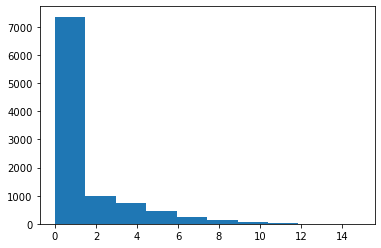

In [41]:
list_loss = np.sort(list_loss)[::-1]
plt.hist(list_loss[:])

# VGG16 train_0 -> train_1 FGSM

In [42]:
list_loss = [0.02573445811867714, 9.298280929215252e-06, 0.9777392148971558, 0.03862066566944122, 0.08416818082332611, 1.0205039978027344, 4.0995659828186035, 9.957225799560547, 0.02278994396328926, 3.888018846511841, 2.447521209716797, 0.11814843863248825, 0.6581741571426392, 1.5735502529423684e-05, 6.556489552167477e-06, 8.267593383789062, 0.22592593729496002, 4.053647994995117, 0.0006387577159330249, 2.729855441430118e-05, 12.06521224975586, 6.512465953826904, 4.990243434906006, 7.08790397644043, 27.034088134765625, 10.873554229736328, 7.728193759918213, 0.001696577062830329, 2.474874496459961, 2.5626518726348877, 6.015393257141113, 2.3841855067985307e-07, 14.322314262390137, 5.177249908447266, 0.38705065846443176, 12.413071632385254, 3.045227527618408, 8.378381729125977, -0.0, 4.887569048150908e-06, 5.960462772236497e-07, 0.4618343114852905, 1.2651417255401611, 8.274897575378418, 3.099436753473128e-06, 0.0002008474839385599, 1.811964830267243e-05, 13.067377090454102, 11.344184875488281, 3.435147523880005, 9.415534973144531, 8.201262971851975e-05, 8.021217346191406, 3.780444622039795, 0.1624174416065216, 5.964609146118164, 6.613893985748291, 8.660497665405273, 7.007654666900635, 6.9828338623046875, 0.000198821333469823, 7.508011341094971, 5.312130451202393, 8.661079406738281, 9.470475196838379, 6.499231815338135, 17.103017807006836, -0.0, 8.002779960632324, 1.4753203392028809, 7.7441277503967285, 8.98367977142334, -0.0, -0.0, 13.081009864807129, 0.011959869414567947, 3.6196682453155518, 1.6689160474925302e-05, 2.220137119293213, 6.9141146923357155e-06, -0.0, 7.820991516113281, 0.6747782826423645, 6.615896563744172e-05, 0.19127357006072998, 6.935570240020752, 5.790506839752197, 3.116877317428589, 0.6489443778991699, 9.548345565795898, 1.0728830375228426e-06, 1.1666845083236694, -0.0, 7.582493305206299, 3.460346221923828, 0.0053563653491437435, 10.254892349243164, 11.458494186401367, -0.0, 0.07053396850824356, 6.83045873302035e-05, 17.060405731201172, 0.09673362970352173, 1.2514139413833618, 13.350435256958008, 5.690153121948242, 17.58590316772461, 6.091489315032959, -0.0, 4.2914423829643056e-05, 1.793025016784668, 1.0967194612021558e-05, 0.13870848715305328, 13.26124095916748, 6.955262184143066, 8.680075645446777, 1.1230847835540771, 4.4728593826293945, 9.936254501342773, 0.015512637794017792, 10.869041442871094, 3.739800453186035, 9.172348976135254, 5.960462772236497e-07, 4.244362831115723, 0.0006249382277019322, 0.0018780466634780169, 2.221219301223755, 17.808944702148438, 8.751653671264648, 20.828327178955078, 7.0133843421936035, 1.3947389561508317e-05, -0.0, 0.0763016790151596, 8.454353332519531, 0.3208079934120178, 2.062299427052494e-05, 0.21743375062942505, 12.029780387878418, 12.240401268005371, 3.099393507000059e-05, 7.986990567587782e-06, 5.568770885467529, 0.00026675479602999985, 5.033127307891846, 7.291404724121094, 7.473153591156006, 0.011513808742165565, 0.020494600757956505, 12.844037055969238, 3.8708388805389404, 17.228042602539062, 0.2724260687828064, 0.0035843905061483383, 14.254881858825684, 8.17692756652832, 3.6954811548639555e-06, 8.280780792236328, 0.00023529145983047783, 0.0003129946126136929, 11.954869270324707, 6.907679557800293, 8.256375312805176, 1.311301275563892e-06, 1.2365455627441406, 0.0002926159941125661, 9.884300231933594, 9.586797714233398, 15.065540313720703, 0.004132778849452734, 10.121933937072754, 4.976340293884277, 1.3834419250488281, 12.286850929260254, 0.045892659574747086, 8.026422500610352, 2.922900676727295, 11.368417739868164, 2.109982233378105e-05, 0.0011038646334782243, 3.2287654876708984, 7.152555099310121e-07, 10.043834686279297, 9.368551254272461, -0.0, 4.20539665222168, 0.05497866868972778, 13.626812934875488, 0.18274331092834473, 2.372236667724792e-05, 5.97151517868042, -0.0, 13.42829704284668, 18.41636848449707, 4.483487606048584, -0.0, 0.0006235085893422365, 0.25693458318710327, 0.037390172481536865, 0.5772889256477356, 11.132535934448242, 1.585470999998506e-05, 5.357256889343262, 11.826630592346191, 3.933898824470816e-06, 0.013226509094238281, 0.10359668731689453, -0.0, 0.11839298903942108, 3.963054895401001, 9.049691200256348, 0.00021455370006151497, 11.086832046508789, 0.0005994430393911898, 1.3191986083984375, 0.00518086226657033, 0.08429551124572754, 5.2495646476745605, 7.88130521774292, 6.04279088973999, 10.57809066772461, 0.13601142168045044, 5.130511283874512, 11.754236221313477, 4.63440465927124, 6.965427398681641, 0.0005189026123844087, 4.768370445162873e-07, 14.83480453491211, 1.373166561126709, 2.9831624031066895, 2.9003095626831055, 2.5627782344818115, -0.0, -0.0, 2.303356409072876, 8.21320915222168, 0.04333740472793579, 0.19137506186962128, 0.04467974603176117, 6.519911766052246, 2.6924474239349365, 0.3875698149204254, 1.1920928244535389e-07, 18.217710494995117, 8.619861602783203, 17.864667892456055, 0.0057104784063994884, 0.758924126625061, 7.894354343414307, 6.794906312279636e-06, 4.410646579344757e-05, 9.176240921020508, 5.708242893218994, 12.865385055541992, 4.9743733406066895, -0.0, 0.02826758660376072, 4.136697292327881, -0.0, 10.974957466125488, 5.099968910217285, 8.371227264404297, 17.787002563476562, 0.7576175928115845, 1.3617420196533203, 0.008893284946680069, 0.035313189029693604, 11.802014350891113, 2.8901970386505127, 11.446197509765625, 11.371538162231445, 11.942604064941406, 7.775369644165039, 11.077720642089844, 1.6689286894688848e-06, 2.3182103633880615, 0.2917642295360565, 2.145764938177308e-06, 0.00020180096908006817, 0.008352231234312057, 0.27079084515571594, 0.00010871296399272978, 0.4594879150390625, 5.071289539337158, 0.0034899539314210415, 1.07287787614041e-05, 0.022790877148509026, 10.670829772949219, 0.0013229437172412872, 7.735858917236328, 4.187401294708252, 2.7571957111358643, -0.0, 0.003952549304813147, 1.506411075592041, -0.0, -0.0, 1.585470999998506e-05, 3.557669162750244, 7.342500686645508, 3.054215908050537, 0.16549985110759735, 0.07735230028629303, 11.781118392944336, 10.180681228637695, 4.67983865737915, 8.611937522888184, 0.4315212666988373, 8.451650619506836, 0.0004940004437230527, 0.04255560413002968, 7.031164646148682, 9.375733375549316, 3.6852996349334717, 8.764942169189453, 0.0291721373796463, 6.865225315093994, 0.058856744319200516, 7.016754150390625, 0.5853793621063232, 0.0007545484695583582, 2.5942068099975586, 1.4305104514278355e-06, 9.534674644470215, 6.85450553894043, 11.198996543884277, 8.022463589441031e-05, 0.001060757553204894, 0.0012856797548010945, 0.00010156115604331717, 1.6902580261230469, 10.487489700317383, 1.5174566507339478, 1.3264029026031494, 3.393906593322754, 11.981799125671387, 5.7344069480896, 9.70069694519043, 0.4026019871234894, 2.622600959512056e-06, 14.734236717224121, 12.459763526916504, 0.04588639736175537, 3.0945072174072266, 10.408072471618652, 7.4400715827941895, -0.0, 1.1920928244535389e-07, 4.627634048461914, 0.09462429583072662, 0.5253459215164185, -0.0, 19.270479202270508, 6.747991561889648, 12.588735580444336, 14.817520141601562, 0.00015841660206206143, 2.6232364177703857, 7.721088886260986, 3.2186455882765586e-06, -0.0, 9.482544898986816, -0.0, 0.016635045409202576, 4.115432262420654, 2.3841855067985307e-07, 9.062211990356445, 9.54474925994873, 3.933898824470816e-06, 0.0009289240115322173, 4.660974445869215e-05, 0.06731638312339783, 1.6927575416048057e-05, 0.3241715431213379, 0.013522455468773842, 9.862314224243164, 0.024952257052063942, 4.310630798339844, 8.656472206115723, 0.0394776314496994, 2.5152843591058627e-05, 0.00809093564748764, 7.830215930938721, 5.698370456695557, 4.161033630371094, 6.963663101196289, 2.4644882678985596, 0.0057305097579956055, 9.054849624633789, -0.0, 7.44097375869751, 2.635232925415039, 0.00672032218426466, 2.862687587738037, 10.628783226013184, 9.836557388305664, 0.00018666432879399508, 4.768370445162873e-07, 0.0019803689792752266, 0.004463827703148127, 12.010441780090332, 7.152555099310121e-07, 0.00014435203047469258, 0.3242678940296173, -0.0, 15.800957679748535, -0.0, 4.643789291381836, 0.007388173136860132, 2.0351362228393555, 12.780471801757812, 0.4422720968723297, 3.6052963733673096, 0.02614484168589115, 0.0010324153117835522, 0.0001802282058633864, 3.8424463272094727, 0.09720826894044876, 0.18267062306404114, 8.638069152832031, 1.6927575416048057e-05, -0.0, 17.485431671142578, 0.2847440838813782, 10.475523948669434, 5.18852424621582, 2.586808113846928e-05, 0.00018153927521780133, 5.4960713386535645, 9.483985900878906, 7.480679988861084, 7.656649589538574, 0.90743088722229, 5.9191203117370605, 0.5030813217163086, 13.081547737121582, 6.389413465512916e-05, 9.910135269165039, 8.806937217712402, 0.18751248717308044, 5.531993389129639, 0.16805900633335114, 9.027862548828125, 27.66777229309082, 2.330230951309204, 2.825220326485578e-05, 0.602180004119873, 0.25440236926078796, 11.2772216796875, 0.19366052746772766, 1.1920928244535389e-07, 0.009408657439053059, 1.3429076671600342, 9.894321920000948e-06, 0.5022323727607727, 2.703678607940674, 0.0011375630274415016, 8.925071716308594, 5.453489780426025, 11.747965812683105, 3.159468173980713, 1.1306688785552979, 6.187078475952148, 7.899600028991699, 2.8687593936920166, -0.0, 0.06273965537548065, -0.0, 2.754600763320923, 3.5400381088256836, 1.1920928244535389e-07, 6.791417598724365, 0.3544084131717682, 10.633980751037598, 14.863565444946289, 9.693625450134277, 3.894217014312744, 4.307830333709717, 3.499241828918457, 0.001660279231145978, 0.0009507188224233687, 11.567864418029785, 7.219846248626709, 5.816044807434082, 2.5605428218841553, 0.4343858063220978, 1.2681257724761963, 0.09797801077365875, 13.199201583862305, 5.994481086730957, 0.08898689597845078, 8.937594413757324, 9.198226928710938, 8.344646857949556e-07, -0.0, 8.344646857949556e-07, 8.644017219543457, 8.583032467868179e-06, 0.5299050807952881, 7.786389350891113, 1.4976913928985596, 5.58351993560791, 4.303020000457764, 1.1920928244535389e-07, 0.017051756381988525, 12.586295127868652, 0.03444873169064522, 2.0076985359191895, -0.0, 6.222531374078244e-05, -0.0, 12.414060592651367, 0.00848308950662613, 0.45829343795776367, 5.634489059448242, 5.857998847961426, 0.2150820642709732, 1.811964830267243e-05, -0.0, 1.0013530300057027e-05, 8.740564346313477, 10.415719032287598, 0.00046564225340262055, 3.7431014789035544e-05, 8.503447532653809, 3.504691630951129e-05, 3.7319724559783936, 4.708446502685547, 0.038352251052856445, 0.4028175473213196, 8.258977890014648, 1.9073468138230965e-06, 1.5382707118988037, 4.499432563781738, -0.0, 6.467128276824951, 5.301284313201904, -0.0, 8.225102646974847e-05, 11.298933982849121, 0.07099965959787369, 0.03670460358262062, 9.298280929215252e-06, 3.6775968074798584, 4.408040523529053, 7.984210968017578, 0.42388713359832764, -0.0, 6.644491195678711, 2.6525654792785645, 0.05186982825398445, 5.14193058013916, 0.014896584674715996, 6.386051177978516, 6.965455055236816, 3.0066781044006348, 8.491951942443848, 12.071345329284668, 4.0531076592742465e-06, 9.142143249511719, 8.663098335266113, 11.46572208404541, 1.9073468138230965e-06, 19.74842643737793, 2.9466400146484375, 3.752648115158081, 13.63309097290039, 0.19085809588432312, 3.5343704223632812, 0.23117491602897644, 12.11143970489502, 7.130311489105225, 0.0019262346904724836, 9.155019760131836, 1.1920928244535389e-07, 16.09146499633789, 0.0023651740048080683, 2.715954065322876, 7.152555099310121e-07, 5.223433971405029, 8.344646857949556e-07, 12.38973331451416, -0.0, 8.34461570775602e-06, 5.9913859367370605, 10.102812767028809, 0.0005310555570758879, 0.4645155072212219, 2.2016441822052, 0.0010476582683622837, -0.0, 1.4630136489868164, 4.689766883850098, 24.906946182250977, 5.9126061387360096e-05, 9.623441696166992, 13.695054054260254, 0.27655091881752014, 1.413045883178711, 7.061245441436768, -0.0, 1.9073468138230965e-06, 1.9506733417510986, 0.00012432756193447858, 10.89625072479248, 1.5909481048583984, 11.816551208496094, 1.4305104514278355e-06, 0.07619873434305191, 6.0626959800720215, 0.0015958918957039714, 7.152555099310121e-07, 5.916579723358154, -0.0, 5.72213077545166, 0.0004204819560982287, 13.619094848632812, 0.0020794689189642668, 4.204529762268066, 1.3555909395217896, 12.855308532714844, 8.996630668640137, 22.081981658935547, 0.946638286113739, 0.00038556772051379085, 0.052668698132038116, -0.0, 9.1710786819458, 12.781229972839355, 5.730236530303955, 8.83888053894043, 0.008423040620982647, 5.67461633682251, 11.107401847839355, -0.0, 0.04489438608288765, 1.9358240365982056, 1.7969393730163574, 9.718029022216797, 10.035103797912598, 0.0013813963159918785, 1.811964830267243e-05, 0.0004755319678224623, 12.379323959350586, 7.763638496398926, 0.0008968859910964966, 0.00485799927264452, 0.06609784066677094, -0.0, 0.07365695387125015, 6.943963527679443, 2.106231689453125, 0.10938660055398941, 10.960394859313965, 0.00026663561584427953, 6.041952610015869, 0.0006361367995850742, 12.32887077331543, 0.013859933242201805, 1.5497195136049413e-06, 0.010505729354918003, 0.0013816345017403364, 1.7254230976104736, 2.3421175479888916, 1.7355780601501465, 6.451141357421875, 2.5174810886383057, 3.0776352882385254, -0.0, 9.854995727539062, 1.2810556888580322, 7.92710343375802e-05, 12.807913780212402, 4.502060413360596, 16.89496421813965, 2.6143484115600586, 7.6734700202941895, 0.0008473381749354303, 11.61240291595459, -0.0, 5.872310638427734, 0.00115697190631181, 4.3987260141875595e-05, 13.103286743164062, 8.763811111450195, 9.819595336914062, 6.902690410614014, 1.148742437362671, 6.210137367248535, 0.001999285537749529, 9.394062042236328, 5.2033257484436035, 6.794906312279636e-06, 1.9669404029846191, 0.00013195598148740828, 8.513388633728027, 0.008975398726761341, 1.0293858051300049, 1.0728830375228426e-06, 0.0009592937421984971, 0.6731475591659546, 6.299897193908691, 13.568740844726562, 1.238510012626648, 0.0032278599683195353, 5.878480911254883, 0.002922432729974389, 2.7950439453125, 6.247673511505127, 1.311301275563892e-06, -0.0, 14.006001472473145, 0.0007670559571124613, 3.4043726921081543, 11.648287773132324, 4.329447269439697, 4.790812969207764, 4.858635425567627, 0.18670493364334106, 2.269367218017578, 0.00014590153296012431, 2.3862786293029785, 2.3841855067985307e-07, 4.070564270019531, 14.252283096313477, 1.6447631120681763, 8.610478401184082, 6.350584030151367, 0.022035988047719002, 12.179615020751953, 0.046328768134117126, 7.7873101234436035, 0.691871702671051, 1.1086402082582936e-05, 10.487058639526367, -0.0, 22.087684631347656, 13.2261381149292, 4.489985466003418, 1.971945881843567, 0.014094807207584381, 4.262843132019043, 10.995320320129395, 1.1692965030670166, 0.008341236039996147, -0.0, 3.948138952255249, 0.0005744237569160759, 2.863358974456787, 11.514680862426758, 0.5167506337165833, 4.410734163684538e-06, 8.101964950561523, 11.27882194519043, 0.11229187995195389, -0.0, 5.7051520347595215, 8.628597259521484, 0.035611413419246674, 0.33112528920173645, 1.7647781372070312, 7.442429065704346, 0.001966211013495922, 0.0010634964564815164, 14.226661682128906, 13.545409202575684, 0.9792291522026062, 0.007881376892328262, 1.1444414854049683, 13.00468921661377, 7.56280517578125, 6.5762128829956055, 7.490849018096924, 9.480545997619629, 5.212224960327148, 0.00021288513380568475, -0.0, 10.440601348876953, 15.030723571777344, 14.37674617767334, 3.4346303939819336, 15.316720008850098, 9.425938606262207, 10.976082801818848, 5.483612312673358e-06, 2.441793441772461, 7.827206611633301, 3.576278118089249e-07, 9.413107872009277, -0.0, 9.673685073852539, 0.32787108421325684, 13.205992698669434, 0.0004605186404660344, 10.02879810333252, 2.9802276912960224e-06, 0.049961771816015244, 16.670618057250977, 7.163078784942627, 0.3108625113964081, 0.3070363402366638, 0.07383855432271957, 3.83100962638855, 0.4351728558540344, 0.0030906074680387974, 1.4305104514278355e-06, 0.09250343590974808, 5.643538475036621, 6.205644607543945, 0.05750404670834541, 17.355239868164062, -0.0, 0.004057983867824078, 2.1457441107486375e-05, 6.178820610046387, 0.7834611535072327, 10.92330265045166, 0.09336823970079422, 7.671494483947754, 0.006177379284054041, 15.956414222717285, 0.7527046203613281, 0.0047404286451637745, 2.8097171783447266, 5.993595600128174, 0.012277503497898579, 9.293992042541504, 8.032571792602539, 18.273372650146484, 0.5766520500183105, 4.172316494077677e-06, 5.960462772236497e-07, 7.552720069885254, 4.433600902557373, 11.776201248168945, 10.78826904296875, 1.3790637254714966, 0.0015789910685271025, 2.634490556374658e-05, 1.3494212627410889, 0.21135587990283966, 0.08683283627033234, 12.380578994750977, 6.340787410736084, 0.004179433919489384, -0.0, 10.45552921295166, 8.049569129943848, 20.690885543823242, 1.7165990357170813e-05, 11.702471733093262, 15.556621551513672, -0.0, 1.7881377516459906e-06, 12.37630558013916, 9.112388610839844, 17.226314544677734, 0.004116870928555727, 2.1394472122192383, 12.158868789672852, 0.15111273527145386, 6.88592529296875, 1.847726889536716e-05, 11.82961654663086, 8.189043998718262, 0.10960937291383743, -0.0, 12.495108604431152, 0.0011261318577453494, 0.9658988118171692, 7.159397125244141, 0.08489206433296204, 8.427741704508662e-05, 1.1488364934921265, 8.40390202938579e-05, 3.6393532752990723, 9.304743766784668, 4.333283424377441, 0.0002004899288294837, 5.765819549560547, 8.778666496276855, 0.08477313071489334, 0.08037159591913223, 4.6491513785440475e-06, 2.3963279724121094, 4.302056789398193, 0.0047040036879479885, 7.152555099310121e-07, 3.4522817134857178, 8.954886436462402, 14.075122833251953, 16.696260452270508, 0.0038594536017626524, 3.1705095767974854, 1.966933996300213e-05, 17.729000091552734, 0.00010656742961145937, 0.00010263393050990999, 15.223960876464844, 5.170307159423828, 2.7430429458618164, -0.0, 0.9818960428237915, 0.10015039145946503, 8.283206939697266, 3.1944644451141357, 8.106198947643861e-06, 2.0265558760002023e-06, 1.6212332411669195e-05, 1.9308412075042725, 5.144045829772949, 11.221952438354492, 8.557029724121094, 1.8714746236801147, 8.246826171875, 0.003657320514321327, 7.510157047363464e-06, 2.3483953555114567e-05, 0.023253250867128372, 0.5405713319778442, 8.756047248840332, 7.577719211578369, 2.343568801879883, 4.768370445162873e-07, 17.381351470947266, 1.854701042175293, 3.811122179031372, 9.447661399841309, 0.5746275186538696, 7.024937152862549, 8.79028034210205, 5.358180046081543, 2.8609820219571702e-05, 0.00026306029758416116, 5.609103202819824, 6.67698335647583, 11.87335205078125, 0.00018726025882642716, -0.0, 7.159874439239502, 0.29548799991607666, 5.960462772236497e-07, -0.0, 3.974712610244751, 0.013585491105914116, 8.142616271972656, 6.146735191345215, 0.00025388356880284846, 6.080587863922119, 7.762904644012451, 4.6627421379089355, 7.045305252075195, 3.135155202471651e-05, 2.726857900619507, 0.2804803252220154, 8.224335670471191, 0.22197595238685608, 1.6689286894688848e-06, 0.11372317373752594, 3.335084915161133, 0.10557618737220764, 9.011578559875488, 10.171316146850586, 0.0360562838613987, 2.2248950004577637, 0.000797192333266139, 0.022378766909241676, 0.010130180977284908, 9.989239333663136e-05, 0.46548697352409363, 9.66831111907959, 13.477097511291504, 9.86119270324707, 4.172316494077677e-06, 3.259887456893921, 11.45687198638916, 8.447491645812988, 11.100637435913086, 3.1372578144073486, 0.11782743036746979, 5.669198513031006, 0.008785995654761791, 12.409847259521484, 4.718631267547607, 9.067975044250488, 4.497101306915283, 0.01547132059931755, 9.7381591796875, 6.166715145111084, 0.13427144289016724, -0.0, 0.025076892226934433, 0.18371616303920746, 5.034079551696777, 2.7630562782287598, 0.07904429733753204, -0.0, 5.960462772236497e-07, 0.0006214833119884133, 15.976234436035156, 1.311301275563892e-06, 1.4543427823809907e-05, 5.722029527532868e-06, 7.480850696563721, 9.184856414794922, 9.77311897277832, 12.313737869262695, 0.04591691121459007, -0.0, 1.1920928244535389e-07, 8.643052101135254, 0.05728500708937645, 8.440467834472656, 0.001209719106554985, 12.716618537902832, 0.0048691509291529655, -0.0, 11.553524017333984, 0.3839731514453888, 7.662141799926758, 8.463896751403809, 0.7256743907928467, 5.819850444793701, 0.003059827256947756, 7.230806827545166, 5.1973900554003194e-05, 3.7512948513031006, -0.0, -0.0, 0.04020538926124573, 12.101314544677734, 0.35596659779548645, 0.03897511959075928, 1.8479877710342407, 0.009452351368963718, 6.903828144073486, 4.336977958679199, 6.7126922607421875, 5.229244232177734, -0.0, 11.002083778381348, 16.61130714416504, 0.009576689451932907, 10.971728324890137, 7.126262664794922, 1.1020268201828003, 2.1283135414123535, 0.00014590153296012431, 14.86680793762207, 11.025428771972656, -0.0, 13.452449798583984, 7.941690921783447, 4.494089080253616e-05, 13.912310600280762, 9.90520191192627, 8.728975296020508, 2.633807420730591, 0.00013016807497479022, 6.313485145568848, 0.9019054174423218, -0.0, 9.570270538330078, 7.679933547973633, 0.40588250756263733, 0.032502610236406326, 0.07105951011180878, 3.4321212768554688, 2.0709147453308105, 4.456014633178711, 14.42762565612793, 9.2993745803833, 6.6850996017456055, 0.05414867028594017, 1.4173272848129272, -0.0, -0.0, 3.4927710657939315e-05, 6.2518229484558105, 4.6491513785440475e-06, 0.0021990183740854263, 5.396225929260254, 16.045085906982422, 1.1920928244535389e-07, 0.0001255195093108341, 0.0002817710628733039, 2.1798648834228516, 0.4908379018306732, 0.0009926398051902652, -0.0, 4.43248987197876, 15.454974174499512, 8.66065788269043, 0.1119823157787323, 11.018233299255371, 0.11397700011730194, 9.034218788146973, 0.026152273640036583, 7.742528438568115, 1.1920928244535389e-07, 0.00047052756417542696, 0.00017021637177094817, 0.007939211092889309, 0.008334971033036709, 6.5205356804654e-05, 7.791632175445557, 12.827875137329102, 1.311301275563892e-06, 0.0001463782973587513, -0.0, 15.274524688720703, 0.2514456808567047, 9.633586883544922, 13.666731834411621, 9.567268371582031, 0.0010127659188583493, 0.07142529636621475, 2.3841855067985307e-07, 10.847419738769531, 8.279767990112305, 1.7143973112106323, 0.0048683201894164085, 9.543088912963867, 5.483612312673358e-06, 5.123306751251221, 0.0504874661564827, 1.5387401580810547, 1.4671757221221924, 6.903761863708496, 0.05811488255858421, 1.6278234720230103, 1.4815868139266968, 2.32472562789917, 5.960462772236497e-07, 6.926634311676025, 0.08746697753667831, 11.289607048034668, 0.047459427267313004, 0.21826085448265076, 8.068009376525879, 2.930105209350586, 1.0728830375228426e-06, 10.747379302978516, 3.8958938121795654, 11.015374183654785, 1.6202969551086426, 1.4305104514278355e-06, 8.721839904785156, 11.275400161743164, 12.188630104064941, -0.0, 4.768370445162873e-07, 0.00011634149996098131, 0.020745202898979187, 18.411413192749023, 1.3969690799713135, 10.11642837524414, 9.536738616588991e-07, 2.6225699912174605e-05, -0.0, 14.768084526062012, 6.462109565734863, 8.284702198579907e-05, 14.19650650024414, 1.976294755935669, 1.476522445678711, 3.169393539428711, 6.502203941345215, 0.01812385581433773, 1.4578152894973755, 2.199970245361328, 0.0022193582262843847, 6.055576801300049, 5.131448268890381, 14.067740440368652, 0.02071157470345497, 0.08090057224035263, 9.894321920000948e-06, 1.3844878673553467, 14.863570213317871, 12.331685066223145, 4.093325138092041, 13.519645690917969, 3.685157060623169, 2.59311580657959, 11.11553955078125, 0.010480721481144428, 0.03352784737944603, 9.85700798034668, 17.1153564453125, 0.0461801178753376, 5.905320167541504, 13.411020278930664, 7.033323527139146e-06, -0.0, -0.0, 15.337968826293945, 9.16403865814209, 0.10478544235229492, 3.9503188133239746, 7.56950321374461e-05, 9.846202738117427e-05, 0.0002002515539061278, 9.285355567932129, 0.00041869457345455885, 11.870963096618652, 0.6994658708572388, 3.9989609718322754, -0.0, 0.1966400444507599, 10.385920524597168, 0.01211734488606453, 0.14479954540729523, 0.024938536807894707, 0.016817457973957062, 9.473149299621582, 0.06943656504154205, 17.43638801574707, 3.598356246948242, 0.05943552404642105, 14.104596138000488, 8.885973930358887, 18.89378547668457, 0.538006067276001, 6.26054573059082, 5.0744829177856445, 0.0433734767138958, 4.4090094566345215, 5.039340019226074, 7.152555099310121e-07, 0.011131919920444489, 5.36387825012207, 7.2703986167907715, 0.03664174675941467, 2.6010196208953857, 0.00023338454775512218, 8.097054481506348, 6.521806240081787, 12.133660316467285, 0.0313858687877655, 1.7252907752990723, -0.0, 7.288842678070068, 1.1278197765350342, 3.2230117321014404, 5.012053966522217, 8.011078834533691, 1.4424220353248529e-05, 5.231808185577393, 5.865037441253662, 1.6689286894688848e-06, -0.0, 3.0748751163482666, 0.0005818104837089777, 0.045649077743291855, 0.18987056612968445, 1.5225012302398682, -0.0, 5.718413829803467, 5.228614330291748, 13.76664924621582, 6.18397855758667, 0.0001037067049765028, 0.7600641250610352, 0.13665714859962463, 0.00020394629973452538, 13.775298118591309, 1.9449660778045654, 0.013432127423584461, 0.00024423000286333263, 6.462950229644775, 5.586110591888428, 2.683082342147827, 6.796751022338867, 6.398170471191406, 2.3657283782958984, 15.235143661499023, 1.1920928244535389e-07, 0.0005285535007715225, 0.005603676661849022, 0.5751669406890869, 0.030277244746685028, 0.0019929802510887384, 7.8992600440979, -0.0, 9.933586120605469, 10.855871200561523, 1.6755224466323853, 4.172316494077677e-06, 0.7967769503593445, 4.7736687660217285, 2.1499602794647217, 1.6391905546188354, 0.021684927865862846, 7.717474460601807, 0.00017534149810671806, 0.00011312322021694854, 13.671833992004395, 3.016498327255249, 9.351526260375977, 0.03727739676833153, 0.0004886387032456696, 13.700242042541504, 3.8530352115631104, 7.844536304473877, 1.9073468138230965e-06, 8.285316467285156, 7.071372985839844, 1.1920928244535389e-07, 17.039260864257812, 6.021209716796875, 10.61341667175293, -0.0, 0.0009545299108140171, 1.1920928244535389e-07, 2.339693069458008, 5.480728626251221, 8.654219709569588e-05, 0.23580895364284515, 0.032231736928224564, 0.014742130413651466, 7.154836654663086, 0.04607925936579704, 7.287795066833496, 11.297863006591797, -0.0, 3.384626626968384, 8.105902816168964e-05, 12.847271919250488, 2.9802276912960224e-06, 0.0007620529504492879, 15.621829986572266, 10.010895729064941, 0.3801214396953583, 0.00882770773023367, 3.0078651905059814, 8.87736701965332, 13.66966724395752, 1.3821693658828735, 17.92782211303711, 4.100098609924316, 1.126613974571228, 15.245161056518555, 9.417489309271332e-06, 1.1333215236663818, 0.0017059786478057504, 2.571683645248413, 5.960462772236497e-07, 10.651869773864746, -0.0, 0.11094315350055695, 3.4073562622070312, 3.4900803565979004, 7.917099952697754, 9.829598426818848, 0.0015335239004343748, 0.00020108585886191577, -0.0, 6.446517467498779, 0.2023477554321289, 1.764281842042692e-05, 6.280447483062744, 7.070933818817139, 1.0443962812423706, 1.8200998306274414, 5.502625942230225, 3.48465633392334, 1.2336986064910889, 0.008625276386737823, 0.00011586471373448148, 15.666568756103516, 7.141968250274658, 4.557417869567871, -0.0, 0.025513574481010437, 7.113537311553955, 4.181563854217529, 10.34630298614502, 5.916028022766113, 2.8068857192993164, 8.805110931396484, 7.390948667307384e-06, 11.165692329406738, 3.5225112438201904, 0.04038858786225319, 3.5357792377471924, 0.02514711022377014, 16.52415657043457, 0.012427865527570248, 3.9590210914611816, 0.2654186487197876, 8.855009078979492, 12.883743286132812, 6.599062919616699, 0.18122407793998718, 0.0030709984712302685, 1.3893364667892456, 5.406320095062256, 19.405845642089844, 0.07619773596525192, 0.3110649883747101, 23.194965362548828, 10.908146858215332, 15.202902793884277, 14.414993286132812, 5.125986263010418e-06, 4.9052839279174805, 3.4188904762268066, 4.31528314948082e-05, 10.604948997497559, 7.450303382938728e-05, 5.678762435913086, 9.921785354614258, 2.537747621536255, 5.79953145980835, 0.28902095556259155, 1.2061172723770142, 9.775113539944869e-06, 2.407998726994265e-05, 0.5061773657798767, 0.29498201608657837, 0.0013555632904171944, 0.006497921887785196, 5.881441116333008, 15.35578441619873, 10.420798301696777, 0.642352283000946, 3.2897837162017822, 0.0005206898204050958, 5.408271312713623, 4.768370445162873e-07, 19.08601951599121, 2.3780577182769775, 5.358226776123047, 3.0040289857424796e-05, 0.8912065625190735, 0.9296799898147583, 2.8910021781921387, 9.660235404968262, 0.186945840716362, 7.115642547607422, 0.02426462434232235, 2.879000425338745, 3.202369213104248, 6.585406303405762, 0.00022516099852509797, 12.923027992248535, 0.17271392047405243, 0.38193532824516296, 4.325350284576416, 0.010355904698371887, 18.80872917175293, 7.561863899230957, 3.802703940891661e-05, 9.345571743324399e-05, 0.7732932567596436, 13.592665672302246, 0.9248126149177551, 0.008729864843189716, 0.018107114359736443, 10.79233455657959, 0.004663543310016394, 14.569223403930664, 6.808432579040527, 1.645074735279195e-05, 0.005642320960760117, 0.000506511190906167, 0.4614623785018921, 8.517694473266602, 0.1065756157040596, 11.137392044067383, 1.3828182090946939e-05, 2.6114344596862793, 0.001412466517649591, 8.222702026367188, 0.8945370316505432, 3.6141538619995117, 10.305327415466309, 12.679651260375977, 0.03912289813160896, 1.549708758830093e-05, 7.748573807475623e-06, 1.6870111227035522, 1.8506615161895752, 2.50339189733495e-06, 2.1588807106018066, 0.001191144809126854, 0.9945987462997437, -0.0, 0.27761849761009216, 0.0019130278378725052, 4.063875675201416, 0.16162283718585968, 0.0002379134384682402, 8.160906791687012, 2.145764938177308e-06, 14.152937889099121, 0.09878549724817276, 1.4526714086532593, 10.11977767944336, 10.32833194732666, 4.688999176025391, 0.042154304683208466, 11.290996551513672, 20.616073608398438, 15.023406982421875, 0.0027359218802303076, 15.321115493774414, 2.3841830625315197e-06, 0.07271075248718262, 8.34461570775602e-06, 10.355786323547363, 13.033339500427246, 0.0013612775364890695, 5.362240791320801, 13.408876419067383, 0.05155501514673233, 3.9565930366516113, 8.59012222290039, 20.12240982055664, 6.9141146923357155e-06, 4.2437604861333966e-05, 0.0001565095444675535, 4.270791053771973, 1.5049184560775757, 0.06860802322626114, -0.0, 5.585106372833252, 0.0012229352723807096, 14.806663513183594, 11.538701057434082, 0.0003592322755139321, 1.2993727978027891e-05, 0.41776931285858154, 10.107398986816406, 7.241549491882324, 2.0645337104797363, 9.768548011779785, 2.687518835067749, 0.18241934478282928, 7.399026870727539, 4.592837810516357, 3.397406908334233e-05, 10.880311965942383, 8.373250961303711, 1.3671387434005737, 6.643223285675049, 5.41716194152832, 0.7013630867004395, 0.17015549540519714, 3.520005226135254, 3.7748565673828125, 6.439820289611816, 0.4240478575229645, 0.03190328925848007, 0.06429614126682281, 5.960462772236497e-07, 16.638582229614258, 7.152555099310121e-07, 0.01669999584555626, 8.344646857949556e-07, 0.005296365823596716, 6.614876747131348, 0.7519633769989014, 5.467609405517578, 3.397684097290039, 0.0007834940915927291, 6.968818664550781, 0.009839368052780628, 1.3810290098190308, 0.0007876630988903344, 0.008776187896728516, 12.694385528564453, 6.184787273406982, 14.046966552734375, 2.362854480743408, 3.5180578231811523, 2.3841855067985307e-07, 12.021567344665527, 11.823988914489746, 0.00013982271775603294, 4.13413667678833, 7.843239784240723, 3.4450891689630225e-05, 0.012857865542173386, 6.88890266418457, 0.4665188193321228, 1.8931905031204224, -0.0, 1.3232143828645349e-05, 0.6372252702713013, 4.501308441162109, 4.155711650848389, 2.2732481956481934, 11.383942604064941, 4.60137271147687e-05, 3.5916216373443604, 4.768360213347478e-06, 5.121990203857422, 4.086650371551514, 0.020970527082681656, 9.432568550109863, 6.210161209106445, 12.160724639892578, 0.05295919254422188, 4.917715072631836, 0.20079933106899261, 6.872974395751953, 8.885865211486816, 2.7418097943154862e-06, 13.428805351257324, 8.583032467868179e-06, 5.885616779327393, 3.7511074542999268, 0.00011121608258690685, 1.446122407913208, 9.275848388671875, 1.262500286102295, 0.6248893141746521, 9.301977157592773, 4.831235408782959, 9.189253807067871, 19.764915466308594, 6.082672595977783, 10.832352638244629, 6.487600326538086, 5.283863067626953, 0.0002526917669456452, 8.581137657165527, 10.195428848266602, 5.23331356048584, 18.798824310302734, 0.577082097530365, 4.172316494077677e-06, 0.01952768862247467, 3.433168603805825e-05, 0.0007652691565454006, 0.0006173135479912162, 10.78621768951416, 0.650915801525116, 6.521374702453613, 6.524801731109619, 4.173367977142334, 3.2782016205601394e-05, 1.1920928244535389e-07, 12.525481224060059, 7.096652507781982, 7.34744930267334, 2.145764938177308e-06, 0.0015315004857257009, 8.177422569133341e-05, 0.006404588930308819, 0.00997557956725359, 1.4341285228729248, 14.399065017700195, 10.067028045654297, 4.885318756103516, 0.00016437610611319542, 0.0036747802514582872, 1.320098876953125, 0.004637083038687706, 3.412623405456543, 4.625213477993384e-05, 5.871791839599609, 9.895576477050781, 12.071303367614746, 2.9982147216796875, 0.0004627825692296028, 7.126114368438721, -0.0, 12.17110824584961, 4.694159507751465, 0.0004681444843299687, 15.475892066955566, 0.0008943848661147058, 7.946562767028809, 0.00130425242241472, 0.1488913595676422, 5.229048728942871, 12.324034690856934, 12.460005760192871, 18.197778701782227, 6.667266845703125, 5.811856269836426, 16.307292938232422, 2.7418097943154862e-06, 4.641353130340576, 14.483662605285645, 10.106266975402832, 0.008598684333264828, 0.0008606782066635787, 10.3876314163208, 1.1920928244535389e-07, 0.012095438316464424, 8.996940612792969, 11.288199424743652, 0.217754527926445, 4.437236785888672, 12.329822540283203, -0.0, 2.7294907569885254, 1.7217962741851807, 0.9941792488098145, 1.3112935448589269e-05, 15.833809852600098, 4.100883960723877, 2.0794026851654053, 8.305022239685059, 2.2270894050598145, 11.43809700012207, -0.0, -0.0, 0.005412092432379723, 12.260993003845215, 6.729701042175293, 3.576278118089249e-07, 0.023174280300736427, 7.200031757354736, 2.7258994579315186, 2.2941935062408447, 0.05758507922291756, 1.6689286894688848e-06, 3.5721473693847656, 1.7820864915847778, -0.0, 15.727209091186523, 0.0013394916895776987, -0.0, 6.964094638824463, 4.951777935028076, 2.267014741897583, 0.3984529376029968, 5.661633491516113, 2.264974000354414e-06, 1.3684883117675781, 3.3598341941833496, 0.011227641254663467, 0.0004170263418927789, 4.228297233581543, 5.960462772236497e-07, 4.768370445162873e-07, 0.8551096320152283, 1.6093124941107817e-05, -0.0, 0.12747064232826233, 3.8688559532165527, 0.00457015773281455, 0.19627302885055542, 0.09861420094966888, 0.00791449286043644, 0.00021181246847845614, 10.687223434448242, 0.355627179145813, 0.0012344843707978725, 1.5575909614562988, 8.14306926727295, 1.1920928244535389e-07, 4.88232421875, -0.0, 6.265548229217529, 5.272165298461914, 4.906545162200928, 4.457092761993408, 12.048225402832031, 5.260362148284912, 2.145764938177308e-06, 4.781394958496094, 6.757271766662598, 1.9957972764968872, 16.145750045776367, 1.6230921745300293, 6.508871555328369, 4.827938079833984, 0.002070070942863822, 4.386791229248047, 1.6715354919433594, 16.77682876586914, 10.85551929473877, 9.570804595947266, 0.04441648721694946, 2.6428024768829346, -0.0, 0.9785181283950806, 0.001100054127164185, 9.340907096862793, 2.264974000354414e-06, 12.049393653869629, 4.153121471405029, 0.0023117740638554096, 0.14237065613269806, 0.000962032878305763, 5.142909526824951, 23.357542037963867, 14.941895484924316, 0.00011848701251437888, 15.351576805114746, 2.3841855067985307e-07, 0.7162777781486511, 6.617966651916504, 0.08688901364803314, 0.0015969631494954228, 9.710630416870117, 7.704158306121826, 1.1920928244535389e-07, 11.727584838867188, 7.1829986572265625, 6.043903350830078, 12.750750541687012, 5.564323902130127, 15.581700325012207, 11.886734008789062, 5.517696857452393, 0.1655450016260147, 0.4683743715286255, 0.06051196902990341, 0.8361174464225769, 0.10916110128164291, 1.9073468138230965e-06, 0.0008420973899774253, -0.0, 10.173016548156738, 0.0013567537534981966, 0.0013809201773256063, -0.0, 2.622600959512056e-06, 3.0165016651153564, 17.846969604492188, 9.46804141998291, 4.449175834655762, 2.7337605953216553, 0.12039787322282791, 4.0531076592742465e-06, 3.028067111968994, -0.0, 16.433002471923828, 9.848027229309082, 13.740387916564941, 6.294052582234144e-05, 0.009599477984011173, 1.334005355834961, 1.1920928244535389e-07, 0.0004161922261118889, 0.026659293100237846, 14.207565307617188, 4.7801782784517854e-05, -0.0, 2.067211389541626, 0.00018952481332235038, 7.898290634155273, 2.3841855067985307e-07, 9.463754653930664, 11.146347999572754, 0.6274669170379639, -0.0, -0.0, -0.0, 10.242840766906738, 1.7489198446273804, 3.576272320060525e-06, 14.14463996887207, 4.1399359703063965, 11.305489540100098, 1.0278410911560059, 2.3841855067985307e-07, 1.7881377516459906e-06, 8.441271781921387, 17.26704978942871, 9.56972885131836, 1.7881377516459906e-06, 4.471453666687012, 7.528277397155762, 2.854745388031006, 2.4914430468925275e-05, 5.364403477869928e-06, 0.0015568528324365616, 7.965495586395264, 2.4179787635803223, 7.152555099310121e-07, 5.165408134460449, 2.7358925342559814, 7.8672261238098145, 8.790586471557617, 12.732919692993164, 1.954239845275879, 0.00036030475166626275, 2.3122951984405518, -0.0, 5.73969030380249, 9.290356636047363, 1.1920928244535389e-07, 6.505494117736816, 7.2577033042907715, 0.002774558262899518, 0.004424307029694319, 11.912507057189941, 3.333625555038452, 9.124089241027832, 0.01338872592896223, -0.0, 2.14359188079834, 6.165500640869141, 0.00034314466756768525, 3.576278118089249e-07, 14.517999649047852, 2.0161638259887695, 0.003189953975379467, 3.252857208251953, 16.507160186767578, 0.001291751628741622, 0.031615275889635086, 0.62589031457901, 0.03977920114994049, 6.180098056793213, -0.0, 15.247075080871582, 0.0013228246243670583, 1.1920928244535389e-07, 5.665766716003418, 0.0013109194114804268, 6.266536712646484, 4.768370445162873e-07, 1.546555519104004, 2.9364233016967773, 13.708138465881348, 2.3841830625315197e-06, 3.1786108016967773, 4.0366973876953125, 0.14442889392375946, 8.352224349975586, -0.0, 17.878734588623047, 16.27070426940918, 15.944557189941406, 10.103824615478516, 0.41692811250686646, 9.52588176727295, 0.012835622765123844, 8.65124225616455, 5.683143138885498, 4.551801681518555, 16.298723220825195, 6.4490144723095e-05, 0.00017915551143232733, 4.305172920227051, 0.957378625869751, 7.4388909339904785, 2.2265307903289795, 1.7523612768854946e-05, 12.760990142822266, 12.63930606842041, 0.0028388698119670153, 4.9682464599609375, 8.516294479370117, 5.004854679107666, 8.018712997436523, 9.305109977722168, 4.628693580627441, 0.001413180842064321, 6.787165641784668, 0.09414409101009369, 2.2511420249938965, 0.04968571662902832, 4.887569048150908e-06, 0.0013810392701998353, 0.007304153870791197, 0.14396582543849945, -0.0, 5.592674255371094, 3.3910696506500244, 5.6696648597717285, 1.1501708030700684, 0.40657132863998413, -0.0, 11.895947456359863, -0.0, 8.835872650146484, 6.963865756988525, 8.45265007019043, 5.532880783081055, 9.87515926361084, 8.599879264831543, 2.750317335128784, 7.701380729675293, 10.0573148727417, 1.506248950958252, 0.07941609621047974, -0.0, 8.723857879638672, 9.97195816040039, 4.165591716766357, 0.0009199915803037584, 12.917194366455078, 0.01572001725435257, 1.9947710037231445, 11.696178436279297, 0.11156667023897171, 3.4538395404815674, -0.0, 12.105245590209961, 2.9332404136657715, 12.724223136901855, 14.693713188171387, 0.018147854134440422, 8.886537551879883, 0.03113052248954773, 3.7803146839141846, 0.01570487767457962, 3.227544069290161, 7.7696852684021, 13.154486656188965, 5.483612312673358e-06, 4.300983428955078, 1.0186189413070679, 0.0008048156159929931, 4.086372375488281, 10.510699272155762, 6.449231147766113, 1.5722172260284424, 0.0009910915978252888, 1.3112935448589269e-05, 0.00936401728540659, 4.05108642578125, 0.3793632388114929, 0.007286994252353907, 7.485959529876709, 1.0524044036865234, 7.152555099310121e-07, 2.4060890674591064, 11.217805862426758, 7.794828414916992, 8.859211921691895, -0.0, 7.761327743530273, 11.948552131652832, 7.359851360321045, 7.295093536376953, 8.342223167419434, 0.00020895205670967698, -0.0, 14.27061939239502, 13.91698932647705, -0.0, 15.969120979309082, 1.1870890855789185, 1.1920922133867862e-06, 8.252973556518555, 4.768370445162873e-07, 4.107542991638184, 2.3841855067985307e-07, 8.417428016662598, -0.0, 15.566192626953125, 11.012210845947266, 1.4305104514278355e-06, 8.112783432006836, 0.0011042217956855893, 20.510236740112305, 10.511857032775879, 0.0583934523165226, 0.1727970540523529, 12.859770774841309, 12.733643531799316, 5.019101142883301, 11.79440689086914, 1.7947031259536743, 1.9987953901290894, 0.05575510486960411, 17.96064567565918, 0.5481171607971191, 9.281099319458008, 1.9073468138230965e-06, 11.641300201416016, -0.0, 0.20308351516723633, 1.773346185684204, 0.0003159739135298878, 7.73123836517334, 0.12311825156211853, 9.92298412322998, 1.1846858263015747, 0.13232490420341492, 0.3740901052951813, 5.8530047681415454e-05, 10.594874382019043, 2.7541120052337646, 17.658605575561523, 12.274581909179688, -0.0, 0.06404794752597809, 5.8053239627042785e-05, 11.69624137878418, 0.0015520919114351273, 0.739410936832428, 0.0002661589242052287, 0.1856987476348877, -0.0, 0.034986212849617004, 10.161107063293457, 10.663135528564453, 3.8401858806610107, 0.16697748005390167, 9.639236450195312, -0.0, 9.67020034790039, 3.099436753473128e-06, 11.865002632141113, 0.00013982271775603294, 1.1920928244535389e-07, 7.438383181579411e-05, 0.062147658318281174, 4.066210746765137, 2.52720492426306e-05, 12.503302574157715, 0.0016921738861128688, 10.757671356201172, 16.818954467773438, 7.152555099310121e-07, 11.554586410522461, 0.2268385887145996, 13.368733406066895, 0.008015253581106663, -0.0, -0.0, 5.887184143066406, 1.015699028968811, 9.334990501403809, 7.745967864990234, 4.040225505828857, 10.062312126159668, 4.13972806930542, -0.0, 0.0007677706307731569, 0.029613401740789413, 9.928529739379883, 3.848132371902466, 10.506038665771484, 4.125790596008301, 0.10890723019838333, 3.576278118089249e-07, 1.778319239616394, 12.39041805267334, 0.333557665348053, 0.02896648831665516, 0.07055085152387619, 7.88234806060791, 11.221734046936035, 11.831007957458496, 3.7788631743751466e-05, 9.149458885192871, 10.902620315551758, 11.50475788116455, 12.739632606506348, 0.5631952285766602, 2.9363996982574463, 1.0211210250854492, 1.4311026334762573, 10.945385932922363, 3.6998538970947266, 0.026242736726999283, 16.180072784423828, -0.0, 0.06446760147809982, 8.111509323120117, 8.705641746520996, -0.0, 13.368671417236328, 7.01076078414917, 5.6312947273254395, -0.0, 11.370767593383789, 8.373392105102539, 9.81631088256836, 5.282245635986328, 12.679553031921387, 11.271492004394531, 0.42878568172454834, 9.314453125, 5.364403477869928e-06, 3.016498327255249, 8.937422752380371, -0.0, 4.0531076592742465e-06, 5.0240702629089355, 4.2437604861333966e-05, 12.68775463104248, 4.108266353607178, 0.011690324172377586, -0.0, 3.908413887023926, 9.021378517150879, 6.719098091125488, 0.4402347207069397, 0.0046838331036269665, 0.004564580507576466, 0.000990257947705686, 0.00434051314368844, 15.869049072265625, 0.6825056672096252, 2.0427772998809814, 7.1435980796813965, 9.005695343017578, 3.4362733364105225, 0.017789920791983604, 4.89910888671875, 1.1989662647247314, 10.479521751403809, 8.309188842773438, 2.808720588684082, 3.6954811548639555e-06, 9.813523292541504, 8.193880081176758, 7.623167514801025, 0.000598251644987613, 19.197702407836914, 2.427842855453491, 9.536738616588991e-07, 0.0004855407460127026, 6.988097190856934, 6.658761024475098, 4.303572177886963, 7.530361652374268, 0.0022499265614897013, 13.012232780456543, 0.13872437179088593, 2.980092763900757, 5.960462772236497e-07, 1.1920928244535389e-07, 1.3056299686431885, 2.50339189733495e-06, 0.20730926096439362, 3.398022174835205, 13.938015937805176, 13.678293228149414, 0.5181653499603271, 10.991655349731445, 13.488105773925781, 2.2347447872161865, 0.0021808191668242216, 8.690542221069336, 0.0016692051431164145, 11.598194122314453, 7.907155513763428, 1.0967194612021558e-05, 1.9073468138230965e-06, 12.21465015411377, 0.1169721931219101, 1.2278481335670222e-05, -0.0, 8.09543514251709, 3.71926071238704e-05, 0.019053297117352486, 0.029507964849472046, 1.033636212348938, 13.610334396362305, 0.0059571098536252975, 1.6689286894688848e-06, 8.77584171295166, 0.30005595088005066, 0.07651030272245407, 4.056347846984863, 5.071987152099609, 3.2941575050354004, 0.018096227198839188, 0.5816577076911926, 4.0531076592742465e-06, 0.9057039618492126, -0.0, 7.626059055328369, 15.37935733795166, 5.835917949676514, 0.00013243274588603526, 0.0018629353726282716, 9.58434009552002, 0.003969172947108746, 1.9073468138230965e-06, 2.622600959512056e-06, 0.00013469743134919554, 0.0659547820687294, 0.7801653742790222, -0.0, 0.0019161213422194123, 0.00012659224739763886, 3.242440288886428e-05, 5.01338005065918, 8.453230857849121, 10.74600887298584, 3.7433130741119385, 8.157931327819824, 14.766088485717773, 0.00026067672297358513, 7.386142253875732, 2.724494218826294, 8.093515396118164, 0.03426731750369072, 0.04268354922533035, 4.101127624511719, 3.433168603805825e-05, 5.96336030960083, 9.919381141662598, 1.8763179779052734, -0.0, 11.9269380569458, 0.1648770272731781, 0.011167875491082668, 10.721026420593262, 3.1044435501098633, 0.7412618398666382, 1.3396472930908203, 7.301538467407227, 12.680047988891602, 7.647063732147217, 0.0003232433518860489, -0.0, 0.00361634255386889, 1.539161205291748, 0.011807788163423538, 4.339123915997334e-05, 2.5314784049987793, 0.26458457112312317, 9.848152160644531, -0.0, 0.5231224298477173, 2.190830945968628, 8.66215705871582, 9.736824035644531, 14.312749862670898, 16.381328582763672, 6.453031539916992, 2.276923179626465, 7.061995029449463, -0.0, -0.0, 10.568798065185547, 8.028757095336914, 10.95421314239502, 0.001032891683280468, 7.817745208740234, 2.3841855067985307e-07, 11.825125694274902, -0.0, 6.74492883682251, 6.769621849060059, -0.0, 5.152279853820801, 7.273184776306152, 7.280050754547119, 1.597391747054644e-05, 0.0018800693796947598, 6.650071620941162, 5.174943923950195, 14.844925880432129, 1.9073304429184645e-05, -0.0, 16.115028381347656, 7.867782187531702e-06, 7.76017427444458, 6.621947765350342, 9.44184398651123, 0.005384940654039383, 5.209310256759636e-05, 17.030075073242188, 3.635817120084539e-05, 3.0282483100891113, 3.814624506048858e-05, 6.952105522155762, 0.19248364865779877, 1.1920928244535389e-07, 2.312633478140924e-05, 0.0010190776083618402, 0.0011026738211512566, 0.8017013669013977, -0.0, 1.1920928244535389e-07, -0.0, 5.426513671875, 12.099162101745605, 10.01840877532959, 1.3708974620385561e-05, 1.1920928244535389e-07, 7.211902266135439e-05, 0.04619229957461357, 9.680209159851074, 1.1920928244535389e-07, 1.8624988794326782, 7.712867259979248, 8.086764335632324, -0.0, 1.1920928244535389e-07, 11.248679161071777, 4.0317792892456055, 7.965181827545166, 1.8283056020736694, 0.0024335552006959915, 9.69086742401123, 2.4008569717407227, 10.701529502868652, 0.0060272603295743465, 3.990900754928589, 4.768370445162873e-07, 5.8105669021606445, 2.1219027985353023e-05, 7.562743663787842, 0.04938700795173645, 22.390899658203125, 1.8015226125717163, 4.283721446990967, 0.6890197396278381, 6.425174069590867e-05, 4.179576873779297, 0.07529760897159576, 1.5407607555389404, 0.00010299152199877426, 14.851580619812012, 1.2191039323806763, 6.8081841468811035, 16.650808334350586, -0.0, 7.849473476409912, 1.1920928244535389e-07, 4.768370445162873e-07, 1.1542069911956787, 2.3977456092834473, 5.742426872253418, 0.004044686444103718, 4.034384727478027, 0.09211419522762299, 0.35131487250328064, 11.753921508789062, 7.512227535247803, 6.6756979322235566e-06, 6.694969177246094, 3.5906810760498047, 1.9550132492440753e-05, 11.33390998840332, 7.168045520782471, 0.0020111827179789543, 16.462493896484375, 12.584173202514648, 0.0634920746088028, 1.4798009395599365, 14.41174030303955, 4.5298504119273275e-05, 2.325927734375, -0.0, 1.1920928244535389e-07, 11.378641128540039, 5.718470096588135, 1.5816210508346558, -0.0, -0.0, 4.47110652923584, 9.52502155303955, 10.321523666381836, 0.036351528018713, 0.024224713444709778, 0.1656198650598526, 0.00533893471583724, 14.284200668334961, 9.903983116149902, 0.00010847456724150106, 7.123341083526611, 2.0265558760002023e-06, 8.471911430358887, 5.757720947265625, 8.29723834991455, 0.34226152300834656, 0.0007931424188427627, 7.8250579833984375, 0.00048375347978435457, -0.0, 12.485518455505371, 18.87915802001953, 2.6034159660339355, 1.8728370666503906, -0.0, 11.619361877441406, 3.697486639022827, 10.85846996307373, 4.625213477993384e-05, 12.441323280334473, 3.79001784324646, 1.0238250494003296, 12.198234558105469, 3.421248038648628e-05, 16.32961654663086, 9.536738616588991e-07, 3.4570634852570947e-06, 7.966917514801025, 5.410426616668701, 0.23282374441623688, -0.0, 4.781235694885254, 0.0005088941543363035, 11.730975151062012, 8.240538597106934, 1.578714370727539, 3.862306402879767e-05, 5.334666728973389, 0.7861701846122742, 5.270999908447266, 1.1920928244535389e-07, 0.11025357991456985, 15.350560188293457, 8.634101867675781, 6.937739817658439e-05, 11.094375610351562, 8.427741704508662e-05, 0.03450896590948105, 5.676865577697754, 0.0009092725813388824, 5.960462772236497e-07, -0.0, 0.006431594956666231, 11.329366683959961, 0.2675636112689972, 2.3841855067985307e-07, 6.952142715454102, 9.087617874145508, 0.0106755830347538, 0.3467346429824829, 3.2429726123809814, 0.7953528761863708, 5.207533359527588, 16.36272621154785, 12.988485336303711, 0.8129123449325562, -0.0, 0.5700151920318604, 0.0020810156129300594, 2.3627371788024902, 0.0015994624700397253, 11.6229248046875, 13.493452072143555, 0.00011288482346571982, -0.0, 0.0016549237770959735, 10.934870719909668, 0.32994890213012695, 0.3136700391769409, 0.0010962436208501458, 11.269133567810059, 3.2328343391418457, 1.732980728149414, 2.6703970432281494, 1.2278481335670222e-05, 3.425295352935791, 0.002595629310235381, 5.573972225189209, 0.16685359179973602, 8.962584495544434, 0.028606383129954338, -0.0, 0.13934077322483063, 0.21523664891719818, 0.23125721514225006, 11.296723365783691, 10.253643035888672, 3.2622580528259277, 1.8608773946762085, 5.245195097813848e-06, 0.06562505662441254, 9.506759643554688, 0.7752156853675842, 3.1526811122894287, 7.02188777923584, 0.7139372229576111, 6.4841132164001465, 3.576278118089249e-07, 8.478096008300781, 0.615315318107605, 0.006941015832126141, 11.768290519714355, -0.0, 0.005116582848131657, 1.0728830375228426e-06, 2.044079303741455, 2.3841855067985307e-07, 6.472854875028133e-05, -0.0, 0.8047753572463989, -0.0, 3.5552818775177, 2.3603456020355225, 0.162956103682518, 7.733471393585205, 7.223821739898995e-05, 8.15272331237793, 0.0009179668850265443, 3.844538927078247, 7.017973899841309, 11.51003646850586, 7.867782187531702e-06, 0.00016330339713022113, 2.46899151802063, 5.0168046951293945, 0.011122605763375759, 0.23572571575641632, 8.679374694824219, 7.152555099310121e-07, 6.7318830490112305, -0.0, 0.021604783833026886, 0.044649649411439896, 6.074018955230713, 16.779359817504883, -0.0, 8.22540732769994e-06, 1.7959601879119873, -0.0, 8.737525939941406, 0.004128861241042614, 13.047478675842285, 0.001910886145196855, 16.24310874938965, 19.630935668945312, 3.940955877304077, 3.576278118089249e-07, 0.12386526167392731, 6.1901984214782715, 15.275293350219727, 5.364403477869928e-06, 0.000791236583609134, 1.2040065485052764e-05, 5.3463921546936035, 4.620390892028809, 0.006486907135695219, 0.001647425931878388, 15.192084312438965, 0.03932211548089981, 0.07059095054864883, 4.568199634552002, 0.0008126770262606442, 8.778158187866211, 12.807083129882812, 16.547367095947266, 7.7610273361206055, 0.45179033279418945, -0.0, 0.0009608419495634735, 4.908557891845703, 8.799437522888184, 0.04992162436246872, 4.034475803375244, 13.670171737670898, 15.922481536865234, 5.246508598327637, 0.4670289158821106, 12.98255443572998, 3.802703940891661e-05, 9.509747505187988, 0.004446500446647406, 3.576278118089249e-07, 14.043646812438965, -0.0, 1.1829404830932617, 4.926266193389893, 10.536531448364258, 0.0005281960475258529, 2.155466318130493, 0.00011395759065635502, 4.298898220062256, 5.522671699523926, 1.0444769859313965, 4.097496509552002, 0.46247097849845886, 0.09972484409809113, 4.780198574066162, 1.9778127670288086, 3.814689989667386e-06, 0.011842777021229267, 2.8288252353668213, 7.616526126861572, 8.147876739501953, 0.11980754137039185, 7.413082599639893, 0.017027847468852997, -0.0, 8.824344635009766, -0.0, 6.218124866485596, 2.6618759632110596, 0.33461397886276245, 3.1567602157592773, 10.326859474182129, 15.675321578979492, -0.0, 2.8112850189208984, 7.177671909332275, 3.150265693664551, 0.007759311236441135, 0.1312360018491745, 0.028956759721040726, 7.564669132232666, 6.887092590332031, 0.031506236642599106, 2.3841855067985307e-07, 8.821448318485636e-06, 1.9311717551317997e-05, 0.0009282094542868435, 3.515566349029541, 1.4261330366134644, 22.93136215209961, 5.120809078216553, 3.576272320060525e-06, -0.0, 0.002577318577095866, 1.4227639436721802, 0.004131116904318333, 2.3841855067985307e-07, 0.5860342383384705, 6.5618977546691895, 2.3841855067985307e-07, 8.503827095031738, 0.09099920094013214, 0.1921147108078003, 7.558796405792236, 8.445328712463379, 13.829216957092285, 4.067190647125244, 16.499284744262695, 4.2239251136779785, 6.068238735198975, 9.941970825195312, 1.156323378381785e-05, 1.652421236038208, 2.10231614112854, 0.0009408338228240609, 9.260440826416016, 8.76780891418457, 2.220860004425049, 1.5312541723251343, 10.453909873962402, 0.09201285988092422, 16.209991455078125, 7.3056960105896, 0.03606778383255005, 4.047037601470947, 1.5139465176616795e-05, 2.185245990753174, -0.0, 0.06787636876106262, 0.10425101220607758, 0.0006434039096347988, 3.576278118089249e-07, 0.00020489977032411844, 1.103844165802002, 0.0007297713309526443, 0.011609258130192757, 3.0581235885620117, -0.0, 11.437841415405273, 0.015161039307713509, 17.158885955810547, 5.13174295425415, 0.002758866176009178, 5.3503618240356445, 0.3045317530632019, 0.7428389191627502, 0.0006821212591603398, 11.651032447814941, 0.00046135272714309394, 5.3881147323409095e-05, 12.730891227722168, 10.036699295043945, 2.622600959512056e-06, 1.8912773132324219, 0.10511001199483871, 0.01203537080436945, 3.250101089477539, 5.36729621887207, 0.0643550455570221, 14.15540885925293, 7.098937034606934, 5.109249591827393, 0.2869754433631897, -0.0, 0.15002872049808502, 14.022205352783203, 0.000679500459227711, 7.698417663574219, 5.960462772236497e-07, 7.987091064453125, 13.168940544128418, 1.559370756149292, 0.00010775939153973013, 2.4752702713012695, 10.618338584899902, 2.3841855067985307e-07, -0.0, 10.411059379577637, -0.0, 11.868010520935059, 0.5706756114959717, 13.507447242736816, 0.0006206493126228452, 12.741236686706543, 0.00011383838864276186, 2.2172682292875834e-05, 4.907739162445068, 3.3378546504536644e-06, 9.536738616588991e-07, 5.721882189391181e-05, 22.590774536132812, 0.00014888131408952177, 8.050277709960938, 0.0005508335889317095, 7.258453845977783, 3.808802366256714, 3.1492373943328857, 0.7346808314323425, 0.12300936877727509, 8.808514595031738, 2.2120018005371094, 7.671370983123779, 0.006649272982031107, 0.0422409325838089, 13.268888473510742, 9.536738616588991e-07, 4.813056468963623, 3.152073383331299, 8.126896858215332, 8.817971229553223, 3.4720730781555176, 9.862296104431152, 0.0015554246492683887, 5.566918844124302e-05, 19.47251319885254, 7.283812046051025, -0.0, 21.049182891845703, 0.0037057793233543634, 0.002188075101003051, 0.04956445097923279, 16.964017868041992, 2.7352635860443115, -0.0, 0.08437012881040573, 0.00014590153296012431, 0.22533032298088074, 0.0018133163684979081, 13.104467391967773, 8.381187438964844, 9.471287727355957, 11.50924015045166, 4.079484462738037, 5.106198310852051, 0.1549520194530487, 6.628874778747559, 0.00033122775494121015, 1.1801649634435307e-05, 0.010896112769842148, 3.079911708831787, 9.649357795715332, 13.016879081726074, 7.390948667307384e-06, 2.59147310256958, 0.04064810648560524, 9.297664642333984, 7.446749687194824, 0.0023074925411492586, 2.6255364418029785, 10.541543006896973, 1.0728830375228426e-06, 8.344646857949556e-07, 0.019806232303380966, 9.462416648864746, 3.7502501010894775, 1.8207814693450928, 0.0006193388253450394, 9.225939750671387, 1.5999300479888916, 2.3972373008728027, 0.0012393658980727196, 7.319382667541504, 0.0008131535141728818, 8.091064453125, 0.3566383421421051, 5.694838523864746, -0.0, 0.0024352199397981167, -0.0, 11.068489074707031, 2.2052834033966064, 4.0531076592742465e-06, 0.0019481267081573606, 0.04132285341620445, 4.122951030731201, 3.2651844024658203, 0.008162236772477627, 13.900323867797852, 0.00045980370487086475, 0.17708705365657806, 0.0001209901092806831, 13.075789451599121, -0.0, 0.2838876247406006, 0.0006347072194330394, 1.2138550281524658, 8.007894515991211, 0.010375017300248146, 4.250922679901123, 2.0265558760002023e-06, 6.122184753417969, 0.2156568169593811, 9.346924781799316, 1.3977246284484863, 0.036911655217409134, 0.001572206849232316, 0.027497107163071632, 3.2186455882765586e-06, 0.013835831545293331, -0.0, 0.0007849234389141202, -0.0, 8.18632984161377, 0.002284300047904253, 10.211654663085938, -0.0, 5.1533002853393555, 1.4781842764932662e-05, 1.2627902030944824, 6.246068477630615, 9.360898971557617, 21.723093032836914, 8.679923057556152, 1.1920928244535389e-07, 7.24901819229126, 3.2072463035583496, 10.024709701538086, 4.440601825714111, 8.94644546508789, 3.207965135574341, 5.38585901260376, 0.538058876991272, -0.0, 6.250720500946045, 8.63724422454834, 10.68099594116211, 11.482531547546387, 0.019692860543727875, 0.004037800244987011, 7.728719234466553, 2.3841855067985307e-07, 8.110666275024414, 1.897787094116211, 8.45761489868164, 13.067243576049805, 2.7418097943154862e-06, 11.752738952636719, 6.27026891708374, 3.36173939704895, -0.0, 3.6729512214660645, 9.114396095275879, 1.2867403030395508, 0.1600276678800583, 3.98504638671875, 9.325603485107422, 2.622390031814575, 2.1448099613189697, 14.767778396606445, 1.0013530300057027e-05, 2.5629668016335927e-05, 2.442523956298828, 0.00096703483723104, 6.255588054656982, 0.357621967792511, 1.1920928244535389e-07, 5.578064918518066, 3.969590397900902e-05, 6.316748142242432, 1.0404529571533203, 2.8967437174287625e-05, 18.891632080078125, 0.7433273196220398, 16.948368072509766, 7.909559726715088, 5.960462772236497e-07, 2.3841855067985307e-07, 11.476181030273438, 0.000393432448618114, 1.7881377516459906e-06, 0.0003471963864285499, 4.593468189239502, 7.7989983558654785, 7.078836917877197, 8.306231498718262, 2.7226755619049072, 14.455096244812012, 0.01885736919939518, 7.173006534576416, -0.0, 1.1920928244535389e-07, 0.8582403063774109, 1.1920928244535389e-07, 12.905939102172852, 0.03272853046655655, 11.574176788330078, 1.1920928244535389e-07, 4.518491744995117, 7.434075832366943, 0.24984708428382874, 1.1920922133867862e-06, 6.806619057897478e-05, 0.15109378099441528, 1.3947389561508317e-05, 9.477592468261719, 12.755184173583984, 0.005818928126245737, 11.29528522491455, 10.698236465454102, 9.48194408416748, 7.256193161010742, 7.357959747314453, 8.549517631530762, 0.00013648532330989838, 7.801210880279541, 3.8028924465179443, 14.481629371643066, 0.9357857704162598, 5.65947961807251, 3.7075328826904297, -0.0, 3.560786485671997, 3.45076322555542, 19.772396087646484, 0.7792864441871643, 1.9846694469451904, 11.912243843078613, 4.176732540130615, 2.50339189733495e-06, 1.044928789138794, 13.148920059204102, 6.4853644371032715, 3.9244446754455566, 1.1920928244535389e-07, 0.00029059001826681197, 0.9365905523300171, 0.0003543464408721775, 0.8232865929603577, 2.622600959512056e-06, 11.959009170532227, 8.39708423614502, 10.265068054199219, 0.0627041608095169, 0.8838980793952942, 0.0013342535821720958, 10.645100593566895, 0.025394340977072716, 1.0013530300057027e-05, 0.9515368342399597, 12.916460990905762, 0.04840051382780075, 3.8923587799072266, 0.016578180715441704, 2.437457323074341, 12.825592041015625, 7.203212738037109, 12.537009239196777, 0.0004278697888366878, 3.1736207008361816, 9.930158615112305, 21.01837730407715, 11.949394226074219, 18.41550064086914, 0.26980075240135193, 4.042085647583008, 0.027554629370570183, 0.09522458165884018, 9.536738616588991e-07, 0.451776385307312, 0.28215932846069336, 5.433526515960693, 8.495467185974121, 12.610326766967773, 8.78110122680664, -0.0, 6.079655122448457e-06, 8.969090461730957, 0.003462868509814143, 3.3841211795806885, 8.855384826660156, 5.375389575958252, 4.340028762817383, 0.01535416953265667, 1.7404941320419312, 22.457767486572266, 6.222531374078244e-05, 5.52910041809082, 10.614086151123047, 0.00011693747364915907, 10.790667533874512, 11.385658264160156, 0.00042441420373506844, 9.488731384277344, 6.935322284698486, -0.0, 4.768370445162873e-07, 1.2749133110046387, 0.0019961923826485872, 0.023368198424577713, 0.08993341028690338, 3.290122185717337e-05, 2.055373191833496, 0.06189198046922684, 0.008001653477549553, 15.365621566772461, 0.0001778444420779124, 10.362519264221191, 1.1669992208480835, 0.12371832877397537, 1.5019822120666504, 0.6653745174407959, 13.83786678314209, 3.0989444255828857, 6.878139538457617e-05, 1.4173513650894165, 8.359203338623047, 2.3010056018829346, 0.015655118972063065, 7.1933441162109375, 7.629365427419543e-06, 3.255401134490967, 4.731043338775635, 8.826018333435059, 0.008093773387372494, 0.010998577810823917, 0.01484713889658451, -0.0, 18.49449348449707, 4.8125691413879395, 7.599367618560791, 8.344646857949556e-07, 8.34461570775602e-06, 0.2366907298564911, 1.1308870315551758, 1.9262440204620361, 7.7679033279418945, 0.04192730039358139, 0.27152836322784424, 0.7522069811820984, 1.3947389561508317e-05, 0.4650878310203552, 2.054030179977417, 9.521708488464355, 7.726366996765137, -0.0, 0.17972980439662933, 0.7910785675048828, 0.000226472009671852, 2.377612590789795, 0.34417590498924255, 19.531665802001953, 9.894321920000948e-06, 0.00021181246847845614, 0.001482222112827003, -0.0, 4.591480255126953, 6.4721198081970215, 0.005142200272530317, 10.867026329040527, 0.006754305679351091, 0.0005634627304971218, 8.929098129272461, 11.519055366516113, 1.0064294338226318, 8.812726974487305, 6.5215535163879395, 1.8998080492019653, -0.0, 0.7554610371589661, 8.344646857949556e-07, 6.464895248413086, 8.68111801147461, 4.088794958079234e-05, 0.0010461101774126291, 0.14165565371513367, 7.045436382293701, 2.0968868732452393, 3.373566141817719e-05, -0.0, 3.3977599143981934, 0.004015716724097729, -0.0, 8.982906341552734, 1.6093124941107817e-05, 4.929323673248291, 0.1371082216501236, 0.02767302840948105, 3.657820224761963, 20.302085876464844, 11.531012535095215, 1.4691582918167114, 11.665446281433105, 0.30002841353416443, 9.650873184204102, 1.6689286894688848e-06, 0.0036737113259732723, 1.963783860206604, 9.21602725982666, 22.484577178955078, -0.0, 0.004266208969056606, 1.0416994094848633, 0.002445090329274535, 0.01614895649254322, 11.004362106323242, 0.11164567619562149, 0.5872639417648315, 0.001767145935446024, 0.8271300792694092, 0.06447944790124893, 4.965327262878418, 0.00012659224739763886, 11.358057022094727, 0.09273869544267654, 4.379812717437744, 0.06499823927879333, 16.71544075012207, 3.928081750869751, 0.5662597417831421, 1.232930064201355, 3.576278118089249e-07, 6.079655122448457e-06, 5.390257835388184, 18.202714920043945, 3.267571449279785, 9.70742416381836, 0.3793720602989197, 0.042057499289512634, 1.1580884456634521, 0.0010876698652282357, 0.6550772190093994, 6.035020351409912, 0.23250983655452728, 1.8000440832111053e-05, 0.10357100516557693, 9.939238548278809, 14.622374534606934, 0.1891971379518509, 2.3841855067985307e-07, 0.0007416835287585855, 13.906410217285156, 2.8951849937438965, 6.9626078605651855, 13.501439094543457, 2.312633478140924e-05, 0.029331672936677933, 13.178913116455078, 10.604147911071777, 2.145764938177308e-06, 0.004141445271670818, 0.020305732265114784, 1.1920928244535389e-07, 2.074220174108632e-05, 0.1546124964952469, 0.005047436337918043, 1.5497195136049413e-06, 2.3245540432981215e-05, 0.4683622121810913, 17.19144630432129, 5.7951979637146, 7.0872697830200195, 0.00014959646796341985, 5.540973663330078, 4.403308868408203, 5.960462772236497e-07, 0.002098502591252327, 4.335149765014648, 6.666023254394531, 3.0399317741394043, 1.1920928244535389e-07, 4.534737586975098, 7.938582897186279, 0.15643726289272308, 0.016954362392425537, 0.03630589321255684, 0.0012505576014518738, 12.368059158325195, 7.748573807475623e-06, 12.799829483032227, 7.797216892242432, 9.917721035890281e-05, 8.525518417358398, 14.980981826782227, 3.3378546504536644e-06, 4.751878261566162, 2.6464111215318553e-05, 0.0004314445541240275, 2.0647873878479004, 0.18578201532363892, -0.0, 5.8412379075889476e-06, 0.0001287377526750788, 3.745964527130127, 2.8097143173217773, 2.5313937664031982, 3.403452157974243, 1.0728830375228426e-06, 3.290122185717337e-05, 0.00266779912635684, 0.0001931004080688581, 3.015949550899677e-05, 0.02425985410809517, 6.051779270172119, 4.172316494077677e-06, 0.0029319417662918568, 3.3533475399017334, 0.12615211308002472, 0.005107569042593241, 15.684907913208008, -0.0, 1.7199599742889404, 15.346477508544922, 3.576278118089249e-07, 1.9277880191802979, 1.5533127784729004, 1.2289924621582031, 9.727640151977539, 16.20836067199707, -0.0, -0.0, 16.684627532958984, 6.168609142303467, 2.329058885574341, 8.238760948181152, 7.582566738128662, 5.565545082092285, 7.9298810958862305, 9.32624626159668, 7.598726272583008, 0.8834922313690186, 18.775331497192383, 9.110629081726074, 0.008640049956738949, 0.561912477016449, 6.657923221588135, 17.469547271728516, 0.6893187165260315, 13.570606231689453, 6.549574375152588, 1.0155493021011353, 17.99164390563965, 0.0005308172549121082, 15.06596565246582, 0.41453424096107483, 16.093029022216797, 6.75538969039917, 4.69986629486084, 8.041361808776855, 5.828457832336426, 0.00016032364510465413, 5.009205341339111, 9.663677215576172, 10.1721773147583, 5.567785739898682, 0.0009410720085725188, 16.599611282348633, 0.070053830742836, 4.797711372375488, 9.936919212341309, 5.007366180419922, 0.010193785652518272, 4.708654403686523, 0.010908493772149086, 0.020396258682012558, 5.6265202147187665e-05, 2.589822292327881, 16.518871307373047, 3.0667214393615723, 0.0002090712368953973, 0.35866668820381165, -0.0, 5.282210350036621, 0.0015186455566436052, 0.0035614653024822474, 0.0006165986997075379, 18.01072883605957, 0.00344279152341187, 12.14723014831543, 8.23409652709961, 0.10734053701162338, 0.0011594723910093307, -0.0, 1.1920928244535389e-07, 6.2912397384643555, 0.00031680811662226915, 8.027118682861328, 6.562601089477539, 4.079586982727051, 13.79244613647461, 1.5475578308105469, 4.1451873779296875, 7.510157047363464e-06, 0.03699954226613045, 0.2266227900981903, 9.84171199798584, 5.880728721618652, 11.809627532958984, 0.10204759240150452, 8.11782301752828e-05, -0.0, 0.002549495082348585, 0.0014694855781272054, -0.0, 0.4683544337749481, 8.798625946044922, 0.00012146688823122531, 4.269195079803467, 3.921616792678833, -0.0, 0.629124641418457, 3.799863576889038, 0.016900096088647842, 10.952291488647461, 6.37115478515625, 15.508831977844238, 9.867781639099121, 0.5159028172492981, 5.125868119648658e-05, 4.257499694824219, 1.7505111694335938, 0.09318971633911133, 12.063952445983887, -0.0, 0.4765048623085022, 13.771199226379395, 0.20180535316467285, 10.53543472290039, 0.17505379021167755, 0.020234357565641403, 2.50339189733495e-06, 0.9238438606262207, 0.002135379472747445, 13.131482124328613, 0.9039744138717651, 0.7042723298072815, 16.734371185302734, 13.92922306060791, 0.08022220432758331, 9.596887588500977, -0.0, 0.037910234183073044, -0.0, 11.100139617919922, 1.0739068984985352, 0.045082997530698776, 12.852730751037598, 0.00010179955279454589, 15.385514259338379, 8.085100173950195, -0.0, 2.3841855067985307e-07, 0.23904429376125336, 1.1146354675292969, 3.8069071769714355, 0.04905790463089943, 6.969387054443359, 17.608699798583984, 4.244446277618408, 0.09340570122003555, 12.367593765258789, 2.0875630378723145, 0.000569300667848438, -0.0, 0.22737671434879303, 3.5202434062957764, 2.526768684387207, 0.0004440752090886235, 0.021966252475976944, 4.425761699676514, 0.0029741362668573856, 0.9591863751411438, 16.64320945739746, 4.015866279602051, 7.207629680633545, 0.7033445239067078, 7.434221267700195, -0.0, 1.004596471786499, 2.536632776260376, 0.0007121411035768688, 5.725404739379883, 6.864899635314941, 1.6701641082763672, -0.0, 0.22837969660758972, 1.0233910083770752, 0.000651147507596761, 7.105639457702637, 0.004293984733521938, 0.001311514643020928, 0.6119758486747742, 0.0001746263587847352, 19.65315818786621, 0.5902098417282104, 17.29922866821289, 1.1920922133867862e-06, 12.701603889465332, 12.686888694763184, 0.04060037434101105, 0.0015187645331025124, 0.3674981892108917, -0.0, 3.6076109409332275, 3.0251500606536865, 6.697342395782471, 1.966933996300213e-05, 0.049234502017498016, 2.476616382598877, 0.0002828436263371259, 7.815488815307617, 12.309898376464844, -0.0, 2.073791265487671, 1.0716280937194824, 0.07319692522287369, 6.651657167822123e-05, 0.7464479804039001, 5.7338023907504976e-05, 2.4937727451324463, 6.114335536956787, 8.85303783416748, 4.573369979858398, 4.458848476409912, 12.16077995300293, 1.440784215927124, 7.531571865081787, 2.3007127310847864e-05, 1.1920928244535389e-07, 1.1920928244535389e-07, 10.708808898925781, 0.07711085677146912, 9.944635391235352, 1.6093124941107817e-05, 5.56951379776001, 4.95855188369751, 1.3650447130203247, 1.3112935448589269e-05, -0.0, 4.386805812828243e-05, 0.00015114595589693636, 16.65338134765625, 0.00010275312524754554, 5.731232643127441, 5.006777428206988e-06, 11.20230770111084, 8.122424125671387, 14.664698600769043, 2.3841855067985307e-07, 1.6480990648269653, 11.109301567077637, 4.260228157043457, 8.792620658874512, 18.52998924255371, 9.333935737609863, 3.933898824470816e-06, 0.5637671947479248, 11.084139823913574, 0.24865347146987915, 1.1920928244535389e-07, 3.188397169113159, 0.933764636516571, 6.899369716644287, 3.8530633449554443, -0.0, -0.0, 8.955784797668457, 8.553269386291504, 9.418004035949707, 8.8816499710083, 0.07057739794254303, 7.481517791748047, 0.4318966567516327, 0.0018148632952943444, 0.04348282516002655, 9.81180477142334, 10.55875301361084, 3.178269624710083, 3.5967001914978027, -0.0, 0.10606734454631805, 7.508228778839111, 7.283422019099817e-05, -0.0, 0.0006914132391102612, 6.437280717364047e-06, 9.014683723449707, 3.576278118089249e-07, -0.0, 8.688263893127441, 0.8755888342857361, 9.810443589231e-05, 0.031249769032001495, 11.75910472869873, 8.562744140625, -0.0, 1.740881323814392, 15.784883499145508, 2.0265558760002023e-06, 4.535533905029297, 4.169549942016602, -0.0, 28.80780601501465, 0.00024148885859176517, 11.447285652160645, 3.6307811737060547, 5.1616290875244886e-05, 0.04493849352002144, 3.5678696632385254, 5.264094829559326, 0.0002461368858348578, 10.060827255249023, 13.6151123046875, 0.011938548646867275, 0.00013815402053296566, 3.8043222427368164, 7.291750431060791, 0.17588168382644653, -0.0, 5.848237037658691, -0.0, 0.00996070820838213, 3.9666574001312256, 7.390948667307384e-06, 3.0276906490325928, 2.090548038482666, 7.5876922607421875, 0.001585775287821889, 2.1457441107486375e-05, 8.657854080200195, 0.0028539663180708885, 0.0009812070056796074, 6.148949146270752, 1.1920928244535389e-07, 10.507287979125977, 0.662945032119751, 2.3507509231567383, 18.384395599365234, 0.0380750373005867, 9.158967018127441, 0.021078618243336678, 0.4519544541835785, 11.851579666137695, 3.535653591156006, 0.22342199087142944, 5.103891372680664, 0.00016950124700088054, 3.576278118089249e-07, -0.0, 0.0002933310461230576, 8.492157936096191, 5.927034854888916, 9.796327590942383, 3.2315144538879395, 0.07718115299940109, 12.19024658203125, 12.526408195495605, 1.0878961086273193, 0.0342852883040905, 10.997735023498535, 7.704147815704346, 0.020351756364107132, 1.5497195136049413e-06, 3.1547951698303223, 2.622600959512056e-06, 0.33063918352127075, 0.078570656478405, 0.007207464426755905, 0.00012063252506777644, -0.0, 11.110374450683594, 0.007809109054505825, 0.005345812067389488, 16.780744552612305, 4.170385360717773, 0.0029810296837240458, 10.900511741638184, 13.153780937194824, 22.607528686523438, 11.653032302856445, 12.387392044067383, 0.03778741881251335, -0.0, 1.823885577323381e-05, 13.267060279846191, 5.064733982086182, 7.455850124359131, 0.5025464296340942, 7.748303323751315e-05, 0.011175066232681274, 1.6904873847961426, 12.793429374694824, 3.576278118089249e-07, 9.312889099121094, 13.652092933654785, 5.002845287322998, 13.473973274230957, 0.14463470876216888, 0.005694713909178972, 3.9850263595581055, 7.028661251068115, 3.490748405456543, 0.005254150368273258, 0.02205732837319374, 2.218611717224121, 0.7664210796356201, 0.011769616976380348, 0.14230510592460632, 17.56815528869629, 7.152555099310121e-07, 0.002263604663312435, 4.916428565979004, 2.7556495666503906, 10.778350830078125, 3.574471950531006, 0.017592458054423332, 0.6985372304916382, 1.1920922133867862e-06, 12.319430351257324, -0.0, 0.012872341088950634, 6.968691349029541, 8.084073066711426, 7.279096603393555, 0.0001387499796692282, 7.003246784210205, 0.029048938304185867, 0.1191333755850792, 7.779624938964844, 7.168076515197754, 5.007715702056885, 7.643016338348389, 6.283079624176025, 0.9161402583122253, 0.0002454218047205359, 3.6954811548639555e-06, 1.3112935448589269e-05, -0.0, 1.1920928244535389e-07, 4.734771251678467, 0.26538628339767456, 10.269888877868652, 0.10594522207975388, 9.349175453186035, 2.975785255432129, 0.07406606525182724, 0.03774460032582283, 15.576642036437988, 12.471702575683594, 3.2494871616363525, 0.00032443503732793033, 2.992185115814209, 9.348061561584473, 5.3021111488342285, 3.0164124965667725, 0.011090539395809174, -0.0, 0.027690304443240166, 0.0007901645149104297, 5.003916263580322, 3.6067094802856445, 4.088794958079234e-05, 0.4165564477443695, 8.682700157165527, 3.1149401664733887, 0.1366477906703949, 0.8217840194702148, 4.912667274475098, 20.511611938476562, 14.153016090393066, 0.00019691436318680644, 13.63577651977539, -0.0, 10.126387596130371, 9.524697303771973, 19.782812118530273, 0.1240348145365715, 0.0011692361440509558, 0.2834329605102539, 1.5497195136049413e-06, 0.73985356092453, 7.152555099310121e-07, 4.879017353057861, 0.0037237131036818027, 3.7043111324310303, 7.5446248054504395, 6.841220378875732, 0.49235785007476807, 2.3675403594970703, 1.7881377516459906e-06, 1.2993727978027891e-05, 1.1920928244535389e-07, 0.042357832193374634, 8.327569007873535, 6.363009929656982, 0.00012885693286079913, 4.727781772613525, 10.440105438232422, 0.00472298776730895, 2.9802276912960224e-06, 1.1920928244535389e-07, 0.0016167201101779938, 9.97731985989958e-05, 0.00022682955022901297, 7.70062324590981e-05, -0.0, 2.587372064590454, 12.655258178710938, 0.04565704986453056, 14.568621635437012, -0.0, 17.7478084564209, 9.626805305480957, 4.67875337600708, 7.986703712958843e-05, 3.933898824470816e-06, 5.753324508666992, 0.0802772119641304, 13.05623722076416, 20.07196044921875, 5.960462772236497e-07, 0.6689420342445374, 1.1920922133867862e-06, 14.665419578552246, 3.86916184425354, 9.016237258911133, 4.309671878814697, 1.719507098197937, 15.406942367553711, 17.728046417236328, 0.004702105652540922, 0.029578333720564842, 11.123980522155762, 5.817553997039795, 7.671512603759766, 9.821043014526367, 3.790783375734463e-05, 13.370838165283203, 22.840017318725586, 6.711924076080322, 10.089502334594727, 5.822783946990967, 0.02330787293612957, 3.576278118089249e-07, 9.835070610046387, 0.008599275723099709, 5.171542167663574, 5.652036666870117, 0.055723536759614944, -0.0, 5.197242736816406, 2.9802276912960224e-06, 9.47337532043457, 0.19155924022197723, 12.91953182220459, 2.2033958435058594, 4.698852062225342, 0.09683848917484283, 0.013604776933789253, 0.29335999488830566, 0.22545430064201355, 3.5384256839752197, 8.106198947643861e-06, 8.940656698541716e-06, 4.4149489402771, 0.03479591757059097, 3.671578815556131e-05, 4.768360213347478e-06, -0.0, 14.786683082580566, 8.318090438842773, 6.364511013031006, 0.0001387499796692282, -0.0, 0.02260209247469902, 0.26254403591156006, 0.7970336079597473, 0.1651776283979416, 7.331102824537084e-05, 15.285451889038086, 1.913489580154419, 6.250289440155029, 6.6627912521362305, -0.0, 0.12408377975225449, -0.0, -0.0, 2.8863637447357178, 8.814356803894043, 19.914884567260742, 3.451857089996338, 0.05587494373321533, 13.131969451904297, 2.1487622261047363, 6.596497535705566, 7.809797286987305, 8.436209678649902, 0.3402852714061737, 7.05377197265625, 7.676101207733154, 11.157833099365234, 8.864890098571777, 2.2745234966278076, 0.006296084728091955, 0.004610266070812941, -0.0, 7.962838172912598, 1.8836437463760376, 4.356482982635498, 0.006972150411456823, 0.8753055930137634, -0.0, 2.544463634490967, 0.01899200677871704, 11.216811180114746, 4.781650543212891, 11.071937561035156, 1.1300915479660034, 17.940963745117188, 5.966513633728027, 0.0008262557676061988, 18.234020233154297, 13.659558296203613, 0.00031275625224225223, 2.3841855067985307e-07, 11.003791809082031, 15.19696044921875, 3.259199857711792, 2.3201682567596436, 2.7155580520629883, 1.9779936075210571, 0.02227093279361725, 4.376154899597168, 0.35000115633010864, 5.960462772236497e-07, 1.1920928244535389e-07, 8.408367156982422, 5.660510063171387, 7.514972686767578, 11.56552791595459, 5.960462772236497e-07, 0.0038738222792744637, 2.1921989917755127, 2.3841855067985307e-07, 18.112018585205078, 9.179444313049316, 0.0002783149539027363, 0.011044206097722054, 7.853249549865723, 0.29225000739097595, 0.0247657410800457, 0.013186980038881302, 1.2689058780670166, 10.105743408203125, 6.533036708831787, 4.029192859889008e-05, 0.24262887239456177, 6.863770484924316, 5.531158240046352e-05, 13.43212604522705, 15.842126846313477, 10.278902053833008, 10.681502342224121, 3.933898824470816e-06, 8.012008666992188, 12.909204483032227, 1.4066597032069694e-05, 7.270447731018066, 0.3428800106048584, 7.8218865394592285, 0.020969243720173836, 0.9499877691268921, 4.226208686828613, 7.109570026397705, 7.775782585144043, 5.560927391052246, 5.451871395111084, 6.556862831115723, 2.590606927871704, 0.24546414613723755, 8.864053726196289, 5.837818145751953, 7.949214935302734, 9.161164283752441, 0.022603489458560944, 8.938949584960938, 2.669363021850586, 0.00047994061606004834, 0.23816648125648499, -0.0, -0.0, 1.1920928244535389e-07, 4.93435001373291, 3.902033567428589, 9.532960891723633, 2.947725296020508, 10.7007417678833, 16.936586380004883, 1.1899452209472656, 19.13609504699707, 1.1920928244535389e-07, 0.872974157333374, 13.57553482055664, -0.0, 2.0502350330352783, 2.3841855067985307e-07, 12.816352844238281, 5.960462772236497e-07, 4.561270713806152, 17.275108337402344, 11.271953582763672, 6.9141146923357155e-06, 5.030819892883301, 3.7789740562438965, 0.17676284909248352, 13.717090606689453, 15.121925354003906, 12.973323822021484, 0.30393534898757935, 0.42309972643852234, 7.913589954376221, -0.0, 10.293648719787598, 2.3073675632476807, 4.6950578689575195, 0.0001209901092806831, 0.03357165306806564, 9.934051513671875, 0.0007213136414065957, 5.5431952476501465, 3.932107925415039, 3.576278118089249e-07, -0.0, 12.340437889099121, 0.008954605087637901, 7.6680474281311035, 0.0011463745031505823, -0.0, 0.37744376063346863, 0.10863906145095825, 11.060479164123535, 14.543235778808594, 12.240434646606445, 0.47969356179237366, 3.378920555114746, 0.00025686301523819566, 6.23848819732666, 0.06717249751091003, 12.929244995117188, 3.936875104904175, 5.296413898468018, 11.200956344604492, 14.645943641662598, 3.576278118089249e-07, 0.06727470457553864, 8.77946949005127, 0.2698298692703247, 8.328774452209473, 1.5497195136049413e-06, 1.4415981769561768, 2.407998726994265e-05, 7.097505569458008, 0.010408994741737843, 3.0185208320617676, 10.268989562988281, 7.867782187531702e-06, 7.6139140129089355, 1.947995901107788, 6.9141146923357155e-06, 3.1709168979432434e-05, 0.0005986090400256217, 1.1920928244535389e-07, 6.909107685089111, 4.064681053161621, 17.809568405151367, 3.826634645462036, 4.2632646560668945, 1.4915244579315186, 7.882640361785889, 5.304672595229931e-05, 7.152555099310121e-07, 9.131014667218551e-05, 1.800337314605713, 4.2676016164477915e-05, 0.00013791563105769455, 0.0004905451205559075, 10.682901382446289, 0.001456629834137857, 0.002163928234949708, 12.170356750488281, 2.896472692489624, 0.1712680459022522, 5.960446742392378e-06, 3.3477818965911865, 6.4205322265625, 14.186227798461914, 11.550716400146484, 0.27292975783348083, 9.918469429016113, -0.0, 2.4583137035369873, 0.0053666806779801846, 0.0018387805903330445, 9.193602561950684, 1.5127867460250854, 2.3459832668304443, 9.277128219604492, 0.05649590119719505, 0.6504381895065308, 14.57902717590332, -0.0, 8.422506332397461, 0.00023266946664080024, 0.018785305321216583, 9.170296669006348, 9.381847381591797, 8.501391410827637, 0.00035613393993116915, 0.18237265944480896, 5.464418888092041, -0.0, 0.1788836568593979, 3.922332286834717, 5.226187229156494, 20.650238037109375, 2.0146166207268834e-05, 10.343670845031738, 4.796320915222168, 15.391518592834473, -0.0, 9.658405303955078, 10.878087043762207, 7.869187355041504, 15.929078102111816, 1.4305104514278355e-06, 1.4662635294371285e-05, 10.38036060333252, 5.303890228271484, -0.0, 0.14555969834327698, 0.26359719038009644, 0.01745693013072014, 0.007254567462950945, 13.63042163848877, 10.473282814025879, 0.002625948516651988, 0.0024121494498103857, 0.30421796441078186, 0.3394792675971985, 5.190798759460449, 0.05824917182326317, 0.016744425520300865, 0.06498338282108307, 1.7881377516459906e-06, 1.2023425102233887, 8.233684539794922, -0.0, 3.7685229778289795, 5.704976558685303, 5.1973900554003194e-05, 11.521934509277344, 10.122062683105469, 2.258051872253418, 8.23513412475586, 1.1920928244535389e-07, 7.021180499577895e-05, 5.952080249786377, 17.555688858032227, 7.532874584197998, 5.826891899108887, 0.369680792093277, 2.080739974975586, 0.7427573800086975, 1.1343872547149658, 0.05907105654478073, 0.004943173378705978, 0.13273952901363373, 3.1564667224884033, 1.1920928244535389e-07, 7.779330730438232, -0.0, 0.004488749895244837, 2.106410026550293, 11.218412399291992, 6.201891899108887, -0.0, 6.907266139984131, 16.229581832885742, 4.768370445162873e-07, 8.809823989868164, 0.5375024676322937, 1.4305104514278355e-06, 11.077885627746582, 0.0004904259694740176, 0.14828626811504364, 12.062321662902832, 2.3841855067985307e-07, 2.264974000354414e-06, 7.035172462463379, -0.0, 15.194290161132812, 12.999972343444824, 15.444151878356934, 8.023205757141113, 10.530988693237305, 13.761716842651367, 0.0003013156820088625, 6.706258296966553, 2.085649251937866, 8.989998817443848, 9.558713912963867, 2.8363239765167236, 3.2406303882598877, 8.087774276733398, 3.516612196108326e-05, 0.31714025139808655, 4.468676567077637, 3.5072946548461914, 4.546143531799316, 9.536738616588991e-07, 0.5531080365180969, 5.383654594421387, 7.229815483093262, 1.1920922133867862e-06, 4.05924654006958, -0.0, 2.3841855067985307e-07, 11.226726531982422, 9.782892227172852, 0.6200979351997375, -0.0, 7.366162300109863, 0.00017486473370809108, 0.05924611911177635, 4.3035383224487305, 7.984306335449219, 0.00032217081752605736, 6.572535991668701, 0.006785327568650246, 1.0728830375228426e-06, 0.026288719847798347, 0.33802253007888794, 1.8791581392288208, 1.1920928244535389e-07, 8.535020606359467e-05, 11.391138076782227, 1.1920928244535389e-07, 15.189558029174805, 6.9141146923357155e-06, 3.9550621509552, 0.01654030755162239, 1.5497195136049413e-06, 3.667360544204712, 4.768370445162873e-07, -0.0, 8.08281421661377, 10.853392601013184, 2.253030106658116e-05, 7.866636276245117, 4.6241679191589355, 0.4921802282333374, 9.542150497436523, 0.00019143179815728217, 0.584256649017334, 12.289121627807617, 10.84323501586914, 10.834959983825684, 3.3151865005493164, 13.657499313354492, 0.13461096584796906, 0.846696674823761, 0.6625317931175232, 1.0728830375228426e-06, 0.17103247344493866, 13.203024864196777, 0.0005229535745456815, -0.0, 3.2888882160186768, 10.593250274658203, 1.0528450012207031, 7.205913066864014, 1.1920922133867862e-06, 3.5596671104431152, 13.165815353393555, 9.015958786010742, 12.352008819580078, 7.024345397949219, 0.4256754517555237, 3.614184856414795, 8.654219709569588e-05, 11.272086143493652, 19.985511779785156, 3.4689302992774174e-05, -0.0, 0.021046169102191925, 2.9802276912960224e-06, 13.806024551391602, 0.016171829774975777, 1.1365067958831787, 0.8959175944328308, 7.579461574554443, 6.75331974029541, 0.00016342257731594145, 0.00015925093612167984, 6.715993404388428, 7.263032913208008, 16.881093978881836, 5.8053239627042785e-05, 0.0010663543362170458, 0.023859405890107155, 5.72337007522583, 21.451021194458008, 7.17512321472168, -0.0, 0.001369134639389813, 0.9232382774353027, 9.601639747619629, 11.55668830871582, 2.698312520980835, 2.7233667373657227, -0.0, 5.38162088394165, 9.223111152648926, 1.638073205947876, 0.00014423283573705703, 1.2874520507466514e-05, 5.512160778045654, 1.195056676864624, 8.310279846191406, 12.593740463256836, 11.798730850219727, 4.744429588317871, 8.300817489624023, 17.69204330444336, 10.954512596130371, 0.0010209829779341817, 0.22237659990787506, -0.0, 2.190035581588745, 0.00270263385027647, 1.1920928244535389e-07, 2.6810548305511475, 4.592845916748047, 0.26193058490753174, 0.5573585033416748, 0.08900794386863708, 1.3777151107788086, 0.000481132126878947, 2.145764938177308e-06, 11.212693214416504, 19.199188232421875, 13.088311195373535, 2.1493868827819824, -0.0, 0.32686641812324524, 6.079380512237549, -0.0, 2.4809207916259766, -0.0, -0.0, 6.686058044433594, 6.41953182220459, 0.2719709575176239, 3.0644381046295166, 0.23000140488147736, 0.9394218921661377, 4.653594017028809, -0.0, 4.022059440612793, 2.8011977672576904, 4.827859811484814e-05, 2.413519859313965, 18.21847152709961, 9.130180358886719, 1.1920928244535389e-07, 1.5258672647178173e-05, 1.933366060256958, 0.03393504396080971, 5.183867454528809, 3.5778119564056396, 1.3136042356491089, 0.004744699690490961, 3.576272320060525e-06, 0.00020525732543319464, 0.446627676486969, -0.0, 2.109982233378105e-05, -0.0, 18.432708740234375, 2.3784432411193848, 0.0012213874142616987, -0.0, 0.15972307324409485, 3.9934315282152966e-05, 5.113947918289341e-05, 10.410589218139648, 0.0006911749369464815, 16.389528274536133, 7.412663459777832, 0.07780744135379791, 0.15163786709308624, 8.937370300292969, 6.550597667694092, 0.023623088374733925, 2.7385478019714355, 9.061586380004883, 9.938115119934082, 5.229349613189697, 0.20515434443950653, 10.380550384521484, 3.6679043769836426, 0.035160131752491, -0.0, 1.1920928244535389e-07, 1.8860723972320557, 0.0003271759778726846, 1.0728830375228426e-06, 5.954831123352051, 0.9820387363433838, 10.219987869262695, 9.124354362487793, 5.644577980041504, 0.5142325162887573, -0.0, 0.5774390697479248, 1.8061984777450562, 4.701145172119141, 13.804916381835938, 1.9370779991149902, 3.5664937496185303, -0.0, -0.0, 15.248199462890625, -0.0, 0.7188701033592224, 6.816487789154053, 0.9188108444213867, 7.369821548461914, 5.420514106750488, 9.805710792541504, 0.22613361477851868, 0.03501947969198227, 1.8596476365928538e-05, 10.923188209533691, 1.8947949409484863, 0.05958041921257973, 13.07999324798584, 5.332650661468506, 0.8511846661567688, 0.6252036094665527, 2.5152843591058627e-05, 6.787892818450928, -0.0, 2.419135570526123, 8.543913841247559, 1.3008025884628296, 2.3841830625315197e-06, 5.27463436126709, 3.94148850440979, 0.0024662574287503958, 10.8540620803833, 1.4226659536361694, 14.03327751159668, 5.276656150817871, 8.421501159667969, 9.498696327209473, 7.242940425872803, 7.658912181854248, 14.63029956817627, 0.10243461281061172, 3.182837463100441e-05, 3.883885383605957, 10.466053009033203, 19.020973205566406, 10.130617141723633, 7.1235857009887695, 11.173670768737793, 12.10738754272461, 15.151931762695312, 0.0003522014303598553, 0.0003209791029803455, 0.0011362532386556268, 9.014571189880371, 0.00011193125828867778, 0.04795212298631668, 5.486538887023926, 5.960462772236497e-07, 5.808021068572998, 0.8404167890548706, 1.883488948806189e-05, 0.05780518054962158, 4.95412015914917, 10.818988800048828, 0.00018153927521780133, -0.0, 0.02484237402677536, 14.109810829162598, 11.58255386352539, 2.4105114936828613, 2.264974000354414e-06, 15.4873046875, 6.3393120765686035, 8.940656698541716e-06, 9.882003784179688, 5.960462772236497e-07, 2.783599376678467, 0.002536534098908305, 3.576278118089249e-07, 5.960462772236497e-07, 10.981828689575195, 8.590201377868652, 0.2799966335296631, 1.1920928244535389e-07, 13.22171401977539, 0.05461776629090309, 0.08456797897815704, 5.381852626800537, 0.17973269522190094, 9.045500755310059, -0.0, 2.6317384243011475, 0.40501669049263, 4.754936218261719, 10.850666046142578, 20.017597198486328, 3.3705904483795166, 3.7257399559020996, 3.4569993019104004, 2.4339120388031006, 9.542076110839844, 0.0012819890398532152, 0.005985431373119354, -0.0, 4.293863296508789, 12.479425430297852, 1.1920928244535389e-07, 0.00038366109947673976, 6.0881829261779785, 0.06771807372570038, 2.227936267852783, 0.00303082843311131, 0.002024507150053978, 0.06807172298431396, 0.007596297189593315, 15.459229469299316, 0.0008154166280291975, 8.40807819366455, 11.899056434631348, -0.0, 6.369666576385498, 3.740109920501709, 2.264974000354414e-06, 0.7850872874259949, 12.433899879455566, 5.960446742392378e-06, -0.0, 0.058537375181913376, 15.190747261047363, 11.156402587890625, 8.926376342773438, 0.027401654049754143, 0.0004986473359167576, 1.8543634414672852, 0.19668175280094147, 0.00012003655137959868, -0.0, 5.376194530981593e-05, 5.843617916107178, 6.924865245819092, 5.374673366546631, 3.984834671020508, 5.119866371154785, 0.04955367371439934, 0.8868900537490845, 6.428684711456299, 8.559306144714355, 0.3850850462913513, 0.07368984073400497, 15.868487358093262, 2.9225504398345947, 0.21721552312374115, 0.120199054479599, 4.764725685119629, 2.6104061603546143, 10.628467559814453, 0.21066761016845703, 15.943267822265625, 7.053648471832275, 2.3841855067985307e-07, 7.533609867095947, 0.47571390867233276, 8.268610954284668, 10.853492736816406, 12.25588607788086, 7.565118789672852, 3.472127914428711, 3.659658250398934e-05, 6.367217063903809, 0.10593482106924057, 1.883488948806189e-05, 10.771430969238281, 17.2077693939209, 10.924698829650879, 0.22564904391765594, 1.0755188465118408, 6.394575119018555, -0.0, 8.4285888671875, 18.82602310180664, 8.936970710754395, 5.231540679931641, 6.546451091766357, 18.503877639770508, 2.1451520919799805, 1.283178687095642, 10.852082252502441, 0.4695107340812683, 0.2224894016981125, 0.033602431416511536, 10.383190155029297, -0.0, 7.329320907592773, 0.036539576947689056, 0.03834777697920799, 1.202561855316162, 0.9086106419563293, 5.06151008605957, 0.08579771220684052, 8.178579330444336, 11.964489936828613, 8.813045501708984, 15.40340805053711, 0.0030597082804888487, 0.09215115755796432, 0.0003526780928950757, 5.595319747924805, 2.1288716793060303, -0.0, 0.036413371562957764, 9.472262382507324, 12.88581371307373, 11.791329383850098, 3.7075371742248535, 4.991875648498535, 5.550068378448486, 1.4443378448486328, 1.0609570381348021e-05, 4.260856628417969, 8.95221673999913e-05, 14.060883522033691, 7.389495849609375, 9.913370132446289, 0.0017489389283582568, 1.613432765007019, 6.580135959666222e-05, 3.814689989667386e-06, 0.03802603483200073, 11.48666000366211, 2.0520448684692383, 5.656831741333008, 1.5880810022354126, 0.01728717051446438, 2.9455809593200684, 0.5215052366256714, 0.00037067217635922134, 8.117330551147461, 9.685291290283203, 1.3565523624420166, 3.2186455882765586e-06, 8.666139910928905e-05, 1.4234788417816162, 0.005436872597783804, 0.0005616756388917565, 14.414668083190918, 4.342329502105713, 0.5360568761825562, 2.985368490219116, 4.6491513785440475e-06, 12.300458908081055, 0.05996333807706833, -0.0, 0.003966798074543476, 11.072683334350586, 7.099907875061035, 2.7496039867401123, 4.768370445162873e-07, 18.58452606201172, 5.870204925537109, 0.6244627237319946, 2.629828453063965, 0.10045351088047028, 0.21391434967517853, 0.00010477947944309562, 8.809846878051758, 8.950900077819824, 0.00044288364006206393, 6.697420120239258, 0.00019667598826345056, -0.0, 2.3841855067985307e-07, 14.392993927001953, 0.0052642300724983215, 7.368757724761963, 5.960462772236497e-07, 1.1839731931686401, 3.1069748401641846, 12.837860107421875, 9.7874755859375, 1.4113926887512207, 0.0003591130953282118, 7.877185821533203, 0.011210313066840172, 4.921472549438477, 0.027890073135495186, 0.0012613920262083411, 8.878251075744629, 0.00018308870494365692, 5.695266246795654, 0.007418820634484291, 6.693915843963623, 14.134905815124512, 0.024090662598609924, 0.24804678559303284, -0.0, 0.24555973708629608, 1.0728830375228426e-06, 4.998224258422852, 9.680472373962402, 13.965319633483887, 1.3084352016448975, 13.875222206115723, 2.811978578567505, 7.578799247741699, 0.20719046890735626, 1.7710435390472412, 14.600089073181152, 13.009693145751953, 1.0937387943267822, 3.1414449214935303, 18.315162658691406, 0.8880506753921509, 11.567988395690918, 5.722029527532868e-06, 4.4294209480285645, 1.7133413553237915, 5.1973900554003194e-05, 0.0004161922261118889, 11.607708930969238, 12.294153213500977, 0.002644971711561084, 0.772831380367279, 13.359249114990234, 7.722202777862549, 1.4305104514278355e-06, 0.6285000443458557, 9.923625946044922, -0.0, 10.879701614379883, 5.573269844055176, 6.195858001708984, -0.0, 8.250489234924316, 2.2640762329101562, 8.082063141046092e-05, 4.768370445162873e-07, 1.6689286894688848e-06, 0.00011503035057103261, 0.10659737139940262, 9.000593185424805, 0.221054345369339, 0.7512041926383972, -0.0, 11.20223331451416, 0.020501958206295967, 0.9301196932792664, 0.08292821049690247, 6.237331390380859, 0.2443343847990036, 8.34461570775602e-06, 4.566875457763672, 9.121347427368164, -0.0, 0.008707648143172264, 7.640040874481201, 13.435931205749512, 0.7001338005065918, 15.6761474609375, 5.677160263061523, 0.1955854743719101, 0.1761990785598755, 0.4859924614429474, 9.043560028076172, 13.04555606842041, 3.8941879272460938, 7.017470359802246, 19.49319076538086, 9.476264953613281, 0.9638322591781616, 0.03929976373910904, 3.1709168979432434e-05, 0.2773928940296173, 2.9205850296420977e-05, 15.694605827331543, 6.124109745025635, 0.6825885772705078, 8.309743881225586, 8.034383063204587e-05, 0.008977052755653858, 0.0002444683632347733, 8.338947296142578, -0.0, 10.827835083007812, 0.005501368548721075, 27.75777244567871, -0.0, 0.43541523814201355, 17.834213256835938, 0.0006505518686026335, 10.122039794921875, 14.548933029174805, 14.234044075012207, 0.00010239553375868127, 11.075608253479004, 4.618412494659424, 9.929640509653836e-05, 11.459773063659668, 4.742358684539795, 8.615894317626953, 3.47930645942688, 8.696708679199219, 0.09805107116699219, 0.963677704334259, 0.22791054844856262, 6.452682971954346, 7.548688888549805, 2.752923011779785, 19.720216751098633, 6.437094270950183e-05, 2.7894584491150454e-05, 3.2186455882765586e-06, 10.413631439208984, 1.3405401706695557, 0.0003499372396618128, 0.0013587776338681579, 8.931772232055664, 2.2649508537142538e-05, 2.157611846923828, 6.121069431304932, 1.1920922133867862e-06, 8.279718399047852, 1.1920928244535389e-07, 9.179073458653875e-06, 17.694007873535156, 8.137015342712402, 2.1576648578047752e-05, 1.5888930559158325, 0.0014085381990298629, 2.7418097943154862e-06, 0.0006292270263656974, 1.7404820919036865, 2.85493803024292, 0.049880120903253555, 4.309137344360352, 8.118627548217773, 9.904426574707031, 11.233853340148926, 0.0030562616884708405, 4.011544704437256, 1.930483341217041, 11.295381546020508, 17.387359619140625, 10.386198043823242, 6.945914268493652, 0.03988837078213692, 11.415385246276855, 12.511463165283203, 3.3130059242248535, 6.695784568786621, -0.0, 2.3841855067985307e-07, 7.331102824537084e-05, 7.131766319274902, 3.8598337173461914, 2.3841830625315197e-06, 7.669888019561768, 7.086548805236816, 11.403144836425781, 9.674970626831055, 2.3841574147809297e-05, 9.63199234008789, 2.88779354095459, 0.00010895135346800089, 8.497512817382812, 4.29962158203125, 4.14282751083374, 0.04422774910926819, 4.0656962394714355, 2.91060733795166, 0.012805729173123837, 0.0020548435859382153, 10.535616874694824, 7.361444473266602, 8.284756660461426, 2.3841855067985307e-07, 1.9725279808044434, 2.6440320014953613, 0.0006725909770466387, 0.09820571541786194, -0.0, 15.242871284484863, 13.346386909484863, 2.5151612758636475, 1.1920928244535389e-07, 1.7099535465240479, 0.00019762947340495884, 0.10098511725664139, 0.0010376551654189825, 6.6452412605285645, 11.26193904876709, 0.038763679563999176, 0.00497543765231967, 0.000666277133859694, 6.634645462036133, 15.357085227966309, 3.779557228088379, 0.0017598869744688272, 11.665168762207031, 3.3096771240234375, 0.9241131544113159, 6.890775203704834, 0.5632141828536987, 1.6927575416048057e-05, 0.41772425174713135, 7.963349342346191, 0.00036030475166626275, 8.516046524047852, 0.007717199623584747, 0.00027652730932459235, 0.0004456242313608527, 12.59303092956543, 8.957091331481934, 3.462737560272217, 2.2985680103302, 1.0556142330169678, 7.326443672180176, 5.782754421234131, 10.285052299499512, 3.0397906812140718e-05, 0.07267671823501587, 0.9022113680839539, -0.0, 6.3966755867004395, 0.0007737264968454838, 0.6652808785438538, 8.583723068237305, 1.2388720512390137, 10.088756561279297, 1.1706777811050415, 1.1920922133867862e-06, 0.02836017683148384, 0.03554791212081909, 7.506423473358154, 12.353759765625, 6.124838829040527, 9.67977523803711, -0.0, 13.88709545135498, 0.5521339178085327, -0.0, 0.5651830434799194, 10.132548332214355, 0.27300435304641724, 6.8684186935424805, 0.016666347160935402, 0.8528827428817749, 0.031935274600982666, 1.0132738680113107e-05, 1.0626471042633057, 8.387794494628906, 5.717298984527588, 0.028201065957546234, 9.2410249710083, 1.2581795454025269, 1.5409027338027954, 2.066676378250122, 5.576793193817139, 1.2269853353500366, 2.999206066131592, 3.6638002395629883, 10.873128890991211, 6.919928073883057, 6.985943794250488, 1.4660212993621826, 0.09640762209892273, 1.2227413654327393, 11.067480087280273, 11.877899169921875, 4.768360213347478e-06, 0.0028513511642813683, 0.0010559941874817014, 0.0012042421149089932, 0.0054233563132584095, 0.04665854200720787, 8.599189758300781, 0.005591466557234526, -0.0, 9.107467651367188, 0.013978082686662674, 4.283186435699463, 0.00015889335190877318, 11.864684104919434, 0.43660983443260193, 1.0490362910786644e-05, 4.859431266784668, 3.9053494930267334, 0.6438969373703003, 4.739049911499023, 0.007434912957251072, 9.536738616588991e-07, 7.012758255004883, 18.03514289855957, 14.702555656433105, 4.703284740447998, 1.6569954823353328e-05, -0.0, 7.397452354431152, 9.618127822875977, 2.5934855937957764, 6.489593982696533, 1.597391747054644e-05, 0.0010480155469849706, 9.667406266089529e-05, 0.00037579628406092525, 6.005255222320557, 10.12848949432373, 1.4305104514278355e-06, 6.057626724243164, 8.480775833129883, 15.769691467285156, 9.059865078597795e-06, 0.00013767725613433868, 9.522126197814941, 1.146240472793579, -0.0, 6.997550964355469, 13.453353881835938, 12.628398895263672, 3.629857063293457, 8.282442092895508, 9.753957748413086, 4.117868900299072, 2.057117223739624, -0.0, 9.721055030822754, 12.329324722290039, 4.474730491638184, 18.070903778076172, 8.735048294067383, 7.627196788787842, 9.089280128479004, 7.745563983917236, -0.0, 1.6534687280654907, 2.985311269760132, 0.20082049071788788, 9.994241714477539, 1.5809504985809326, 5.6856207847595215, 16.020870208740234, 12.607251167297363, 1.6689286894688848e-06, 0.39730045199394226, 7.58829927444458, 0.012707334011793137, 4.591113090515137, 0.006789708510041237, 4.567444324493408, 0.0002967870968859643, 8.284407615661621, 5.70975923538208, 0.0075453054159879684, 9.33194351196289, 6.238285064697266, 12.041586875915527, 1.042580008506775, 0.1239863708615303, 6.2886505126953125, 5.38493013381958, 2.622600959512056e-06, 4.574077606201172, 0.0004164305282756686, 0.0011731653939932585, 3.361645576660521e-05, 0.26937952637672424, 7.7373046875, 5.495874881744385, 1.0728830375228426e-06, 0.11896679550409317, 7.417407512664795, 7.25595760345459, 4.69979190826416, 0.0006430465145967901, 11.017333984375, 0.011910513043403625, 4.163421154022217, 3.3574748039245605, 0.0007817073492333293, 8.106198947643861e-06, 10.173201560974121, 0.8917102813720703, 0.0003430254873819649, 11.705239295959473, 7.404529571533203, 10.190916061401367, 0.3082902729511261, 15.027809143066406, 9.94471549987793, 0.09215866029262543, 0.004439617041498423, 9.717439651489258, 1.7758145332336426, 9.500529267825186e-05, 7.417086601257324, 0.017634272575378418, 8.79965877532959, 0.792316734790802, 10.035926818847656, 4.884405136108398, 11.656785011291504, 0.016944166272878647, 10.275626182556152, 6.025929927825928, 6.204122543334961, 0.00028010259848088026, 0.1060962900519371, -0.0, 0.0018136734142899513, -0.0, 5.012445449829102, -0.0, 0.13248896598815918, 11.186538696289062, 9.417489309271332e-06, 18.701557159423828, 13.400525093078613, 9.248861312866211, 1.7857476472854614, 0.044406794011592865, 10.044997215270996, 0.040376681834459305, 3.880767583847046, 8.017401695251465, 0.00011550712952157483, 14.749688148498535, 3.960641384124756, 5.432896614074707, 0.4289393126964569, 0.004560427274554968, 8.129743218887597e-05, 8.465072631835938, 14.055225372314453, -0.0, 10.465728759765625, 8.262307167053223, 0.07652509957551956, 13.750699043273926, 6.149134635925293, 2.292792797088623, 10.52351188659668, 0.004528505261987448, 0.04703643172979355, 0.18268035352230072, 7.094473361968994, 6.6129961013793945, 4.997560977935791, 6.618889808654785, 4.61982536315918, 15.324873924255371, 0.0006618693005293608, 8.625673294067383, 0.5638688206672668, 0.039255980402231216, 6.717404842376709, 0.13327501714229584, 0.008891158737242222, 1.1920928244535389e-07, 0.6745942234992981, 7.152555099310121e-07, 0.004466082435101271, 7.896634101867676, 3.1621978282928467, 6.146358489990234, 1.3828182090946939e-05, 1.1920928244535389e-07, 0.022573653608560562, 1.6454819440841675, 0.12564939260482788, 10.17000961303711, 0.017287755385041237, 8.871572494506836, 7.406705379486084, 4.138043403625488, 0.0020077326335012913, 16.07497215270996, 2.467740774154663, 3.4539973735809326, -0.0, 9.449191093444824, 6.3398823738098145, 7.966450214385986, 3.290848731994629, 4.094668388366699, 5.130148887634277, 0.004352857358753681, 14.955948829650879, 2.177316427230835, 0.5550082921981812, 1.2553435564041138, 7.284383773803711, 6.741368770599365, -0.0, 3.576278118089249e-07, 0.002257182030007243, 6.279749393463135, 4.161105155944824, 13.141674041748047, 0.02022162266075611, 0.01758730411529541, 2.50339189733495e-06, 3.1304969787597656, 0.9447179436683655, 4.265846252441406, 10.541976928710938, 4.887569048150908e-06, 0.011867634020745754, 15.72854232788086, 2.049346685409546, 12.557143211364746, 0.41319140791893005, 2.3841855067985307e-07, 5.566572189331055, 0.2451092153787613, -0.0, 0.1397513449192047, -0.0, 0.0583762489259243, -0.0, 8.552489280700684, 0.0017689309315755963, 0.04261055588722229, 0.0087796151638031, 20.781923294067383, 3.099436753473128e-06, 1.879995346069336, 6.439189910888672, 3.0080552101135254, 1.5497195136049413e-06, 5.960446742392378e-06, 7.750012397766113, 17.72955894470215, -0.0, 0.20023246109485626, 0.6113767623901367, 13.624748229980469, 7.480433464050293, 8.494914054870605, 0.029520465061068535, 19.471357345581055, 1.8093342781066895, 9.505768775939941, 6.498379230499268, 0.011763490736484528, 18.20121955871582, 4.172316494077677e-06, 1.1920928244535389e-07, 6.219444751739502, 0.00014506718434859067, 8.795293807983398, 0.8664125800132751, -0.0, 11.238513946533203, 2.622600959512056e-06, 5.5882134437561035, 5.9602869441732764e-05, 2.5087661743164062, 2.3841855067985307e-07, 0.00026353701832704246, 2.6985692977905273, 0.004786462057381868, 1.3155715465545654, 0.0074604712426662445, 1.0728830375228426e-06, 0.0010553987231105566, 0.011272198520600796, 11.635972023010254, 10.839166641235352, 5.149708886165172e-05, 13.035651206970215, 0.017167067155241966, 0.0003519630990922451, 11.98559284210205, 9.550922393798828, 8.028855323791504, 4.531185150146484, 6.034115314483643, 0.000266278104390949, 6.943795680999756, 8.22135066986084, 0.026521505787968636, -0.0, 2.8110451698303223, 2.7881569862365723, 0.0004441943601705134, 2.2649497985839844, 5.476244926452637, 12.728092193603516, 0.013548328541219234, 0.05103316530585289, 0.013130037114024162, 7.30448579788208, 0.20996765792369843, 14.539642333984375, -0.0, 0.0612187534570694, 12.633545875549316, 1.6645045280456543, 10.379521369934082, 8.773685455322266, 3.773991584777832, 1.2504082918167114, 0.1516686975955963, 3.1295228004455566, 10.301182746887207, 2.3841855067985307e-07, 9.725406646728516, -0.0, 5.245195097813848e-06, 10.209814071655273, 4.8188581466674805, 0.0004812512779608369, 4.6688642501831055, 4.765142917633057, 3.984081268310547, 12.36363410949707, 7.922418117523193, 0.0003967689990531653, 6.975247383117676, 8.229010581970215, 4.649299144744873, 8.706510543823242, 13.724812507629395, 0.7005248069763184, 0.9084144234657288, 8.879728317260742, 3.6953961849212646, 16.31929588317871, 10.253551483154297, 0.06467133015394211, 0.10927567631006241, 5.370663166046143, 14.246478080749512, 8.81295394897461, 1.966933996300213e-05, 3.9452083110809326, 0.05268079787492752, 6.264845848083496, 5.960446742392378e-06, 0.0023437668569386005, 13.188605308532715, -0.0, 8.755324363708496, -0.0, 11.860332489013672, 13.654119491577148, -0.0, 8.03283977508545, 9.356430053710938, 5.557595729827881, 0.10078886896371841, -0.0, 3.576278118089249e-07, 12.578381538391113, 4.727882385253906, 13.871053695678711, 7.778144836425781, 6.103105068206787, 12.802189826965332, 15.856525421142578, 2.370347499847412, 1.5497195136049413e-06, 6.9141146923357155e-06, 0.0002008474839385599, 1.6334574222564697, 8.1202392578125, 19.828325271606445, 0.03312325477600098, 0.00031418632715940475, 8.039306640625, 9.664708137512207, -0.0, 0.10835713893175125, 24.171533584594727, 1.1985270977020264, 1.9163988828659058, 1.50059175491333, 4.84102201461792, 16.680837631225586, 0.6756783127784729, 9.932000160217285, 0.0009464313625358045, 0.0514913834631443, 6.958832263946533, 3.4450891689630225e-05, 0.00839916244149208, 21.859697341918945, 0.00027497802511788905, 2.3841855067985307e-07, 5.960462772236497e-07, 0.07696858793497086, 3.473845958709717, 2.8710193634033203, 5.849970817565918, 5.7636799812316895, 0.2606668174266815, -0.0, 2.9997870922088623, 1.3560163974761963, 9.926654815673828, 0.0002212279650848359, 2.264974000354414e-06, 6.797846794128418, 0.9793221354484558, 12.046963691711426, 11.629731178283691, 5.784414291381836, 13.018474578857422, 1.3554651737213135, 0.0037150431890040636, 0.011624223552644253, 0.0003106111544184387, 0.23298457264900208, 1.4912620782852173, 2.5024678707122803, 5.288880825042725, 0.00039545822073705494, 0.12367503345012665, 7.283422019099817e-05, 9.411688804626465, -0.0, 18.26198959350586, 0.0066171810030937195, 0.00017832119192462415, 14.424039840698242, 8.324519157409668, -0.0, 3.663635730743408, 7.3095622062683105, 11.286376953125, 1.0609570381348021e-05, 5.3543291091918945, 1.490816593170166, 10.857292175292969, -0.0, 0.0005856229108758271, 7.836655139923096, 8.5612154006958, 5.354791164398193, 15.815824508666992, 1.1406930685043335, 9.784010887145996, 0.00045622908510267735, 15.776715278625488, -0.0, 5.331058502197266, 21.621854782104492, 6.556489552167477e-06, 0.00439475430175662, 2.9871017932891846, 5.223189353942871, 8.482586860656738, 13.5836763381958, 8.546881675720215, 6.079655122448457e-06, 5.630730628967285, 6.645448684692383, 18.78702163696289, 11.418060302734375, 3.3038220405578613, 0.00023576818057335913, 7.828763008117676, 7.015908241271973, 0.054083168506622314, 10.151040077209473, 8.865470886230469, 0.0002422039397060871, 0.1275191307067871, 6.473766326904297, 2.1654582023620605, 1.2053393125534058, 0.5359927415847778, 9.536738616588991e-07, 0.74107825756073, 0.2668394148349762, 23.793846130371094, 14.73647689819336, 8.475953102111816, 0.006386939901858568, 0.5601598024368286, 5.487116813659668, 0.010667208582162857, 1.9320114850997925, 7.415022373199463, 0.003307113191112876, 6.694701671600342, 0.01146066002547741, 0.0035051594022661448, 0.0015631611458957195, 16.691991806030273, 0.06596973538398743, 3.367311477661133, 10.781341552734375, 2.3841855067985307e-07, 6.17495059967041, 3.4132559299468994, 5.787590026855469, -0.0, 0.0044726100750267506, 0.017200112342834473, 0.227082759141922, 0.028270715847611427, 8.22540732769994e-06, 0.02440784126520157, 5.6612982749938965, 0.001570064458064735, 2.281092643737793, 17.133211135864258, 3.711074113845825, 0.2695474922657013, 17.627098083496094, 0.0005343916127458215, -0.0, 13.492424964904785, -0.0, 9.083895683288574, 2.730670690536499, 2.1540687084198, 4.459998607635498, 0.0005959880072623491, 2.390202522277832, 4.635404109954834, 1.6762640476226807, 0.9539656639099121, -0.0, 8.10952091217041, 10.098577499389648, 15.218381881713867, 3.0644938945770264, 0.029852472245693207, 8.83301836438477e-05, 0.0008737798780202866, 9.501059532165527, 10.122718811035156, 9.906160354614258, 2.636423110961914, 14.314681053161621, 0.0009660820942372084, 8.22540732769994e-06, 0.00017987063620239496, 0.040849652141332626, 4.139463424682617, 3.8566818237304688, 4.3096442222595215, 8.851630210876465, 11.370345115661621, 4.262574195861816, 6.120668411254883, 0.925762414932251, 9.752053260803223, 3.083270311355591, 0.04155022278428078, -0.0, -0.0, 9.536738616588991e-07, 20.66151237487793, 0.00011908298620255664, 0.00025662468397058547, -0.0, 8.020493507385254, 0.03845377638936043, 9.013019561767578, 8.205262184143066, 5.646079063415527, 3.370868682861328, 13.663657188415527, 13.136881828308105, 3.675002336502075, 11.186185836791992, 8.671406745910645, 2.0265558760002023e-06, 0.21985971927642822, 0.007246401626616716, 0.0001731960946926847, 0.062180593609809875, 3.7431014789035544e-05, 1.8864998817443848, 3.801128625869751, 2.4727697372436523, 5.958041191101074, 6.1055521965026855, 1.4492406845092773, 5.788905620574951, 7.748573807475623e-06, 19.874248504638672, 3.4483063220977783, 0.7794512510299683, 0.006269074976444244, 1.1920928244535389e-07, 17.565092086791992, 17.176511764526367, 0.00010692501382436603, 0.0006125480867922306, 0.13306914269924164, 8.344646857949556e-07, 4.9683732986450195, 15.852977752685547, 9.65590606938349e-06, 6.295315265655518, 4.502286434173584, 2.817148447036743, 5.612749099731445, 5.245195097813848e-06, 1.148936152458191, 10.358439445495605, 12.19698715209961, 6.528024673461914, 0.000520570669323206, 8.223020553588867, 13.474781036376953, 3.725430488586426, 19.203933715820312, 6.950560092926025, 0.13196413218975067, 0.09320350736379623, 9.966838836669922, 6.879685878753662, 3.7894530296325684, 5.364403477869928e-06, 4.978187561035156, 1.9043490886688232, 0.0002108589978888631, 6.503739833831787, 8.995471000671387, 15.971366882324219, 9.740225791931152, 0.2540223002433777, 0.697320818901062, 2.2968080043792725, 13.78958797454834, 1.824163556098938, 5.149708886165172e-05, 9.536738616588991e-07, 4.768370445162873e-07, 0.043849024921655655, 2.586808113846928e-05, 16.51879119873047, 2.8668603897094727, -0.0, 0.000125281119835563, 3.3610501289367676, 1.2278481335670222e-05, 0.3027155101299286, 2.97419810295105, 11.751093864440918, 13.27186393737793, 1.610198736190796, 9.98572063446045, 0.08518276363611221, 0.0032043324317783117, 8.487341256113723e-05, 3.044429302215576, 0.002188194077461958, 7.608969211578369, 0.05458582192659378, 7.7514190673828125, 4.319807529449463, 3.540453326422721e-05, 0.008725138381123543, 6.578950881958008, 0.00011240804451517761, 0.024001633748412132, 21.25258445739746, 0.0850272998213768, 7.815394401550293, 2.187251567840576, 10.742015838623047, 4.875540980719961e-05, -0.0, 11.73902702331543, 0.4340948462486267, 2.3841855067985307e-07, 0.0006213641609065235, 3.814689989667386e-06, 0.002395738149061799, 9.679788589477539, 2.098061486321967e-05, 0.0005554801900871098, 2.351668357849121, 4.4884352684021, 11.233933448791504, 6.271481513977051, 0.09785749018192291, 12.19817066192627, 0.00043049128726124763, 2.1508967876434326, 0.18475615978240967, 6.727108955383301, 3.8747029304504395, 7.045020902296528e-05, 0.0435006320476532, 7.710726737976074, 18.597625732421875, 3.4105122089385986, 7.447450160980225, 4.696523666381836, 2.3841855067985307e-07, 0.32124894857406616, 0.07102431356906891, 3.3216028213500977, 1.0371154530730564e-05, 4.994744449504651e-05, 4.667457103729248, 8.653759002685547, 4.887569048150908e-06, 5.5094122886657715, 0.3291267156600952, 4.714062690734863, 8.934574127197266, 12.391066551208496, 6.209751129150391, 2.7560718059539795, 0.03162035718560219, -0.0, 6.512579917907715, 0.03623288869857788, 7.152555099310121e-07, -0.0, 2.2575786113739014, 9.473812103271484, 0.0017802356742322445, 9.101127624511719, 0.00010883215873036534, 16.727468490600586, 0.03547646477818489, 1.935795545578003, 0.019745808094739914, 11.075346946716309, 0.263223260641098, 7.1381611824035645, 9.059865078597795e-06, 0.0038077959325164557, 10.966721534729004, 12.93541431427002, 4.81166934967041, 0.04947425797581673, 1.767430305480957, 0.00016223068814724684, 0.0012496052077040076, 0.009248747490346432, 10.201849937438965, 0.00943298451602459, 5.6913533210754395, 16.696130752563477, 1.2040065485052764e-05, 0.837615966796875, 0.0019639506936073303, 0.003164405468851328, 4.586603164672852, 4.38587760925293, 4.935142715112306e-05, 10.416797637939453, 9.267351150512695, 0.009100506082177162, 4.768370445162873e-07, 0.8275480270385742, 0.004509992431849241, -0.0, 0.004430003929883242, 0.5120065212249756, 0.0001858300092862919, 17.294109344482422, 4.100715523236431e-05, 2.3800673484802246, 20.20786476135254, 5.869016647338867, 8.33156681060791, 0.00027652730932459235, 5.5443501472473145, 3.8011341094970703, 0.0002731903805397451, 16.04899024963379, 14.679583549499512, 0.009942177683115005, 0.014699842780828476, 15.77617073059082, 2.8609820219571702e-05, 9.100876808166504, 2.7848615646362305, 5.658959865570068, 0.35647401213645935, 12.333271980285645, 6.8509063720703125, 4.541352272033691, 0.23261933028697968, 8.68777084350586, 6.491822242736816, 1.7881377516459906e-06, 16.74934959411621, 9.509942054748535, 0.0692497119307518, 14.066514015197754, -0.0, 3.6486918926239014, 3.1172420978546143, 1.209970235824585, 0.004845187067985535, -0.0, 5.340433563105762e-05, 8.355188369750977, 16.931865692138672, 0.0007669368060305715, 8.841475486755371, 0.16092076897621155, 6.9695048332214355, -0.0, 13.68727970123291, 0.7025367021560669, 0.012723694555461407, 8.402381896972656, 6.954658508300781, 1.1912366151809692, 0.32959356904029846, 2.254024028778076, 0.001456629834137857, -0.0, -0.0, 0.049688324332237244, 16.886611938476562, 1.019165277481079, 6.4044952392578125, 8.185826301574707, 3.3752803802490234, 8.681705474853516, 1.2349433898925781, 1.7740702629089355, 19.1602840423584, 3.464721202850342, 0.3387642800807953, 4.670497894287109, 15.947389602661133, 0.0005026984144933522, 0.002241005888208747, 9.44540023803711, 5.028688907623291, 3.211211681365967, 0.004192017484456301, 7.9271063804626465, 3.392878770828247, 0.5491412878036499, 6.9139323234558105, 7.0710625648498535, 17.856109619140625, 8.96612548828125, 0.9562927484512329, 5.792797565460205, 11.18599796295166, 8.085464477539062, 7.390948667307384e-06, -0.0, 14.910346984863281, 0.005118124652653933, 2.3852880001068115, 12.66271686553955, 1.4781842764932662e-05, 0.07287268340587616, 3.1568806171417236, 13.061844825744629, 14.958488464355469, 5.746428489685059, 0.07544133067131042, 4.36376953125, 5.778921127319336, 0.3155374825000763, 0.0022511158604174852, 0.049307920038700104, 0.007436688058078289, 3.96785306930542, 14.889330863952637, 7.422590255737305, 18.99774742126465, 9.074189186096191, 3.2474052906036377, 3.0872442722320557, 14.67752742767334, 0.049932513386011124, 5.567060470581055, 12.068463325500488, 11.081901550292969, 8.841471672058105, 5.467527389526367, 3.069690227508545, 3.1181721687316895, 9.25275993347168, 1.4723035097122192, 15.870807647705078, 0.005936135072261095, 0.0006859333370812237, 12.913825035095215, -0.0, 3.7616448402404785, 10.35665225982666, 1.0554935932159424, 8.252362251281738, 13.9375638961792, 8.344646857949556e-07, 1.2429651021957397, 16.099609375, -0.0, 4.714138507843018, 4.164203643798828, 4.194645881652832, 4.339123915997334e-05, 0.2499205321073532, 4.2199197196168825e-05, 7.390948667307384e-06, 4.970492839813232, 7.613824367523193, 0.004685375839471817, 12.865870475769043, 2.8197333812713623, 2.861018856492592e-06, 3.662426710128784, 12.412759780883789, 0.0008627030183561146, 0.0004552758182398975, 1.34334135055542, 0.765735924243927, 0.12651152908802032, 0.6772370934486389, -0.0, 2.629462242126465, 1.1920922133867862e-06, 0.00014327930693980306, 7.974778175354004, 6.740537643432617, 1.7742921113967896, 0.0002233732520835474, 0.5989884734153748, 5.495946407318115, 13.275248527526855, 9.853226661682129, 6.504086494445801, 0.005956872832030058, 8.318628311157227, 12.009090423583984, 0.031489718705415726, -0.0, 6.830940246582031, 15.443445205688477, 0.0029558322858065367, -0.0, 16.03290367126465, 0.0035617027897387743, 0.08937343955039978, -0.0, 0.0006976078147999942, 0.01713050715625286, 11.732206344604492, 1.4781842764932662e-05, 11.641364097595215, 0.0005964645533822477, 1.0023044347763062, 11.175676345825195, 0.002873223042115569, 14.165063858032227, 6.362762928009033, 7.113735198974609, -0.0, 5.780093669891357, 6.879363059997559, -0.0, 5.960462772236497e-07, 7.2962141036987305, 2.5534493923187256, 1.1735215187072754, 1.042736291885376, 1.9237982034683228, 9.135157585144043, 0.5704946517944336, -0.0, -0.0, -0.0, 8.785710334777832, -0.0, 2.9261701107025146, 3.6659536361694336, 7.033323527139146e-06, 10.17414665222168, 11.548257827758789, 0.1444379687309265, 4.402369022369385, 10.355690002441406, 11.012470245361328, 21.140026092529297, 8.40236759185791, 11.335784912109375, 0.02429952844977379, -0.0, 5.18215799331665, 13.557964324951172, 0.9540587067604065, 0.14545302093029022, 3.0005083084106445, 14.652941703796387, 2.048569917678833, 7.3704094886779785, 3.6776583194732666, 5.64102029800415, 0.31863370537757874, 11.511252403259277, 5.397335052490234, 8.050490379333496, -0.0, 18.239782333374023, 0.00022718709078617394, 3.804175853729248, 6.215258598327637, -0.0, 8.982141494750977, 0.4223535358905792, 0.006859090179204941, 0.26069575548171997, 0.06872633099555969, -0.0, 4.907154560089111, -0.0, 0.00014029949670657516, 7.152555099310121e-07, 8.062339782714844, 11.888381958007812, 1.6689286894688848e-06, 2.761979341506958, 0.25530916452407837, 8.646169662475586, 5.614193916320801, -0.0, 0.8715664744377136, 2.855921506881714, 5.736259460449219, 0.024502649903297424, 11.228352546691895, 9.552918434143066, 7.301573276519775, 9.593501091003418, 4.66593074798584, 0.013028496876358986, 6.797063827514648, 0.013698145747184753, 10.722475051879883, 10.673707962036133, 7.033323527139146e-06, 5.124752998352051, 3.722688913345337, 6.118836879730225, 0.22361846268177032, 1.361151933670044, 5.411955135059543e-05, 0.0001456631434848532, 1.7062997817993164, 1.8713130950927734, 6.867490291595459, 7.511318206787109, 10.831977844238281, 3.649787425994873, 0.05728016421198845, 0.3763369023799896, 0.0029010374564677477, 10.438440322875977, 17.25826072692871, -0.0, 2.9802276912960224e-06, 0.16811785101890564, 0.0015854182420298457, 2.6763572692871094, 0.7132704257965088, 9.512448741588742e-05, 2.360224723815918, 2.992108420585282e-05, 10.049431800842285, 0.3650844693183899, 1.480539083480835, 3.947753667831421, 2.7418097943154862e-06, 2.7418097943154862e-06, 0.6664703488349915, 6.438573360443115, 0.0001399419124936685, 5.503209114074707, 0.008102287538349628, 6.8779778480529785, 0.003447662340477109, 0.08209957182407379, 12.999159812927246, 5.0283122062683105, 0.3865101635456085, 0.002280374988913536, 4.762446880340576, 0.10514317452907562, 0.003361291717737913, 9.391595840454102, 3.594808340072632, 5.07818695041351e-05, 8.49825668334961, 0.0023057085927575827, 0.00563094113022089, 3.131010055541992, 0.00015853578224778175, 13.271770477294922, 18.59552001953125, -0.0, 6.517032146453857, 0.17517395317554474, 10.346863746643066, 1.9249790906906128, 5.125347137451172, 6.417827606201172, 9.73989486694336, 1.049393892288208, 1.2730872631072998, 4.768370445162873e-07, 9.394469261169434, 0.011298484168946743, 12.663106918334961, 0.01675661839544773, 10.235462188720703, 9.142934868577868e-05, 0.01274664606899023, -0.0, 5.4799957275390625, 11.249829292297363, 4.22772216796875, 2.4930338859558105, 1.5833868980407715, 0.10374628752470016, 6.1157145500183105, 2.505941867828369, 8.215678215026855, 0.008886432275176048, 3.0281014442443848, 10.33165454864502, 12.769573211669922, 0.29188647866249084, 8.308066368103027, 2.9642741680145264, 6.475607872009277, 2.4073448181152344, 5.160449028015137, 14.262044906616211, 0.008194515481591225, 5.574952125549316, 1.2884783744812012, 0.0001685477327555418, 1.255544662475586, 0.0006967739318497479, 4.60137271147687e-05, 4.291525328881107e-06, 1.9564106464385986, 11.201208114624023, 3.315124273300171, 0.0103065874427557, 7.533267021179199, 1.6684389114379883, 12.386062622070312, 0.8290422558784485, 7.462637901306152, 0.09643977880477905, 5.215017795562744, 0.0012163867941126227, 5.310385227203369, 11.921356201171875, 9.715084888739511e-05, 0.8536591529846191, 5.5596723556518555, 8.719982147216797, 2.7401559352874756, 18.339828491210938, -0.0, 0.00013731967192143202, 3.3336760997772217, 5.875536918640137, 14.936382293701172, 7.772861957550049, 1.1469285488128662, 2.374404191970825, 8.105265617370605, 2.776097059249878, 0.19409418106079102, 0.02106146141886711, 2.410104751586914, -0.0, 1.1002676486968994, 9.05804443359375, -0.0, 0.008351758122444153, -0.0, 10.20013427734375, 16.369901657104492, 6.275298118591309, 0.8539390563964844, 4.768370445162873e-07, -0.0, 0.43089085817337036, 0.05466065555810928, 0.046573322266340256, 1.311301275563892e-06, 5.125986263010418e-06, 2.3841855067985307e-07, 1.8295254707336426, 1.9169373512268066, 10.857279777526855, 3.015949550899677e-05, 0.00010585224663373083, 3.022972822189331, 1.1549155712127686, 12.643895149230957, 0.472151517868042, 0.1105121299624443, 7.549502372741699, 5.143256187438965, 2.6722724437713623, 0.0182585921138525, 0.7345083355903625, 6.429304599761963, 0.003012406872585416, 4.0531076592742465e-06, 6.139089964563027e-05, -0.0, 0.19325783848762512, 8.417153358459473, 3.077301502227783, 3.075552376685664e-05, 10.673721313476562, 0.000625176471658051, 7.879086017608643, 3.247243642807007, 18.927358627319336, 0.00012194366718176752, 1.5616295058862306e-05, 10.014016151428223, 7.932943820953369, 7.283422019099817e-05, 10.471047401428223, 12.189688682556152, 2.1457441107486375e-05, 2.622600959512056e-06, 0.5116815567016602, 8.046233177185059, 0.10429827123880386, 0.06862460821866989, 10.526318550109863, 0.0009941878961399198, 5.905693531036377, -0.0, 7.809267044067383, 9.145576477050781, 13.08294677734375, 0.530897319316864, 0.1859651356935501, 0.010427044704556465, 12.128487586975098, 8.695965766906738, 5.619636058807373, 0.0023631523363292217, 1.8000440832111053e-05, 7.985972881317139, 0.028119241818785667, 3.6451501846313477, 16.650836944580078, 0.0006262486567720771, 7.776428699493408, 9.748429298400879, 2.675982713699341, 0.1839546263217926, 8.368142152903602e-05, 9.65590606938349e-06, 2.002696055569686e-05, 0.006682548671960831, 6.938454627990723, 8.250262260437012, 8.758416175842285, 2.396077979938127e-05, 0.16154636442661285, 5.960462772236497e-07, 2.06927490234375, -0.0, 0.0002874914789572358, 0.0380113460123539, 0.020486192777752876, 2.0265558760002023e-06, 0.0017650038935244083, 9.564456939697266, 0.035860441625118256, 10.744462966918945, 0.5251792073249817, 3.576278118089249e-07, 0.7342143654823303, 0.09036163240671158, 9.771471977233887, 0.5720598697662354, 2.170287609100342, 0.0785926952958107, 8.344646857949556e-07, 3.468064785003662, 2.0265558760002023e-06, 5.9227375984191895, 9.672309875488281, 9.65590606938349e-06, 9.953876495361328, 8.11782301752828e-05, 0.0007320346776396036, 3.4062812328338623, -0.0, 0.00010573305189609528, 10.949825286865234, 0.0006602014764212072, 1.1371233463287354, 0.01076957955956459, 2.3462140560150146, 0.0002735478919930756, 0.002873104065656662, -0.0, 0.0004884004010818899, 8.950185775756836, 9.007728576660156, 2.145764938177308e-06, 2.3841855067985307e-07, 5.054346183896996e-05, 0.0010625437134876847, -0.0, 0.015211292542517185, 3.9908607006073, 5.281332015991211, 13.098207473754883, 0.00017355366435367614, 0.00012587709352374077, 10.005925178527832, 0.1961640864610672, 5.3333740234375, 12.435507774353027, 0.028235718607902527, 2.748887538909912, -0.0, 11.547525405883789, 6.129454612731934, 5.460963726043701, 0.15943221747875214, 1.3351351299206726e-05, 0.029155349358916283, 0.39616161584854126, 3.348966121673584, 17.94686508178711, 0.002007494680583477, 0.001722282380796969, 2.4676019165781327e-05, -0.0, 0.0016424274072051048, 8.790239334106445, 0.5994008779525757, 9.250213042832911e-05, 6.675144672393799, 14.534567832946777, 16.506980895996094, 11.524328231811523, 1.7228220701217651, 10.48186206817627, 1.335376501083374, 10.34858512878418, 4.623049736022949, -0.0, 7.696013927459717, 3.7013139724731445, 5.660092353820801, 5.416468620300293, 1.5497195136049413e-06, 0.7594256401062012, 1.422135353088379, 7.657463550567627, 0.8093215823173523, 2.3841855067985307e-07, 0.012591623701155186, 0.05526646226644516, -0.0, -0.0, 8.114009857177734, 10.678743362426758, 0.017288342118263245, -0.0, 0.00032014489988796413, 1.1920928244535389e-07, 5.364403477869928e-06, 2.3841855067985307e-07, 10.888537406921387, 0.008616885170340538, 0.4331988990306854, -0.0, 4.147893905639648, 1.3713876008987427, 4.843755722045898, 7.402622577501461e-05, 1.3808951377868652, 0.0033207768574357033, 16.13031768798828, 4.001852989196777, 0.013456122018396854, 6.1610565185546875, -0.0, 0.02945425920188427, 2.407998726994265e-05, 0.0598083920776844, 9.691940307617188, 8.106198947643861e-06, 0.3377579152584076, -0.0, 0.0002273062855238095, 0.008309553377330303, 5.935022830963135, 13.937973976135254, 17.581499099731445, 6.00579309463501, -0.0, 0.00036614391137845814, 3.590951919555664, 3.7503461837768555, 7.395769119262695, 10.344239234924316, 5.383842945098877, 0.07125135511159897, -0.0, 0.000348268891684711, 1.8532931804656982, 2.5327489376068115, 3.6954811548639555e-06, 0.03782564401626587, 0.0001323135511483997, 2.8900864124298096, 5.278228759765625, 8.737658936297521e-05, 0.26927560567855835, 2.3969309329986572, 0.001652186387218535, 7.152555099310121e-07, 1.1920922133867862e-06, 3.1778762340545654, 3.576272320060525e-06, 6.981961727142334, 1.2436234951019287, -0.0, 4.411885738372803, 9.443007469177246, 0.6511927843093872, 6.765093803405762, 1.065981149673462, 2.3541667461395264, 0.13127489387989044, 6.615896563744172e-05, 15.162364959716797, 6.253329753875732, 1.6927575416048057e-05, 13.923898696899414, 2.8929457664489746, 7.969242095947266, 3.4486618041992188, 0.010239805094897747, 1.615894079208374, 0.47703930735588074, 0.04192192852497101, 11.135868072509766, 5.177249431610107, 4.502418518066406, 13.426714897155762, 2.85200572013855, 6.742056846618652, 0.024860864505171776, 4.420889377593994, 0.0029806732200086117, 8.137992858886719, 0.08530329167842865, 6.16959285736084, 7.894689559936523, 10.310916900634766, 7.915550708770752, 8.150361061096191, 15.438322067260742, 7.068175792694092, 1.7612849473953247, 4.738554000854492, 0.00010966652916977182, 0.0707872211933136, 0.009204808622598648, 0.00020287363440729678, 4.768370445162873e-07, 6.382723808288574, 7.814112663269043, 8.666139910928905e-05, 13.550183296203613, 0.9148902297019958, 1.1920922133867862e-06, 4.060502052307129, 6.198863957251888e-06, 0.00013136000779923052, 5.364566326141357, 6.733952522277832, 3.1253085136413574, 0.0003469580551609397, -0.0, 0.0002575780963525176, 1.5291097164154053, 0.042192019522190094, 9.270455360412598, 5.3099493980407715, 2.566479206085205, 0.0799049660563469, 0.36137819290161133, 2.3673112392425537, 12.239800453186035, 9.940394401550293, 2.4947755336761475, 16.217281341552734, 0.0055093117989599705, 2.818659543991089, 0.008394906297326088, 7.190724849700928, 14.349690437316895, 17.414308547973633, -0.0, 5.42255973815918, 7.271740287251305e-06, 8.85478687286377, 4.9232225137529895e-05, 1.1920928244535389e-07, 2.9833719730377197, 0.005520456004887819, -0.0, 15.051319122314453, 0.002434863243252039, 8.916457591112703e-05, 2.806231737136841, 14.920450210571289, 11.633113861083984, 0.0032346330117434263, 3.2559165954589844, 8.344646857949556e-07, 13.148682594299316, 0.0002967870968859643, 7.939539909362793, 2.244055986404419, 3.814689989667386e-06, 0.2812787890434265, 0.6885075569152832, -0.0, 0.00023707917716819793, 0.0004478881892282516, 4.737504005432129, 6.692070484161377, 6.430727958679199, 5.3590803146362305, 0.006656970363110304, 3.1016135215759277, 9.031922340393066, 14.762131690979004, 5.023514270782471, 0.010349179618060589, 6.036486625671387, 6.5623698234558105, 7.152555099310121e-07, 0.004734733607620001, 0.00018761781393550336, 2.586808113846928e-05, 6.628115177154541, 5.2741923332214355, -0.0, 9.893881360767409e-05, 12.765789031982422, 0.11401890963315964, 0.0002366024418734014, 6.353949546813965, 4.425513744354248, 5.414901256561279, 0.0020864878315478563, 5.450788497924805, 8.344646857949556e-07, 6.305972783593461e-05, 0.30454081296920776, 0.0001892864383989945, 5.203242301940918, 15.326192855834961, 6.6756979322235566e-06, 0.12690043449401855, 0.00018630675913300365, -0.0, 11.171371459960938, 0.43424752354621887, 0.47041475772857666, 2.1612014770507812, 7.899910926818848, 1.0300097465515137, -0.0, 0.4337824881076813, 0.6996116042137146, 7.936744213104248, 0.8066311478614807, -0.0, 1.6551907062530518, 5.454662799835205, 12.048637390136719, 6.641485214233398, 2.7418097943154862e-06, 0.0010346779599785805, 12.162614822387695, 11.016304016113281, 0.0006800960982218385, 5.364403477869928e-06, 7.996007442474365, 2.5480992794036865, 11.009824752807617, 0.6413248777389526, 11.543752670288086, 4.416753768920898, 15.290285110473633, 2.422926902770996, 7.989326000213623, 1.6213304996490479, 5.701821327209473, 11.036008834838867, 6.861973762512207, 7.761129379272461, -0.0, 4.391152381896973, 8.679472923278809, 2.6864519119262695, 3.0228629112243652, 0.0512731708586216, 10.848834991455078, 4.8185648918151855, 6.923669338226318, 11.040444374084473, 5.6474761962890625, 4.399123191833496, 0.001450677984394133, 5.456789493560791, 2.6011037826538086, 0.0038769098464399576, 10.20000171661377, 7.152555099310121e-07, 0.19426420331001282, 4.819559574127197, 6.232968807220459, 12.591812133789062, 8.901758193969727, 4.904233932495117, 0.003515256568789482, 7.3047099113464355, 0.2571820914745331, 0.0003203832311555743, -0.0, 7.664303302764893, 2.4686338901519775, 2.3084771633148193, 0.06006965413689613, 11.230522155761719, 1.2841564416885376, 17.52417755126953, 0.3160395920276642, 6.348172187805176, 4.218839645385742, 7.688448905944824, 8.348052978515625, 10.450334548950195, 0.19231370091438293, 2.9205850296420977e-05, 4.493307113647461, 0.004225137177854776, 0.0635877251625061, 5.397541522979736, 4.850635051727295, 11.519420623779297, 0.008191796019673347, 8.534443855285645, 2.9382801055908203, 11.471404075622559, -0.0, 13.538236618041992, 12.365148544311523, 4.5745744705200195, 11.031158447265625, 0.0003281293320469558, 12.688207626342773, 0.34602659940719604, 5.097531318664551, 1.5497195136049413e-06, 8.344646857949556e-07, 2.4712281227111816, 8.938285827636719, 10.656209945678711, 0.07095091044902802, 0.04601084068417549, 0.05519494414329529, 0.4456833004951477, 4.223089218139648, 2.6327130794525146, 0.08251205831766129, 0.07300356775522232, 3.4597842693328857, -0.0, 12.834503173828125, 15.311882972717285, 17.104122161865234, -0.0, 4.5032958984375, 2.986849784851074, 8.836957931518555, -0.0, 0.21869096159934998, 0.1293739527463913, 0.11477677524089813, 0.0009239218779839575, 0.08293984085321426, 0.0004067785630468279, 0.0001072826053132303, 10.8786039352417, 1.7881377516459906e-06, 3.480850500636734e-05, 8.3499755859375, 1.378929853439331, 15.184735298156738, -0.0, 6.313659191131592, 0.013429422862827778, 0.003167257411405444, 8.344646857949556e-07, 0.14770610630512238, 10.093301773071289, 0.007896278984844685, 0.20993809401988983, 8.198491096496582, 0.004934869706630707, 0.002820919966325164, 10.987201690673828, 0.0023407936096191406, -0.0, 11.905305862426758, 4.714526653289795, 0.0065098837949335575, 0.0002008474839385599, 0.031070200726389885, 10.81251049041748, 7.183709621429443, 6.482190132141113, 0.01797025091946125, 17.724376678466797, 0.00015925093612167984, 0.28650614619255066, 2.498239517211914, 5.483612312673358e-06, 0.0015062665333971381, 11.111886978149414, 17.5458984375, 5.483612312673358e-06, 4.092392444610596, 1.380156397819519, 11.598031044006348, 0.0862484872341156, 0.00012659224739763886, 0.2944072484970093, 7.365346431732178, 0.0008990298374556005, 4.394672393798828, 0.14590798318386078, 2.245103120803833, 3.576870918273926, 10.287463188171387, 0.38687700033187866, 3.576278118089249e-07, 13.917580604553223, 3.277888536453247, 1.6323833465576172, -0.0, 11.011242866516113, 11.089078903198242, 8.844937838148326e-05, 0.22359587252140045, 1.2558584213256836, 9.798523387871683e-05, 7.20930290222168, 10.798648834228516, 3.042711019515991, 7.81511926651001, 6.507862567901611, 0.006190056446939707, 6.835994720458984, 0.01458706520497799, 7.867782187531702e-06, 0.41743287444114685, 0.07093580812215805, 5.516210079193115, 9.041376113891602, 6.155777454376221, 11.883708000183105, 0.15532971918582916, 0.010891985148191452, 12.166653633117676, 0.15461350977420807, 0.0888194739818573, 0.0021275284234434366, 7.0640764236450195, 4.029074668884277, 9.481200218200684, 8.457633972167969, 12.360638618469238, -0.0, 7.139327049255371, 4.912249565124512, 5.627973556518555, 8.677133560180664, 13.471141815185547, 9.381593704223633, 8.692633628845215, 0.00042465253500267863, 0.41957569122314453, 17.60657501220703, 17.337116241455078, 2.624765157699585, 5.483612312673358e-06, 8.281819343566895, 0.002659833524376154, 3.576272320060525e-06, 11.008835792541504, 0.010175023227930069, 9.575488090515137, 2.1123790740966797, 0.41151246428489685, 0.0817091092467308, 0.01739027164876461, 3.6500840187072754, 2.5776381492614746, 10.439334869384766, 0.004273568280041218, 8.621721267700195, 1.6712956428527832, 0.8694819808006287, 13.80114459991455, 5.296630382537842, 2.9802276912960224e-06, 6.750261306762695, 12.893138885498047, 0.0018830440239980817, 8.408811569213867, 17.163555145263672, 1.503435730934143, 10.588408470153809, 1.7854007482528687, 0.6324589252471924, 4.250577926635742, 9.36036491394043, 0.7459021806716919, 0.003993632271885872, 0.011876232922077179, 12.81983757019043, 0.7855046987533569, 1.6927720308303833, 7.116541382856667e-05, 17.085006713867188, 5.936446541454643e-05, 7.271740287251305e-06, 16.796720504760742, 3.344717025756836, -0.0, -0.0, 0.10677287727594376, 6.289272785186768, 0.00018070495571009815, 3.4570634852570947e-06, 1.4538532495498657, 0.3558064103126526, 8.406790733337402, 13.208045959472656, 2.5813584327697754, 3.6721973419189453, 14.880215644836426, 8.74998950958252, 0.013024731539189816, 11.427282333374023, 2.3841830625315197e-06, 7.302149295806885, 11.990335464477539, 0.20613621175289154, 7.033536434173584, 1.710982084274292, 8.685917854309082, 0.00043823651503771544, 1.1913013458251953, 1.8281667232513428, 3.4372477531433105, 15.437979698181152, 1.662731409072876, 10.236411094665527, 0.0005476167425513268, 0.2952432930469513, 16.092498779296875, 1.3446600437164307, 1.490736961364746, 1.7881377516459906e-06, 8.45022201538086, 0.00013720047718379647, 0.9984723329544067, 0.00019667598826345056, 0.9794081449508667, 0.02470596320927143, 7.593402862548828, 11.765617370605469, 4.05860710144043, 8.296622399939224e-05, 9.567916870117188, 10.95960807800293, 6.179553031921387, -0.0, 2.955913782119751, 3.622465133666992, 15.70710563659668, 3.0165016651153564, 10.498238563537598, 4.768370445162873e-07, 16.79077911376953, -0.0, 8.521872520446777, 0.9501445293426514, 10.744647979736328, 14.871277809143066, 1.496693730354309, 9.272722244262695, 21.718578338623047, 1.4513096809387207, 5.030109405517578, 6.075475215911865, -0.0, 0.001365087111480534, 3.3602871894836426, 3.2673308849334717, 0.4514099359512329, 8.940656698541716e-06, 3.3228323459625244, 10.139742851257324, 0.01548963226377964, 3.748180866241455, -0.0, 0.002603120170533657, 7.9209065437316895, 6.9926347732543945, 11.80203914642334, 0.0014259180752560496, 7.872647762298584, 9.086545944213867, 0.00017855956684798002, 0.5679805278778076, 8.62535572052002, 14.949568748474121, 0.039965227246284485, 8.106198947643861e-06, 9.289737701416016, 0.0003687655262183398, 3.272158622741699, 3.589489221572876, 4.651016712188721, 0.36651167273521423, 8.158541679382324, 1.168244216387393e-05, 2.9376301765441895, 16.212364196777344, 12.0615234375, 0.016255458816885948, 6.756592273712158, 12.48924446105957, 0.9977020025253296, 6.032419681549072, 0.023701440542936325, 6.67321252822876, 0.3645543158054352, 0.1359110027551651, 4.650676727294922, 8.382201194763184, 8.288065910339355, 0.11702001839876175, 0.6829161047935486, 4.669109344482422, 0.29259979724884033, 18.522836685180664, 19.737459182739258, 6.692533016204834, 1.1920928244535389e-07, 18.85259437561035, 0.11175207793712616, 0.06581594049930573, 11.92658805847168, 6.641872406005859, 0.2906358540058136, 0.2449430525302887, 1.3229032754898071, 3.600943088531494, 2.932505594799295e-05, 10.318748474121094, 3.576278118089249e-07, 0.000259723310591653, 1.9550132492440753e-05, 0.00015937011630740017, 12.482255935668945, 8.521109580993652, 0.7309450507164001, -0.0, 0.00012289722508285195, 4.455862998962402, 3.206838846206665, 3.516612196108326e-05, 15.572076797485352, 10.214466094970703, 1.4525539875030518, 12.817337036132812, 1.6177482604980469, 0.1230861097574234, 9.412824630737305, 3.28236722946167, 16.91875648498535, 0.3641045093536377, 2.5799899101257324, 3.5179457664489746, 8.297755241394043, 0.003790101269260049, 4.4903483390808105, -0.0, 1.84378182888031, 1.9483271837234497, 1.978433609008789, 3.928469181060791, 8.401642799377441, 6.169250965118408, 0.36670103669166565, 2.939887762069702, 0.010222223587334156, 5.936446541454643e-05, 8.344646857949556e-07, 2.547410011291504, 10.802302360534668, 0.0607069693505764, 10.592418670654297, 7.175300598144531, 0.12496473640203476, 8.904085159301758, 10.419976234436035, 0.0001599660754436627, 8.344646857949556e-07, 4.6693115234375, 9.191566467285156, 10.738609313964844, 0.13563187420368195, 2.276871418871451e-05, 16.575960159301758, 1.8250118494033813, 4.290503978729248, 4.583068370819092, 10.825014114379883, 5.220895290374756, 6.542220592498779, 0.02386452630162239, 1.9962849617004395, 8.325399398803711, 0.00023648326168768108, 15.088191986083984, 0.0654253214597702, 0.4419422745704651, 10.095769882202148, 13.166559219360352, 7.64102369430475e-05, 14.438047409057617, 8.344646857949556e-07, 11.639159202575684, -0.0, 8.712133407592773, 8.762853622436523, 15.978474617004395, 0.16298680007457733, -0.0, 0.008702212013304234, 13.454596519470215, 13.9771728515625, 8.604166030883789, 0.043738462030887604, 5.163351058959961, 0.0005882440018467605, 0.3909067213535309, 4.359496593475342, 6.08752965927124, 0.8531635403633118, 13.207195281982422, 0.5135651230812073, 0.010708016343414783, 0.0009282094542868435, 5.00439977645874, -0.0, 13.901077270507812, 0.0019947646651417017, 4.8571624755859375, 0.023354923352599144, 2.9802276912960224e-06, 3.003673791885376, 8.34461570775602e-06, 1.2441192865371704, 0.6840389966964722, 10.843454360961914, 4.95621395111084, 5.880913734436035, 0.42573291063308716, 2.9699747562408447, 8.164868354797363, 0.40677666664123535, 0.021783025935292244, 11.588120460510254, 7.420995712280273, 7.772922992706299, 9.214453893946484e-05, 1.3006139993667603, 4.968026161193848, 19.846342086791992, 11.801216125488281, -0.0, 7.205437183380127, 8.060648918151855, 0.41765815019607544, 0.2162165343761444, 5.020651340484619, 0.021477848291397095, 9.8072509765625, 6.833403587341309, 6.304253101348877, 17.06471824645996, 0.10284072905778885, 8.110438346862793, 0.02829238772392273, -0.0, 0.48274463415145874, 0.4912428855895996, 5.716573715209961, 12.504895210266113, 1.8670523166656494, 9.589971542358398, 3.918541669845581, 0.4434342384338379, 0.6797090172767639, 12.136053085327148, 1.6413722038269043, 0.4742543697357178, 11.30411434173584, 10.612509727478027, 13.506795883178711, 6.406455993652344, 7.528389930725098, 0.005498286336660385, 0.003907783888280392, -0.0, 13.65052604675293, 2.8729025871143676e-05, 8.295090675354004, -0.0, 0.00045563330058939755, 3.1876680850982666, 4.039675712585449, 8.27011489868164, 0.00011717586312443018, 8.702239938429557e-06, -0.0, 0.2801799774169922, 6.6437530517578125, 0.015983667224645615, -0.0, -0.0, 6.607675075531006, -0.0, 7.218235969543457, 0.08794789016246796, 11.945122718811035, 0.038198623806238174, 0.0002983363519888371, 4.504411697387695, 0.000567275274079293, 8.34461570775602e-06, 9.415905952453613, 0.03709167242050171, 2.9709551334381104, 0.11647777259349823, 2.3841855067985307e-07, 7.682557582855225, 8.872828483581543, 0.002915182150900364, 6.601473808288574, 0.012243472039699554, 10.794648170471191, 1.1920928244535389e-07, 5.832852363586426, 19.080490112304688, 0.023132115602493286, 4.95680046081543, 9.727226257324219, 0.0009297577198594809, 11.808330535888672, 3.496941328048706, 8.344646857949556e-07, 10.603346824645996, 10.724014282226562, 12.549150466918945, 0.37453150749206543, 0.6048920154571533, 4.6691575050354, 2.887200117111206, 5.415076732635498, 4.768370445162873e-07, 1.6938745975494385, 6.1590681076049805, 1.890750765800476, 0.3012959957122803, 12.984309196472168, 0.013530452735722065, 0.023989995941519737, 11.651362419128418, 13.529271125793457, -0.0, 0.026453359052538872, 7.388702869415283, 1.0728830375228426e-06, 1.597391747054644e-05, 0.012292341329157352, 4.768370445162873e-07, 0.5146530866622925, 9.775113539944869e-06, 0.0034104774240404367, 1.4640594720840454, 5.650671005249023, 4.768370445162873e-07, 1.8332715034484863, 1.8611690998077393, 0.015716612339019775, 0.49939703941345215, 7.904383659362793, 4.191595554351807, 5.459410190582275, -0.0, 0.00011801023356383666, 7.2051825523376465, 3.98974609375, 0.010555626824498177, 4.6491513785440475e-06, 0.6305249929428101, 9.183273315429688, 5.341055393218994, -0.0, 6.245394706726074, 15.33304214477539, 10.38785457611084, 11.778646469116211, 5.24312162399292, -0.0, 3.2203195095062256, 11.059629440307617, 2.603364944458008, 5.331818103790283, -0.0, 7.330061912536621, 1.2464864253997803, 6.053625583648682, 15.684778213500977, 3.099436753473128e-06, 0.8361237049102783, 1.3826382160186768, 1.1920928244535389e-07, 1.1920928244535389e-07, 0.00019262365822214633, 0.17461439967155457, 0.005122394300997257, 8.407661437988281, 9.536738616588991e-07, 8.344646857949556e-07, 0.9242351651191711, 0.00010263393050990999, 0.2582017779350281, 4.887569048150908e-06, 9.536738616588991e-07, 1.4305104514278355e-06, 0.02780068665742874, 0.023823320865631104, 0.007717081345617771, 0.0002673506969586015, 22.737510681152344, 7.303488254547119, 6.562623500823975, 8.912054061889648, 11.413719177246094, 0.36390942335128784, 10.541996002197266, 10.2940673828125, -0.0, 1.5497195136049413e-06, 2.5995001792907715, 10.104316711425781, 9.536738616588991e-07, 12.335546493530273, 1.6902434825897217, 1.1920928244535389e-07, 0.0010338444262742996, 0.015832548961043358, 5.4238757002167404e-05, 7.160579681396484, 1.6386059522628784, 7.557583012385294e-05, 7.081797122955322, 15.046751022338867, 8.05822346592322e-05, -0.0, 3.8228650093078613, 0.00405347254127264, -0.0, 6.25346565246582, 3.576278118089249e-07, 4.936742305755615, 0.047742005437612534, 12.7490234375, 0.42344948649406433, 6.536257266998291, 2.469966173171997, 12.664085388183594, -0.0, 1.767126441001892, 0.017649147659540176, 7.403406143188477, 6.630896091461182, 2.622600959512056e-06, 0.0034389898646622896, 2.978008270263672, 7.83593225479126, 0.017587538808584213, 6.794698856538162e-05, 0.8834123611450195, 3.2484612464904785, 3.518976926803589, 1.5867080688476562, 8.75516414642334, 0.009619076736271381, 1.4115443229675293, 1.9010899066925049, 0.3215523660182953, 0.000954768096562475, -0.0, 0.13539628684520721, 0.011797185055911541, 0.07104118913412094, 1.311301275563892e-06, 20.185144424438477, 10.050213813781738, 0.00658378517255187, 14.23733139038086, 8.684306144714355, 5.697706699371338, 1.2526321411132812, 0.020383527502417564, 1.5688585042953491, 0.004305023699998856, 18.507970809936523, 7.861037254333496, 1.391517996788025, 18.192363739013672, 1.5735502529423684e-05, 0.0005124686285853386, 2.838332414627075, 1.7881377516459906e-06, 1.2408103942871094, 13.607487678527832, 12.826778411865234, 20.488441467285156, 9.953480184776708e-05, 0.0005690624238923192, 15.041083335876465, 5.960446742392378e-06, 2.793843984603882, 0.034948572516441345, 15.917607307434082, 1.5258672647178173e-05, 1.1920928244535389e-07, 3.6581571102142334, 2.6456894874572754, 1.4552953243255615, 21.58858299255371, -0.0, 8.751860618591309, 4.166209697723389, 9.14145565032959, 1.211507797241211, -0.0, 1.0702062845230103, 6.127624988555908, 10.542208671569824, 0.006176668684929609, 2.0265558760002023e-06, 0.0894743800163269, 1.256424069404602, 0.008470796048641205, 0.09000739455223083, 11.606855392456055, 17.3778076171875, 3.0537471771240234, 0.0075415195897221565, 4.768370445162873e-07, 9.241323471069336, 1.8420333862304688, 2.9045891761779785, 0.011325475759804249, 5.331886291503906, 1.1920928244535389e-07, 8.702239938429557e-06, 4.400880336761475, 15.927453994750977, 0.004759293049573898, 1.3841571807861328, 15.569598197937012, 1.1920928244535389e-07, 0.006758923642337322, 7.221724033355713, 8.095702171325684, 4.875540980719961e-05, 7.50592565536499, 14.314933776855469, 0.000248401309363544, 0.18008293211460114, 4.5960917472839355, 0.0018392566125839949, 3.7552740573883057, 4.768370445162873e-07, 0.0008366183610633016, 15.184680938720703, 9.27911376953125, 6.115418910980225, 6.471795082092285, 11.34786605834961, 3.814624506048858e-05, 0.014347253367304802, 1.4424220353248529e-05, 1.0051884651184082, 0.00047350639943033457, 1.3112935448589269e-05, 4.823428153991699, 13.851841926574707, 1.1920928244535389e-07, 10.958172798156738, 6.713230133056641, 0.005790246184915304, 13.06680679321289, 14.083252906799316, -0.0, 0.9372002482414246, 3.033315420150757, -0.0, 9.059865078597795e-06, -0.0, 0.38534700870513916, 1.2993727978027891e-05, 3.6485722064971924, 0.17007455229759216, 13.74111270904541, 4.788387298583984, 1.3268566131591797, 4.7444173105759546e-05, 1.5258672647178173e-05, 11.747314453125, 0.3526747226715088, 8.398829460144043, 14.073224067687988, 5.346700191497803, -0.0, 9.103913307189941, 12.670682907104492, 10.617904663085938, 9.09229850769043, 5.363523006439209, 0.0005887205479666591, 0.0011051744222640991, 5.2791571617126465, 0.1453220099210739, 1.719947099685669, 0.0007630059262737632, 7.381199836730957, 13.634431838989258, 3.7971315383911133, 17.345956802368164, 3.576278118089249e-07, 0.029842406511306763, 0.5212191939353943, 5.344144821166992, 0.018129123374819756, 1.6689286894688848e-06, 0.782831609249115, 11.769742965698242, 5.801231861114502, 8.269190788269043, 0.14948807656764984, -0.0, 4.86229944229126, 1.7762025890988298e-05, 10.144795417785645, -0.0, 9.494828224182129, 17.965023040771484, 9.417489309271332e-06, 4.768370445162873e-07, 0.46564674377441406, 0.0016989572905004025, 0.012541474774479866, 8.150556564331055, 0.0001209901092806831, 16.787303924560547, 0.31499120593070984, 0.10519929230213165, 11.22130298614502, 9.35006046295166, -0.0, 6.5675272941589355, 0.020518308505415916, 0.6906716823577881, 0.014591529034078121, 13.856760025024414, 12.627731323242188, 1.7939658164978027, 0.014542185701429844, 1.0674340724945068, 0.5199546217918396, 0.36279329657554626, 1.9956510066986084, 11.773568153381348, 12.823530197143555, 0.3921935260295868, 0.0034139228519052267, 0.08101974427700043, 0.018983352929353714, 5.135848522186279, 1.6689286894688848e-06, 15.161864280700684, 11.105310440063477, 2.861018856492592e-06, 0.000120751719805412, 20.395483016967773, 3.424075126647949, 12.050461769104004, 0.19245611131191254, 8.086185455322266, 11.10417366027832, 0.5602468252182007, 8.685452461242676, 11.971110343933105, 0.005400829017162323, 8.940297266235575e-05, 13.807188034057617, 1.8349632024765015, 15.795151710510254, 3.845860242843628, 7.077459335327148, 6.1144633293151855, 11.273159980773926, 10.655158996582031, 9.750476837158203, -0.0, 5.057204246520996, 5.560746669769287, 8.352580070495605, 16.579557418823242, 5.436361789703369, 2.7965197563171387, 6.186770770000294e-05, 5.002422332763672, 6.079988479614258, 5.005340099334717, 1.9750438928604126, 5.457010269165039, 0.011687379330396652, 0.007243679836392403, 13.367216110229492, 4.327203714638017e-05, 20.365859985351562, 8.567756652832031, 9.04952335357666, 14.062176704406738, 9.66300106048584, 0.008399752900004387, 6.798486709594727, 7.179422378540039, 10.421588897705078, 14.219058990478516, 0.0027789566665887833, 11.879456520080566, 0.001977275824174285, 7.746639251708984, 0.02248658798635006, 0.0002087136817863211, 4.876160144805908, 13.256856918334961, 2.635200262069702, 0.0828227624297142, 16.27532196044922, 4.088037490844727, 0.4338323175907135, 0.655257523059845, 10.282770156860352, 8.01601505279541, 0.04977124184370041, 4.504489421844482, 7.165641784667969, 2.4888710975646973, 0.0012334127677604556, 10.240560531616211, 0.7235304117202759, 7.663932800292969, 0.8714888095855713, 0.3084220886230469, 0.21169820427894592, 2.985157012939453, 5.872497081756592, 13.33222770690918, 12.498072624206543, 0.8713577389717102, 12.585387229919434, 8.792794227600098, 0.670461118221283, -0.0, 15.184518814086914, 0.00016175392374861985, 6.479278087615967, 4.2002387046813965, 1.1920928244535389e-07, 0.009800530970096588, 6.432743549346924, 9.40156078338623, 0.14885489642620087, 9.209312438964844, 0.002609302755445242, 0.001493054092861712, 21.262893676757812, 3.360957622528076, 7.866552829742432, 11.68533706665039, 0.001862459466792643, 2.50339189733495e-06, 6.216155052185059, 0.0116522666066885, 0.3148129880428314, 21.177675247192383, 12.074564933776855, 0.1903918981552124, 1.1920922133867862e-06, 15.813767433166504, 8.568803787231445, 0.5227932333946228, 14.929963111877441, 0.6347550749778748, -0.0, 0.008149348199367523, 1.1046464443206787, 0.0006100462633185089, 0.04554395377635956, -0.0, 0.06551754474639893, 15.264171600341797, 5.958937644958496, 7.3723320960998535, 0.7490025758743286, 1.1920928244535389e-07, 2.3079545497894287, 3.611976353568025e-05, 8.784379959106445, 2.3833651542663574, 0.0014755562879145145, 12.364249229431152, 0.04098433628678322, 4.0531076592742465e-06, -0.0, 2.8892619609832764, 1.8379325866699219, -0.0, 0.03195028379559517, 1.490105023549404e-05, 0.08965335786342621, 16.408681869506836, 2.145764938177308e-06, 0.03558863699436188, 21.14293098449707, 7.433349132537842, 9.500529267825186e-05, 16.021623611450195, 9.630102157592773, 2.0542759895324707, 0.003591161221265793, 0.24838420748710632, 0.0007406114018522203, 6.385657787322998, 3.5445778369903564, 0.029657840728759766, 11.395764350891113, 3.576278118089249e-07, 0.08809275180101395, 0.4203484356403351, 0.002217455068603158, 0.01977561041712761, 6.899221897125244, 2.7967209815979004, 18.045495986938477, 0.3903366029262543, 10.65839958190918, 0.03149538114666939, 1.5319404602050781, 9.536738616588991e-07, 3.3583436012268066, 1.6689160474925302e-05, 8.589390754699707, -0.0, -0.0, 2.72230863571167, 7.355132102966309, 2.009430170059204, 0.24173098802566528, 7.7824506759643555, 13.033214569091797, 14.144096374511719, 3.721099376678467, 10.551054954528809, -0.0, 5.67800760269165, 18.910438537597656, 11.233296394348145, 0.000448841426987201, 0.00014065706636756659, 4.998412132263184, 1.4185804502631072e-05, 4.059329509735107, 9.547496795654297, 21.940122604370117, -0.0, 8.942002296447754, 12.382251739501953, 2.3841855067985307e-07, 0.02402421273291111, 8.940656698541716e-06, 0.0012741313548758626, 0.6706587076187134, 0.0003620922507252544, 0.000709282117895782, 8.344646857949556e-07, 3.7616167068481445, 8.99001407623291, 10.369339942932129, 0.0002157455455744639, -0.0, 1.1920928244535389e-07, 6.5205356804654e-05, 0.00010251473577227443, 0.7367550134658813, 5.069839954376221, 5.179095268249512, 9.917174339294434, 1.4305104514278355e-06, 16.587682723999023, 9.2564697265625, 25.995378494262695, 1.8831849098205566, 1.1920928244535389e-07, 7.1427459716796875, 4.087841033935547, 4.935445785522461, 1.732410192489624, 9.621962547302246, 0.00031442465842701495, 10.151376724243164, 7.697180271148682, 2.3841855067985307e-07, 4.873148441314697, 4.6353535652160645, 3.373434066772461, 0.08734387904405594, 6.5468220710754395, 12.700569152832031, 4.768370445162873e-07, 13.115982055664062, 14.646377563476562, 6.764533996582031, 6.377776145935059, 0.01468762569129467, 0.08848455548286438, 0.0006885541952215135, -0.0, 11.532474517822266, 3.3069300651550293, 16.616416931152344, 6.047886371612549, 5.995456695556641, 0.6526699066162109, 2.2157955169677734, 9.494096755981445, 5.297865867614746, 0.0005740663618780673, 6.264705181121826, 23.53455352783203, 3.824726104736328, 2.992108420585282e-05, 0.00020001317898277193, 8.53040599822998, 1.8596476365928538e-05, 0.005622169468551874, 10.822072982788086, 1.5497195136049413e-06, 2.3841855067985307e-07, 0.000248401309363544, 1.597391747054644e-05, -0.0, 7.849604606628418, 9.536738616588991e-07, 1.1920928244535389e-07, 5.240467548370361, 18.81713104248047, 0.14892423152923584, 26.13229751586914, 6.204941272735596, 3.576278118089249e-07, 2.777537883957848e-05, 5.494825839996338, 15.302214622497559, 0.003634159453213215, 1.9151031970977783, 5.329067230224609, -0.0, 0.8774994611740112, 8.810108184814453, -0.0, 7.736867904663086, 1.2236274480819702, 5.019723415374756, 0.0005150898941792548, 7.945564270019531, 0.48642784357070923, 2.442481279373169, 9.929759979248047, 0.0006820021662861109, 5.197847843170166, 11.19774341583252, 2.4749317169189453, 3.11494779586792, 0.2514629364013672, -0.0, 13.754373550415039, 0.005330871790647507, 13.150440216064453, 1.7881377516459906e-06, 1.9560073614120483, 3.576278118089249e-07, 1.4655954837799072, 2.3841855067985307e-07, 7.960160255432129, 7.645236015319824, -0.0, 1.790614366531372, 8.15075969696045, 8.955964088439941, 7.223609924316406, 2.276871418871451e-05, 2.838031768798828, 3.0205087661743164, 3.7961864471435547, 0.0220736525952816, 13.683298110961914, -0.0, 8.306024551391602, 9.922673225402832, 2.9823687076568604, 7.274017333984375, 3.576278118089249e-07, 14.240867614746094, 2.266339063644409, 5.206536769866943, 0.023524470627307892, 8.927138328552246, 1.1920928244535389e-07, 21.595195770263672, 12.111430168151855, 7.322315692901611, 6.700745582580566, 7.5694475173950195, 2.2411095415009186e-05, 12.193373680114746, 0.03437409549951553, 0.05664167180657387, 9.8735933303833, 0.0007289375062100589, 14.549981117248535, 0.8046553730964661, 9.387594223022461, 3.0445291996002197, 14.738096237182617, 9.536738616588991e-07, 6.598001003265381, 0.17745168507099152, 0.0042384322732687, 4.630986213684082, 6.1555256843566895, 2.145764938177308e-06, 14.038713455200195, 15.189947128295898, 5.98412734689191e-05, 0.004461097996681929, 12.126433372497559, 5.84920072555542, 12.451292037963867, 8.786925315856934, 0.03726315498352051, 7.541738986968994, 0.06060880050063133, 5.833182334899902, 1.7881377516459906e-06, 0.0056534637697041035, 8.906198501586914, 8.208792686462402, 7.3796467781066895, 9.237698554992676, 1.1920922133867862e-06, 13.729398727416992, 17.127588272094727, 6.295258522033691, 15.087821960449219, 6.079655122448457e-06, 8.49728775024414, 2.382645845413208, 3.7348718643188477, 0.004906637128442526, 0.09457018226385117, 3.0798606872558594, 0.8326178789138794, 4.645697116851807, 7.805227756500244, -0.0, 0.016277743503451347, 15.302538871765137, 0.012378649786114693, 3.138909339904785, 14.723540306091309, 0.73121178150177, 0.0018272384768351912, 11.183686256408691, 5.960462772236497e-07, 5.2408528327941895, 1.141066074371338, -0.0, 11.78193187713623, 13.835708618164062, 4.845444679260254, 0.5690371990203857, 8.388484001159668, 12.990317344665527, 1.9363092184066772, 0.013494346290826797, 11.044020652770996, 0.03582685813307762, 2.0045948028564453, 0.526142418384552, 0.036120329052209854, 1.9488245248794556, 10.540667533874512, 0.5837669968605042, 1.4013062715530396, 12.49146842956543, 21.324569702148438, 0.0004963834653608501, 1.2397689715726301e-05, 4.004628658294678, 1.057628870010376, 0.7333974242210388, 9.465718269348145, 7.909533977508545, 2.3841830625315197e-06, 6.17223596572876, 4.664875507354736, 20.819950103759766, 6.289977073669434, 0.58812415599823, 0.002535464009270072, 0.46557796001434326, 3.89928936958313, 0.0005463061388581991, 0.00032693761750124395, 10.89216423034668, 6.716237545013428, 6.9645915031433105, 22.822500228881836, 0.007831819355487823, 14.666461944580078, 0.4241061210632324, 10.064908027648926, 2.3841855067985307e-07, 0.00010585224663373083, 2.278841495513916, 8.225601196289062, 0.2513681948184967, 2.220149278640747, 14.184101104736328, -0.0, 0.011057056486606598, 0.2831455171108246, 0.00015162272029556334, 10.851213455200195, 0.0014144902816042304, 3.576272320060525e-06, 0.1050814688205719, 7.398692607879639, 1.4124317169189453, 0.2013484239578247, 13.373934745788574, 0.00013171759201213717, 0.00035601475974544883, -0.0, 0.004775665700435638, 0.27387532591819763, 10.473942756652832, -0.0, -0.0, 15.197595596313477, 3.5786399841308594, 0.001576015492901206, 1.3256794214248657, 0.1348084956407547, 0.925163984298706, 21.117637634277344, 12.480181694030762, 0.008009340614080429, 4.471482753753662, 8.992437362670898, 4.601461410522461, 17.783124923706055, 13.530257225036621, 9.671331405639648, 9.21257495880127, 0.019896335899829865, 6.556489552167477e-06, 7.803162097930908, 3.6954811548639555e-06, 1.1920928244535389e-07, 2.3841830625315197e-06, 6.405745506286621, 0.1059848964214325, 2.3539319038391113, 9.312613487243652, 2.643744468688965, 16.14910316467285, 1.9173858165740967, 2.50339189733495e-06, 8.344708442687988, 3.169717311859131, 1.8196368217468262, 1.9868247509002686, 6.022603988647461, 0.029835810884833336, 0.0020913651678711176, 5.3666582107543945, 9.500669479370117, 4.565611743601039e-05, 0.0003589939442463219, 0.0027048927731812, 17.955881118774414, 0.008425405248999596, 0.00013255194062367082, 0.002424874110147357, 10.456817626953125, 15.873974800109863, 0.010902361944317818, 2.4699203968048096, 17.03502082824707, 0.752968966960907, 2.3983280658721924, 18.95091438293457, 10.359676361083984, 2.001011848449707, 5.82857608795166, -0.0, 12.979747772216797, 0.0007432320853695273, 1.4537423849105835, 4.529942543740617e-06, -0.0, 8.099696159362793, 0.00597832165658474, 3.63415789604187, 9.928716659545898, 7.573477745056152, 1.4305104514278355e-06, 0.28039947152137756, 0.8820748329162598, 3.237691879272461, 5.5366034507751465, 0.2048865109682083, 3.7368922233581543, 1.0112173557281494, 2.671398162841797, -0.0, 1.1524416208267212, 8.334327697753906, 11.762028694152832, 0.0024556738790124655, 7.21763801574707, 3.106821060180664, 9.6959228515625, 9.337883949279785, 13.113062858581543, 0.06537272781133652, 0.8125835657119751, 12.292499542236328, 2.7037529945373535, 11.891018867492676, 6.7151947021484375, 0.0007711059297434986, 4.502174377441406, 6.587093830108643, 8.142070770263672, 6.556489552167477e-06, 9.68802547454834, 0.0001234931987710297, 3.397779941558838, 7.463693141937256, 10.143332481384277, 1.1920928244535389e-07, 1.6013964414596558, 0.5036411285400391, 0.547761857509613, 0.0021130156237632036, 0.7249877452850342, 4.000577449798584, 1.1920928244535389e-07, 13.922298431396484, 2.3841855067985307e-07, 6.568216485902667e-05, -0.0, -0.0, 2.3841855067985307e-07, 0.8379151821136475, 1.537788011773955e-05, -0.0, 0.3158513307571411, 6.7847580909729, 9.177591323852539, -0.0, 6.946824073791504, 1.3828182090946939e-05, 11.184311866760254, 4.186852931976318, 2.6022276878356934, 1.7773983478546143, -0.0, 4.768370445162873e-07, 5.6485137939453125, 5.606131076812744, 0.2852167785167694, 12.032730102539062, 11.121010780334473, 14.853494644165039, 0.034955937415361404, 11.912895202636719, 0.025194188579916954, 8.22540732769994e-06, 0.003749603871256113, 0.00014399446081370115, 2.3841855067985307e-07, 0.5477120876312256, 3.5932745933532715, 3.613762378692627, 6.8662193370983e-05, 6.6442036628723145, 9.145428657531738, -0.0, 2.795783042907715, 5.083380699157715, 0.00017176583060063422, 3.576278118089249e-07, 0.005630348809063435, 5.896779537200928, 11.32146167755127, 1.1920928244535389e-07, 11.613893508911133, 17.01997184753418, 4.136476854910143e-05, 8.330740928649902, 3.038607120513916, 10.029804229736328, 3.2186455882765586e-06, 2.7418097943154862e-06, 0.204048752784729, 0.00039176418795250356, 19.268692016601562, 17.309350967407227, 13.28703498840332, 0.10836494714021683, 0.008608612231910229, 0.01330744381994009, 6.488102912902832, 2.3841855067985307e-07, 3.911217212677002, 0.0001137191939051263, 4.851897239685059, 8.850706100463867, 0.0046363710425794125, 10.778149604797363, -0.0, 4.489531993865967, 0.007753042038530111, 0.14447717368602753, 13.796469688415527, 5.515163421630859, 1.492274522781372, -0.0, 5.391402721405029, 4.038685321807861, 8.612700462341309, 0.0031566813122481108, 9.987826347351074, 10.088457107543945, 0.005316286813467741, 0.19736455380916595, 10.015398025512695, 19.075292587280273, 7.152555099310121e-07, 0.0008917645900510252, 20.478940963745117, 8.171403884887695, 3.576272320060525e-06, 12.662001609802246, 10.151267051696777, -0.0, 5.960462772236497e-07, 11.512348175048828, -0.0, 7.2212419509887695, 8.059098243713379, 0.04925663024187088, 3.2976956367492676, 9.132034301757812, 4.98453426361084, 10.972257614135742, 6.794698856538162e-05, 11.213698387145996, 10.623847007751465, 6.523752212524414, 14.570926666259766, 8.22540732769994e-06, 3.2570996284484863, 0.04632410407066345, 10.542116165161133, 11.786500930786133, 3.860213279724121, 6.6178436279296875, 5.767770767211914, 0.1849747598171234, 0.00016830935783218592, 8.582700684200972e-05, 0.5838260650634766, 0.01008557341992855, 18.759950637817383, 15.089353561401367, 0.04929294064640999, 8.294036865234375, 3.9223461151123047, 0.0002208704245276749, -0.0, 2.9802276912960224e-06, 0.045961201190948486, 5.324351787567139, 14.411613464355469, 0.005373439285904169, 5.507317473529838e-05, 0.050176411867141724, 1.103342890739441, 11.39797592163086, 3.5907280445098877, 6.396340847015381, 10.381186485290527, 5.960462772236497e-07, 0.04322107508778572, 9.084689140319824, 8.159377098083496, 0.3660351037979126, 0.041856881231069565, 8.344646857949556e-07, 9.442607879638672, 0.00016342257731594145, 0.08630556613206863, 0.0018127213697880507, 5.193521499633789, 3.693037986755371, 0.734479546546936, 2.307220458984375, 2.6796629428863525, 0.011010485701262951, -0.0, 9.347689628601074, 12.469755172729492, 3.576278118089249e-07, 2.827460527420044, 15.648832321166992, 5.187966346740723, 11.452010154724121, 8.841897010803223, 8.160099029541016, 12.86705207824707, 1.1920922133867862e-06, 2.3483953555114567e-05, 17.13368034362793, 1.5839205980300903, 9.915014266967773, 7.829337120056152, 4.777033805847168, 7.555628299713135, 0.001311038387939334, -0.0, -0.0, 7.297718048095703, 5.952163219451904, 22.535537719726562, 10.010353088378906, 14.533385276794434, 6.946728229522705, 7.5785112380981445, 10.836688041687012, 0.9233501553535461, 7.7360053062438965, 9.217787742614746, 10.678275108337402, 3.850609540939331, 0.10595144331455231, 6.705338001251221, 2.5119824409484863, 0.00012694983161054552, 0.36373037099838257, 0.00910227745771408, 8.730915069580078, 0.028695927932858467, 0.47257936000823975, 10.335607528686523, 0.009482462890446186, 9.828672409057617, 12.01175308227539, 5.250640392303467, 8.07789134979248, 0.35019373893737793, 0.0001618731184862554, 2.825220326485578e-05, 3.5029377937316895, 9.158539772033691, -0.0, 8.509815216064453, 0.03799298405647278, 10.22078800201416, 0.00014733182615600526, 16.21512794494629, 1.1920928244535389e-07, 0.003413091180846095, 9.000614166259766, 1.2278481335670222e-05, 0.5864493250846863, 1.0316545963287354, 14.624459266662598, 11.568534851074219, 4.0531076592742465e-06, 14.550848960876465, 13.335691452026367, 18.45924186706543, 0.1509111225605011, 0.005807668901979923, 1.520792841911316, 8.976893424987793, 11.243440628051758, 0.2302534133195877, 10.105828285217285, 0.001572206849232316, 0.38684365153312683, 0.39302879571914673, 12.40411376953125, -0.0, 11.728385925292969, 6.295085430145264, 10.641334533691406, 2.01654052734375, 0.13221096992492676, 3.391542673110962, 10.05712890625, 0.6263937950134277, 0.006453151814639568, 10.362564086914062, 3.6502907276153564, 0.6932381391525269, 7.84677267074585, 2.2063369750976562, 10.589282035827637, 4.5298504119273275e-05, 19.888002395629883, 5.951279640197754, -0.0, 10.781484603881836, 12.621576309204102, 1.996260404586792, 9.600435256958008, 0.0950566902756691, 0.00021824838768225163, 0.021483682096004486, 1.7404405298293568e-05, 5.07818695041351e-05, 7.142348289489746, 7.796916961669922, 9.342208862304688, 0.0016351675149053335, 0.14641845226287842, 10.138294219970703, 21.045154571533203, 7.8193678855896, 1.1920928244535389e-07, 7.819599151611328, 0.15100204944610596, 4.768360213347478e-06, 8.525195121765137, 9.280671119689941, 2.526948928833008, 0.011111406609416008, 0.6202486157417297, 7.034473419189453, 14.824445724487305, 10.836901664733887, 4.728313446044922, 6.5028862953186035, 2.9802276912960224e-06, 6.6874260902404785, 3.2186455882765586e-06, 2.7664036750793457, 19.67340850830078, 1.14493989944458, 1.0490362910786644e-05, 3.640888214111328, 9.94611644744873, 0.21442973613739014, 15.552947998046875, 6.504359722137451, 1.0577092170715332, 4.50711727142334, 8.344646857949556e-07, 5.324541091918945, 10.979013442993164, 7.60526381782256e-05, 0.040668707340955734, 0.00016497205069754273, 14.022624015808105, 7.8047919273376465, 2.41157865524292, 7.884419918060303, 0.0028271013870835304, 4.410734163684538e-06, 5.840699195861816, 14.593646049499512, 0.002092435723170638, 3.1181511878967285, 4.8040190449682996e-05, 4.660974445869215e-05, 5.125868119648658e-05, 0.0017501289257779717, 9.83763313293457, 6.846092224121094, 5.829766750335693, 2.3015167713165283, 11.01235580444336, 1.8610036373138428, 5.200777530670166, 9.930906295776367, 0.43943846225738525, 7.295342220459133e-05, 16.426605224609375, 11.706510543823242, 2.498051166534424, -0.0, 0.23711872100830078, 3.249788761138916, 0.9165022373199463, 7.70900297164917, 1.0955123901367188, 2.669187068939209, 0.00969003327190876, 5.3318915367126465, 0.025653477758169174, 5.6366167068481445, 0.00886433757841587, 0.94062340259552, 0.053101975470781326, 10.76082992553711, 2.2411095415009186e-05, 0.00015710550360381603, 0.003007533960044384, 10.660394668579102, -0.0, 2.3841855067985307e-07, 14.124216079711914, 0.015355695970356464, 13.303515434265137, 9.314193725585938, 11.097073554992676, 0.0021318108774721622, 0.5028762817382812, 5.961376667022705, 0.02384473942220211, 1.0728830375228426e-06, 1.4519743919372559, 14.969093322753906, 0.5251212120056152, 4.414906024932861, 1.5020257706055418e-05, 16.409563064575195, 3.576278118089249e-07, 4.179551124572754, 0.017093475908041, 0.012789016589522362, 9.565746307373047, 10.06391716003418, 4.768370445162873e-07, 0.032624922692775726, 4.0411134250462055e-05, 18.657169342041016, 1.800615906715393, 1.1345053911209106, 17.01456642150879, 13.63847541809082, 0.4658477306365967, 0.005572380963712931, 9.609476089477539, 0.000773250067140907, 1.0187907218933105, 10.155623435974121, 2.2172682292875834e-05, 1.6093124941107817e-05, 5.254255294799805, 0.0086253946647048, 0.00020382710499688983, 10.8665132522583, 0.0003777029050979763, 1.5506101846694946, 8.546856880187988, 6.873895645141602, -0.0, 16.022441864013672, 5.1936116218566895, 0.08411601930856705, 0.24890780448913574, 6.603976362384856e-05, 10.339117050170898, 8.456058502197266, 2.3841855067985307e-07, 9.567676544189453, 9.967291831970215, 11.307570457458496, 0.00032062159152701497, 0.0001436368766007945, 0.2932005226612091, 1.0129824876785278, 0.1217128112912178, 6.530213356018066, 0.03568687662482262, 4.842111587524414, 0.0003513672563713044, 7.141878604888916, 6.207159519195557, 0.050803523510694504, 0.6745046377182007, 0.00010489867418073118, 0.005527094937860966, -0.0, 6.12663459777832, 11.554966926574707, 4.768370445162873e-07, 8.58620548248291, 15.497468948364258, 3.8490982055664062, 4.763776779174805, -0.0, 9.215658187866211, 2.3708248138427734, 3.0870518684387207, 5.382290363311768, 10.972410202026367, 13.869160652160645, 6.598750591278076, 2.217059373855591, 10.309416770935059, 0.0003461238811723888, 9.945089340209961, 0.03572138398885727, 11.533394813537598, 6.1349029541015625, 2.7603113651275635, 3.3868465423583984, 1.1920928244535389e-07, 7.529623985290527, 0.001615291927009821, -0.0, 5.385807514190674, 4.506070613861084, 8.043368339538574, 8.7835111618042, 0.12254460901021957, 8.283653259277344, 6.644903182983398, 6.896204471588135, 3.6327667236328125, 14.043110847473145, 5.039644718170166, 8.691339492797852, 12.275036811828613, 2.3600831031799316, 7.724745273590088, 0.00034767304896377027, 2.729855441430118e-05, 17.605915069580078, 14.265005111694336, 11.774117469787598, -0.0, 5.159862518310547, 1.5159401893615723, 6.201642990112305, 5.590759246842936e-05, 14.961275100708008, 2.3841855067985307e-07, 5.304672595229931e-05, 9.599081993103027, 0.001440678839571774, 0.002051393734291196, 2.992108420585282e-05, 0.03946353495121002, 2.4589853286743164, 0.5102792978286743, 0.017919199541211128, 6.029999256134033, 0.126203715801239, 6.388603210449219, 9.600488662719727, 11.532487869262695, 0.2144327163696289, 3.057140588760376, 9.894321920000948e-06, 10.190929412841797, 3.4853315353393555, 0.0035481611266732216, 9.99759292602539, 0.013424364849925041, 11.392243385314941, 0.14073988795280457, 10.572880744934082, 12.846752166748047, 3.69246768951416, 0.07809028029441833, 10.277568817138672, 6.642373085021973, 6.7435712814331055, 1.093385934829712, 4.401246070861816, 3.814624506048858e-05, 8.044824600219727, 3.643080949783325, 11.478460311889648, 13.042049407958984, 0.6072378754615784, 4.050624847412109, 0.7183122038841248, 2.455124855041504, 9.152013778686523, -0.0, 2.317190170288086, 2.2788901329040527, 0.3666885495185852, -0.0, 4.756296157836914, 7.905308246612549, 3.4689302992774174e-05, -0.0, 4.387892246246338, 0.9749333262443542, 0.5418574810028076, 7.052121639251709, 13.523285865783691, -0.0, 7.741382598876953, 0.0003638797497842461, 8.146078109741211, 7.731048583984375, 14.205631256103516, 2.8932344913482666, 20.239078521728516, 0.002105521271005273, 16.626680374145508, 1.5497195136049413e-06, 5.960462772236497e-07, 0.022082865238189697, 0.024553366005420685, 7.0295491218566895, 13.655858993530273, 5.305544376373291, 2.9468400478363037, 1.7881377516459906e-06, 0.570925772190094, 20.194591522216797, 0.8356609344482422, 0.04269680008292198, 1.5552618503570557, 4.049152374267578, 12.824344635009766, 1.8362407684326172, -0.0, 0.06342002749443054, 0.7772383093833923, 4.2236433029174805, 0.0016467118402943015, 5.686534881591797, 1.6741671562194824, 0.8340237736701965, 0.8277748227119446, 4.994744449504651e-05, 3.694873332977295, -0.0, 0.7943646907806396, -0.0, 0.24029827117919922, 14.256596565246582, 0.014586125500500202, 10.523979187011719, 11.087363243103027, 6.7888617515563965, 7.53546667098999, 0.3687729239463806, 0.013191568665206432, 14.758944511413574, 11.361772537231445, 7.656989097595215, 0.0002889215829782188, 8.859871864318848, 5.887762546539307, 4.6071600914001465, 4.626498222351074, 1.838186264038086, 21.423080444335938, 8.465078353881836, 4.768370445162873e-07, 3.5238747596740723, 8.583032467868179e-06, 0.0003116837178822607, 0.0068536438047885895, 12.309975624084473, 6.818538531661034e-05, 11.957255363464355, 4.223991394042969, 3.6076598167419434, 7.152531907195225e-06, 9.384744644165039, 0.3023972511291504, 9.516357421875, 11.947026252746582, 3.1062800884246826, 1.4424220353248529e-05, 0.00023934361524879932, 0.02164829708635807, 1.2516897186287679e-05, 0.9681786298751831, 1.1444026313256472e-05, -0.0, 0.000289159914245829, 14.063302040100098, -0.0, 0.0002401778765488416, -0.0, 3.2269163131713867, 0.04599854350090027, 9.090818405151367, 16.874704360961914, 0.00028046013903804123, 8.067079544067383, 0.00016926287207752466, 8.605457305908203, 6.645233154296875, 1.1920922133867862e-06, 18.27876853942871, -0.0, 1.1871237754821777, 11.091280937194824, 0.317172646522522, 7.755789756774902, 3.611976353568025e-05, 14.35957145690918, 16.529722213745117, 5.145247459411621, 6.446628093719482, 12.361572265625, 16.08208465576172, -0.0, 0.0008157739648595452, 14.466204643249512, 8.84414291381836, 0.02740269899368286, 0.4941985011100769, 0.6701247096061707, 1.5735502529423684e-05, 11.667184829711914, 9.264259338378906, -0.0, 0.17702603340148926, 0.0005838358192704618, 0.003660052316263318, 10.25285530090332, 0.000102037942269817, 12.798368453979492, 0.10114502161741257, 1.369355320930481, 0.0037517414893954992, 0.006146812345832586, 10.970905303955078, 6.476794719696045, 0.0032978456001728773, 9.827593803405762, 0.001022650278173387, 2.3245540432981215e-05, 0.0012510338565334678, 15.538915634155273, 0.006309707649052143, 2.637061595916748, 10.752670288085938, 1.311301275563892e-06, 0.08258691430091858, 0.00032228996860794723, 17.42194938659668, 0.27302467823028564, 1.9813836812973022, 0.561005711555481, 2.9852001667022705, 4.611855506896973, 0.0009591746493242681, 7.111448287963867, 0.00011955977242905647, 3.576278118089249e-07, 0.13119648396968842, 9.224416732788086, 12.12612247467041, 3.528532761265524e-05, 0.8500354290008545, 4.446857452392578, -0.0, 3.5010924339294434, 0.09403873234987259, 17.225753784179688, 9.112591743469238, 1.0148354768753052, 5.8618974685668945, 0.004893707111477852, 0.0007097586058080196, 7.1558756828308105, 1.3230094909667969, 1.1920928244535389e-07, 0.46954333782196045, 2.062299427052494e-05, 2.6209800243377686, 5.960462772236497e-07, 8.701367378234863, 0.006420105695724487, 0.00012385078298393637, 0.16318781673908234, 0.00013767725613433868, 0.0007180972606875002, 0.001809508539736271, 0.23246854543685913, 3.317230224609375, 0.00013612773909699172, 0.0008156548719853163, 0.0003979606262873858, 15.54218578338623, 0.21668611466884613, 1.2200744152069092, 11.849413871765137, 10.361693382263184, 1.4305104514278355e-06, 3.576278118089249e-07, 0.06979282945394516, 2.9391672611236572, 5.979479789733887, 0.4071280360221863, -0.0, 10.414899826049805, 1.9529658555984497, 1.7122923135757446, 0.00017629499780014157, -0.0, 0.014234788715839386, 0.153921440243721, 9.33889102935791, 10.647025108337402, 13.715797424316406, 8.051495552062988, 0.1251896470785141, 0.00035744477645494044, 8.684427261352539, 0.6464478969573975, 1.4190309047698975, -0.0, 0.004441516008228064, 13.898754119873047, 4.0531076592742465e-06, 0.016305889934301376, 0.0033404999412596226, 14.732659339904785, 8.809191703796387, 2.329315185546875, -0.0, 7.137965679168701, 14.339814186096191, 0.552417516708374, 5.322647571563721, 5.173365116119385, 1.2180335521697998, 5.280395984649658, 4.559044361114502, 3.9651081562042236, 3.9222636222839355, 0.4412776231765747, 17.364652633666992, 2.0118935108184814, 4.004436492919922, 3.2215354442596436, 1.3537282943725586, 2.5676839351654053, 5.703790664672852, 23.507877349853516, 3.0894968509674072, 8.42267894744873, 1.8389949798583984, 2.978492498397827, 5.689976692199707, 0.7590079307556152, 13.516671180725098, 5.859832763671875, 7.7140960693359375, 0.006267653312534094, 0.000811366830021143, 12.840096473693848, 9.739089012145996, 6.079655122448457e-06, -0.0, 3.9934315282152966e-05, 4.110353946685791, 0.13857212662696838, 8.483071327209473, 2.8001351356506348, -0.0, 11.486409187316895, 4.2027201652526855, 1.7902045249938965, 0.00031549722189083695, 5.156093120574951, 1.9920523166656494, 0.8375648856163025, 3.1903374195098877, 20.429325103759766, 11.85505199432373, 0.00046075694262981415, 3.3378546504536644e-06, -0.0, 0.00261310744099319, 1.6689286894688848e-06, 10.07589340209961, 0.00820551160722971, 3.8988406658172607, 0.007310544606298208, 6.337375640869141, 0.010793519206345081, 0.8393866419792175, 4.65476131439209, 8.095935821533203, -0.0, 9.658817291259766, 5.823378086090088, 0.02814798429608345, 11.503056526184082, 0.005879370030015707, 1.3404996395111084, -0.0, 7.527787208557129, 14.423175811767578, 0.107569120824337, 15.084710121154785, 5.536137104034424, 4.110112190246582, 8.356221951544285e-05, -0.0, 4.4690327644348145, 1.1920922133867862e-06, 0.012055275961756706, 4.484399795532227, 6.16293036728166e-05, 3.361645576660521e-05, 5.734945297241211, 0.006530846934765577, 7.925682544708252, 0.004681222606450319, 7.033993721008301, 0.01424983236938715, 10.570961952209473, 11.986593246459961, 12.421852111816406, -0.0, 13.018969535827637, 4.9672932624816895, 7.363223552703857, 0.21434623003005981, 9.846292495727539, 1.3387116193771362, 16.872577667236328, 10.048891067504883, 5.792234897613525, 0.8287962675094604, 4.623800277709961, 3.2186455882765586e-06, 8.143977165222168, -0.0, -0.0, 4.989487648010254, 3.0603973865509033, 5.264044284820557, 4.644866466522217, -0.0, 7.152555099310121e-07, 8.135129928588867, 0.009626279585063457, 1.0013530300057027e-05, 11.5238676071167, 0.0001147919538198039, 8.140311241149902, 8.236052513122559, 0.002414052141830325, 4.87676477432251, 11.026006698608398, 1.2141613960266113, 0.00874392781406641, 12.597759246826172, 7.62134313583374, 5.3349761962890625, 4.168618679046631, 9.529549598693848, 7.0281500816345215, 4.97529935836792, 2.2605228424072266, 0.00048029806930571795, 0.005739280954003334, 0.00012766500003635883, 6.927830219268799, 14.759480476379395, 0.00010263393050990999, 16.824182510375977, -0.0, 6.062595367431641, 0.04708908870816231, 8.722318649291992, 16.33050537109375, 7.404965877532959, 2.861018856492592e-06, 8.007798194885254, 9.385777473449707, 1.7336348295211792, 0.0019675197545439005, -0.0, 2.333287000656128, 7.411010265350342, 2.102414131164551, 12.470989227294922, 1.0064918994903564, 11.598835945129395, 1.893434762954712, 12.556212425231934, 1.837664246559143, -0.0, 9.250726699829102, 14.28603744506836, 3.4570634852570947e-06, 3.8308231830596924, 10.209671020507812, 2.467184543609619, -0.0, 2.622600959512056e-06, 13.964216232299805, -0.0, 9.274052717955783e-05, 6.999038219451904, 0.010758493095636368, -0.0, 8.334678649902344, 2.9948365688323975, 2.264974000354414e-06, 1.1920928244535389e-07, 3.145893096923828, 13.245227813720703, 8.601956367492676, 13.069337844848633, 5.155792713165283, 10.025023460388184, 5.97346830368042, 4.24608850479126, 3.170710563659668, 14.123626708984375, 1.0013530300057027e-05, 7.2346720695495605, 3.984086513519287, 0.005600001662969589, 1.9569344520568848, 3.4002459049224854, -0.0, 17.088029861450195, 3.361645576660521e-05, 0.01749277487397194, 0.008500346913933754, 11.472047805786133, 3.925506114959717, 2.752885341644287, 0.8216786980628967, 3.79946231842041, -0.0, 6.869321823120117, 10.767133712768555, 3.618098258972168, 6.787349224090576, -0.0, 0.31326183676719666, 7.880318641662598, 6.667805194854736, -0.0, 9.300504684448242, 1.4135582447052002, 0.0018854237860068679, 0.667892336845398, 10.702147483825684, 6.841067314147949, 13.759693145751953, 0.0008010039455257356, 0.00021646064124070108, -0.0, 9.957942008972168, 0.21531882882118225, 2.50339189733495e-06, 17.23394203186035, 0.002196520334109664, 3.6869044303894043, -0.0, -0.0, 11.155010223388672, 0.0011392300948500633, 11.028719902038574, 0.1686912178993225, 4.4777960777282715, 8.938862800598145, -0.0, -0.0, -0.0, -0.0, 8.5574951171875, 14.161940574645996, 18.2916259765625, 6.503890037536621, 9.065815925598145, 14.398934364318848, 10.939652442932129, 6.529469966888428, 12.472505569458008, 0.0006258912617340684, 1.2397689715726301e-05, 4.82041072845459, -0.0, 5.238959789276123, 5.440356731414795, -0.0, 0.0026586444582790136, 0.08348730951547623, 0.001634096377529204, 0.06265243142843246, 11.70513916015625, 25.326950073242188, 0.004209942650049925, 1.4781842764932662e-05, 0.5467145442962646, 14.904623031616211, 8.34461570775602e-06, 2.1827735900878906, 3.888638973236084, 0.0004606377915479243, 8.916523933410645, -0.0, 16.39714813232422, 1.4841272830963135, 14.108362197875977, 3.2324159145355225, 6.224880218505859, 12.100467681884766, 0.02604716829955578, 4.22240686416626, 1.6390380859375, 3.545475482940674, 3.969472885131836, 9.187167167663574, 6.524594783782959, 6.709016799926758, 3.6645987033843994, 4.869732856750488, 0.01654628850519657, 2.173372745513916, 18.457637786865234, 0.002312725642696023, 3.0040289857424796e-05, 5.191046237945557, 3.137850046157837, 1.7881377516459906e-06, 1.680836794548668e-05, 2.7418097943154862e-06, 0.0001760566228767857, 8.121722221374512, 0.2750922739505768, 11.395821571350098, 4.5254693031311035, 1.1920928244535389e-07, 0.0008417400531470776, 0.44243478775024414, 15.598297119140625, 1.311301275563892e-06, 10.52675724029541, 18.094810485839844, 4.663564205169678, 14.246397018432617, -0.0, 15.317691802978516, 5.151135444641113, 15.948904037475586, 5.057617664337158, 2.7417760065873154e-05, 14.787358283996582, 0.10655578970909119, 0.0034079826436936855, 6.982804775238037, 8.356221951544285e-05, 1.7816154956817627, 0.005245612468570471, 11.09492301940918, 3.814689989667386e-06, 0.00014995403762441128, -0.0, 0.014829638414084911, 11.766225814819336, 0.002475176239386201, 9.677423477172852, 0.03241594508290291, 7.20264196395874, -0.0, 8.089112281799316, 8.981470108032227, 6.002586841583252, 14.525348663330078, 8.395899772644043, 0.8808501958847046, 1.3513528108596802, 14.034400939941406, 0.1920408308506012, 9.536738616588991e-07, 0.21088989078998566, 0.07352892309427261, 12.243851661682129, 17.38188362121582, 8.163125991821289, 0.010914742946624756, -0.0, 0.00038914260221645236, 0.8511192798614502, 0.23108011484146118, 10.760375022888184, 14.421659469604492, 12.205507278442383, 4.0531076592742465e-06, 0.6992581486701965, 4.374676704406738, -0.0, 2.9444261599564925e-05, 2.441335916519165, 8.156478881835938, 22.300426483154297, 6.852296352386475, 0.00014172980445437133, 13.116372108459473, 8.905317306518555, 11.50383472442627, 15.090071678161621, 16.829349517822266, 2.7524962425231934, 1.0728830375228426e-06, 1.6331539882230572e-05, 0.0011716175358742476, 4.483613014221191, 8.344646857949556e-07, 2.519901752471924, 8.642300605773926, 0.47372111678123474, 18.940654754638672, 4.22490119934082, 0.6709871292114258, 3.1075620651245117, 2.1292319297790527, 0.09374071657657623, 0.06662170588970184, 13.507816314697266, 0.06515428423881531, 14.95022201538086, 0.8721051216125488, 10.91525650024414, 7.24631404876709, 6.625492572784424, 4.33663272857666, 5.916107654571533, 0.001210314454510808, 12.50086784362793, 14.152384757995605, 9.925232887268066, 3.2811026573181152, 6.098997116088867, 11.800333976745605, 6.123040199279785, 2.192779064178467, 17.43606948852539, 3.911527156829834, -0.0, 4.011672496795654, 4.006941318511963, 0.006595154292881489, 2.6859304904937744, 6.580831050872803, 8.858755111694336, 3.136683702468872, 7.1950907707214355, 5.222239971160889, 0.0005940818227827549, 9.07358455657959, 5.907745838165283, 0.00429172907024622, 0.0011879300000146031, 9.660185813903809, 4.506392955780029, 4.311252117156982, 0.2852203845977783, 4.082492351531982, 1.1920928244535389e-07, 10.180453300476074, 9.123010635375977, 2.565735340118408, 1.2467020750045776, 0.11692383140325546, 0.00010156115604331717, 13.333078384399414, 3.915498971939087, 2.085749387741089, 1.6555922031402588, 12.784778594970703, 5.8412379075889476e-06, 4.959531784057617, 0.2917255759239197, 4.136713027954102, 2.747103452682495, 0.027560081332921982, 3.576278118089249e-07, 9.215754508972168, 15.134001731872559, 8.448701858520508, 0.019796296954154968, 6.033926963806152, 0.0012306743301451206, 0.023073870688676834, 4.887569048150908e-06, 12.686575889587402, 0.4059927463531494, 12.324149131774902, 4.743711948394775, 0.0065194773487746716, 1.0728830375228426e-06, 5.697516918182373, 0.2670937180519104, 4.545994758605957, 1.1920928244535389e-07, 3.9132347106933594, 0.9216300249099731, -0.0, 5.904637336730957, 1.883488948806189e-05, 2.746453046798706, 1.7157151699066162, 0.2737111449241638, 2.253030106658116e-05, 3.111314072157256e-05, 8.769915580749512, 0.000927137560211122, 8.379975318908691, 6.556489552167477e-06, 0.0003668589051812887, 5.624240398406982, 11.247533798217773, 5.5454325675964355, 0.009699005633592606, 4.919129371643066, 0.019590580835938454, 1.5693434476852417, 6.504166126251221, 1.0471259355545044, 1.2326676845550537, 9.09262466430664, 0.003898996626958251, -0.0, 0.43390345573425293, 0.0244008619338274, 0.0007051127031445503, 15.596710205078125, 1.0514172315597534, 8.976056415122002e-05, 0.5213807225227356, 1.5340996980667114, 0.1359591782093048, 12.646888732910156, 8.785013198852539, 4.7212138175964355, 8.344646857949556e-07, 10.296026229858398, 8.511979103088379, 11.900968551635742, 4.092464447021484, 2.52720492426306e-05, 10.218218803405762, 1.520390510559082, 0.00011550712952157483, 6.951533317565918, 4.069709777832031, 9.066717147827148, 0.00039176418795250356, 1.181671380996704, 7.838601589202881, 8.293187141418457, 2.778425693511963, 6.31030797958374, 0.05406871438026428, 0.2481224089860916, 5.5043110847473145, 11.944411277770996, 0.002706794999539852, 9.536738616588991e-07, 0.0003311085747554898, -0.0, 0.00048196621355600655, 0.3617691397666931, 11.565001487731934, 1.529717206954956, 3.364935874938965, -0.0, -0.0, 0.012707804329693317, 8.102022171020508, 0.06949306279420853, 5.331206798553467, 0.0001525762490928173, 3.017019271850586, 4.60278844833374, 0.001129227806814015, 5.303803443908691, 17.469146728515625, 10.103203773498535, 1.1208434104919434, 0.0004239375703036785, 7.1582231521606445, 9.556299209594727, 0.414124071598053, 4.495640754699707, 0.0001754606782924384, 0.0024888513144105673, 9.955464363098145, 1.597607970237732, 6.728478908538818, 11.783596992492676, 8.654219709569588e-05, 1.1324817933200393e-05, 0.002354946220293641, 8.215649604797363, 5.326098918914795, 3.6286234855651855, 6.302184581756592, 12.127388000488281, 0.0024507984053343534, 0.28000491857528687, 0.010419966652989388, 4.141073226928711, 0.0009707267745397985, 0.2357432246208191, 0.030727731063961983, 12.9192533493042, 4.410734163684538e-06, 0.1184278279542923, 11.263126373291016, 0.0023266407661139965, 1.2050033807754517, 10.3003568649292, 0.8337357044219971, 2.3841574147809297e-05, 1.707076907157898, 0.004390363115817308, 0.0016369527438655496, 0.025241615250706673, 11.4647216796875, 8.313135147094727, 1.1920928244535389e-07, 3.4588913917541504, -0.0, 3.392615795135498, 0.0036322588566690683, 0.036730919033288956, 0.0012882990995422006, 3.576278118089249e-07, -0.0, 0.7577650547027588, 1.0728830375228426e-06, 0.36372697353363037, 2.3841855067985307e-07, 6.318072337307967e-06, 11.927753448486328, 0.11759249120950699, 12.414881706237793, 3.720064640045166, 13.492205619812012, 0.058789078146219254, 0.14777326583862305, 0.002315698890015483, 7.390620708465576, 6.419536590576172, 11.583033561706543, 10.092536926269531, 5.660745143890381, 0.34150853753089905, -0.0, -0.0, 4.440908432006836, 15.039899826049805, 0.4287397861480713, 17.500686645507812, 0.005538238678127527, 1.1920928244535389e-07, 10.053189277648926, 3.576278118089249e-07, 1.7314808368682861, 7.634176731109619, -0.0, 0.00019786784832831472, 7.706479549407959, 9.319159507751465, 2.5033637939486653e-05, 0.9211986064910889, 9.51402473449707, 5.296985149383545, -0.0, 7.730924129486084, 11.711687088012695, 0.0015001959400251508, 0.2918300926685333, 2.5093653202056885, 6.41403341293335, 0.007890010252594948, 8.648332595825195, 0.003956467844545841, 4.393958568572998, 10.23100471496582, 0.33400845527648926, 8.378618240356445, 1.1920928244535389e-07, 5.960446742392378e-06, 5.566070079803467, 0.41503098607063293, 2.0760953426361084, 5.159152984619141, 0.005083136726170778, 10.259427070617676, 7.189153671264648, 0.0007428746903315187, 6.8952836990356445, 1.4712538719177246, 2.3841855067985307e-07, 0.003798058023676276, 7.810673236846924, -0.0, 0.8296705484390259, 8.581974983215332, 0.0001262346631847322, 4.768370445162873e-07, 7.748573807475623e-06, 11.371072769165039, 5.960462772236497e-07, 5.507317473529838e-05, 1.1444026313256472e-05, 0.21702612936496735, 2.959306240081787, 1.7472758293151855, 0.0011268462985754013, 0.000938332756049931, 18.1077823638916, 7.784063927829266e-05, 7.050182819366455, 8.05505657196045, 5.960462772236497e-07, 0.0012174582807347178, 2.608454942703247, 0.011495542712509632, 15.446063041687012, 2.3841855067985307e-07, 7.918687343597412, 0.05790947377681732, 6.346147060394287, 1.5735502529423684e-05, 10.339332580566406, 5.200522422790527, 6.786708831787109, 7.92953634262085, 4.887927532196045, 8.86999225616455, 2.002696055569686e-05, 2.4437606043647975e-05, 0.76558917760849, 11.787358283996582, 2.539125671319198e-05, 12.37727165222168, 1.7666270732879639, 7.462273120880127, 11.807640075683594, 0.0013442536583170295, 9.982220649719238, 8.117199897766113, 2.2829689979553223, 0.016972646117210388, 7.839629173278809, 2.50339189733495e-06, 7.539731979370117, 4.855920791625977, 19.422330856323242, 0.5111914873123169, 2.220611095428467, 11.948898315429688, 0.006125130690634251, 0.13956494629383087, 5.653553009033203, 0.4261173903942108, 0.6332325339317322, 9.292807579040527, 16.900915145874023, 5.185746669769287, 1.712061882019043, 0.0682484433054924, 4.974883079528809, 15.374364852905273, 12.129612922668457, -0.0, 12.408751487731934, 0.2397429496049881, 14.554427146911621, 5.7463531494140625, 3.909988299710676e-05, 0.005463430192321539, 10.311980247497559, 4.858510494232178, 13.871703147888184, 10.191699028015137, 0.00034362133010290563, 19.317792892456055, 5.8887653722194955e-05, -0.0, 0.6774638891220093, 0.1962267905473709, 6.096946716308594, 13.158483505249023, -0.0, 13.831421852111816, 7.5992231369018555, 5.669543266296387, 0.7533255219459534, 4.976083278656006, 10.404577255249023, 0.0024931321386247873, 11.75711441040039, 4.768370445162873e-07, 0.011560827493667603, 7.890640735626221, 4.686699867248535, 8.921518325805664, 1.2000863552093506, 12.839970588684082, 1.07287787614041e-05, 16.877246856689453, 6.180611610412598, 1.0708024501800537, 2.6690690517425537, 8.344646857949556e-07, 4.768370445162873e-07, 0.9953112602233887, 8.33648681640625, 4.7198381423950195, 3.929659366607666, 7.125733852386475, 6.6784162521362305, 14.528980255126953, 1.4462475776672363, 0.221183642745018, 3.50947642326355, 2.151141881942749, 10.034427642822266, 3.9460840225219727, 0.010812269523739815, 9.589344024658203, 7.867849349975586, 10.919259071350098, 4.275688648223877, 8.387859344482422, 6.753941535949707, 17.16189193725586, 0.00035982808913104236, 9.460768699645996, 3.576278118089249e-07, 17.000080108642578, 2.3841855067985307e-07, 13.843892097473145, 7.079352855682373, 0.698111355304718, 6.919935703277588, 14.345223426818848, 5.477596759796143, 5.939311981201172, 12.764483451843262, 0.15619347989559174, 9.463407516479492, 0.0003906917118001729, 13.247577667236328, 0.2789651155471802, 2.265988349914551, 0.00013314791431184858, 19.55858039855957, 0.010193667374551296, 1.0212335586547852, 1.6260175704956055, 0.004724885802716017, 3.3779070377349854, 1.2094229459762573, 14.348267555236816, 0.379968523979187, 9.058201789855957, 3.284532308578491, 0.3056648373603821, 3.0716023445129395, 6.511496067047119, 1.4448574781417847, 0.0014646052150055766, 1.823885577323381e-05, 1.6689160474925302e-05, 8.344646857949556e-07, 9.827491760253906, 11.500859260559082, 0.0016903887735679746, 15.808262825012207, 0.17068590223789215, 9.997724533081055, 0.00289022084325552, 6.199531078338623, 6.209887981414795, 0.0002474478678777814, 4.786900520324707, 8.828805923461914, -0.0, 0.0004674295778386295, 0.00015198028995655477, 7.265008926391602, -0.0, 0.008780797012150288, 9.850455284118652, 12.968070983886719, 3.576214658096433e-05, 5.492316722869873, 15.895604133605957, 0.36987054347991943, 6.770858453819528e-05, 13.043235778808594, 4.1004638671875, 17.17262840270996, -0.0, 8.362335205078125, 17.055482864379883, 14.186384201049805, 2.428220272064209, 0.002201516181230545, 10.331976890563965, 0.47641876339912415, 5.618463516235352, 12.75614070892334, 7.306636333465576, 22.552112579345703, 0.0003634030872490257, 2.6464111215318553e-05, 8.5729341506958, 4.470248313737102e-05, 8.036028861999512, 17.553726196289062, 12.871126174926758, 0.6152963042259216, 0.0013378250878304243, 12.642383575439453, -0.0, 0.0013323486782610416, 14.509673118591309, 8.175289154052734, 1.5795284509658813, 20.09624481201172, 5.637635707855225, 15.971098899841309, 3.2247796058654785, 0.8099462985992432, -0.0, 0.04163964465260506, -0.0, 11.648497581481934, 9.288302421569824, 0.25174713134765625, 0.7515276670455933, 6.8642683029174805, 5.936446541454643e-05, 0.5261884927749634, 4.768370445162873e-07, 4.5060096454108134e-05, 10.525497436523438, 8.023114204406738, 1.1801649634435307e-05, 8.344646857949556e-07, 6.1614556312561035, 6.578208923339844, 5.207345008850098, 11.43552303314209, 1.7681447267532349, 10.06026840209961, 3.5240590572357178, 12.642001152038574, 4.255681051290594e-05, 1.1322581768035889, 0.11659001559019089, 5.977843284606934, 20.733659744262695, 0.002556034829467535, 2.3841855067985307e-07, 4.571763038635254, 18.829790115356445, 6.907896995544434, 0.00031263710116036236, 9.474300384521484, 7.66279411315918, 17.026952743530273, 2.626140594482422, 0.1343231350183487, 1.1920928244535389e-07, 8.475421054754406e-05, 0.5372124910354614, 12.283926963806152, -0.0, 0.0024372416082769632, 14.594578742980957, 0.35822927951812744, 10.077500343322754, 0.014436675235629082, 0.21771033108234406, -0.0, 11.178300857543945, 0.0015699454816058278, 0.00033718624035827816, 6.610245227813721, 0.18234841525554657, 3.3889520168304443, 5.960462772236497e-07, 13.699320793151855, 5.874724864959717, 8.371932983398438, 9.536738616588991e-07, 16.81328010559082, 0.0019622850231826305, 9.914459228515625, 3.6954811548639555e-06, 22.009244918823242, -0.0, 0.0002525725867599249, 5.515979766845703, 0.0002449450839776546, 3.4727516174316406, 4.946720600128174, 3.861384391784668, 7.629365427419543e-06, 0.0026140587870031595, 9.644811630249023, 0.15775974094867706, 0.0015111466636881232, 6.671818733215332, 7.891343557275832e-05, 1.442747712135315, 0.004251608159393072, 0.00014029949670657516, -0.0, 13.296660423278809, 5.397713661193848, 8.578363418579102, 2.946617841720581, 6.9141146923357155e-06, 0.0006590101984329522, 9.13859748840332, 0.0010552796302363276, 0.001984533155336976, 6.646894931793213, 10.324431419372559, 0.0018053437815979123, 0.13367776572704315, 6.0496134757995605, 3.0040289857424796e-05, 3.7336337566375732, 10.432182312011719, 6.67832612991333, 2.6091482639312744, 3.576278118089249e-07, 0.0014421073719859123, 16.9919490814209, 4.779087066650391, 0.015421198680996895, 0.012515457347035408, 1.9907753085135482e-05, 0.11146356165409088, 5.895984172821045, 13.874419212341309, 0.041217729449272156, 7.777124881744385, 1.721276044845581, 0.0013138956855982542, 12.993596076965332, 2.4596338272094727, 10.888324737548828, 19.765474319458008, 5.585115909576416, 0.169642835855484, 9.536738616588991e-07, 4.263367652893066, 6.808291435241699, 0.942821741104126, 4.768370445162873e-07, 5.454286575317383, 1.4305104514278355e-06, 15.769216537475586, 0.14463894069194794, 0.7915646433830261, 0.006635062862187624, 0.014909503981471062, 0.022563397884368896, 3.525879144668579, 3.1290407180786133, 4.7852044105529785, -0.0, 2.729855441430118e-05, 9.82775592803955, 1.2500357627868652, -0.0, 4.664819240570068, 2.630842924118042, 0.0048789968714118, 7.6957807540893555, 0.00010239553375868127, 8.173846244812012, 15.171730041503906, 4.052900314331055]

(array([5295., 1243., 1219., 1046.,  638.,  342.,  149.,   54.,    8.,
           6.]),
 array([ 0.        ,  2.8807806 ,  5.7615612 ,  8.6423418 , 11.52312241,
        14.40390301, 17.28468361, 20.16546421, 23.04624481, 25.92702541,
        28.80780602]),
 <BarContainer object of 10 artists>)

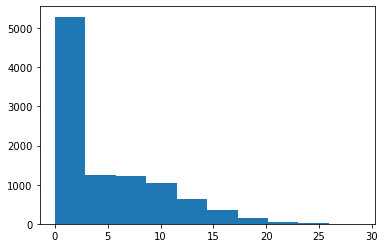

In [43]:
list_loss = np.sort(list_loss)[::-1]
plt.hist(list_loss[:])

# VGG16 train_0 -> Res18 train_1 FGSM

In [37]:
list_loss = [0.02573445811867714, 9.298280929215252e-06, 0.9777392148971558, 0.03862066566944122, 0.08416818082332611, 1.0205039978027344, 4.0995659828186035, 9.957225799560547, 0.02278994396328926, 3.888018846511841, 2.447521209716797, 0.11814843863248825, 0.6581741571426392, 1.5735502529423684e-05, 6.556489552167477e-06, 8.267593383789062, 0.22592593729496002, 4.053647994995117, 0.0006387577159330249, 2.729855441430118e-05, 12.06521224975586, 6.512465953826904, 4.990243434906006, 7.08790397644043, 27.034088134765625, 10.873554229736328, 7.728193759918213, 0.001696577062830329, 2.474874496459961, 2.5626518726348877, 6.015393257141113, 2.3841855067985307e-07, 14.322314262390137, 5.177249908447266, 0.38705065846443176, 12.413071632385254, 3.045227527618408, 8.378381729125977, -0.0, 4.887569048150908e-06, 5.960462772236497e-07, 0.4618343114852905, 1.2651417255401611, 8.274897575378418, 3.099436753473128e-06, 0.0002008474839385599, 1.811964830267243e-05, 13.067377090454102, 11.344184875488281, 3.435147523880005, 9.415534973144531, 8.201262971851975e-05, 8.021217346191406, 3.780444622039795, 0.1624174416065216, 5.964609146118164, 6.613893985748291, 8.660497665405273, 7.007654666900635, 6.9828338623046875, 0.000198821333469823, 7.508011341094971, 5.312130451202393, 8.661079406738281, 9.470475196838379, 6.499231815338135, 17.103017807006836, -0.0, 8.002779960632324, 1.4753203392028809, 7.7441277503967285, 8.98367977142334, -0.0, -0.0, 13.081009864807129, 0.011959869414567947, 3.6196682453155518, 1.6689160474925302e-05, 2.220137119293213, 6.9141146923357155e-06, -0.0, 7.820991516113281, 0.6747782826423645, 6.615896563744172e-05, 0.19127357006072998, 6.935570240020752, 5.790506839752197, 3.116877317428589, 0.6489443778991699, 9.548345565795898, 1.0728830375228426e-06, 1.1666845083236694, -0.0, 7.582493305206299, 3.460346221923828, 0.0053563653491437435, 10.254892349243164, 11.458494186401367, -0.0, 0.07053396850824356, 6.83045873302035e-05, 17.060405731201172, 0.09673362970352173, 1.2514139413833618, 13.350435256958008, 5.690153121948242, 17.58590316772461, 6.091489315032959, -0.0, 4.2914423829643056e-05, 1.793025016784668, 1.0967194612021558e-05, 0.13870848715305328, 13.26124095916748, 6.955262184143066, 8.680075645446777, 1.1230847835540771, 4.4728593826293945, 9.936254501342773, 0.015512637794017792, 10.869041442871094, 3.739800453186035, 9.172348976135254, 5.960462772236497e-07, 4.244362831115723, 0.0006249382277019322, 0.0018780466634780169, 2.221219301223755, 17.808944702148438, 8.751653671264648, 20.828327178955078, 7.0133843421936035, 1.3947389561508317e-05, -0.0, 0.0763016790151596, 8.454353332519531, 0.3208079934120178, 2.062299427052494e-05, 0.21743375062942505, 12.029780387878418, 12.240401268005371, 3.099393507000059e-05, 7.986990567587782e-06, 5.568770885467529, 0.00026675479602999985, 5.033127307891846, 7.291404724121094, 7.473153591156006, 0.011513808742165565, 0.020494600757956505, 12.844037055969238, 3.8708388805389404, 17.228042602539062, 0.2724260687828064, 0.0035843905061483383, 14.254881858825684, 8.17692756652832, 3.6954811548639555e-06, 8.280780792236328, 0.00023529145983047783, 0.0003129946126136929, 11.954869270324707, 6.907679557800293, 8.256375312805176, 1.311301275563892e-06, 1.2365455627441406, 0.0002926159941125661, 9.884300231933594, 9.586797714233398, 15.065540313720703, 0.004132778849452734, 10.121933937072754, 4.976340293884277, 1.3834419250488281, 12.286850929260254, 0.045892659574747086, 8.026422500610352, 2.922900676727295, 11.368417739868164, 2.109982233378105e-05, 0.0011038646334782243, 3.2287654876708984, 7.152555099310121e-07, 10.043834686279297, 9.368551254272461, -0.0, 4.20539665222168, 0.05497866868972778, 13.626812934875488, 0.18274331092834473, 2.372236667724792e-05, 5.97151517868042, -0.0, 13.42829704284668, 18.41636848449707, 4.483487606048584, -0.0, 0.0006235085893422365, 0.25693458318710327, 0.037390172481536865, 0.5772889256477356, 11.132535934448242, 1.585470999998506e-05, 5.357256889343262, 11.826630592346191, 3.933898824470816e-06, 0.013226509094238281, 0.10359668731689453, -0.0, 0.11839298903942108, 3.963054895401001, 9.049691200256348, 0.00021455370006151497, 11.086832046508789, 0.0005994430393911898, 1.3191986083984375, 0.00518086226657033, 0.08429551124572754, 5.2495646476745605, 7.88130521774292, 6.04279088973999, 10.57809066772461, 0.13601142168045044, 5.130511283874512, 11.754236221313477, 4.63440465927124, 6.965427398681641, 0.0005189026123844087, 4.768370445162873e-07, 14.83480453491211, 1.373166561126709, 2.9831624031066895, 2.9003095626831055, 2.5627782344818115, -0.0, -0.0, 2.303356409072876, 8.21320915222168, 0.04333740472793579, 0.19137506186962128, 0.04467974603176117, 6.519911766052246, 2.6924474239349365, 0.3875698149204254, 1.1920928244535389e-07, 18.217710494995117, 8.619861602783203, 17.864667892456055, 0.0057104784063994884, 0.758924126625061, 7.894354343414307, 6.794906312279636e-06, 4.410646579344757e-05, 9.176240921020508, 5.708242893218994, 12.865385055541992, 4.9743733406066895, -0.0, 0.02826758660376072, 4.136697292327881, -0.0, 10.974957466125488, 5.099968910217285, 8.371227264404297, 17.787002563476562, 0.7576175928115845, 1.3617420196533203, 0.008893284946680069, 0.035313189029693604, 11.802014350891113, 2.8901970386505127, 11.446197509765625, 11.371538162231445, 11.942604064941406, 7.775369644165039, 11.077720642089844, 1.6689286894688848e-06, 2.3182103633880615, 0.2917642295360565, 2.145764938177308e-06, 0.00020180096908006817, 0.008352231234312057, 0.27079084515571594, 0.00010871296399272978, 0.4594879150390625, 5.071289539337158, 0.0034899539314210415, 1.07287787614041e-05, 0.022790877148509026, 10.670829772949219, 0.0013229437172412872, 7.735858917236328, 4.187401294708252, 2.7571957111358643, -0.0, 0.003952549304813147, 1.506411075592041, -0.0, -0.0, 1.585470999998506e-05, 3.557669162750244, 7.342500686645508, 3.054215908050537, 0.16549985110759735, 0.07735230028629303, 11.781118392944336, 10.180681228637695, 4.67983865737915, 8.611937522888184, 0.4315212666988373, 8.451650619506836, 0.0004940004437230527, 0.04255560413002968, 7.031164646148682, 9.375733375549316, 3.6852996349334717, 8.764942169189453, 0.0291721373796463, 6.865225315093994, 0.058856744319200516, 7.016754150390625, 0.5853793621063232, 0.0007545484695583582, 2.5942068099975586, 1.4305104514278355e-06, 9.534674644470215, 6.85450553894043, 11.198996543884277, 8.022463589441031e-05, 0.001060757553204894, 0.0012856797548010945, 0.00010156115604331717, 1.6902580261230469, 10.487489700317383, 1.5174566507339478, 1.3264029026031494, 3.393906593322754, 11.981799125671387, 5.7344069480896, 9.70069694519043, 0.4026019871234894, 2.622600959512056e-06, 14.734236717224121, 12.459763526916504, 0.04588639736175537, 3.0945072174072266, 10.408072471618652, 7.4400715827941895, -0.0, 1.1920928244535389e-07, 4.627634048461914, 0.09462429583072662, 0.5253459215164185, -0.0, 19.270479202270508, 6.747991561889648, 12.588735580444336, 14.817520141601562, 0.00015841660206206143, 2.6232364177703857, 7.721088886260986, 3.2186455882765586e-06, -0.0, 9.482544898986816, -0.0, 0.016635045409202576, 4.115432262420654, 2.3841855067985307e-07, 9.062211990356445, 9.54474925994873, 3.933898824470816e-06, 0.0009289240115322173, 4.660974445869215e-05, 0.06731638312339783, 1.6927575416048057e-05, 0.3241715431213379, 0.013522455468773842, 9.862314224243164, 0.024952257052063942, 4.310630798339844, 8.656472206115723, 0.0394776314496994, 2.5152843591058627e-05, 0.00809093564748764, 7.830215930938721, 5.698370456695557, 4.161033630371094, 6.963663101196289, 2.4644882678985596, 0.0057305097579956055, 9.054849624633789, -0.0, 7.44097375869751, 2.635232925415039, 0.00672032218426466, 2.862687587738037, 10.628783226013184, 9.836557388305664, 0.00018666432879399508, 4.768370445162873e-07, 0.0019803689792752266, 0.004463827703148127, 12.010441780090332, 7.152555099310121e-07, 0.00014435203047469258, 0.3242678940296173, -0.0, 15.800957679748535, -0.0, 4.643789291381836, 0.007388173136860132, 2.0351362228393555, 12.780471801757812, 0.4422720968723297, 3.6052963733673096, 0.02614484168589115, 0.0010324153117835522, 0.0001802282058633864, 3.8424463272094727, 0.09720826894044876, 0.18267062306404114, 8.638069152832031, 1.6927575416048057e-05, -0.0, 17.485431671142578, 0.2847440838813782, 10.475523948669434, 5.18852424621582, 2.586808113846928e-05, 0.00018153927521780133, 5.4960713386535645, 9.483985900878906, 7.480679988861084, 7.656649589538574, 0.90743088722229, 5.9191203117370605, 0.5030813217163086, 13.081547737121582, 6.389413465512916e-05, 9.910135269165039, 8.806937217712402, 0.18751248717308044, 5.531993389129639, 0.16805900633335114, 9.027862548828125, 27.66777229309082, 2.330230951309204, 2.825220326485578e-05, 0.602180004119873, 0.25440236926078796, 11.2772216796875, 0.19366052746772766, 1.1920928244535389e-07, 0.009408657439053059, 1.3429076671600342, 9.894321920000948e-06, 0.5022323727607727, 2.703678607940674, 0.0011375630274415016, 8.925071716308594, 5.453489780426025, 11.747965812683105, 3.159468173980713, 1.1306688785552979, 6.187078475952148, 7.899600028991699, 2.8687593936920166, -0.0, 0.06273965537548065, -0.0, 2.754600763320923, 3.5400381088256836, 1.1920928244535389e-07, 6.791417598724365, 0.3544084131717682, 10.633980751037598, 14.863565444946289, 9.693625450134277, 3.894217014312744, 4.307830333709717, 3.499241828918457, 0.001660279231145978, 0.0009507188224233687, 11.567864418029785, 7.219846248626709, 5.816044807434082, 2.5605428218841553, 0.4343858063220978, 1.2681257724761963, 0.09797801077365875, 13.199201583862305, 5.994481086730957, 0.08898689597845078, 8.937594413757324, 9.198226928710938, 8.344646857949556e-07, -0.0, 8.344646857949556e-07, 8.644017219543457, 8.583032467868179e-06, 0.5299050807952881, 7.786389350891113, 1.4976913928985596, 5.58351993560791, 4.303020000457764, 1.1920928244535389e-07, 0.017051756381988525, 12.586295127868652, 0.03444873169064522, 2.0076985359191895, -0.0, 6.222531374078244e-05, -0.0, 12.414060592651367, 0.00848308950662613, 0.45829343795776367, 5.634489059448242, 5.857998847961426, 0.2150820642709732, 1.811964830267243e-05, -0.0, 1.0013530300057027e-05, 8.740564346313477, 10.415719032287598, 0.00046564225340262055, 3.7431014789035544e-05, 8.503447532653809, 3.504691630951129e-05, 3.7319724559783936, 4.708446502685547, 0.038352251052856445, 0.4028175473213196, 8.258977890014648, 1.9073468138230965e-06, 1.5382707118988037, 4.499432563781738, -0.0, 6.467128276824951, 5.301284313201904, -0.0, 8.225102646974847e-05, 11.298933982849121, 0.07099965959787369, 0.03670460358262062, 9.298280929215252e-06, 3.6775968074798584, 4.408040523529053, 7.984210968017578, 0.42388713359832764, -0.0, 6.644491195678711, 2.6525654792785645, 0.05186982825398445, 5.14193058013916, 0.014896584674715996, 6.386051177978516, 6.965455055236816, 3.0066781044006348, 8.491951942443848, 12.071345329284668, 4.0531076592742465e-06, 9.142143249511719, 8.663098335266113, 11.46572208404541, 1.9073468138230965e-06, 19.74842643737793, 2.9466400146484375, 3.752648115158081, 13.63309097290039, 0.19085809588432312, 3.5343704223632812, 0.23117491602897644, 12.11143970489502, 7.130311489105225, 0.0019262346904724836, 9.155019760131836, 1.1920928244535389e-07, 16.09146499633789, 0.0023651740048080683, 2.715954065322876, 7.152555099310121e-07, 5.223433971405029, 8.344646857949556e-07, 12.38973331451416, -0.0, 8.34461570775602e-06, 5.9913859367370605, 10.102812767028809, 0.0005310555570758879, 0.4645155072212219, 2.2016441822052, 0.0010476582683622837, -0.0, 1.4630136489868164, 4.689766883850098, 24.906946182250977, 5.9126061387360096e-05, 9.623441696166992, 13.695054054260254, 0.27655091881752014, 1.413045883178711, 7.061245441436768, -0.0, 1.9073468138230965e-06, 1.9506733417510986, 0.00012432756193447858, 10.89625072479248, 1.5909481048583984, 11.816551208496094, 1.4305104514278355e-06, 0.07619873434305191, 6.0626959800720215, 0.0015958918957039714, 7.152555099310121e-07, 5.916579723358154, -0.0, 5.72213077545166, 0.0004204819560982287, 13.619094848632812, 0.0020794689189642668, 4.204529762268066, 1.3555909395217896, 12.855308532714844, 8.996630668640137, 22.081981658935547, 0.946638286113739, 0.00038556772051379085, 0.052668698132038116, -0.0, 9.1710786819458, 12.781229972839355, 5.730236530303955, 8.83888053894043, 0.008423040620982647, 5.67461633682251, 11.107401847839355, -0.0, 0.04489438608288765, 1.9358240365982056, 1.7969393730163574, 9.718029022216797, 10.035103797912598, 0.0013813963159918785, 1.811964830267243e-05, 0.0004755319678224623, 12.379323959350586, 7.763638496398926, 0.0008968859910964966, 0.00485799927264452, 0.06609784066677094, -0.0, 0.07365695387125015, 6.943963527679443, 2.106231689453125, 0.10938660055398941, 10.960394859313965, 0.00026663561584427953, 6.041952610015869, 0.0006361367995850742, 12.32887077331543, 0.013859933242201805, 1.5497195136049413e-06, 0.010505729354918003, 0.0013816345017403364, 1.7254230976104736, 2.3421175479888916, 1.7355780601501465, 6.451141357421875, 2.5174810886383057, 3.0776352882385254, -0.0, 9.854995727539062, 1.2810556888580322, 7.92710343375802e-05, 12.807913780212402, 4.502060413360596, 16.89496421813965, 2.6143484115600586, 7.6734700202941895, 0.0008473381749354303, 11.61240291595459, -0.0, 5.872310638427734, 0.00115697190631181, 4.3987260141875595e-05, 13.103286743164062, 8.763811111450195, 9.819595336914062, 6.902690410614014, 1.148742437362671, 6.210137367248535, 0.001999285537749529, 9.394062042236328, 5.2033257484436035, 6.794906312279636e-06, 1.9669404029846191, 0.00013195598148740828, 8.513388633728027, 0.008975398726761341, 1.0293858051300049, 1.0728830375228426e-06, 0.0009592937421984971, 0.6731475591659546, 6.299897193908691, 13.568740844726562, 1.238510012626648, 0.0032278599683195353, 5.878480911254883, 0.002922432729974389, 2.7950439453125, 6.247673511505127, 1.311301275563892e-06, -0.0, 14.006001472473145, 0.0007670559571124613, 3.4043726921081543, 11.648287773132324, 4.329447269439697, 4.790812969207764, 4.858635425567627, 0.18670493364334106, 2.269367218017578, 0.00014590153296012431, 2.3862786293029785, 2.3841855067985307e-07, 4.070564270019531, 14.252283096313477, 1.6447631120681763, 8.610478401184082, 6.350584030151367, 0.022035988047719002, 12.179615020751953, 0.046328768134117126, 7.7873101234436035, 0.691871702671051, 1.1086402082582936e-05, 10.487058639526367, -0.0, 22.087684631347656, 13.2261381149292, 4.489985466003418, 1.971945881843567, 0.014094807207584381, 4.262843132019043, 10.995320320129395, 1.1692965030670166, 0.008341236039996147, -0.0, 3.948138952255249, 0.0005744237569160759, 2.863358974456787, 11.514680862426758, 0.5167506337165833, 4.410734163684538e-06, 8.101964950561523, 11.27882194519043, 0.11229187995195389, -0.0, 5.7051520347595215, 8.628597259521484, 0.035611413419246674, 0.33112528920173645, 1.7647781372070312, 7.442429065704346, 0.001966211013495922, 0.0010634964564815164, 14.226661682128906, 13.545409202575684, 0.9792291522026062, 0.007881376892328262, 1.1444414854049683, 13.00468921661377, 7.56280517578125, 6.5762128829956055, 7.490849018096924, 9.480545997619629, 5.212224960327148, 0.00021288513380568475, -0.0, 10.440601348876953, 15.030723571777344, 14.37674617767334, 3.4346303939819336, 15.316720008850098, 9.425938606262207, 10.976082801818848, 5.483612312673358e-06, 2.441793441772461, 7.827206611633301, 3.576278118089249e-07, 9.413107872009277, -0.0, 9.673685073852539, 0.32787108421325684, 13.205992698669434, 0.0004605186404660344, 10.02879810333252, 2.9802276912960224e-06, 0.049961771816015244, 16.670618057250977, 7.163078784942627, 0.3108625113964081, 0.3070363402366638, 0.07383855432271957, 3.83100962638855, 0.4351728558540344, 0.0030906074680387974, 1.4305104514278355e-06, 0.09250343590974808, 5.643538475036621, 6.205644607543945, 0.05750404670834541, 17.355239868164062, -0.0, 0.004057983867824078, 2.1457441107486375e-05, 6.178820610046387, 0.7834611535072327, 10.92330265045166, 0.09336823970079422, 7.671494483947754, 0.006177379284054041, 15.956414222717285, 0.7527046203613281, 0.0047404286451637745, 2.8097171783447266, 5.993595600128174, 0.012277503497898579, 9.293992042541504, 8.032571792602539, 18.273372650146484, 0.5766520500183105, 4.172316494077677e-06, 5.960462772236497e-07, 7.552720069885254, 4.433600902557373, 11.776201248168945, 10.78826904296875, 1.3790637254714966, 0.0015789910685271025, 2.634490556374658e-05, 1.3494212627410889, 0.21135587990283966, 0.08683283627033234, 12.380578994750977, 6.340787410736084, 0.004179433919489384, -0.0, 10.45552921295166, 8.049569129943848, 20.690885543823242, 1.7165990357170813e-05, 11.702471733093262, 15.556621551513672, -0.0, 1.7881377516459906e-06, 12.37630558013916, 9.112388610839844, 17.226314544677734, 0.004116870928555727, 2.1394472122192383, 12.158868789672852, 0.15111273527145386, 6.88592529296875, 1.847726889536716e-05, 11.82961654663086, 8.189043998718262, 0.10960937291383743, -0.0, 12.495108604431152, 0.0011261318577453494, 0.9658988118171692, 7.159397125244141, 0.08489206433296204, 8.427741704508662e-05, 1.1488364934921265, 8.40390202938579e-05, 3.6393532752990723, 9.304743766784668, 4.333283424377441, 0.0002004899288294837, 5.765819549560547, 8.778666496276855, 0.08477313071489334, 0.08037159591913223, 4.6491513785440475e-06, 2.3963279724121094, 4.302056789398193, 0.0047040036879479885, 7.152555099310121e-07, 3.4522817134857178, 8.954886436462402, 14.075122833251953, 16.696260452270508, 0.0038594536017626524, 3.1705095767974854, 1.966933996300213e-05, 17.729000091552734, 0.00010656742961145937, 0.00010263393050990999, 15.223960876464844, 5.170307159423828, 2.7430429458618164, -0.0, 0.9818960428237915, 0.10015039145946503, 8.283206939697266, 3.1944644451141357, 8.106198947643861e-06, 2.0265558760002023e-06, 1.6212332411669195e-05, 1.9308412075042725, 5.144045829772949, 11.221952438354492, 8.557029724121094, 1.8714746236801147, 8.246826171875, 0.003657320514321327, 7.510157047363464e-06, 2.3483953555114567e-05, 0.023253250867128372, 0.5405713319778442, 8.756047248840332, 7.577719211578369, 2.343568801879883, 4.768370445162873e-07, 17.381351470947266, 1.854701042175293, 3.811122179031372, 9.447661399841309, 0.5746275186538696, 7.024937152862549, 8.79028034210205, 5.358180046081543, 2.8609820219571702e-05, 0.00026306029758416116, 5.609103202819824, 6.67698335647583, 11.87335205078125, 0.00018726025882642716, -0.0, 7.159874439239502, 0.29548799991607666, 5.960462772236497e-07, -0.0, 3.974712610244751, 0.013585491105914116, 8.142616271972656, 6.146735191345215, 0.00025388356880284846, 6.080587863922119, 7.762904644012451, 4.6627421379089355, 7.045305252075195, 3.135155202471651e-05, 2.726857900619507, 0.2804803252220154, 8.224335670471191, 0.22197595238685608, 1.6689286894688848e-06, 0.11372317373752594, 3.335084915161133, 0.10557618737220764, 9.011578559875488, 10.171316146850586, 0.0360562838613987, 2.2248950004577637, 0.000797192333266139, 0.022378766909241676, 0.010130180977284908, 9.989239333663136e-05, 0.46548697352409363, 9.66831111907959, 13.477097511291504, 9.86119270324707, 4.172316494077677e-06, 3.259887456893921, 11.45687198638916, 8.447491645812988, 11.100637435913086, 3.1372578144073486, 0.11782743036746979, 5.669198513031006, 0.008785995654761791, 12.409847259521484, 4.718631267547607, 9.067975044250488, 4.497101306915283, 0.01547132059931755, 9.7381591796875, 6.166715145111084, 0.13427144289016724, -0.0, 0.025076892226934433, 0.18371616303920746, 5.034079551696777, 2.7630562782287598, 0.07904429733753204, -0.0, 5.960462772236497e-07, 0.0006214833119884133, 15.976234436035156, 1.311301275563892e-06, 1.4543427823809907e-05, 5.722029527532868e-06, 7.480850696563721, 9.184856414794922, 9.77311897277832, 12.313737869262695, 0.04591691121459007, -0.0, 1.1920928244535389e-07, 8.643052101135254, 0.05728500708937645, 8.440467834472656, 0.001209719106554985, 12.716618537902832, 0.0048691509291529655, -0.0, 11.553524017333984, 0.3839731514453888, 7.662141799926758, 8.463896751403809, 0.7256743907928467, 5.819850444793701, 0.003059827256947756, 7.230806827545166, 5.1973900554003194e-05, 3.7512948513031006, -0.0, -0.0, 0.04020538926124573, 12.101314544677734, 0.35596659779548645, 0.03897511959075928, 1.8479877710342407, 0.009452351368963718, 6.903828144073486, 4.336977958679199, 6.7126922607421875, 5.229244232177734, -0.0, 11.002083778381348, 16.61130714416504, 0.009576689451932907, 10.971728324890137, 7.126262664794922, 1.1020268201828003, 2.1283135414123535, 0.00014590153296012431, 14.86680793762207, 11.025428771972656, -0.0, 13.452449798583984, 7.941690921783447, 4.494089080253616e-05, 13.912310600280762, 9.90520191192627, 8.728975296020508, 2.633807420730591, 0.00013016807497479022, 6.313485145568848, 0.9019054174423218, -0.0, 9.570270538330078, 7.679933547973633, 0.40588250756263733, 0.032502610236406326, 0.07105951011180878, 3.4321212768554688, 2.0709147453308105, 4.456014633178711, 14.42762565612793, 9.2993745803833, 6.6850996017456055, 0.05414867028594017, 1.4173272848129272, -0.0, -0.0, 3.4927710657939315e-05, 6.2518229484558105, 4.6491513785440475e-06, 0.0021990183740854263, 5.396225929260254, 16.045085906982422, 1.1920928244535389e-07, 0.0001255195093108341, 0.0002817710628733039, 2.1798648834228516, 0.4908379018306732, 0.0009926398051902652, -0.0, 4.43248987197876, 15.454974174499512, 8.66065788269043, 0.1119823157787323, 11.018233299255371, 0.11397700011730194, 9.034218788146973, 0.026152273640036583, 7.742528438568115, 1.1920928244535389e-07, 0.00047052756417542696, 0.00017021637177094817, 0.007939211092889309, 0.008334971033036709, 6.5205356804654e-05, 7.791632175445557, 12.827875137329102, 1.311301275563892e-06, 0.0001463782973587513, -0.0, 15.274524688720703, 0.2514456808567047, 9.633586883544922, 13.666731834411621, 9.567268371582031, 0.0010127659188583493, 0.07142529636621475, 2.3841855067985307e-07, 10.847419738769531, 8.279767990112305, 1.7143973112106323, 0.0048683201894164085, 9.543088912963867, 5.483612312673358e-06, 5.123306751251221, 0.0504874661564827, 1.5387401580810547, 1.4671757221221924, 6.903761863708496, 0.05811488255858421, 1.6278234720230103, 1.4815868139266968, 2.32472562789917, 5.960462772236497e-07, 6.926634311676025, 0.08746697753667831, 11.289607048034668, 0.047459427267313004, 0.21826085448265076, 8.068009376525879, 2.930105209350586, 1.0728830375228426e-06, 10.747379302978516, 3.8958938121795654, 11.015374183654785, 1.6202969551086426, 1.4305104514278355e-06, 8.721839904785156, 11.275400161743164, 12.188630104064941, -0.0, 4.768370445162873e-07, 0.00011634149996098131, 0.020745202898979187, 18.411413192749023, 1.3969690799713135, 10.11642837524414, 9.536738616588991e-07, 2.6225699912174605e-05, -0.0, 14.768084526062012, 6.462109565734863, 8.284702198579907e-05, 14.19650650024414, 1.976294755935669, 1.476522445678711, 3.169393539428711, 6.502203941345215, 0.01812385581433773, 1.4578152894973755, 2.199970245361328, 0.0022193582262843847, 6.055576801300049, 5.131448268890381, 14.067740440368652, 0.02071157470345497, 0.08090057224035263, 9.894321920000948e-06, 1.3844878673553467, 14.863570213317871, 12.331685066223145, 4.093325138092041, 13.519645690917969, 3.685157060623169, 2.59311580657959, 11.11553955078125, 0.010480721481144428, 0.03352784737944603, 9.85700798034668, 17.1153564453125, 0.0461801178753376, 5.905320167541504, 13.411020278930664, 7.033323527139146e-06, -0.0, -0.0, 15.337968826293945, 9.16403865814209, 0.10478544235229492, 3.9503188133239746, 7.56950321374461e-05, 9.846202738117427e-05, 0.0002002515539061278, 9.285355567932129, 0.00041869457345455885, 11.870963096618652, 0.6994658708572388, 3.9989609718322754, -0.0, 0.1966400444507599, 10.385920524597168, 0.01211734488606453, 0.14479954540729523, 0.024938536807894707, 0.016817457973957062, 9.473149299621582, 0.06943656504154205, 17.43638801574707, 3.598356246948242, 0.05943552404642105, 14.104596138000488, 8.885973930358887, 18.89378547668457, 0.538006067276001, 6.26054573059082, 5.0744829177856445, 0.0433734767138958, 4.4090094566345215, 5.039340019226074, 7.152555099310121e-07, 0.011131919920444489, 5.36387825012207, 7.2703986167907715, 0.03664174675941467, 2.6010196208953857, 0.00023338454775512218, 8.097054481506348, 6.521806240081787, 12.133660316467285, 0.0313858687877655, 1.7252907752990723, -0.0, 7.288842678070068, 1.1278197765350342, 3.2230117321014404, 5.012053966522217, 8.011078834533691, 1.4424220353248529e-05, 5.231808185577393, 5.865037441253662, 1.6689286894688848e-06, -0.0, 3.0748751163482666, 0.0005818104837089777, 0.045649077743291855, 0.18987056612968445, 1.5225012302398682, -0.0, 5.718413829803467, 5.228614330291748, 13.76664924621582, 6.18397855758667, 0.0001037067049765028, 0.7600641250610352, 0.13665714859962463, 0.00020394629973452538, 13.775298118591309, 1.9449660778045654, 0.013432127423584461, 0.00024423000286333263, 6.462950229644775, 5.586110591888428, 2.683082342147827, 6.796751022338867, 6.398170471191406, 2.3657283782958984, 15.235143661499023, 1.1920928244535389e-07, 0.0005285535007715225, 0.005603676661849022, 0.5751669406890869, 0.030277244746685028, 0.0019929802510887384, 7.8992600440979, -0.0, 9.933586120605469, 10.855871200561523, 1.6755224466323853, 4.172316494077677e-06, 0.7967769503593445, 4.7736687660217285, 2.1499602794647217, 1.6391905546188354, 0.021684927865862846, 7.717474460601807, 0.00017534149810671806, 0.00011312322021694854, 13.671833992004395, 3.016498327255249, 9.351526260375977, 0.03727739676833153, 0.0004886387032456696, 13.700242042541504, 3.8530352115631104, 7.844536304473877, 1.9073468138230965e-06, 8.285316467285156, 7.071372985839844, 1.1920928244535389e-07, 17.039260864257812, 6.021209716796875, 10.61341667175293, -0.0, 0.0009545299108140171, 1.1920928244535389e-07, 2.339693069458008, 5.480728626251221, 8.654219709569588e-05, 0.23580895364284515, 0.032231736928224564, 0.014742130413651466, 7.154836654663086, 0.04607925936579704, 7.287795066833496, 11.297863006591797, -0.0, 3.384626626968384, 8.105902816168964e-05, 12.847271919250488, 2.9802276912960224e-06, 0.0007620529504492879, 15.621829986572266, 10.010895729064941, 0.3801214396953583, 0.00882770773023367, 3.0078651905059814, 8.87736701965332, 13.66966724395752, 1.3821693658828735, 17.92782211303711, 4.100098609924316, 1.126613974571228, 15.245161056518555, 9.417489309271332e-06, 1.1333215236663818, 0.0017059786478057504, 2.571683645248413, 5.960462772236497e-07, 10.651869773864746, -0.0, 0.11094315350055695, 3.4073562622070312, 3.4900803565979004, 7.917099952697754, 9.829598426818848, 0.0015335239004343748, 0.00020108585886191577, -0.0, 6.446517467498779, 0.2023477554321289, 1.764281842042692e-05, 6.280447483062744, 7.070933818817139, 1.0443962812423706, 1.8200998306274414, 5.502625942230225, 3.48465633392334, 1.2336986064910889, 0.008625276386737823, 0.00011586471373448148, 15.666568756103516, 7.141968250274658, 4.557417869567871, -0.0, 0.025513574481010437, 7.113537311553955, 4.181563854217529, 10.34630298614502, 5.916028022766113, 2.8068857192993164, 8.805110931396484, 7.390948667307384e-06, 11.165692329406738, 3.5225112438201904, 0.04038858786225319, 3.5357792377471924, 0.02514711022377014, 16.52415657043457, 0.012427865527570248, 3.9590210914611816, 0.2654186487197876, 8.855009078979492, 12.883743286132812, 6.599062919616699, 0.18122407793998718, 0.0030709984712302685, 1.3893364667892456, 5.406320095062256, 19.405845642089844, 0.07619773596525192, 0.3110649883747101, 23.194965362548828, 10.908146858215332, 15.202902793884277, 14.414993286132812, 5.125986263010418e-06, 4.9052839279174805, 3.4188904762268066, 4.31528314948082e-05, 10.604948997497559, 7.450303382938728e-05, 5.678762435913086, 9.921785354614258, 2.537747621536255, 5.79953145980835, 0.28902095556259155, 1.2061172723770142, 9.775113539944869e-06, 2.407998726994265e-05, 0.5061773657798767, 0.29498201608657837, 0.0013555632904171944, 0.006497921887785196, 5.881441116333008, 15.35578441619873, 10.420798301696777, 0.642352283000946, 3.2897837162017822, 0.0005206898204050958, 5.408271312713623, 4.768370445162873e-07, 19.08601951599121, 2.3780577182769775, 5.358226776123047, 3.0040289857424796e-05, 0.8912065625190735, 0.9296799898147583, 2.8910021781921387, 9.660235404968262, 0.186945840716362, 7.115642547607422, 0.02426462434232235, 2.879000425338745, 3.202369213104248, 6.585406303405762, 0.00022516099852509797, 12.923027992248535, 0.17271392047405243, 0.38193532824516296, 4.325350284576416, 0.010355904698371887, 18.80872917175293, 7.561863899230957, 3.802703940891661e-05, 9.345571743324399e-05, 0.7732932567596436, 13.592665672302246, 0.9248126149177551, 0.008729864843189716, 0.018107114359736443, 10.79233455657959, 0.004663543310016394, 14.569223403930664, 6.808432579040527, 1.645074735279195e-05, 0.005642320960760117, 0.000506511190906167, 0.4614623785018921, 8.517694473266602, 0.1065756157040596, 11.137392044067383, 1.3828182090946939e-05, 2.6114344596862793, 0.001412466517649591, 8.222702026367188, 0.8945370316505432, 3.6141538619995117, 10.305327415466309, 12.679651260375977, 0.03912289813160896, 1.549708758830093e-05, 7.748573807475623e-06, 1.6870111227035522, 1.8506615161895752, 2.50339189733495e-06, 2.1588807106018066, 0.001191144809126854, 0.9945987462997437, -0.0, 0.27761849761009216, 0.0019130278378725052, 4.063875675201416, 0.16162283718585968, 0.0002379134384682402, 8.160906791687012, 2.145764938177308e-06, 14.152937889099121, 0.09878549724817276, 1.4526714086532593, 10.11977767944336, 10.32833194732666, 4.688999176025391, 0.042154304683208466, 11.290996551513672, 20.616073608398438, 15.023406982421875, 0.0027359218802303076, 15.321115493774414, 2.3841830625315197e-06, 0.07271075248718262, 8.34461570775602e-06, 10.355786323547363, 13.033339500427246, 0.0013612775364890695, 5.362240791320801, 13.408876419067383, 0.05155501514673233, 3.9565930366516113, 8.59012222290039, 20.12240982055664, 6.9141146923357155e-06, 4.2437604861333966e-05, 0.0001565095444675535, 4.270791053771973, 1.5049184560775757, 0.06860802322626114, -0.0, 5.585106372833252, 0.0012229352723807096, 14.806663513183594, 11.538701057434082, 0.0003592322755139321, 1.2993727978027891e-05, 0.41776931285858154, 10.107398986816406, 7.241549491882324, 2.0645337104797363, 9.768548011779785, 2.687518835067749, 0.18241934478282928, 7.399026870727539, 4.592837810516357, 3.397406908334233e-05, 10.880311965942383, 8.373250961303711, 1.3671387434005737, 6.643223285675049, 5.41716194152832, 0.7013630867004395, 0.17015549540519714, 3.520005226135254, 3.7748565673828125, 6.439820289611816, 0.4240478575229645, 0.03190328925848007, 0.06429614126682281, 5.960462772236497e-07, 16.638582229614258, 7.152555099310121e-07, 0.01669999584555626, 8.344646857949556e-07, 0.005296365823596716, 6.614876747131348, 0.7519633769989014, 5.467609405517578, 3.397684097290039, 0.0007834940915927291, 6.968818664550781, 0.009839368052780628, 1.3810290098190308, 0.0007876630988903344, 0.008776187896728516, 12.694385528564453, 6.184787273406982, 14.046966552734375, 2.362854480743408, 3.5180578231811523, 2.3841855067985307e-07, 12.021567344665527, 11.823988914489746, 0.00013982271775603294, 4.13413667678833, 7.843239784240723, 3.4450891689630225e-05, 0.012857865542173386, 6.88890266418457, 0.4665188193321228, 1.8931905031204224, -0.0, 1.3232143828645349e-05, 0.6372252702713013, 4.501308441162109, 4.155711650848389, 2.2732481956481934, 11.383942604064941, 4.60137271147687e-05, 3.5916216373443604, 4.768360213347478e-06, 5.121990203857422, 4.086650371551514, 0.020970527082681656, 9.432568550109863, 6.210161209106445, 12.160724639892578, 0.05295919254422188, 4.917715072631836, 0.20079933106899261, 6.872974395751953, 8.885865211486816, 2.7418097943154862e-06, 13.428805351257324, 8.583032467868179e-06, 5.885616779327393, 3.7511074542999268, 0.00011121608258690685, 1.446122407913208, 9.275848388671875, 1.262500286102295, 0.6248893141746521, 9.301977157592773, 4.831235408782959, 9.189253807067871, 19.764915466308594, 6.082672595977783, 10.832352638244629, 6.487600326538086, 5.283863067626953, 0.0002526917669456452, 8.581137657165527, 10.195428848266602, 5.23331356048584, 18.798824310302734, 0.577082097530365, 4.172316494077677e-06, 0.01952768862247467, 3.433168603805825e-05, 0.0007652691565454006, 0.0006173135479912162, 10.78621768951416, 0.650915801525116, 6.521374702453613, 6.524801731109619, 4.173367977142334, 3.2782016205601394e-05, 1.1920928244535389e-07, 12.525481224060059, 7.096652507781982, 7.34744930267334, 2.145764938177308e-06, 0.0015315004857257009, 8.177422569133341e-05, 0.006404588930308819, 0.00997557956725359, 1.4341285228729248, 14.399065017700195, 10.067028045654297, 4.885318756103516, 0.00016437610611319542, 0.0036747802514582872, 1.320098876953125, 0.004637083038687706, 3.412623405456543, 4.625213477993384e-05, 5.871791839599609, 9.895576477050781, 12.071303367614746, 2.9982147216796875, 0.0004627825692296028, 7.126114368438721, -0.0, 12.17110824584961, 4.694159507751465, 0.0004681444843299687, 15.475892066955566, 0.0008943848661147058, 7.946562767028809, 0.00130425242241472, 0.1488913595676422, 5.229048728942871, 12.324034690856934, 12.460005760192871, 18.197778701782227, 6.667266845703125, 5.811856269836426, 16.307292938232422, 2.7418097943154862e-06, 4.641353130340576, 14.483662605285645, 10.106266975402832, 0.008598684333264828, 0.0008606782066635787, 10.3876314163208, 1.1920928244535389e-07, 0.012095438316464424, 8.996940612792969, 11.288199424743652, 0.217754527926445, 4.437236785888672, 12.329822540283203, -0.0, 2.7294907569885254, 1.7217962741851807, 0.9941792488098145, 1.3112935448589269e-05, 15.833809852600098, 4.100883960723877, 2.0794026851654053, 8.305022239685059, 2.2270894050598145, 11.43809700012207, -0.0, -0.0, 0.005412092432379723, 12.260993003845215, 6.729701042175293, 3.576278118089249e-07, 0.023174280300736427, 7.200031757354736, 2.7258994579315186, 2.2941935062408447, 0.05758507922291756, 1.6689286894688848e-06, 3.5721473693847656, 1.7820864915847778, -0.0, 15.727209091186523, 0.0013394916895776987, -0.0, 6.964094638824463, 4.951777935028076, 2.267014741897583, 0.3984529376029968, 5.661633491516113, 2.264974000354414e-06, 1.3684883117675781, 3.3598341941833496, 0.011227641254663467, 0.0004170263418927789, 4.228297233581543, 5.960462772236497e-07, 4.768370445162873e-07, 0.8551096320152283, 1.6093124941107817e-05, -0.0, 0.12747064232826233, 3.8688559532165527, 0.00457015773281455, 0.19627302885055542, 0.09861420094966888, 0.00791449286043644, 0.00021181246847845614, 10.687223434448242, 0.355627179145813, 0.0012344843707978725, 1.5575909614562988, 8.14306926727295, 1.1920928244535389e-07, 4.88232421875, -0.0, 6.265548229217529, 5.272165298461914, 4.906545162200928, 4.457092761993408, 12.048225402832031, 5.260362148284912, 2.145764938177308e-06, 4.781394958496094, 6.757271766662598, 1.9957972764968872, 16.145750045776367, 1.6230921745300293, 6.508871555328369, 4.827938079833984, 0.002070070942863822, 4.386791229248047, 1.6715354919433594, 16.77682876586914, 10.85551929473877, 9.570804595947266, 0.04441648721694946, 2.6428024768829346, -0.0, 0.9785181283950806, 0.001100054127164185, 9.340907096862793, 2.264974000354414e-06, 12.049393653869629, 4.153121471405029, 0.0023117740638554096, 0.14237065613269806, 0.000962032878305763, 5.142909526824951, 23.357542037963867, 14.941895484924316, 0.00011848701251437888, 15.351576805114746, 2.3841855067985307e-07, 0.7162777781486511, 6.617966651916504, 0.08688901364803314, 0.0015969631494954228, 9.710630416870117, 7.704158306121826, 1.1920928244535389e-07, 11.727584838867188, 7.1829986572265625, 6.043903350830078, 12.750750541687012, 5.564323902130127, 15.581700325012207, 11.886734008789062, 5.517696857452393, 0.1655450016260147, 0.4683743715286255, 0.06051196902990341, 0.8361174464225769, 0.10916110128164291, 1.9073468138230965e-06, 0.0008420973899774253, -0.0, 10.173016548156738, 0.0013567537534981966, 0.0013809201773256063, -0.0, 2.622600959512056e-06, 3.0165016651153564, 17.846969604492188, 9.46804141998291, 4.449175834655762, 2.7337605953216553, 0.12039787322282791, 4.0531076592742465e-06, 3.028067111968994, -0.0, 16.433002471923828, 9.848027229309082, 13.740387916564941, 6.294052582234144e-05, 0.009599477984011173, 1.334005355834961, 1.1920928244535389e-07, 0.0004161922261118889, 0.026659293100237846, 14.207565307617188, 4.7801782784517854e-05, -0.0, 2.067211389541626, 0.00018952481332235038, 7.898290634155273, 2.3841855067985307e-07, 9.463754653930664, 11.146347999572754, 0.6274669170379639, -0.0, -0.0, -0.0, 10.242840766906738, 1.7489198446273804, 3.576272320060525e-06, 14.14463996887207, 4.1399359703063965, 11.305489540100098, 1.0278410911560059, 2.3841855067985307e-07, 1.7881377516459906e-06, 8.441271781921387, 17.26704978942871, 9.56972885131836, 1.7881377516459906e-06, 4.471453666687012, 7.528277397155762, 2.854745388031006, 2.4914430468925275e-05, 5.364403477869928e-06, 0.0015568528324365616, 7.965495586395264, 2.4179787635803223, 7.152555099310121e-07, 5.165408134460449, 2.7358925342559814, 7.8672261238098145, 8.790586471557617, 12.732919692993164, 1.954239845275879, 0.00036030475166626275, 2.3122951984405518, -0.0, 5.73969030380249, 9.290356636047363, 1.1920928244535389e-07, 6.505494117736816, 7.2577033042907715, 0.002774558262899518, 0.004424307029694319, 11.912507057189941, 3.333625555038452, 9.124089241027832, 0.01338872592896223, -0.0, 2.14359188079834, 6.165500640869141, 0.00034314466756768525, 3.576278118089249e-07, 14.517999649047852, 2.0161638259887695, 0.003189953975379467, 3.252857208251953, 16.507160186767578, 0.001291751628741622, 0.031615275889635086, 0.62589031457901, 0.03977920114994049, 6.180098056793213, -0.0, 15.247075080871582, 0.0013228246243670583, 1.1920928244535389e-07, 5.665766716003418, 0.0013109194114804268, 6.266536712646484, 4.768370445162873e-07, 1.546555519104004, 2.9364233016967773, 13.708138465881348, 2.3841830625315197e-06, 3.1786108016967773, 4.0366973876953125, 0.14442889392375946, 8.352224349975586, -0.0, 17.878734588623047, 16.27070426940918, 15.944557189941406, 10.103824615478516, 0.41692811250686646, 9.52588176727295, 0.012835622765123844, 8.65124225616455, 5.683143138885498, 4.551801681518555, 16.298723220825195, 6.4490144723095e-05, 0.00017915551143232733, 4.305172920227051, 0.957378625869751, 7.4388909339904785, 2.2265307903289795, 1.7523612768854946e-05, 12.760990142822266, 12.63930606842041, 0.0028388698119670153, 4.9682464599609375, 8.516294479370117, 5.004854679107666, 8.018712997436523, 9.305109977722168, 4.628693580627441, 0.001413180842064321, 6.787165641784668, 0.09414409101009369, 2.2511420249938965, 0.04968571662902832, 4.887569048150908e-06, 0.0013810392701998353, 0.007304153870791197, 0.14396582543849945, -0.0, 5.592674255371094, 3.3910696506500244, 5.6696648597717285, 1.1501708030700684, 0.40657132863998413, -0.0, 11.895947456359863, -0.0, 8.835872650146484, 6.963865756988525, 8.45265007019043, 5.532880783081055, 9.87515926361084, 8.599879264831543, 2.750317335128784, 7.701380729675293, 10.0573148727417, 1.506248950958252, 0.07941609621047974, -0.0, 8.723857879638672, 9.97195816040039, 4.165591716766357, 0.0009199915803037584, 12.917194366455078, 0.01572001725435257, 1.9947710037231445, 11.696178436279297, 0.11156667023897171, 3.4538395404815674, -0.0, 12.105245590209961, 2.9332404136657715, 12.724223136901855, 14.693713188171387, 0.018147854134440422, 8.886537551879883, 0.03113052248954773, 3.7803146839141846, 0.01570487767457962, 3.227544069290161, 7.7696852684021, 13.154486656188965, 5.483612312673358e-06, 4.300983428955078, 1.0186189413070679, 0.0008048156159929931, 4.086372375488281, 10.510699272155762, 6.449231147766113, 1.5722172260284424, 0.0009910915978252888, 1.3112935448589269e-05, 0.00936401728540659, 4.05108642578125, 0.3793632388114929, 0.007286994252353907, 7.485959529876709, 1.0524044036865234, 7.152555099310121e-07, 2.4060890674591064, 11.217805862426758, 7.794828414916992, 8.859211921691895, -0.0, 7.761327743530273, 11.948552131652832, 7.359851360321045, 7.295093536376953, 8.342223167419434, 0.00020895205670967698, -0.0, 14.27061939239502, 13.91698932647705, -0.0, 15.969120979309082, 1.1870890855789185, 1.1920922133867862e-06, 8.252973556518555, 4.768370445162873e-07, 4.107542991638184, 2.3841855067985307e-07, 8.417428016662598, -0.0, 15.566192626953125, 11.012210845947266, 1.4305104514278355e-06, 8.112783432006836, 0.0011042217956855893, 20.510236740112305, 10.511857032775879, 0.0583934523165226, 0.1727970540523529, 12.859770774841309, 12.733643531799316, 5.019101142883301, 11.79440689086914, 1.7947031259536743, 1.9987953901290894, 0.05575510486960411, 17.96064567565918, 0.5481171607971191, 9.281099319458008, 1.9073468138230965e-06, 11.641300201416016, -0.0, 0.20308351516723633, 1.773346185684204, 0.0003159739135298878, 7.73123836517334, 0.12311825156211853, 9.92298412322998, 1.1846858263015747, 0.13232490420341492, 0.3740901052951813, 5.8530047681415454e-05, 10.594874382019043, 2.7541120052337646, 17.658605575561523, 12.274581909179688, -0.0, 0.06404794752597809, 5.8053239627042785e-05, 11.69624137878418, 0.0015520919114351273, 0.739410936832428, 0.0002661589242052287, 0.1856987476348877, -0.0, 0.034986212849617004, 10.161107063293457, 10.663135528564453, 3.8401858806610107, 0.16697748005390167, 9.639236450195312, -0.0, 9.67020034790039, 3.099436753473128e-06, 11.865002632141113, 0.00013982271775603294, 1.1920928244535389e-07, 7.438383181579411e-05, 0.062147658318281174, 4.066210746765137, 2.52720492426306e-05, 12.503302574157715, 0.0016921738861128688, 10.757671356201172, 16.818954467773438, 7.152555099310121e-07, 11.554586410522461, 0.2268385887145996, 13.368733406066895, 0.008015253581106663, -0.0, -0.0, 5.887184143066406, 1.015699028968811, 9.334990501403809, 7.745967864990234, 4.040225505828857, 10.062312126159668, 4.13972806930542, -0.0, 0.0007677706307731569, 0.029613401740789413, 9.928529739379883, 3.848132371902466, 10.506038665771484, 4.125790596008301, 0.10890723019838333, 3.576278118089249e-07, 1.778319239616394, 12.39041805267334, 0.333557665348053, 0.02896648831665516, 0.07055085152387619, 7.88234806060791, 11.221734046936035, 11.831007957458496, 3.7788631743751466e-05, 9.149458885192871, 10.902620315551758, 11.50475788116455, 12.739632606506348, 0.5631952285766602, 2.9363996982574463, 1.0211210250854492, 1.4311026334762573, 10.945385932922363, 3.6998538970947266, 0.026242736726999283, 16.180072784423828, -0.0, 0.06446760147809982, 8.111509323120117, 8.705641746520996, -0.0, 13.368671417236328, 7.01076078414917, 5.6312947273254395, -0.0, 11.370767593383789, 8.373392105102539, 9.81631088256836, 5.282245635986328, 12.679553031921387, 11.271492004394531, 0.42878568172454834, 9.314453125, 5.364403477869928e-06, 3.016498327255249, 8.937422752380371, -0.0, 4.0531076592742465e-06, 5.0240702629089355, 4.2437604861333966e-05, 12.68775463104248, 4.108266353607178, 0.011690324172377586, -0.0, 3.908413887023926, 9.021378517150879, 6.719098091125488, 0.4402347207069397, 0.0046838331036269665, 0.004564580507576466, 0.000990257947705686, 0.00434051314368844, 15.869049072265625, 0.6825056672096252, 2.0427772998809814, 7.1435980796813965, 9.005695343017578, 3.4362733364105225, 0.017789920791983604, 4.89910888671875, 1.1989662647247314, 10.479521751403809, 8.309188842773438, 2.808720588684082, 3.6954811548639555e-06, 9.813523292541504, 8.193880081176758, 7.623167514801025, 0.000598251644987613, 19.197702407836914, 2.427842855453491, 9.536738616588991e-07, 0.0004855407460127026, 6.988097190856934, 6.658761024475098, 4.303572177886963, 7.530361652374268, 0.0022499265614897013, 13.012232780456543, 0.13872437179088593, 2.980092763900757, 5.960462772236497e-07, 1.1920928244535389e-07, 1.3056299686431885, 2.50339189733495e-06, 0.20730926096439362, 3.398022174835205, 13.938015937805176, 13.678293228149414, 0.5181653499603271, 10.991655349731445, 13.488105773925781, 2.2347447872161865, 0.0021808191668242216, 8.690542221069336, 0.0016692051431164145, 11.598194122314453, 7.907155513763428, 1.0967194612021558e-05, 1.9073468138230965e-06, 12.21465015411377, 0.1169721931219101, 1.2278481335670222e-05, -0.0, 8.09543514251709, 3.71926071238704e-05, 0.019053297117352486, 0.029507964849472046, 1.033636212348938, 13.610334396362305, 0.0059571098536252975, 1.6689286894688848e-06, 8.77584171295166, 0.30005595088005066, 0.07651030272245407, 4.056347846984863, 5.071987152099609, 3.2941575050354004, 0.018096227198839188, 0.5816577076911926, 4.0531076592742465e-06, 0.9057039618492126, -0.0, 7.626059055328369, 15.37935733795166, 5.835917949676514, 0.00013243274588603526, 0.0018629353726282716, 9.58434009552002, 0.003969172947108746, 1.9073468138230965e-06, 2.622600959512056e-06, 0.00013469743134919554, 0.0659547820687294, 0.7801653742790222, -0.0, 0.0019161213422194123, 0.00012659224739763886, 3.242440288886428e-05, 5.01338005065918, 8.453230857849121, 10.74600887298584, 3.7433130741119385, 8.157931327819824, 14.766088485717773, 0.00026067672297358513, 7.386142253875732, 2.724494218826294, 8.093515396118164, 0.03426731750369072, 0.04268354922533035, 4.101127624511719, 3.433168603805825e-05, 5.96336030960083, 9.919381141662598, 1.8763179779052734, -0.0, 11.9269380569458, 0.1648770272731781, 0.011167875491082668, 10.721026420593262, 3.1044435501098633, 0.7412618398666382, 1.3396472930908203, 7.301538467407227, 12.680047988891602, 7.647063732147217, 0.0003232433518860489, -0.0, 0.00361634255386889, 1.539161205291748, 0.011807788163423538, 4.339123915997334e-05, 2.5314784049987793, 0.26458457112312317, 9.848152160644531, -0.0, 0.5231224298477173, 2.190830945968628, 8.66215705871582, 9.736824035644531, 14.312749862670898, 16.381328582763672, 6.453031539916992, 2.276923179626465, 7.061995029449463, -0.0, -0.0, 10.568798065185547, 8.028757095336914, 10.95421314239502, 0.001032891683280468, 7.817745208740234, 2.3841855067985307e-07, 11.825125694274902, -0.0, 6.74492883682251, 6.769621849060059, -0.0, 5.152279853820801, 7.273184776306152, 7.280050754547119, 1.597391747054644e-05, 0.0018800693796947598, 6.650071620941162, 5.174943923950195, 14.844925880432129, 1.9073304429184645e-05, -0.0, 16.115028381347656, 7.867782187531702e-06, 7.76017427444458, 6.621947765350342, 9.44184398651123, 0.005384940654039383, 5.209310256759636e-05, 17.030075073242188, 3.635817120084539e-05, 3.0282483100891113, 3.814624506048858e-05, 6.952105522155762, 0.19248364865779877, 1.1920928244535389e-07, 2.312633478140924e-05, 0.0010190776083618402, 0.0011026738211512566, 0.8017013669013977, -0.0, 1.1920928244535389e-07, -0.0, 5.426513671875, 12.099162101745605, 10.01840877532959, 1.3708974620385561e-05, 1.1920928244535389e-07, 7.211902266135439e-05, 0.04619229957461357, 9.680209159851074, 1.1920928244535389e-07, 1.8624988794326782, 7.712867259979248, 8.086764335632324, -0.0, 1.1920928244535389e-07, 11.248679161071777, 4.0317792892456055, 7.965181827545166, 1.8283056020736694, 0.0024335552006959915, 9.69086742401123, 2.4008569717407227, 10.701529502868652, 0.0060272603295743465, 3.990900754928589, 4.768370445162873e-07, 5.8105669021606445, 2.1219027985353023e-05, 7.562743663787842, 0.04938700795173645, 22.390899658203125, 1.8015226125717163, 4.283721446990967, 0.6890197396278381, 6.425174069590867e-05, 4.179576873779297, 0.07529760897159576, 1.5407607555389404, 0.00010299152199877426, 14.851580619812012, 1.2191039323806763, 6.8081841468811035, 16.650808334350586, -0.0, 7.849473476409912, 1.1920928244535389e-07, 4.768370445162873e-07, 1.1542069911956787, 2.3977456092834473, 5.742426872253418, 0.004044686444103718, 4.034384727478027, 0.09211419522762299, 0.35131487250328064, 11.753921508789062, 7.512227535247803, 6.6756979322235566e-06, 6.694969177246094, 3.5906810760498047, 1.9550132492440753e-05, 11.33390998840332, 7.168045520782471, 0.0020111827179789543, 16.462493896484375, 12.584173202514648, 0.0634920746088028, 1.4798009395599365, 14.41174030303955, 4.5298504119273275e-05, 2.325927734375, -0.0, 1.1920928244535389e-07, 11.378641128540039, 5.718470096588135, 1.5816210508346558, -0.0, -0.0, 4.47110652923584, 9.52502155303955, 10.321523666381836, 0.036351528018713, 0.024224713444709778, 0.1656198650598526, 0.00533893471583724, 14.284200668334961, 9.903983116149902, 0.00010847456724150106, 7.123341083526611, 2.0265558760002023e-06, 8.471911430358887, 5.757720947265625, 8.29723834991455, 0.34226152300834656, 0.0007931424188427627, 7.8250579833984375, 0.00048375347978435457, -0.0, 12.485518455505371, 18.87915802001953, 2.6034159660339355, 1.8728370666503906, -0.0, 11.619361877441406, 3.697486639022827, 10.85846996307373, 4.625213477993384e-05, 12.441323280334473, 3.79001784324646, 1.0238250494003296, 12.198234558105469, 3.421248038648628e-05, 16.32961654663086, 9.536738616588991e-07, 3.4570634852570947e-06, 7.966917514801025, 5.410426616668701, 0.23282374441623688, -0.0, 4.781235694885254, 0.0005088941543363035, 11.730975151062012, 8.240538597106934, 1.578714370727539, 3.862306402879767e-05, 5.334666728973389, 0.7861701846122742, 5.270999908447266, 1.1920928244535389e-07, 0.11025357991456985, 15.350560188293457, 8.634101867675781, 6.937739817658439e-05, 11.094375610351562, 8.427741704508662e-05, 0.03450896590948105, 5.676865577697754, 0.0009092725813388824, 5.960462772236497e-07, -0.0, 0.006431594956666231, 11.329366683959961, 0.2675636112689972, 2.3841855067985307e-07, 6.952142715454102, 9.087617874145508, 0.0106755830347538, 0.3467346429824829, 3.2429726123809814, 0.7953528761863708, 5.207533359527588, 16.36272621154785, 12.988485336303711, 0.8129123449325562, -0.0, 0.5700151920318604, 0.0020810156129300594, 2.3627371788024902, 0.0015994624700397253, 11.6229248046875, 13.493452072143555, 0.00011288482346571982, -0.0, 0.0016549237770959735, 10.934870719909668, 0.32994890213012695, 0.3136700391769409, 0.0010962436208501458, 11.269133567810059, 3.2328343391418457, 1.732980728149414, 2.6703970432281494, 1.2278481335670222e-05, 3.425295352935791, 0.002595629310235381, 5.573972225189209, 0.16685359179973602, 8.962584495544434, 0.028606383129954338, -0.0, 0.13934077322483063, 0.21523664891719818, 0.23125721514225006, 11.296723365783691, 10.253643035888672, 3.2622580528259277, 1.8608773946762085, 5.245195097813848e-06, 0.06562505662441254, 9.506759643554688, 0.7752156853675842, 3.1526811122894287, 7.02188777923584, 0.7139372229576111, 6.4841132164001465, 3.576278118089249e-07, 8.478096008300781, 0.615315318107605, 0.006941015832126141, 11.768290519714355, -0.0, 0.005116582848131657, 1.0728830375228426e-06, 2.044079303741455, 2.3841855067985307e-07, 6.472854875028133e-05, -0.0, 0.8047753572463989, -0.0, 3.5552818775177, 2.3603456020355225, 0.162956103682518, 7.733471393585205, 7.223821739898995e-05, 8.15272331237793, 0.0009179668850265443, 3.844538927078247, 7.017973899841309, 11.51003646850586, 7.867782187531702e-06, 0.00016330339713022113, 2.46899151802063, 5.0168046951293945, 0.011122605763375759, 0.23572571575641632, 8.679374694824219, 7.152555099310121e-07, 6.7318830490112305, -0.0, 0.021604783833026886, 0.044649649411439896, 6.074018955230713, 16.779359817504883, -0.0, 8.22540732769994e-06, 1.7959601879119873, -0.0, 8.737525939941406, 0.004128861241042614, 13.047478675842285, 0.001910886145196855, 16.24310874938965, 19.630935668945312, 3.940955877304077, 3.576278118089249e-07, 0.12386526167392731, 6.1901984214782715, 15.275293350219727, 5.364403477869928e-06, 0.000791236583609134, 1.2040065485052764e-05, 5.3463921546936035, 4.620390892028809, 0.006486907135695219, 0.001647425931878388, 15.192084312438965, 0.03932211548089981, 0.07059095054864883, 4.568199634552002, 0.0008126770262606442, 8.778158187866211, 12.807083129882812, 16.547367095947266, 7.7610273361206055, 0.45179033279418945, -0.0, 0.0009608419495634735, 4.908557891845703, 8.799437522888184, 0.04992162436246872, 4.034475803375244, 13.670171737670898, 15.922481536865234, 5.246508598327637, 0.4670289158821106, 12.98255443572998, 3.802703940891661e-05, 9.509747505187988, 0.004446500446647406, 3.576278118089249e-07, 14.043646812438965, -0.0, 1.1829404830932617, 4.926266193389893, 10.536531448364258, 0.0005281960475258529, 2.155466318130493, 0.00011395759065635502, 4.298898220062256, 5.522671699523926, 1.0444769859313965, 4.097496509552002, 0.46247097849845886, 0.09972484409809113, 4.780198574066162, 1.9778127670288086, 3.814689989667386e-06, 0.011842777021229267, 2.8288252353668213, 7.616526126861572, 8.147876739501953, 0.11980754137039185, 7.413082599639893, 0.017027847468852997, -0.0, 8.824344635009766, -0.0, 6.218124866485596, 2.6618759632110596, 0.33461397886276245, 3.1567602157592773, 10.326859474182129, 15.675321578979492, -0.0, 2.8112850189208984, 7.177671909332275, 3.150265693664551, 0.007759311236441135, 0.1312360018491745, 0.028956759721040726, 7.564669132232666, 6.887092590332031, 0.031506236642599106, 2.3841855067985307e-07, 8.821448318485636e-06, 1.9311717551317997e-05, 0.0009282094542868435, 3.515566349029541, 1.4261330366134644, 22.93136215209961, 5.120809078216553, 3.576272320060525e-06, -0.0, 0.002577318577095866, 1.4227639436721802, 0.004131116904318333, 2.3841855067985307e-07, 0.5860342383384705, 6.5618977546691895, 2.3841855067985307e-07, 8.503827095031738, 0.09099920094013214, 0.1921147108078003, 7.558796405792236, 8.445328712463379, 13.829216957092285, 4.067190647125244, 16.499284744262695, 4.2239251136779785, 6.068238735198975, 9.941970825195312, 1.156323378381785e-05, 1.652421236038208, 2.10231614112854, 0.0009408338228240609, 9.260440826416016, 8.76780891418457, 2.220860004425049, 1.5312541723251343, 10.453909873962402, 0.09201285988092422, 16.209991455078125, 7.3056960105896, 0.03606778383255005, 4.047037601470947, 1.5139465176616795e-05, 2.185245990753174, -0.0, 0.06787636876106262, 0.10425101220607758, 0.0006434039096347988, 3.576278118089249e-07, 0.00020489977032411844, 1.103844165802002, 0.0007297713309526443, 0.011609258130192757, 3.0581235885620117, -0.0, 11.437841415405273, 0.015161039307713509, 17.158885955810547, 5.13174295425415, 0.002758866176009178, 5.3503618240356445, 0.3045317530632019, 0.7428389191627502, 0.0006821212591603398, 11.651032447814941, 0.00046135272714309394, 5.3881147323409095e-05, 12.730891227722168, 10.036699295043945, 2.622600959512056e-06, 1.8912773132324219, 0.10511001199483871, 0.01203537080436945, 3.250101089477539, 5.36729621887207, 0.0643550455570221, 14.15540885925293, 7.098937034606934, 5.109249591827393, 0.2869754433631897, -0.0, 0.15002872049808502, 14.022205352783203, 0.000679500459227711, 7.698417663574219, 5.960462772236497e-07, 7.987091064453125, 13.168940544128418, 1.559370756149292, 0.00010775939153973013, 2.4752702713012695, 10.618338584899902, 2.3841855067985307e-07, -0.0, 10.411059379577637, -0.0, 11.868010520935059, 0.5706756114959717, 13.507447242736816, 0.0006206493126228452, 12.741236686706543, 0.00011383838864276186, 2.2172682292875834e-05, 4.907739162445068, 3.3378546504536644e-06, 9.536738616588991e-07, 5.721882189391181e-05, 22.590774536132812, 0.00014888131408952177, 8.050277709960938, 0.0005508335889317095, 7.258453845977783, 3.808802366256714, 3.1492373943328857, 0.7346808314323425, 0.12300936877727509, 8.808514595031738, 2.2120018005371094, 7.671370983123779, 0.006649272982031107, 0.0422409325838089, 13.268888473510742, 9.536738616588991e-07, 4.813056468963623, 3.152073383331299, 8.126896858215332, 8.817971229553223, 3.4720730781555176, 9.862296104431152, 0.0015554246492683887, 5.566918844124302e-05, 19.47251319885254, 7.283812046051025, -0.0, 21.049182891845703, 0.0037057793233543634, 0.002188075101003051, 0.04956445097923279, 16.964017868041992, 2.7352635860443115, -0.0, 0.08437012881040573, 0.00014590153296012431, 0.22533032298088074, 0.0018133163684979081, 13.104467391967773, 8.381187438964844, 9.471287727355957, 11.50924015045166, 4.079484462738037, 5.106198310852051, 0.1549520194530487, 6.628874778747559, 0.00033122775494121015, 1.1801649634435307e-05, 0.010896112769842148, 3.079911708831787, 9.649357795715332, 13.016879081726074, 7.390948667307384e-06, 2.59147310256958, 0.04064810648560524, 9.297664642333984, 7.446749687194824, 0.0023074925411492586, 2.6255364418029785, 10.541543006896973, 1.0728830375228426e-06, 8.344646857949556e-07, 0.019806232303380966, 9.462416648864746, 3.7502501010894775, 1.8207814693450928, 0.0006193388253450394, 9.225939750671387, 1.5999300479888916, 2.3972373008728027, 0.0012393658980727196, 7.319382667541504, 0.0008131535141728818, 8.091064453125, 0.3566383421421051, 5.694838523864746, -0.0, 0.0024352199397981167, -0.0, 11.068489074707031, 2.2052834033966064, 4.0531076592742465e-06, 0.0019481267081573606, 0.04132285341620445, 4.122951030731201, 3.2651844024658203, 0.008162236772477627, 13.900323867797852, 0.00045980370487086475, 0.17708705365657806, 0.0001209901092806831, 13.075789451599121, -0.0, 0.2838876247406006, 0.0006347072194330394, 1.2138550281524658, 8.007894515991211, 0.010375017300248146, 4.250922679901123, 2.0265558760002023e-06, 6.122184753417969, 0.2156568169593811, 9.346924781799316, 1.3977246284484863, 0.036911655217409134, 0.001572206849232316, 0.027497107163071632, 3.2186455882765586e-06, 0.013835831545293331, -0.0, 0.0007849234389141202, -0.0, 8.18632984161377, 0.002284300047904253, 10.211654663085938, -0.0, 5.1533002853393555, 1.4781842764932662e-05, 1.2627902030944824, 6.246068477630615, 9.360898971557617, 21.723093032836914, 8.679923057556152, 1.1920928244535389e-07, 7.24901819229126, 3.2072463035583496, 10.024709701538086, 4.440601825714111, 8.94644546508789, 3.207965135574341, 5.38585901260376, 0.538058876991272, -0.0, 6.250720500946045, 8.63724422454834, 10.68099594116211, 11.482531547546387, 0.019692860543727875, 0.004037800244987011, 7.728719234466553, 2.3841855067985307e-07, 8.110666275024414, 1.897787094116211, 8.45761489868164, 13.067243576049805, 2.7418097943154862e-06, 11.752738952636719, 6.27026891708374, 3.36173939704895, -0.0, 3.6729512214660645, 9.114396095275879, 1.2867403030395508, 0.1600276678800583, 3.98504638671875, 9.325603485107422, 2.622390031814575, 2.1448099613189697, 14.767778396606445, 1.0013530300057027e-05, 2.5629668016335927e-05, 2.442523956298828, 0.00096703483723104, 6.255588054656982, 0.357621967792511, 1.1920928244535389e-07, 5.578064918518066, 3.969590397900902e-05, 6.316748142242432, 1.0404529571533203, 2.8967437174287625e-05, 18.891632080078125, 0.7433273196220398, 16.948368072509766, 7.909559726715088, 5.960462772236497e-07, 2.3841855067985307e-07, 11.476181030273438, 0.000393432448618114, 1.7881377516459906e-06, 0.0003471963864285499, 4.593468189239502, 7.7989983558654785, 7.078836917877197, 8.306231498718262, 2.7226755619049072, 14.455096244812012, 0.01885736919939518, 7.173006534576416, -0.0, 1.1920928244535389e-07, 0.8582403063774109, 1.1920928244535389e-07, 12.905939102172852, 0.03272853046655655, 11.574176788330078, 1.1920928244535389e-07, 4.518491744995117, 7.434075832366943, 0.24984708428382874, 1.1920922133867862e-06, 6.806619057897478e-05, 0.15109378099441528, 1.3947389561508317e-05, 9.477592468261719, 12.755184173583984, 0.005818928126245737, 11.29528522491455, 10.698236465454102, 9.48194408416748, 7.256193161010742, 7.357959747314453, 8.549517631530762, 0.00013648532330989838, 7.801210880279541, 3.8028924465179443, 14.481629371643066, 0.9357857704162598, 5.65947961807251, 3.7075328826904297, -0.0, 3.560786485671997, 3.45076322555542, 19.772396087646484, 0.7792864441871643, 1.9846694469451904, 11.912243843078613, 4.176732540130615, 2.50339189733495e-06, 1.044928789138794, 13.148920059204102, 6.4853644371032715, 3.9244446754455566, 1.1920928244535389e-07, 0.00029059001826681197, 0.9365905523300171, 0.0003543464408721775, 0.8232865929603577, 2.622600959512056e-06, 11.959009170532227, 8.39708423614502, 10.265068054199219, 0.0627041608095169, 0.8838980793952942, 0.0013342535821720958, 10.645100593566895, 0.025394340977072716, 1.0013530300057027e-05, 0.9515368342399597, 12.916460990905762, 0.04840051382780075, 3.8923587799072266, 0.016578180715441704, 2.437457323074341, 12.825592041015625, 7.203212738037109, 12.537009239196777, 0.0004278697888366878, 3.1736207008361816, 9.930158615112305, 21.01837730407715, 11.949394226074219, 18.41550064086914, 0.26980075240135193, 4.042085647583008, 0.027554629370570183, 0.09522458165884018, 9.536738616588991e-07, 0.451776385307312, 0.28215932846069336, 5.433526515960693, 8.495467185974121, 12.610326766967773, 8.78110122680664, -0.0, 6.079655122448457e-06, 8.969090461730957, 0.003462868509814143, 3.3841211795806885, 8.855384826660156, 5.375389575958252, 4.340028762817383, 0.01535416953265667, 1.7404941320419312, 22.457767486572266, 6.222531374078244e-05, 5.52910041809082, 10.614086151123047, 0.00011693747364915907, 10.790667533874512, 11.385658264160156, 0.00042441420373506844, 9.488731384277344, 6.935322284698486, -0.0, 4.768370445162873e-07, 1.2749133110046387, 0.0019961923826485872, 0.023368198424577713, 0.08993341028690338, 3.290122185717337e-05, 2.055373191833496, 0.06189198046922684, 0.008001653477549553, 15.365621566772461, 0.0001778444420779124, 10.362519264221191, 1.1669992208480835, 0.12371832877397537, 1.5019822120666504, 0.6653745174407959, 13.83786678314209, 3.0989444255828857, 6.878139538457617e-05, 1.4173513650894165, 8.359203338623047, 2.3010056018829346, 0.015655118972063065, 7.1933441162109375, 7.629365427419543e-06, 3.255401134490967, 4.731043338775635, 8.826018333435059, 0.008093773387372494, 0.010998577810823917, 0.01484713889658451, -0.0, 18.49449348449707, 4.8125691413879395, 7.599367618560791, 8.344646857949556e-07, 8.34461570775602e-06, 0.2366907298564911, 1.1308870315551758, 1.9262440204620361, 7.7679033279418945, 0.04192730039358139, 0.27152836322784424, 0.7522069811820984, 1.3947389561508317e-05, 0.4650878310203552, 2.054030179977417, 9.521708488464355, 7.726366996765137, -0.0, 0.17972980439662933, 0.7910785675048828, 0.000226472009671852, 2.377612590789795, 0.34417590498924255, 19.531665802001953, 9.894321920000948e-06, 0.00021181246847845614, 0.001482222112827003, -0.0, 4.591480255126953, 6.4721198081970215, 0.005142200272530317, 10.867026329040527, 0.006754305679351091, 0.0005634627304971218, 8.929098129272461, 11.519055366516113, 1.0064294338226318, 8.812726974487305, 6.5215535163879395, 1.8998080492019653, -0.0, 0.7554610371589661, 8.344646857949556e-07, 6.464895248413086, 8.68111801147461, 4.088794958079234e-05, 0.0010461101774126291, 0.14165565371513367, 7.045436382293701, 2.0968868732452393, 3.373566141817719e-05, -0.0, 3.3977599143981934, 0.004015716724097729, -0.0, 8.982906341552734, 1.6093124941107817e-05, 4.929323673248291, 0.1371082216501236, 0.02767302840948105, 3.657820224761963, 20.302085876464844, 11.531012535095215, 1.4691582918167114, 11.665446281433105, 0.30002841353416443, 9.650873184204102, 1.6689286894688848e-06, 0.0036737113259732723, 1.963783860206604, 9.21602725982666, 22.484577178955078, -0.0, 0.004266208969056606, 1.0416994094848633, 0.002445090329274535, 0.01614895649254322, 11.004362106323242, 0.11164567619562149, 0.5872639417648315, 0.001767145935446024, 0.8271300792694092, 0.06447944790124893, 4.965327262878418, 0.00012659224739763886, 11.358057022094727, 0.09273869544267654, 4.379812717437744, 0.06499823927879333, 16.71544075012207, 3.928081750869751, 0.5662597417831421, 1.232930064201355, 3.576278118089249e-07, 6.079655122448457e-06, 5.390257835388184, 18.202714920043945, 3.267571449279785, 9.70742416381836, 0.3793720602989197, 0.042057499289512634, 1.1580884456634521, 0.0010876698652282357, 0.6550772190093994, 6.035020351409912, 0.23250983655452728, 1.8000440832111053e-05, 0.10357100516557693, 9.939238548278809, 14.622374534606934, 0.1891971379518509, 2.3841855067985307e-07, 0.0007416835287585855, 13.906410217285156, 2.8951849937438965, 6.9626078605651855, 13.501439094543457, 2.312633478140924e-05, 0.029331672936677933, 13.178913116455078, 10.604147911071777, 2.145764938177308e-06, 0.004141445271670818, 0.020305732265114784, 1.1920928244535389e-07, 2.074220174108632e-05, 0.1546124964952469, 0.005047436337918043, 1.5497195136049413e-06, 2.3245540432981215e-05, 0.4683622121810913, 17.19144630432129, 5.7951979637146, 7.0872697830200195, 0.00014959646796341985, 5.540973663330078, 4.403308868408203, 5.960462772236497e-07, 0.002098502591252327, 4.335149765014648, 6.666023254394531, 3.0399317741394043, 1.1920928244535389e-07, 4.534737586975098, 7.938582897186279, 0.15643726289272308, 0.016954362392425537, 0.03630589321255684, 0.0012505576014518738, 12.368059158325195, 7.748573807475623e-06, 12.799829483032227, 7.797216892242432, 9.917721035890281e-05, 8.525518417358398, 14.980981826782227, 3.3378546504536644e-06, 4.751878261566162, 2.6464111215318553e-05, 0.0004314445541240275, 2.0647873878479004, 0.18578201532363892, -0.0, 5.8412379075889476e-06, 0.0001287377526750788, 3.745964527130127, 2.8097143173217773, 2.5313937664031982, 3.403452157974243, 1.0728830375228426e-06, 3.290122185717337e-05, 0.00266779912635684, 0.0001931004080688581, 3.015949550899677e-05, 0.02425985410809517, 6.051779270172119, 4.172316494077677e-06, 0.0029319417662918568, 3.3533475399017334, 0.12615211308002472, 0.005107569042593241, 15.684907913208008, -0.0, 1.7199599742889404, 15.346477508544922, 3.576278118089249e-07, 1.9277880191802979, 1.5533127784729004, 1.2289924621582031, 9.727640151977539, 16.20836067199707, -0.0, -0.0, 16.684627532958984, 6.168609142303467, 2.329058885574341, 8.238760948181152, 7.582566738128662, 5.565545082092285, 7.9298810958862305, 9.32624626159668, 7.598726272583008, 0.8834922313690186, 18.775331497192383, 9.110629081726074, 0.008640049956738949, 0.561912477016449, 6.657923221588135, 17.469547271728516, 0.6893187165260315, 13.570606231689453, 6.549574375152588, 1.0155493021011353, 17.99164390563965, 0.0005308172549121082, 15.06596565246582, 0.41453424096107483, 16.093029022216797, 6.75538969039917, 4.69986629486084, 8.041361808776855, 5.828457832336426, 0.00016032364510465413, 5.009205341339111, 9.663677215576172, 10.1721773147583, 5.567785739898682, 0.0009410720085725188, 16.599611282348633, 0.070053830742836, 4.797711372375488, 9.936919212341309, 5.007366180419922, 0.010193785652518272, 4.708654403686523, 0.010908493772149086, 0.020396258682012558, 5.6265202147187665e-05, 2.589822292327881, 16.518871307373047, 3.0667214393615723, 0.0002090712368953973, 0.35866668820381165, -0.0, 5.282210350036621, 0.0015186455566436052, 0.0035614653024822474, 0.0006165986997075379, 18.01072883605957, 0.00344279152341187, 12.14723014831543, 8.23409652709961, 0.10734053701162338, 0.0011594723910093307, -0.0, 1.1920928244535389e-07, 6.2912397384643555, 0.00031680811662226915, 8.027118682861328, 6.562601089477539, 4.079586982727051, 13.79244613647461, 1.5475578308105469, 4.1451873779296875, 7.510157047363464e-06, 0.03699954226613045, 0.2266227900981903, 9.84171199798584, 5.880728721618652, 11.809627532958984, 0.10204759240150452, 8.11782301752828e-05, -0.0, 0.002549495082348585, 0.0014694855781272054, -0.0, 0.4683544337749481, 8.798625946044922, 0.00012146688823122531, 4.269195079803467, 3.921616792678833, -0.0, 0.629124641418457, 3.799863576889038, 0.016900096088647842, 10.952291488647461, 6.37115478515625, 15.508831977844238, 9.867781639099121, 0.5159028172492981, 5.125868119648658e-05, 4.257499694824219, 1.7505111694335938, 0.09318971633911133, 12.063952445983887, -0.0, 0.4765048623085022, 13.771199226379395, 0.20180535316467285, 10.53543472290039, 0.17505379021167755, 0.020234357565641403, 2.50339189733495e-06, 0.9238438606262207, 0.002135379472747445, 13.131482124328613, 0.9039744138717651, 0.7042723298072815, 16.734371185302734, 13.92922306060791, 0.08022220432758331, 9.596887588500977, -0.0, 0.037910234183073044, -0.0, 11.100139617919922, 1.0739068984985352, 0.045082997530698776, 12.852730751037598, 0.00010179955279454589, 15.385514259338379, 8.085100173950195, -0.0, 2.3841855067985307e-07, 0.23904429376125336, 1.1146354675292969, 3.8069071769714355, 0.04905790463089943, 6.969387054443359, 17.608699798583984, 4.244446277618408, 0.09340570122003555, 12.367593765258789, 2.0875630378723145, 0.000569300667848438, -0.0, 0.22737671434879303, 3.5202434062957764, 2.526768684387207, 0.0004440752090886235, 0.021966252475976944, 4.425761699676514, 0.0029741362668573856, 0.9591863751411438, 16.64320945739746, 4.015866279602051, 7.207629680633545, 0.7033445239067078, 7.434221267700195, -0.0, 1.004596471786499, 2.536632776260376, 0.0007121411035768688, 5.725404739379883, 6.864899635314941, 1.6701641082763672, -0.0, 0.22837969660758972, 1.0233910083770752, 0.000651147507596761, 7.105639457702637, 0.004293984733521938, 0.001311514643020928, 0.6119758486747742, 0.0001746263587847352, 19.65315818786621, 0.5902098417282104, 17.29922866821289, 1.1920922133867862e-06, 12.701603889465332, 12.686888694763184, 0.04060037434101105, 0.0015187645331025124, 0.3674981892108917, -0.0, 3.6076109409332275, 3.0251500606536865, 6.697342395782471, 1.966933996300213e-05, 0.049234502017498016, 2.476616382598877, 0.0002828436263371259, 7.815488815307617, 12.309898376464844, -0.0, 2.073791265487671, 1.0716280937194824, 0.07319692522287369, 6.651657167822123e-05, 0.7464479804039001, 5.7338023907504976e-05, 2.4937727451324463, 6.114335536956787, 8.85303783416748, 4.573369979858398, 4.458848476409912, 12.16077995300293, 1.440784215927124, 7.531571865081787, 2.3007127310847864e-05, 1.1920928244535389e-07, 1.1920928244535389e-07, 10.708808898925781, 0.07711085677146912, 9.944635391235352, 1.6093124941107817e-05, 5.56951379776001, 4.95855188369751, 1.3650447130203247, 1.3112935448589269e-05, -0.0, 4.386805812828243e-05, 0.00015114595589693636, 16.65338134765625, 0.00010275312524754554, 5.731232643127441, 5.006777428206988e-06, 11.20230770111084, 8.122424125671387, 14.664698600769043, 2.3841855067985307e-07, 1.6480990648269653, 11.109301567077637, 4.260228157043457, 8.792620658874512, 18.52998924255371, 9.333935737609863, 3.933898824470816e-06, 0.5637671947479248, 11.084139823913574, 0.24865347146987915, 1.1920928244535389e-07, 3.188397169113159, 0.933764636516571, 6.899369716644287, 3.8530633449554443, -0.0, -0.0, 8.955784797668457, 8.553269386291504, 9.418004035949707, 8.8816499710083, 0.07057739794254303, 7.481517791748047, 0.4318966567516327, 0.0018148632952943444, 0.04348282516002655, 9.81180477142334, 10.55875301361084, 3.178269624710083, 3.5967001914978027, -0.0, 0.10606734454631805, 7.508228778839111, 7.283422019099817e-05, -0.0, 0.0006914132391102612, 6.437280717364047e-06, 9.014683723449707, 3.576278118089249e-07, -0.0, 8.688263893127441, 0.8755888342857361, 9.810443589231e-05, 0.031249769032001495, 11.75910472869873, 8.562744140625, -0.0, 1.740881323814392, 15.784883499145508, 2.0265558760002023e-06, 4.535533905029297, 4.169549942016602, -0.0, 28.80780601501465, 0.00024148885859176517, 11.447285652160645, 3.6307811737060547, 5.1616290875244886e-05, 0.04493849352002144, 3.5678696632385254, 5.264094829559326, 0.0002461368858348578, 10.060827255249023, 13.6151123046875, 0.011938548646867275, 0.00013815402053296566, 3.8043222427368164, 7.291750431060791, 0.17588168382644653, -0.0, 5.848237037658691, -0.0, 0.00996070820838213, 3.9666574001312256, 7.390948667307384e-06, 3.0276906490325928, 2.090548038482666, 7.5876922607421875, 0.001585775287821889, 2.1457441107486375e-05, 8.657854080200195, 0.0028539663180708885, 0.0009812070056796074, 6.148949146270752, 1.1920928244535389e-07, 10.507287979125977, 0.662945032119751, 2.3507509231567383, 18.384395599365234, 0.0380750373005867, 9.158967018127441, 0.021078618243336678, 0.4519544541835785, 11.851579666137695, 3.535653591156006, 0.22342199087142944, 5.103891372680664, 0.00016950124700088054, 3.576278118089249e-07, -0.0, 0.0002933310461230576, 8.492157936096191, 5.927034854888916, 9.796327590942383, 3.2315144538879395, 0.07718115299940109, 12.19024658203125, 12.526408195495605, 1.0878961086273193, 0.0342852883040905, 10.997735023498535, 7.704147815704346, 0.020351756364107132, 1.5497195136049413e-06, 3.1547951698303223, 2.622600959512056e-06, 0.33063918352127075, 0.078570656478405, 0.007207464426755905, 0.00012063252506777644, -0.0, 11.110374450683594, 0.007809109054505825, 0.005345812067389488, 16.780744552612305, 4.170385360717773, 0.0029810296837240458, 10.900511741638184, 13.153780937194824, 22.607528686523438, 11.653032302856445, 12.387392044067383, 0.03778741881251335, -0.0, 1.823885577323381e-05, 13.267060279846191, 5.064733982086182, 7.455850124359131, 0.5025464296340942, 7.748303323751315e-05, 0.011175066232681274, 1.6904873847961426, 12.793429374694824, 3.576278118089249e-07, 9.312889099121094, 13.652092933654785, 5.002845287322998, 13.473973274230957, 0.14463470876216888, 0.005694713909178972, 3.9850263595581055, 7.028661251068115, 3.490748405456543, 0.005254150368273258, 0.02205732837319374, 2.218611717224121, 0.7664210796356201, 0.011769616976380348, 0.14230510592460632, 17.56815528869629, 7.152555099310121e-07, 0.002263604663312435, 4.916428565979004, 2.7556495666503906, 10.778350830078125, 3.574471950531006, 0.017592458054423332, 0.6985372304916382, 1.1920922133867862e-06, 12.319430351257324, -0.0, 0.012872341088950634, 6.968691349029541, 8.084073066711426, 7.279096603393555, 0.0001387499796692282, 7.003246784210205, 0.029048938304185867, 0.1191333755850792, 7.779624938964844, 7.168076515197754, 5.007715702056885, 7.643016338348389, 6.283079624176025, 0.9161402583122253, 0.0002454218047205359, 3.6954811548639555e-06, 1.3112935448589269e-05, -0.0, 1.1920928244535389e-07, 4.734771251678467, 0.26538628339767456, 10.269888877868652, 0.10594522207975388, 9.349175453186035, 2.975785255432129, 0.07406606525182724, 0.03774460032582283, 15.576642036437988, 12.471702575683594, 3.2494871616363525, 0.00032443503732793033, 2.992185115814209, 9.348061561584473, 5.3021111488342285, 3.0164124965667725, 0.011090539395809174, -0.0, 0.027690304443240166, 0.0007901645149104297, 5.003916263580322, 3.6067094802856445, 4.088794958079234e-05, 0.4165564477443695, 8.682700157165527, 3.1149401664733887, 0.1366477906703949, 0.8217840194702148, 4.912667274475098, 20.511611938476562, 14.153016090393066, 0.00019691436318680644, 13.63577651977539, -0.0, 10.126387596130371, 9.524697303771973, 19.782812118530273, 0.1240348145365715, 0.0011692361440509558, 0.2834329605102539, 1.5497195136049413e-06, 0.73985356092453, 7.152555099310121e-07, 4.879017353057861, 0.0037237131036818027, 3.7043111324310303, 7.5446248054504395, 6.841220378875732, 0.49235785007476807, 2.3675403594970703, 1.7881377516459906e-06, 1.2993727978027891e-05, 1.1920928244535389e-07, 0.042357832193374634, 8.327569007873535, 6.363009929656982, 0.00012885693286079913, 4.727781772613525, 10.440105438232422, 0.00472298776730895, 2.9802276912960224e-06, 1.1920928244535389e-07, 0.0016167201101779938, 9.97731985989958e-05, 0.00022682955022901297, 7.70062324590981e-05, -0.0, 2.587372064590454, 12.655258178710938, 0.04565704986453056, 14.568621635437012, -0.0, 17.7478084564209, 9.626805305480957, 4.67875337600708, 7.986703712958843e-05, 3.933898824470816e-06, 5.753324508666992, 0.0802772119641304, 13.05623722076416, 20.07196044921875, 5.960462772236497e-07, 0.6689420342445374, 1.1920922133867862e-06, 14.665419578552246, 3.86916184425354, 9.016237258911133, 4.309671878814697, 1.719507098197937, 15.406942367553711, 17.728046417236328, 0.004702105652540922, 0.029578333720564842, 11.123980522155762, 5.817553997039795, 7.671512603759766, 9.821043014526367, 3.790783375734463e-05, 13.370838165283203, 22.840017318725586, 6.711924076080322, 10.089502334594727, 5.822783946990967, 0.02330787293612957, 3.576278118089249e-07, 9.835070610046387, 0.008599275723099709, 5.171542167663574, 5.652036666870117, 0.055723536759614944, -0.0, 5.197242736816406, 2.9802276912960224e-06, 9.47337532043457, 0.19155924022197723, 12.91953182220459, 2.2033958435058594, 4.698852062225342, 0.09683848917484283, 0.013604776933789253, 0.29335999488830566, 0.22545430064201355, 3.5384256839752197, 8.106198947643861e-06, 8.940656698541716e-06, 4.4149489402771, 0.03479591757059097, 3.671578815556131e-05, 4.768360213347478e-06, -0.0, 14.786683082580566, 8.318090438842773, 6.364511013031006, 0.0001387499796692282, -0.0, 0.02260209247469902, 0.26254403591156006, 0.7970336079597473, 0.1651776283979416, 7.331102824537084e-05, 15.285451889038086, 1.913489580154419, 6.250289440155029, 6.6627912521362305, -0.0, 0.12408377975225449, -0.0, -0.0, 2.8863637447357178, 8.814356803894043, 19.914884567260742, 3.451857089996338, 0.05587494373321533, 13.131969451904297, 2.1487622261047363, 6.596497535705566, 7.809797286987305, 8.436209678649902, 0.3402852714061737, 7.05377197265625, 7.676101207733154, 11.157833099365234, 8.864890098571777, 2.2745234966278076, 0.006296084728091955, 0.004610266070812941, -0.0, 7.962838172912598, 1.8836437463760376, 4.356482982635498, 0.006972150411456823, 0.8753055930137634, -0.0, 2.544463634490967, 0.01899200677871704, 11.216811180114746, 4.781650543212891, 11.071937561035156, 1.1300915479660034, 17.940963745117188, 5.966513633728027, 0.0008262557676061988, 18.234020233154297, 13.659558296203613, 0.00031275625224225223, 2.3841855067985307e-07, 11.003791809082031, 15.19696044921875, 3.259199857711792, 2.3201682567596436, 2.7155580520629883, 1.9779936075210571, 0.02227093279361725, 4.376154899597168, 0.35000115633010864, 5.960462772236497e-07, 1.1920928244535389e-07, 8.408367156982422, 5.660510063171387, 7.514972686767578, 11.56552791595459, 5.960462772236497e-07, 0.0038738222792744637, 2.1921989917755127, 2.3841855067985307e-07, 18.112018585205078, 9.179444313049316, 0.0002783149539027363, 0.011044206097722054, 7.853249549865723, 0.29225000739097595, 0.0247657410800457, 0.013186980038881302, 1.2689058780670166, 10.105743408203125, 6.533036708831787, 4.029192859889008e-05, 0.24262887239456177, 6.863770484924316, 5.531158240046352e-05, 13.43212604522705, 15.842126846313477, 10.278902053833008, 10.681502342224121, 3.933898824470816e-06, 8.012008666992188, 12.909204483032227, 1.4066597032069694e-05, 7.270447731018066, 0.3428800106048584, 7.8218865394592285, 0.020969243720173836, 0.9499877691268921, 4.226208686828613, 7.109570026397705, 7.775782585144043, 5.560927391052246, 5.451871395111084, 6.556862831115723, 2.590606927871704, 0.24546414613723755, 8.864053726196289, 5.837818145751953, 7.949214935302734, 9.161164283752441, 0.022603489458560944, 8.938949584960938, 2.669363021850586, 0.00047994061606004834, 0.23816648125648499, -0.0, -0.0, 1.1920928244535389e-07, 4.93435001373291, 3.902033567428589, 9.532960891723633, 2.947725296020508, 10.7007417678833, 16.936586380004883, 1.1899452209472656, 19.13609504699707, 1.1920928244535389e-07, 0.872974157333374, 13.57553482055664, -0.0, 2.0502350330352783, 2.3841855067985307e-07, 12.816352844238281, 5.960462772236497e-07, 4.561270713806152, 17.275108337402344, 11.271953582763672, 6.9141146923357155e-06, 5.030819892883301, 3.7789740562438965, 0.17676284909248352, 13.717090606689453, 15.121925354003906, 12.973323822021484, 0.30393534898757935, 0.42309972643852234, 7.913589954376221, -0.0, 10.293648719787598, 2.3073675632476807, 4.6950578689575195, 0.0001209901092806831, 0.03357165306806564, 9.934051513671875, 0.0007213136414065957, 5.5431952476501465, 3.932107925415039, 3.576278118089249e-07, -0.0, 12.340437889099121, 0.008954605087637901, 7.6680474281311035, 0.0011463745031505823, -0.0, 0.37744376063346863, 0.10863906145095825, 11.060479164123535, 14.543235778808594, 12.240434646606445, 0.47969356179237366, 3.378920555114746, 0.00025686301523819566, 6.23848819732666, 0.06717249751091003, 12.929244995117188, 3.936875104904175, 5.296413898468018, 11.200956344604492, 14.645943641662598, 3.576278118089249e-07, 0.06727470457553864, 8.77946949005127, 0.2698298692703247, 8.328774452209473, 1.5497195136049413e-06, 1.4415981769561768, 2.407998726994265e-05, 7.097505569458008, 0.010408994741737843, 3.0185208320617676, 10.268989562988281, 7.867782187531702e-06, 7.6139140129089355, 1.947995901107788, 6.9141146923357155e-06, 3.1709168979432434e-05, 0.0005986090400256217, 1.1920928244535389e-07, 6.909107685089111, 4.064681053161621, 17.809568405151367, 3.826634645462036, 4.2632646560668945, 1.4915244579315186, 7.882640361785889, 5.304672595229931e-05, 7.152555099310121e-07, 9.131014667218551e-05, 1.800337314605713, 4.2676016164477915e-05, 0.00013791563105769455, 0.0004905451205559075, 10.682901382446289, 0.001456629834137857, 0.002163928234949708, 12.170356750488281, 2.896472692489624, 0.1712680459022522, 5.960446742392378e-06, 3.3477818965911865, 6.4205322265625, 14.186227798461914, 11.550716400146484, 0.27292975783348083, 9.918469429016113, -0.0, 2.4583137035369873, 0.0053666806779801846, 0.0018387805903330445, 9.193602561950684, 1.5127867460250854, 2.3459832668304443, 9.277128219604492, 0.05649590119719505, 0.6504381895065308, 14.57902717590332, -0.0, 8.422506332397461, 0.00023266946664080024, 0.018785305321216583, 9.170296669006348, 9.381847381591797, 8.501391410827637, 0.00035613393993116915, 0.18237265944480896, 5.464418888092041, -0.0, 0.1788836568593979, 3.922332286834717, 5.226187229156494, 20.650238037109375, 2.0146166207268834e-05, 10.343670845031738, 4.796320915222168, 15.391518592834473, -0.0, 9.658405303955078, 10.878087043762207, 7.869187355041504, 15.929078102111816, 1.4305104514278355e-06, 1.4662635294371285e-05, 10.38036060333252, 5.303890228271484, -0.0, 0.14555969834327698, 0.26359719038009644, 0.01745693013072014, 0.007254567462950945, 13.63042163848877, 10.473282814025879, 0.002625948516651988, 0.0024121494498103857, 0.30421796441078186, 0.3394792675971985, 5.190798759460449, 0.05824917182326317, 0.016744425520300865, 0.06498338282108307, 1.7881377516459906e-06, 1.2023425102233887, 8.233684539794922, -0.0, 3.7685229778289795, 5.704976558685303, 5.1973900554003194e-05, 11.521934509277344, 10.122062683105469, 2.258051872253418, 8.23513412475586, 1.1920928244535389e-07, 7.021180499577895e-05, 5.952080249786377, 17.555688858032227, 7.532874584197998, 5.826891899108887, 0.369680792093277, 2.080739974975586, 0.7427573800086975, 1.1343872547149658, 0.05907105654478073, 0.004943173378705978, 0.13273952901363373, 3.1564667224884033, 1.1920928244535389e-07, 7.779330730438232, -0.0, 0.004488749895244837, 2.106410026550293, 11.218412399291992, 6.201891899108887, -0.0, 6.907266139984131, 16.229581832885742, 4.768370445162873e-07, 8.809823989868164, 0.5375024676322937, 1.4305104514278355e-06, 11.077885627746582, 0.0004904259694740176, 0.14828626811504364, 12.062321662902832, 2.3841855067985307e-07, 2.264974000354414e-06, 7.035172462463379, -0.0, 15.194290161132812, 12.999972343444824, 15.444151878356934, 8.023205757141113, 10.530988693237305, 13.761716842651367, 0.0003013156820088625, 6.706258296966553, 2.085649251937866, 8.989998817443848, 9.558713912963867, 2.8363239765167236, 3.2406303882598877, 8.087774276733398, 3.516612196108326e-05, 0.31714025139808655, 4.468676567077637, 3.5072946548461914, 4.546143531799316, 9.536738616588991e-07, 0.5531080365180969, 5.383654594421387, 7.229815483093262, 1.1920922133867862e-06, 4.05924654006958, -0.0, 2.3841855067985307e-07, 11.226726531982422, 9.782892227172852, 0.6200979351997375, -0.0, 7.366162300109863, 0.00017486473370809108, 0.05924611911177635, 4.3035383224487305, 7.984306335449219, 0.00032217081752605736, 6.572535991668701, 0.006785327568650246, 1.0728830375228426e-06, 0.026288719847798347, 0.33802253007888794, 1.8791581392288208, 1.1920928244535389e-07, 8.535020606359467e-05, 11.391138076782227, 1.1920928244535389e-07, 15.189558029174805, 6.9141146923357155e-06, 3.9550621509552, 0.01654030755162239, 1.5497195136049413e-06, 3.667360544204712, 4.768370445162873e-07, -0.0, 8.08281421661377, 10.853392601013184, 2.253030106658116e-05, 7.866636276245117, 4.6241679191589355, 0.4921802282333374, 9.542150497436523, 0.00019143179815728217, 0.584256649017334, 12.289121627807617, 10.84323501586914, 10.834959983825684, 3.3151865005493164, 13.657499313354492, 0.13461096584796906, 0.846696674823761, 0.6625317931175232, 1.0728830375228426e-06, 0.17103247344493866, 13.203024864196777, 0.0005229535745456815, -0.0, 3.2888882160186768, 10.593250274658203, 1.0528450012207031, 7.205913066864014, 1.1920922133867862e-06, 3.5596671104431152, 13.165815353393555, 9.015958786010742, 12.352008819580078, 7.024345397949219, 0.4256754517555237, 3.614184856414795, 8.654219709569588e-05, 11.272086143493652, 19.985511779785156, 3.4689302992774174e-05, -0.0, 0.021046169102191925, 2.9802276912960224e-06, 13.806024551391602, 0.016171829774975777, 1.1365067958831787, 0.8959175944328308, 7.579461574554443, 6.75331974029541, 0.00016342257731594145, 0.00015925093612167984, 6.715993404388428, 7.263032913208008, 16.881093978881836, 5.8053239627042785e-05, 0.0010663543362170458, 0.023859405890107155, 5.72337007522583, 21.451021194458008, 7.17512321472168, -0.0, 0.001369134639389813, 0.9232382774353027, 9.601639747619629, 11.55668830871582, 2.698312520980835, 2.7233667373657227, -0.0, 5.38162088394165, 9.223111152648926, 1.638073205947876, 0.00014423283573705703, 1.2874520507466514e-05, 5.512160778045654, 1.195056676864624, 8.310279846191406, 12.593740463256836, 11.798730850219727, 4.744429588317871, 8.300817489624023, 17.69204330444336, 10.954512596130371, 0.0010209829779341817, 0.22237659990787506, -0.0, 2.190035581588745, 0.00270263385027647, 1.1920928244535389e-07, 2.6810548305511475, 4.592845916748047, 0.26193058490753174, 0.5573585033416748, 0.08900794386863708, 1.3777151107788086, 0.000481132126878947, 2.145764938177308e-06, 11.212693214416504, 19.199188232421875, 13.088311195373535, 2.1493868827819824, -0.0, 0.32686641812324524, 6.079380512237549, -0.0, 2.4809207916259766, -0.0, -0.0, 6.686058044433594, 6.41953182220459, 0.2719709575176239, 3.0644381046295166, 0.23000140488147736, 0.9394218921661377, 4.653594017028809, -0.0, 4.022059440612793, 2.8011977672576904, 4.827859811484814e-05, 2.413519859313965, 18.21847152709961, 9.130180358886719, 1.1920928244535389e-07, 1.5258672647178173e-05, 1.933366060256958, 0.03393504396080971, 5.183867454528809, 3.5778119564056396, 1.3136042356491089, 0.004744699690490961, 3.576272320060525e-06, 0.00020525732543319464, 0.446627676486969, -0.0, 2.109982233378105e-05, -0.0, 18.432708740234375, 2.3784432411193848, 0.0012213874142616987, -0.0, 0.15972307324409485, 3.9934315282152966e-05, 5.113947918289341e-05, 10.410589218139648, 0.0006911749369464815, 16.389528274536133, 7.412663459777832, 0.07780744135379791, 0.15163786709308624, 8.937370300292969, 6.550597667694092, 0.023623088374733925, 2.7385478019714355, 9.061586380004883, 9.938115119934082, 5.229349613189697, 0.20515434443950653, 10.380550384521484, 3.6679043769836426, 0.035160131752491, -0.0, 1.1920928244535389e-07, 1.8860723972320557, 0.0003271759778726846, 1.0728830375228426e-06, 5.954831123352051, 0.9820387363433838, 10.219987869262695, 9.124354362487793, 5.644577980041504, 0.5142325162887573, -0.0, 0.5774390697479248, 1.8061984777450562, 4.701145172119141, 13.804916381835938, 1.9370779991149902, 3.5664937496185303, -0.0, -0.0, 15.248199462890625, -0.0, 0.7188701033592224, 6.816487789154053, 0.9188108444213867, 7.369821548461914, 5.420514106750488, 9.805710792541504, 0.22613361477851868, 0.03501947969198227, 1.8596476365928538e-05, 10.923188209533691, 1.8947949409484863, 0.05958041921257973, 13.07999324798584, 5.332650661468506, 0.8511846661567688, 0.6252036094665527, 2.5152843591058627e-05, 6.787892818450928, -0.0, 2.419135570526123, 8.543913841247559, 1.3008025884628296, 2.3841830625315197e-06, 5.27463436126709, 3.94148850440979, 0.0024662574287503958, 10.8540620803833, 1.4226659536361694, 14.03327751159668, 5.276656150817871, 8.421501159667969, 9.498696327209473, 7.242940425872803, 7.658912181854248, 14.63029956817627, 0.10243461281061172, 3.182837463100441e-05, 3.883885383605957, 10.466053009033203, 19.020973205566406, 10.130617141723633, 7.1235857009887695, 11.173670768737793, 12.10738754272461, 15.151931762695312, 0.0003522014303598553, 0.0003209791029803455, 0.0011362532386556268, 9.014571189880371, 0.00011193125828867778, 0.04795212298631668, 5.486538887023926, 5.960462772236497e-07, 5.808021068572998, 0.8404167890548706, 1.883488948806189e-05, 0.05780518054962158, 4.95412015914917, 10.818988800048828, 0.00018153927521780133, -0.0, 0.02484237402677536, 14.109810829162598, 11.58255386352539, 2.4105114936828613, 2.264974000354414e-06, 15.4873046875, 6.3393120765686035, 8.940656698541716e-06, 9.882003784179688, 5.960462772236497e-07, 2.783599376678467, 0.002536534098908305, 3.576278118089249e-07, 5.960462772236497e-07, 10.981828689575195, 8.590201377868652, 0.2799966335296631, 1.1920928244535389e-07, 13.22171401977539, 0.05461776629090309, 0.08456797897815704, 5.381852626800537, 0.17973269522190094, 9.045500755310059, -0.0, 2.6317384243011475, 0.40501669049263, 4.754936218261719, 10.850666046142578, 20.017597198486328, 3.3705904483795166, 3.7257399559020996, 3.4569993019104004, 2.4339120388031006, 9.542076110839844, 0.0012819890398532152, 0.005985431373119354, -0.0, 4.293863296508789, 12.479425430297852, 1.1920928244535389e-07, 0.00038366109947673976, 6.0881829261779785, 0.06771807372570038, 2.227936267852783, 0.00303082843311131, 0.002024507150053978, 0.06807172298431396, 0.007596297189593315, 15.459229469299316, 0.0008154166280291975, 8.40807819366455, 11.899056434631348, -0.0, 6.369666576385498, 3.740109920501709, 2.264974000354414e-06, 0.7850872874259949, 12.433899879455566, 5.960446742392378e-06, -0.0, 0.058537375181913376, 15.190747261047363, 11.156402587890625, 8.926376342773438, 0.027401654049754143, 0.0004986473359167576, 1.8543634414672852, 0.19668175280094147, 0.00012003655137959868, -0.0, 5.376194530981593e-05, 5.843617916107178, 6.924865245819092, 5.374673366546631, 3.984834671020508, 5.119866371154785, 0.04955367371439934, 0.8868900537490845, 6.428684711456299, 8.559306144714355, 0.3850850462913513, 0.07368984073400497, 15.868487358093262, 2.9225504398345947, 0.21721552312374115, 0.120199054479599, 4.764725685119629, 2.6104061603546143, 10.628467559814453, 0.21066761016845703, 15.943267822265625, 7.053648471832275, 2.3841855067985307e-07, 7.533609867095947, 0.47571390867233276, 8.268610954284668, 10.853492736816406, 12.25588607788086, 7.565118789672852, 3.472127914428711, 3.659658250398934e-05, 6.367217063903809, 0.10593482106924057, 1.883488948806189e-05, 10.771430969238281, 17.2077693939209, 10.924698829650879, 0.22564904391765594, 1.0755188465118408, 6.394575119018555, -0.0, 8.4285888671875, 18.82602310180664, 8.936970710754395, 5.231540679931641, 6.546451091766357, 18.503877639770508, 2.1451520919799805, 1.283178687095642, 10.852082252502441, 0.4695107340812683, 0.2224894016981125, 0.033602431416511536, 10.383190155029297, -0.0, 7.329320907592773, 0.036539576947689056, 0.03834777697920799, 1.202561855316162, 0.9086106419563293, 5.06151008605957, 0.08579771220684052, 8.178579330444336, 11.964489936828613, 8.813045501708984, 15.40340805053711, 0.0030597082804888487, 0.09215115755796432, 0.0003526780928950757, 5.595319747924805, 2.1288716793060303, -0.0, 0.036413371562957764, 9.472262382507324, 12.88581371307373, 11.791329383850098, 3.7075371742248535, 4.991875648498535, 5.550068378448486, 1.4443378448486328, 1.0609570381348021e-05, 4.260856628417969, 8.95221673999913e-05, 14.060883522033691, 7.389495849609375, 9.913370132446289, 0.0017489389283582568, 1.613432765007019, 6.580135959666222e-05, 3.814689989667386e-06, 0.03802603483200073, 11.48666000366211, 2.0520448684692383, 5.656831741333008, 1.5880810022354126, 0.01728717051446438, 2.9455809593200684, 0.5215052366256714, 0.00037067217635922134, 8.117330551147461, 9.685291290283203, 1.3565523624420166, 3.2186455882765586e-06, 8.666139910928905e-05, 1.4234788417816162, 0.005436872597783804, 0.0005616756388917565, 14.414668083190918, 4.342329502105713, 0.5360568761825562, 2.985368490219116, 4.6491513785440475e-06, 12.300458908081055, 0.05996333807706833, -0.0, 0.003966798074543476, 11.072683334350586, 7.099907875061035, 2.7496039867401123, 4.768370445162873e-07, 18.58452606201172, 5.870204925537109, 0.6244627237319946, 2.629828453063965, 0.10045351088047028, 0.21391434967517853, 0.00010477947944309562, 8.809846878051758, 8.950900077819824, 0.00044288364006206393, 6.697420120239258, 0.00019667598826345056, -0.0, 2.3841855067985307e-07, 14.392993927001953, 0.0052642300724983215, 7.368757724761963, 5.960462772236497e-07, 1.1839731931686401, 3.1069748401641846, 12.837860107421875, 9.7874755859375, 1.4113926887512207, 0.0003591130953282118, 7.877185821533203, 0.011210313066840172, 4.921472549438477, 0.027890073135495186, 0.0012613920262083411, 8.878251075744629, 0.00018308870494365692, 5.695266246795654, 0.007418820634484291, 6.693915843963623, 14.134905815124512, 0.024090662598609924, 0.24804678559303284, -0.0, 0.24555973708629608, 1.0728830375228426e-06, 4.998224258422852, 9.680472373962402, 13.965319633483887, 1.3084352016448975, 13.875222206115723, 2.811978578567505, 7.578799247741699, 0.20719046890735626, 1.7710435390472412, 14.600089073181152, 13.009693145751953, 1.0937387943267822, 3.1414449214935303, 18.315162658691406, 0.8880506753921509, 11.567988395690918, 5.722029527532868e-06, 4.4294209480285645, 1.7133413553237915, 5.1973900554003194e-05, 0.0004161922261118889, 11.607708930969238, 12.294153213500977, 0.002644971711561084, 0.772831380367279, 13.359249114990234, 7.722202777862549, 1.4305104514278355e-06, 0.6285000443458557, 9.923625946044922, -0.0, 10.879701614379883, 5.573269844055176, 6.195858001708984, -0.0, 8.250489234924316, 2.2640762329101562, 8.082063141046092e-05, 4.768370445162873e-07, 1.6689286894688848e-06, 0.00011503035057103261, 0.10659737139940262, 9.000593185424805, 0.221054345369339, 0.7512041926383972, -0.0, 11.20223331451416, 0.020501958206295967, 0.9301196932792664, 0.08292821049690247, 6.237331390380859, 0.2443343847990036, 8.34461570775602e-06, 4.566875457763672, 9.121347427368164, -0.0, 0.008707648143172264, 7.640040874481201, 13.435931205749512, 0.7001338005065918, 15.6761474609375, 5.677160263061523, 0.1955854743719101, 0.1761990785598755, 0.4859924614429474, 9.043560028076172, 13.04555606842041, 3.8941879272460938, 7.017470359802246, 19.49319076538086, 9.476264953613281, 0.9638322591781616, 0.03929976373910904, 3.1709168979432434e-05, 0.2773928940296173, 2.9205850296420977e-05, 15.694605827331543, 6.124109745025635, 0.6825885772705078, 8.309743881225586, 8.034383063204587e-05, 0.008977052755653858, 0.0002444683632347733, 8.338947296142578, -0.0, 10.827835083007812, 0.005501368548721075, 27.75777244567871, -0.0, 0.43541523814201355, 17.834213256835938, 0.0006505518686026335, 10.122039794921875, 14.548933029174805, 14.234044075012207, 0.00010239553375868127, 11.075608253479004, 4.618412494659424, 9.929640509653836e-05, 11.459773063659668, 4.742358684539795, 8.615894317626953, 3.47930645942688, 8.696708679199219, 0.09805107116699219, 0.963677704334259, 0.22791054844856262, 6.452682971954346, 7.548688888549805, 2.752923011779785, 19.720216751098633, 6.437094270950183e-05, 2.7894584491150454e-05, 3.2186455882765586e-06, 10.413631439208984, 1.3405401706695557, 0.0003499372396618128, 0.0013587776338681579, 8.931772232055664, 2.2649508537142538e-05, 2.157611846923828, 6.121069431304932, 1.1920922133867862e-06, 8.279718399047852, 1.1920928244535389e-07, 9.179073458653875e-06, 17.694007873535156, 8.137015342712402, 2.1576648578047752e-05, 1.5888930559158325, 0.0014085381990298629, 2.7418097943154862e-06, 0.0006292270263656974, 1.7404820919036865, 2.85493803024292, 0.049880120903253555, 4.309137344360352, 8.118627548217773, 9.904426574707031, 11.233853340148926, 0.0030562616884708405, 4.011544704437256, 1.930483341217041, 11.295381546020508, 17.387359619140625, 10.386198043823242, 6.945914268493652, 0.03988837078213692, 11.415385246276855, 12.511463165283203, 3.3130059242248535, 6.695784568786621, -0.0, 2.3841855067985307e-07, 7.331102824537084e-05, 7.131766319274902, 3.8598337173461914, 2.3841830625315197e-06, 7.669888019561768, 7.086548805236816, 11.403144836425781, 9.674970626831055, 2.3841574147809297e-05, 9.63199234008789, 2.88779354095459, 0.00010895135346800089, 8.497512817382812, 4.29962158203125, 4.14282751083374, 0.04422774910926819, 4.0656962394714355, 2.91060733795166, 0.012805729173123837, 0.0020548435859382153, 10.535616874694824, 7.361444473266602, 8.284756660461426, 2.3841855067985307e-07, 1.9725279808044434, 2.6440320014953613, 0.0006725909770466387, 0.09820571541786194, -0.0, 15.242871284484863, 13.346386909484863, 2.5151612758636475, 1.1920928244535389e-07, 1.7099535465240479, 0.00019762947340495884, 0.10098511725664139, 0.0010376551654189825, 6.6452412605285645, 11.26193904876709, 0.038763679563999176, 0.00497543765231967, 0.000666277133859694, 6.634645462036133, 15.357085227966309, 3.779557228088379, 0.0017598869744688272, 11.665168762207031, 3.3096771240234375, 0.9241131544113159, 6.890775203704834, 0.5632141828536987, 1.6927575416048057e-05, 0.41772425174713135, 7.963349342346191, 0.00036030475166626275, 8.516046524047852, 0.007717199623584747, 0.00027652730932459235, 0.0004456242313608527, 12.59303092956543, 8.957091331481934, 3.462737560272217, 2.2985680103302, 1.0556142330169678, 7.326443672180176, 5.782754421234131, 10.285052299499512, 3.0397906812140718e-05, 0.07267671823501587, 0.9022113680839539, -0.0, 6.3966755867004395, 0.0007737264968454838, 0.6652808785438538, 8.583723068237305, 1.2388720512390137, 10.088756561279297, 1.1706777811050415, 1.1920922133867862e-06, 0.02836017683148384, 0.03554791212081909, 7.506423473358154, 12.353759765625, 6.124838829040527, 9.67977523803711, -0.0, 13.88709545135498, 0.5521339178085327, -0.0, 0.5651830434799194, 10.132548332214355, 0.27300435304641724, 6.8684186935424805, 0.016666347160935402, 0.8528827428817749, 0.031935274600982666, 1.0132738680113107e-05, 1.0626471042633057, 8.387794494628906, 5.717298984527588, 0.028201065957546234, 9.2410249710083, 1.2581795454025269, 1.5409027338027954, 2.066676378250122, 5.576793193817139, 1.2269853353500366, 2.999206066131592, 3.6638002395629883, 10.873128890991211, 6.919928073883057, 6.985943794250488, 1.4660212993621826, 0.09640762209892273, 1.2227413654327393, 11.067480087280273, 11.877899169921875, 4.768360213347478e-06, 0.0028513511642813683, 0.0010559941874817014, 0.0012042421149089932, 0.0054233563132584095, 0.04665854200720787, 8.599189758300781, 0.005591466557234526, -0.0, 9.107467651367188, 0.013978082686662674, 4.283186435699463, 0.00015889335190877318, 11.864684104919434, 0.43660983443260193, 1.0490362910786644e-05, 4.859431266784668, 3.9053494930267334, 0.6438969373703003, 4.739049911499023, 0.007434912957251072, 9.536738616588991e-07, 7.012758255004883, 18.03514289855957, 14.702555656433105, 4.703284740447998, 1.6569954823353328e-05, -0.0, 7.397452354431152, 9.618127822875977, 2.5934855937957764, 6.489593982696533, 1.597391747054644e-05, 0.0010480155469849706, 9.667406266089529e-05, 0.00037579628406092525, 6.005255222320557, 10.12848949432373, 1.4305104514278355e-06, 6.057626724243164, 8.480775833129883, 15.769691467285156, 9.059865078597795e-06, 0.00013767725613433868, 9.522126197814941, 1.146240472793579, -0.0, 6.997550964355469, 13.453353881835938, 12.628398895263672, 3.629857063293457, 8.282442092895508, 9.753957748413086, 4.117868900299072, 2.057117223739624, -0.0, 9.721055030822754, 12.329324722290039, 4.474730491638184, 18.070903778076172, 8.735048294067383, 7.627196788787842, 9.089280128479004, 7.745563983917236, -0.0, 1.6534687280654907, 2.985311269760132, 0.20082049071788788, 9.994241714477539, 1.5809504985809326, 5.6856207847595215, 16.020870208740234, 12.607251167297363, 1.6689286894688848e-06, 0.39730045199394226, 7.58829927444458, 0.012707334011793137, 4.591113090515137, 0.006789708510041237, 4.567444324493408, 0.0002967870968859643, 8.284407615661621, 5.70975923538208, 0.0075453054159879684, 9.33194351196289, 6.238285064697266, 12.041586875915527, 1.042580008506775, 0.1239863708615303, 6.2886505126953125, 5.38493013381958, 2.622600959512056e-06, 4.574077606201172, 0.0004164305282756686, 0.0011731653939932585, 3.361645576660521e-05, 0.26937952637672424, 7.7373046875, 5.495874881744385, 1.0728830375228426e-06, 0.11896679550409317, 7.417407512664795, 7.25595760345459, 4.69979190826416, 0.0006430465145967901, 11.017333984375, 0.011910513043403625, 4.163421154022217, 3.3574748039245605, 0.0007817073492333293, 8.106198947643861e-06, 10.173201560974121, 0.8917102813720703, 0.0003430254873819649, 11.705239295959473, 7.404529571533203, 10.190916061401367, 0.3082902729511261, 15.027809143066406, 9.94471549987793, 0.09215866029262543, 0.004439617041498423, 9.717439651489258, 1.7758145332336426, 9.500529267825186e-05, 7.417086601257324, 0.017634272575378418, 8.79965877532959, 0.792316734790802, 10.035926818847656, 4.884405136108398, 11.656785011291504, 0.016944166272878647, 10.275626182556152, 6.025929927825928, 6.204122543334961, 0.00028010259848088026, 0.1060962900519371, -0.0, 0.0018136734142899513, -0.0, 5.012445449829102, -0.0, 0.13248896598815918, 11.186538696289062, 9.417489309271332e-06, 18.701557159423828, 13.400525093078613, 9.248861312866211, 1.7857476472854614, 0.044406794011592865, 10.044997215270996, 0.040376681834459305, 3.880767583847046, 8.017401695251465, 0.00011550712952157483, 14.749688148498535, 3.960641384124756, 5.432896614074707, 0.4289393126964569, 0.004560427274554968, 8.129743218887597e-05, 8.465072631835938, 14.055225372314453, -0.0, 10.465728759765625, 8.262307167053223, 0.07652509957551956, 13.750699043273926, 6.149134635925293, 2.292792797088623, 10.52351188659668, 0.004528505261987448, 0.04703643172979355, 0.18268035352230072, 7.094473361968994, 6.6129961013793945, 4.997560977935791, 6.618889808654785, 4.61982536315918, 15.324873924255371, 0.0006618693005293608, 8.625673294067383, 0.5638688206672668, 0.039255980402231216, 6.717404842376709, 0.13327501714229584, 0.008891158737242222, 1.1920928244535389e-07, 0.6745942234992981, 7.152555099310121e-07, 0.004466082435101271, 7.896634101867676, 3.1621978282928467, 6.146358489990234, 1.3828182090946939e-05, 1.1920928244535389e-07, 0.022573653608560562, 1.6454819440841675, 0.12564939260482788, 10.17000961303711, 0.017287755385041237, 8.871572494506836, 7.406705379486084, 4.138043403625488, 0.0020077326335012913, 16.07497215270996, 2.467740774154663, 3.4539973735809326, -0.0, 9.449191093444824, 6.3398823738098145, 7.966450214385986, 3.290848731994629, 4.094668388366699, 5.130148887634277, 0.004352857358753681, 14.955948829650879, 2.177316427230835, 0.5550082921981812, 1.2553435564041138, 7.284383773803711, 6.741368770599365, -0.0, 3.576278118089249e-07, 0.002257182030007243, 6.279749393463135, 4.161105155944824, 13.141674041748047, 0.02022162266075611, 0.01758730411529541, 2.50339189733495e-06, 3.1304969787597656, 0.9447179436683655, 4.265846252441406, 10.541976928710938, 4.887569048150908e-06, 0.011867634020745754, 15.72854232788086, 2.049346685409546, 12.557143211364746, 0.41319140791893005, 2.3841855067985307e-07, 5.566572189331055, 0.2451092153787613, -0.0, 0.1397513449192047, -0.0, 0.0583762489259243, -0.0, 8.552489280700684, 0.0017689309315755963, 0.04261055588722229, 0.0087796151638031, 20.781923294067383, 3.099436753473128e-06, 1.879995346069336, 6.439189910888672, 3.0080552101135254, 1.5497195136049413e-06, 5.960446742392378e-06, 7.750012397766113, 17.72955894470215, -0.0, 0.20023246109485626, 0.6113767623901367, 13.624748229980469, 7.480433464050293, 8.494914054870605, 0.029520465061068535, 19.471357345581055, 1.8093342781066895, 9.505768775939941, 6.498379230499268, 0.011763490736484528, 18.20121955871582, 4.172316494077677e-06, 1.1920928244535389e-07, 6.219444751739502, 0.00014506718434859067, 8.795293807983398, 0.8664125800132751, -0.0, 11.238513946533203, 2.622600959512056e-06, 5.5882134437561035, 5.9602869441732764e-05, 2.5087661743164062, 2.3841855067985307e-07, 0.00026353701832704246, 2.6985692977905273, 0.004786462057381868, 1.3155715465545654, 0.0074604712426662445, 1.0728830375228426e-06, 0.0010553987231105566, 0.011272198520600796, 11.635972023010254, 10.839166641235352, 5.149708886165172e-05, 13.035651206970215, 0.017167067155241966, 0.0003519630990922451, 11.98559284210205, 9.550922393798828, 8.028855323791504, 4.531185150146484, 6.034115314483643, 0.000266278104390949, 6.943795680999756, 8.22135066986084, 0.026521505787968636, -0.0, 2.8110451698303223, 2.7881569862365723, 0.0004441943601705134, 2.2649497985839844, 5.476244926452637, 12.728092193603516, 0.013548328541219234, 0.05103316530585289, 0.013130037114024162, 7.30448579788208, 0.20996765792369843, 14.539642333984375, -0.0, 0.0612187534570694, 12.633545875549316, 1.6645045280456543, 10.379521369934082, 8.773685455322266, 3.773991584777832, 1.2504082918167114, 0.1516686975955963, 3.1295228004455566, 10.301182746887207, 2.3841855067985307e-07, 9.725406646728516, -0.0, 5.245195097813848e-06, 10.209814071655273, 4.8188581466674805, 0.0004812512779608369, 4.6688642501831055, 4.765142917633057, 3.984081268310547, 12.36363410949707, 7.922418117523193, 0.0003967689990531653, 6.975247383117676, 8.229010581970215, 4.649299144744873, 8.706510543823242, 13.724812507629395, 0.7005248069763184, 0.9084144234657288, 8.879728317260742, 3.6953961849212646, 16.31929588317871, 10.253551483154297, 0.06467133015394211, 0.10927567631006241, 5.370663166046143, 14.246478080749512, 8.81295394897461, 1.966933996300213e-05, 3.9452083110809326, 0.05268079787492752, 6.264845848083496, 5.960446742392378e-06, 0.0023437668569386005, 13.188605308532715, -0.0, 8.755324363708496, -0.0, 11.860332489013672, 13.654119491577148, -0.0, 8.03283977508545, 9.356430053710938, 5.557595729827881, 0.10078886896371841, -0.0, 3.576278118089249e-07, 12.578381538391113, 4.727882385253906, 13.871053695678711, 7.778144836425781, 6.103105068206787, 12.802189826965332, 15.856525421142578, 2.370347499847412, 1.5497195136049413e-06, 6.9141146923357155e-06, 0.0002008474839385599, 1.6334574222564697, 8.1202392578125, 19.828325271606445, 0.03312325477600098, 0.00031418632715940475, 8.039306640625, 9.664708137512207, -0.0, 0.10835713893175125, 24.171533584594727, 1.1985270977020264, 1.9163988828659058, 1.50059175491333, 4.84102201461792, 16.680837631225586, 0.6756783127784729, 9.932000160217285, 0.0009464313625358045, 0.0514913834631443, 6.958832263946533, 3.4450891689630225e-05, 0.00839916244149208, 21.859697341918945, 0.00027497802511788905, 2.3841855067985307e-07, 5.960462772236497e-07, 0.07696858793497086, 3.473845958709717, 2.8710193634033203, 5.849970817565918, 5.7636799812316895, 0.2606668174266815, -0.0, 2.9997870922088623, 1.3560163974761963, 9.926654815673828, 0.0002212279650848359, 2.264974000354414e-06, 6.797846794128418, 0.9793221354484558, 12.046963691711426, 11.629731178283691, 5.784414291381836, 13.018474578857422, 1.3554651737213135, 0.0037150431890040636, 0.011624223552644253, 0.0003106111544184387, 0.23298457264900208, 1.4912620782852173, 2.5024678707122803, 5.288880825042725, 0.00039545822073705494, 0.12367503345012665, 7.283422019099817e-05, 9.411688804626465, -0.0, 18.26198959350586, 0.0066171810030937195, 0.00017832119192462415, 14.424039840698242, 8.324519157409668, -0.0, 3.663635730743408, 7.3095622062683105, 11.286376953125, 1.0609570381348021e-05, 5.3543291091918945, 1.490816593170166, 10.857292175292969, -0.0, 0.0005856229108758271, 7.836655139923096, 8.5612154006958, 5.354791164398193, 15.815824508666992, 1.1406930685043335, 9.784010887145996, 0.00045622908510267735, 15.776715278625488, -0.0, 5.331058502197266, 21.621854782104492, 6.556489552167477e-06, 0.00439475430175662, 2.9871017932891846, 5.223189353942871, 8.482586860656738, 13.5836763381958, 8.546881675720215, 6.079655122448457e-06, 5.630730628967285, 6.645448684692383, 18.78702163696289, 11.418060302734375, 3.3038220405578613, 0.00023576818057335913, 7.828763008117676, 7.015908241271973, 0.054083168506622314, 10.151040077209473, 8.865470886230469, 0.0002422039397060871, 0.1275191307067871, 6.473766326904297, 2.1654582023620605, 1.2053393125534058, 0.5359927415847778, 9.536738616588991e-07, 0.74107825756073, 0.2668394148349762, 23.793846130371094, 14.73647689819336, 8.475953102111816, 0.006386939901858568, 0.5601598024368286, 5.487116813659668, 0.010667208582162857, 1.9320114850997925, 7.415022373199463, 0.003307113191112876, 6.694701671600342, 0.01146066002547741, 0.0035051594022661448, 0.0015631611458957195, 16.691991806030273, 0.06596973538398743, 3.367311477661133, 10.781341552734375, 2.3841855067985307e-07, 6.17495059967041, 3.4132559299468994, 5.787590026855469, -0.0, 0.0044726100750267506, 0.017200112342834473, 0.227082759141922, 0.028270715847611427, 8.22540732769994e-06, 0.02440784126520157, 5.6612982749938965, 0.001570064458064735, 2.281092643737793, 17.133211135864258, 3.711074113845825, 0.2695474922657013, 17.627098083496094, 0.0005343916127458215, -0.0, 13.492424964904785, -0.0, 9.083895683288574, 2.730670690536499, 2.1540687084198, 4.459998607635498, 0.0005959880072623491, 2.390202522277832, 4.635404109954834, 1.6762640476226807, 0.9539656639099121, -0.0, 8.10952091217041, 10.098577499389648, 15.218381881713867, 3.0644938945770264, 0.029852472245693207, 8.83301836438477e-05, 0.0008737798780202866, 9.501059532165527, 10.122718811035156, 9.906160354614258, 2.636423110961914, 14.314681053161621, 0.0009660820942372084, 8.22540732769994e-06, 0.00017987063620239496, 0.040849652141332626, 4.139463424682617, 3.8566818237304688, 4.3096442222595215, 8.851630210876465, 11.370345115661621, 4.262574195861816, 6.120668411254883, 0.925762414932251, 9.752053260803223, 3.083270311355591, 0.04155022278428078, -0.0, -0.0, 9.536738616588991e-07, 20.66151237487793, 0.00011908298620255664, 0.00025662468397058547, -0.0, 8.020493507385254, 0.03845377638936043, 9.013019561767578, 8.205262184143066, 5.646079063415527, 3.370868682861328, 13.663657188415527, 13.136881828308105, 3.675002336502075, 11.186185836791992, 8.671406745910645, 2.0265558760002023e-06, 0.21985971927642822, 0.007246401626616716, 0.0001731960946926847, 0.062180593609809875, 3.7431014789035544e-05, 1.8864998817443848, 3.801128625869751, 2.4727697372436523, 5.958041191101074, 6.1055521965026855, 1.4492406845092773, 5.788905620574951, 7.748573807475623e-06, 19.874248504638672, 3.4483063220977783, 0.7794512510299683, 0.006269074976444244, 1.1920928244535389e-07, 17.565092086791992, 17.176511764526367, 0.00010692501382436603, 0.0006125480867922306, 0.13306914269924164, 8.344646857949556e-07, 4.9683732986450195, 15.852977752685547, 9.65590606938349e-06, 6.295315265655518, 4.502286434173584, 2.817148447036743, 5.612749099731445, 5.245195097813848e-06, 1.148936152458191, 10.358439445495605, 12.19698715209961, 6.528024673461914, 0.000520570669323206, 8.223020553588867, 13.474781036376953, 3.725430488586426, 19.203933715820312, 6.950560092926025, 0.13196413218975067, 0.09320350736379623, 9.966838836669922, 6.879685878753662, 3.7894530296325684, 5.364403477869928e-06, 4.978187561035156, 1.9043490886688232, 0.0002108589978888631, 6.503739833831787, 8.995471000671387, 15.971366882324219, 9.740225791931152, 0.2540223002433777, 0.697320818901062, 2.2968080043792725, 13.78958797454834, 1.824163556098938, 5.149708886165172e-05, 9.536738616588991e-07, 4.768370445162873e-07, 0.043849024921655655, 2.586808113846928e-05, 16.51879119873047, 2.8668603897094727, -0.0, 0.000125281119835563, 3.3610501289367676, 1.2278481335670222e-05, 0.3027155101299286, 2.97419810295105, 11.751093864440918, 13.27186393737793, 1.610198736190796, 9.98572063446045, 0.08518276363611221, 0.0032043324317783117, 8.487341256113723e-05, 3.044429302215576, 0.002188194077461958, 7.608969211578369, 0.05458582192659378, 7.7514190673828125, 4.319807529449463, 3.540453326422721e-05, 0.008725138381123543, 6.578950881958008, 0.00011240804451517761, 0.024001633748412132, 21.25258445739746, 0.0850272998213768, 7.815394401550293, 2.187251567840576, 10.742015838623047, 4.875540980719961e-05, -0.0, 11.73902702331543, 0.4340948462486267, 2.3841855067985307e-07, 0.0006213641609065235, 3.814689989667386e-06, 0.002395738149061799, 9.679788589477539, 2.098061486321967e-05, 0.0005554801900871098, 2.351668357849121, 4.4884352684021, 11.233933448791504, 6.271481513977051, 0.09785749018192291, 12.19817066192627, 0.00043049128726124763, 2.1508967876434326, 0.18475615978240967, 6.727108955383301, 3.8747029304504395, 7.045020902296528e-05, 0.0435006320476532, 7.710726737976074, 18.597625732421875, 3.4105122089385986, 7.447450160980225, 4.696523666381836, 2.3841855067985307e-07, 0.32124894857406616, 0.07102431356906891, 3.3216028213500977, 1.0371154530730564e-05, 4.994744449504651e-05, 4.667457103729248, 8.653759002685547, 4.887569048150908e-06, 5.5094122886657715, 0.3291267156600952, 4.714062690734863, 8.934574127197266, 12.391066551208496, 6.209751129150391, 2.7560718059539795, 0.03162035718560219, -0.0, 6.512579917907715, 0.03623288869857788, 7.152555099310121e-07, -0.0, 2.2575786113739014, 9.473812103271484, 0.0017802356742322445, 9.101127624511719, 0.00010883215873036534, 16.727468490600586, 0.03547646477818489, 1.935795545578003, 0.019745808094739914, 11.075346946716309, 0.263223260641098, 7.1381611824035645, 9.059865078597795e-06, 0.0038077959325164557, 10.966721534729004, 12.93541431427002, 4.81166934967041, 0.04947425797581673, 1.767430305480957, 0.00016223068814724684, 0.0012496052077040076, 0.009248747490346432, 10.201849937438965, 0.00943298451602459, 5.6913533210754395, 16.696130752563477, 1.2040065485052764e-05, 0.837615966796875, 0.0019639506936073303, 0.003164405468851328, 4.586603164672852, 4.38587760925293, 4.935142715112306e-05, 10.416797637939453, 9.267351150512695, 0.009100506082177162, 4.768370445162873e-07, 0.8275480270385742, 0.004509992431849241, -0.0, 0.004430003929883242, 0.5120065212249756, 0.0001858300092862919, 17.294109344482422, 4.100715523236431e-05, 2.3800673484802246, 20.20786476135254, 5.869016647338867, 8.33156681060791, 0.00027652730932459235, 5.5443501472473145, 3.8011341094970703, 0.0002731903805397451, 16.04899024963379, 14.679583549499512, 0.009942177683115005, 0.014699842780828476, 15.77617073059082, 2.8609820219571702e-05, 9.100876808166504, 2.7848615646362305, 5.658959865570068, 0.35647401213645935, 12.333271980285645, 6.8509063720703125, 4.541352272033691, 0.23261933028697968, 8.68777084350586, 6.491822242736816, 1.7881377516459906e-06, 16.74934959411621, 9.509942054748535, 0.0692497119307518, 14.066514015197754, -0.0, 3.6486918926239014, 3.1172420978546143, 1.209970235824585, 0.004845187067985535, -0.0, 5.340433563105762e-05, 8.355188369750977, 16.931865692138672, 0.0007669368060305715, 8.841475486755371, 0.16092076897621155, 6.9695048332214355, -0.0, 13.68727970123291, 0.7025367021560669, 0.012723694555461407, 8.402381896972656, 6.954658508300781, 1.1912366151809692, 0.32959356904029846, 2.254024028778076, 0.001456629834137857, -0.0, -0.0, 0.049688324332237244, 16.886611938476562, 1.019165277481079, 6.4044952392578125, 8.185826301574707, 3.3752803802490234, 8.681705474853516, 1.2349433898925781, 1.7740702629089355, 19.1602840423584, 3.464721202850342, 0.3387642800807953, 4.670497894287109, 15.947389602661133, 0.0005026984144933522, 0.002241005888208747, 9.44540023803711, 5.028688907623291, 3.211211681365967, 0.004192017484456301, 7.9271063804626465, 3.392878770828247, 0.5491412878036499, 6.9139323234558105, 7.0710625648498535, 17.856109619140625, 8.96612548828125, 0.9562927484512329, 5.792797565460205, 11.18599796295166, 8.085464477539062, 7.390948667307384e-06, -0.0, 14.910346984863281, 0.005118124652653933, 2.3852880001068115, 12.66271686553955, 1.4781842764932662e-05, 0.07287268340587616, 3.1568806171417236, 13.061844825744629, 14.958488464355469, 5.746428489685059, 0.07544133067131042, 4.36376953125, 5.778921127319336, 0.3155374825000763, 0.0022511158604174852, 0.049307920038700104, 0.007436688058078289, 3.96785306930542, 14.889330863952637, 7.422590255737305, 18.99774742126465, 9.074189186096191, 3.2474052906036377, 3.0872442722320557, 14.67752742767334, 0.049932513386011124, 5.567060470581055, 12.068463325500488, 11.081901550292969, 8.841471672058105, 5.467527389526367, 3.069690227508545, 3.1181721687316895, 9.25275993347168, 1.4723035097122192, 15.870807647705078, 0.005936135072261095, 0.0006859333370812237, 12.913825035095215, -0.0, 3.7616448402404785, 10.35665225982666, 1.0554935932159424, 8.252362251281738, 13.9375638961792, 8.344646857949556e-07, 1.2429651021957397, 16.099609375, -0.0, 4.714138507843018, 4.164203643798828, 4.194645881652832, 4.339123915997334e-05, 0.2499205321073532, 4.2199197196168825e-05, 7.390948667307384e-06, 4.970492839813232, 7.613824367523193, 0.004685375839471817, 12.865870475769043, 2.8197333812713623, 2.861018856492592e-06, 3.662426710128784, 12.412759780883789, 0.0008627030183561146, 0.0004552758182398975, 1.34334135055542, 0.765735924243927, 0.12651152908802032, 0.6772370934486389, -0.0, 2.629462242126465, 1.1920922133867862e-06, 0.00014327930693980306, 7.974778175354004, 6.740537643432617, 1.7742921113967896, 0.0002233732520835474, 0.5989884734153748, 5.495946407318115, 13.275248527526855, 9.853226661682129, 6.504086494445801, 0.005956872832030058, 8.318628311157227, 12.009090423583984, 0.031489718705415726, -0.0, 6.830940246582031, 15.443445205688477, 0.0029558322858065367, -0.0, 16.03290367126465, 0.0035617027897387743, 0.08937343955039978, -0.0, 0.0006976078147999942, 0.01713050715625286, 11.732206344604492, 1.4781842764932662e-05, 11.641364097595215, 0.0005964645533822477, 1.0023044347763062, 11.175676345825195, 0.002873223042115569, 14.165063858032227, 6.362762928009033, 7.113735198974609, -0.0, 5.780093669891357, 6.879363059997559, -0.0, 5.960462772236497e-07, 7.2962141036987305, 2.5534493923187256, 1.1735215187072754, 1.042736291885376, 1.9237982034683228, 9.135157585144043, 0.5704946517944336, -0.0, -0.0, -0.0, 8.785710334777832, -0.0, 2.9261701107025146, 3.6659536361694336, 7.033323527139146e-06, 10.17414665222168, 11.548257827758789, 0.1444379687309265, 4.402369022369385, 10.355690002441406, 11.012470245361328, 21.140026092529297, 8.40236759185791, 11.335784912109375, 0.02429952844977379, -0.0, 5.18215799331665, 13.557964324951172, 0.9540587067604065, 0.14545302093029022, 3.0005083084106445, 14.652941703796387, 2.048569917678833, 7.3704094886779785, 3.6776583194732666, 5.64102029800415, 0.31863370537757874, 11.511252403259277, 5.397335052490234, 8.050490379333496, -0.0, 18.239782333374023, 0.00022718709078617394, 3.804175853729248, 6.215258598327637, -0.0, 8.982141494750977, 0.4223535358905792, 0.006859090179204941, 0.26069575548171997, 0.06872633099555969, -0.0, 4.907154560089111, -0.0, 0.00014029949670657516, 7.152555099310121e-07, 8.062339782714844, 11.888381958007812, 1.6689286894688848e-06, 2.761979341506958, 0.25530916452407837, 8.646169662475586, 5.614193916320801, -0.0, 0.8715664744377136, 2.855921506881714, 5.736259460449219, 0.024502649903297424, 11.228352546691895, 9.552918434143066, 7.301573276519775, 9.593501091003418, 4.66593074798584, 0.013028496876358986, 6.797063827514648, 0.013698145747184753, 10.722475051879883, 10.673707962036133, 7.033323527139146e-06, 5.124752998352051, 3.722688913345337, 6.118836879730225, 0.22361846268177032, 1.361151933670044, 5.411955135059543e-05, 0.0001456631434848532, 1.7062997817993164, 1.8713130950927734, 6.867490291595459, 7.511318206787109, 10.831977844238281, 3.649787425994873, 0.05728016421198845, 0.3763369023799896, 0.0029010374564677477, 10.438440322875977, 17.25826072692871, -0.0, 2.9802276912960224e-06, 0.16811785101890564, 0.0015854182420298457, 2.6763572692871094, 0.7132704257965088, 9.512448741588742e-05, 2.360224723815918, 2.992108420585282e-05, 10.049431800842285, 0.3650844693183899, 1.480539083480835, 3.947753667831421, 2.7418097943154862e-06, 2.7418097943154862e-06, 0.6664703488349915, 6.438573360443115, 0.0001399419124936685, 5.503209114074707, 0.008102287538349628, 6.8779778480529785, 0.003447662340477109, 0.08209957182407379, 12.999159812927246, 5.0283122062683105, 0.3865101635456085, 0.002280374988913536, 4.762446880340576, 0.10514317452907562, 0.003361291717737913, 9.391595840454102, 3.594808340072632, 5.07818695041351e-05, 8.49825668334961, 0.0023057085927575827, 0.00563094113022089, 3.131010055541992, 0.00015853578224778175, 13.271770477294922, 18.59552001953125, -0.0, 6.517032146453857, 0.17517395317554474, 10.346863746643066, 1.9249790906906128, 5.125347137451172, 6.417827606201172, 9.73989486694336, 1.049393892288208, 1.2730872631072998, 4.768370445162873e-07, 9.394469261169434, 0.011298484168946743, 12.663106918334961, 0.01675661839544773, 10.235462188720703, 9.142934868577868e-05, 0.01274664606899023, -0.0, 5.4799957275390625, 11.249829292297363, 4.22772216796875, 2.4930338859558105, 1.5833868980407715, 0.10374628752470016, 6.1157145500183105, 2.505941867828369, 8.215678215026855, 0.008886432275176048, 3.0281014442443848, 10.33165454864502, 12.769573211669922, 0.29188647866249084, 8.308066368103027, 2.9642741680145264, 6.475607872009277, 2.4073448181152344, 5.160449028015137, 14.262044906616211, 0.008194515481591225, 5.574952125549316, 1.2884783744812012, 0.0001685477327555418, 1.255544662475586, 0.0006967739318497479, 4.60137271147687e-05, 4.291525328881107e-06, 1.9564106464385986, 11.201208114624023, 3.315124273300171, 0.0103065874427557, 7.533267021179199, 1.6684389114379883, 12.386062622070312, 0.8290422558784485, 7.462637901306152, 0.09643977880477905, 5.215017795562744, 0.0012163867941126227, 5.310385227203369, 11.921356201171875, 9.715084888739511e-05, 0.8536591529846191, 5.5596723556518555, 8.719982147216797, 2.7401559352874756, 18.339828491210938, -0.0, 0.00013731967192143202, 3.3336760997772217, 5.875536918640137, 14.936382293701172, 7.772861957550049, 1.1469285488128662, 2.374404191970825, 8.105265617370605, 2.776097059249878, 0.19409418106079102, 0.02106146141886711, 2.410104751586914, -0.0, 1.1002676486968994, 9.05804443359375, -0.0, 0.008351758122444153, -0.0, 10.20013427734375, 16.369901657104492, 6.275298118591309, 0.8539390563964844, 4.768370445162873e-07, -0.0, 0.43089085817337036, 0.05466065555810928, 0.046573322266340256, 1.311301275563892e-06, 5.125986263010418e-06, 2.3841855067985307e-07, 1.8295254707336426, 1.9169373512268066, 10.857279777526855, 3.015949550899677e-05, 0.00010585224663373083, 3.022972822189331, 1.1549155712127686, 12.643895149230957, 0.472151517868042, 0.1105121299624443, 7.549502372741699, 5.143256187438965, 2.6722724437713623, 0.0182585921138525, 0.7345083355903625, 6.429304599761963, 0.003012406872585416, 4.0531076592742465e-06, 6.139089964563027e-05, -0.0, 0.19325783848762512, 8.417153358459473, 3.077301502227783, 3.075552376685664e-05, 10.673721313476562, 0.000625176471658051, 7.879086017608643, 3.247243642807007, 18.927358627319336, 0.00012194366718176752, 1.5616295058862306e-05, 10.014016151428223, 7.932943820953369, 7.283422019099817e-05, 10.471047401428223, 12.189688682556152, 2.1457441107486375e-05, 2.622600959512056e-06, 0.5116815567016602, 8.046233177185059, 0.10429827123880386, 0.06862460821866989, 10.526318550109863, 0.0009941878961399198, 5.905693531036377, -0.0, 7.809267044067383, 9.145576477050781, 13.08294677734375, 0.530897319316864, 0.1859651356935501, 0.010427044704556465, 12.128487586975098, 8.695965766906738, 5.619636058807373, 0.0023631523363292217, 1.8000440832111053e-05, 7.985972881317139, 0.028119241818785667, 3.6451501846313477, 16.650836944580078, 0.0006262486567720771, 7.776428699493408, 9.748429298400879, 2.675982713699341, 0.1839546263217926, 8.368142152903602e-05, 9.65590606938349e-06, 2.002696055569686e-05, 0.006682548671960831, 6.938454627990723, 8.250262260437012, 8.758416175842285, 2.396077979938127e-05, 0.16154636442661285, 5.960462772236497e-07, 2.06927490234375, -0.0, 0.0002874914789572358, 0.0380113460123539, 0.020486192777752876, 2.0265558760002023e-06, 0.0017650038935244083, 9.564456939697266, 0.035860441625118256, 10.744462966918945, 0.5251792073249817, 3.576278118089249e-07, 0.7342143654823303, 0.09036163240671158, 9.771471977233887, 0.5720598697662354, 2.170287609100342, 0.0785926952958107, 8.344646857949556e-07, 3.468064785003662, 2.0265558760002023e-06, 5.9227375984191895, 9.672309875488281, 9.65590606938349e-06, 9.953876495361328, 8.11782301752828e-05, 0.0007320346776396036, 3.4062812328338623, -0.0, 0.00010573305189609528, 10.949825286865234, 0.0006602014764212072, 1.1371233463287354, 0.01076957955956459, 2.3462140560150146, 0.0002735478919930756, 0.002873104065656662, -0.0, 0.0004884004010818899, 8.950185775756836, 9.007728576660156, 2.145764938177308e-06, 2.3841855067985307e-07, 5.054346183896996e-05, 0.0010625437134876847, -0.0, 0.015211292542517185, 3.9908607006073, 5.281332015991211, 13.098207473754883, 0.00017355366435367614, 0.00012587709352374077, 10.005925178527832, 0.1961640864610672, 5.3333740234375, 12.435507774353027, 0.028235718607902527, 2.748887538909912, -0.0, 11.547525405883789, 6.129454612731934, 5.460963726043701, 0.15943221747875214, 1.3351351299206726e-05, 0.029155349358916283, 0.39616161584854126, 3.348966121673584, 17.94686508178711, 0.002007494680583477, 0.001722282380796969, 2.4676019165781327e-05, -0.0, 0.0016424274072051048, 8.790239334106445, 0.5994008779525757, 9.250213042832911e-05, 6.675144672393799, 14.534567832946777, 16.506980895996094, 11.524328231811523, 1.7228220701217651, 10.48186206817627, 1.335376501083374, 10.34858512878418, 4.623049736022949, -0.0, 7.696013927459717, 3.7013139724731445, 5.660092353820801, 5.416468620300293, 1.5497195136049413e-06, 0.7594256401062012, 1.422135353088379, 7.657463550567627, 0.8093215823173523, 2.3841855067985307e-07, 0.012591623701155186, 0.05526646226644516, -0.0, -0.0, 8.114009857177734, 10.678743362426758, 0.017288342118263245, -0.0, 0.00032014489988796413, 1.1920928244535389e-07, 5.364403477869928e-06, 2.3841855067985307e-07, 10.888537406921387, 0.008616885170340538, 0.4331988990306854, -0.0, 4.147893905639648, 1.3713876008987427, 4.843755722045898, 7.402622577501461e-05, 1.3808951377868652, 0.0033207768574357033, 16.13031768798828, 4.001852989196777, 0.013456122018396854, 6.1610565185546875, -0.0, 0.02945425920188427, 2.407998726994265e-05, 0.0598083920776844, 9.691940307617188, 8.106198947643861e-06, 0.3377579152584076, -0.0, 0.0002273062855238095, 0.008309553377330303, 5.935022830963135, 13.937973976135254, 17.581499099731445, 6.00579309463501, -0.0, 0.00036614391137845814, 3.590951919555664, 3.7503461837768555, 7.395769119262695, 10.344239234924316, 5.383842945098877, 0.07125135511159897, -0.0, 0.000348268891684711, 1.8532931804656982, 2.5327489376068115, 3.6954811548639555e-06, 0.03782564401626587, 0.0001323135511483997, 2.8900864124298096, 5.278228759765625, 8.737658936297521e-05, 0.26927560567855835, 2.3969309329986572, 0.001652186387218535, 7.152555099310121e-07, 1.1920922133867862e-06, 3.1778762340545654, 3.576272320060525e-06, 6.981961727142334, 1.2436234951019287, -0.0, 4.411885738372803, 9.443007469177246, 0.6511927843093872, 6.765093803405762, 1.065981149673462, 2.3541667461395264, 0.13127489387989044, 6.615896563744172e-05, 15.162364959716797, 6.253329753875732, 1.6927575416048057e-05, 13.923898696899414, 2.8929457664489746, 7.969242095947266, 3.4486618041992188, 0.010239805094897747, 1.615894079208374, 0.47703930735588074, 0.04192192852497101, 11.135868072509766, 5.177249431610107, 4.502418518066406, 13.426714897155762, 2.85200572013855, 6.742056846618652, 0.024860864505171776, 4.420889377593994, 0.0029806732200086117, 8.137992858886719, 0.08530329167842865, 6.16959285736084, 7.894689559936523, 10.310916900634766, 7.915550708770752, 8.150361061096191, 15.438322067260742, 7.068175792694092, 1.7612849473953247, 4.738554000854492, 0.00010966652916977182, 0.0707872211933136, 0.009204808622598648, 0.00020287363440729678, 4.768370445162873e-07, 6.382723808288574, 7.814112663269043, 8.666139910928905e-05, 13.550183296203613, 0.9148902297019958, 1.1920922133867862e-06, 4.060502052307129, 6.198863957251888e-06, 0.00013136000779923052, 5.364566326141357, 6.733952522277832, 3.1253085136413574, 0.0003469580551609397, -0.0, 0.0002575780963525176, 1.5291097164154053, 0.042192019522190094, 9.270455360412598, 5.3099493980407715, 2.566479206085205, 0.0799049660563469, 0.36137819290161133, 2.3673112392425537, 12.239800453186035, 9.940394401550293, 2.4947755336761475, 16.217281341552734, 0.0055093117989599705, 2.818659543991089, 0.008394906297326088, 7.190724849700928, 14.349690437316895, 17.414308547973633, -0.0, 5.42255973815918, 7.271740287251305e-06, 8.85478687286377, 4.9232225137529895e-05, 1.1920928244535389e-07, 2.9833719730377197, 0.005520456004887819, -0.0, 15.051319122314453, 0.002434863243252039, 8.916457591112703e-05, 2.806231737136841, 14.920450210571289, 11.633113861083984, 0.0032346330117434263, 3.2559165954589844, 8.344646857949556e-07, 13.148682594299316, 0.0002967870968859643, 7.939539909362793, 2.244055986404419, 3.814689989667386e-06, 0.2812787890434265, 0.6885075569152832, -0.0, 0.00023707917716819793, 0.0004478881892282516, 4.737504005432129, 6.692070484161377, 6.430727958679199, 5.3590803146362305, 0.006656970363110304, 3.1016135215759277, 9.031922340393066, 14.762131690979004, 5.023514270782471, 0.010349179618060589, 6.036486625671387, 6.5623698234558105, 7.152555099310121e-07, 0.004734733607620001, 0.00018761781393550336, 2.586808113846928e-05, 6.628115177154541, 5.2741923332214355, -0.0, 9.893881360767409e-05, 12.765789031982422, 0.11401890963315964, 0.0002366024418734014, 6.353949546813965, 4.425513744354248, 5.414901256561279, 0.0020864878315478563, 5.450788497924805, 8.344646857949556e-07, 6.305972783593461e-05, 0.30454081296920776, 0.0001892864383989945, 5.203242301940918, 15.326192855834961, 6.6756979322235566e-06, 0.12690043449401855, 0.00018630675913300365, -0.0, 11.171371459960938, 0.43424752354621887, 0.47041475772857666, 2.1612014770507812, 7.899910926818848, 1.0300097465515137, -0.0, 0.4337824881076813, 0.6996116042137146, 7.936744213104248, 0.8066311478614807, -0.0, 1.6551907062530518, 5.454662799835205, 12.048637390136719, 6.641485214233398, 2.7418097943154862e-06, 0.0010346779599785805, 12.162614822387695, 11.016304016113281, 0.0006800960982218385, 5.364403477869928e-06, 7.996007442474365, 2.5480992794036865, 11.009824752807617, 0.6413248777389526, 11.543752670288086, 4.416753768920898, 15.290285110473633, 2.422926902770996, 7.989326000213623, 1.6213304996490479, 5.701821327209473, 11.036008834838867, 6.861973762512207, 7.761129379272461, -0.0, 4.391152381896973, 8.679472923278809, 2.6864519119262695, 3.0228629112243652, 0.0512731708586216, 10.848834991455078, 4.8185648918151855, 6.923669338226318, 11.040444374084473, 5.6474761962890625, 4.399123191833496, 0.001450677984394133, 5.456789493560791, 2.6011037826538086, 0.0038769098464399576, 10.20000171661377, 7.152555099310121e-07, 0.19426420331001282, 4.819559574127197, 6.232968807220459, 12.591812133789062, 8.901758193969727, 4.904233932495117, 0.003515256568789482, 7.3047099113464355, 0.2571820914745331, 0.0003203832311555743, -0.0, 7.664303302764893, 2.4686338901519775, 2.3084771633148193, 0.06006965413689613, 11.230522155761719, 1.2841564416885376, 17.52417755126953, 0.3160395920276642, 6.348172187805176, 4.218839645385742, 7.688448905944824, 8.348052978515625, 10.450334548950195, 0.19231370091438293, 2.9205850296420977e-05, 4.493307113647461, 0.004225137177854776, 0.0635877251625061, 5.397541522979736, 4.850635051727295, 11.519420623779297, 0.008191796019673347, 8.534443855285645, 2.9382801055908203, 11.471404075622559, -0.0, 13.538236618041992, 12.365148544311523, 4.5745744705200195, 11.031158447265625, 0.0003281293320469558, 12.688207626342773, 0.34602659940719604, 5.097531318664551, 1.5497195136049413e-06, 8.344646857949556e-07, 2.4712281227111816, 8.938285827636719, 10.656209945678711, 0.07095091044902802, 0.04601084068417549, 0.05519494414329529, 0.4456833004951477, 4.223089218139648, 2.6327130794525146, 0.08251205831766129, 0.07300356775522232, 3.4597842693328857, -0.0, 12.834503173828125, 15.311882972717285, 17.104122161865234, -0.0, 4.5032958984375, 2.986849784851074, 8.836957931518555, -0.0, 0.21869096159934998, 0.1293739527463913, 0.11477677524089813, 0.0009239218779839575, 0.08293984085321426, 0.0004067785630468279, 0.0001072826053132303, 10.8786039352417, 1.7881377516459906e-06, 3.480850500636734e-05, 8.3499755859375, 1.378929853439331, 15.184735298156738, -0.0, 6.313659191131592, 0.013429422862827778, 0.003167257411405444, 8.344646857949556e-07, 0.14770610630512238, 10.093301773071289, 0.007896278984844685, 0.20993809401988983, 8.198491096496582, 0.004934869706630707, 0.002820919966325164, 10.987201690673828, 0.0023407936096191406, -0.0, 11.905305862426758, 4.714526653289795, 0.0065098837949335575, 0.0002008474839385599, 0.031070200726389885, 10.81251049041748, 7.183709621429443, 6.482190132141113, 0.01797025091946125, 17.724376678466797, 0.00015925093612167984, 0.28650614619255066, 2.498239517211914, 5.483612312673358e-06, 0.0015062665333971381, 11.111886978149414, 17.5458984375, 5.483612312673358e-06, 4.092392444610596, 1.380156397819519, 11.598031044006348, 0.0862484872341156, 0.00012659224739763886, 0.2944072484970093, 7.365346431732178, 0.0008990298374556005, 4.394672393798828, 0.14590798318386078, 2.245103120803833, 3.576870918273926, 10.287463188171387, 0.38687700033187866, 3.576278118089249e-07, 13.917580604553223, 3.277888536453247, 1.6323833465576172, -0.0, 11.011242866516113, 11.089078903198242, 8.844937838148326e-05, 0.22359587252140045, 1.2558584213256836, 9.798523387871683e-05, 7.20930290222168, 10.798648834228516, 3.042711019515991, 7.81511926651001, 6.507862567901611, 0.006190056446939707, 6.835994720458984, 0.01458706520497799, 7.867782187531702e-06, 0.41743287444114685, 0.07093580812215805, 5.516210079193115, 9.041376113891602, 6.155777454376221, 11.883708000183105, 0.15532971918582916, 0.010891985148191452, 12.166653633117676, 0.15461350977420807, 0.0888194739818573, 0.0021275284234434366, 7.0640764236450195, 4.029074668884277, 9.481200218200684, 8.457633972167969, 12.360638618469238, -0.0, 7.139327049255371, 4.912249565124512, 5.627973556518555, 8.677133560180664, 13.471141815185547, 9.381593704223633, 8.692633628845215, 0.00042465253500267863, 0.41957569122314453, 17.60657501220703, 17.337116241455078, 2.624765157699585, 5.483612312673358e-06, 8.281819343566895, 0.002659833524376154, 3.576272320060525e-06, 11.008835792541504, 0.010175023227930069, 9.575488090515137, 2.1123790740966797, 0.41151246428489685, 0.0817091092467308, 0.01739027164876461, 3.6500840187072754, 2.5776381492614746, 10.439334869384766, 0.004273568280041218, 8.621721267700195, 1.6712956428527832, 0.8694819808006287, 13.80114459991455, 5.296630382537842, 2.9802276912960224e-06, 6.750261306762695, 12.893138885498047, 0.0018830440239980817, 8.408811569213867, 17.163555145263672, 1.503435730934143, 10.588408470153809, 1.7854007482528687, 0.6324589252471924, 4.250577926635742, 9.36036491394043, 0.7459021806716919, 0.003993632271885872, 0.011876232922077179, 12.81983757019043, 0.7855046987533569, 1.6927720308303833, 7.116541382856667e-05, 17.085006713867188, 5.936446541454643e-05, 7.271740287251305e-06, 16.796720504760742, 3.344717025756836, -0.0, -0.0, 0.10677287727594376, 6.289272785186768, 0.00018070495571009815, 3.4570634852570947e-06, 1.4538532495498657, 0.3558064103126526, 8.406790733337402, 13.208045959472656, 2.5813584327697754, 3.6721973419189453, 14.880215644836426, 8.74998950958252, 0.013024731539189816, 11.427282333374023, 2.3841830625315197e-06, 7.302149295806885, 11.990335464477539, 0.20613621175289154, 7.033536434173584, 1.710982084274292, 8.685917854309082, 0.00043823651503771544, 1.1913013458251953, 1.8281667232513428, 3.4372477531433105, 15.437979698181152, 1.662731409072876, 10.236411094665527, 0.0005476167425513268, 0.2952432930469513, 16.092498779296875, 1.3446600437164307, 1.490736961364746, 1.7881377516459906e-06, 8.45022201538086, 0.00013720047718379647, 0.9984723329544067, 0.00019667598826345056, 0.9794081449508667, 0.02470596320927143, 7.593402862548828, 11.765617370605469, 4.05860710144043, 8.296622399939224e-05, 9.567916870117188, 10.95960807800293, 6.179553031921387, -0.0, 2.955913782119751, 3.622465133666992, 15.70710563659668, 3.0165016651153564, 10.498238563537598, 4.768370445162873e-07, 16.79077911376953, -0.0, 8.521872520446777, 0.9501445293426514, 10.744647979736328, 14.871277809143066, 1.496693730354309, 9.272722244262695, 21.718578338623047, 1.4513096809387207, 5.030109405517578, 6.075475215911865, -0.0, 0.001365087111480534, 3.3602871894836426, 3.2673308849334717, 0.4514099359512329, 8.940656698541716e-06, 3.3228323459625244, 10.139742851257324, 0.01548963226377964, 3.748180866241455, -0.0, 0.002603120170533657, 7.9209065437316895, 6.9926347732543945, 11.80203914642334, 0.0014259180752560496, 7.872647762298584, 9.086545944213867, 0.00017855956684798002, 0.5679805278778076, 8.62535572052002, 14.949568748474121, 0.039965227246284485, 8.106198947643861e-06, 9.289737701416016, 0.0003687655262183398, 3.272158622741699, 3.589489221572876, 4.651016712188721, 0.36651167273521423, 8.158541679382324, 1.168244216387393e-05, 2.9376301765441895, 16.212364196777344, 12.0615234375, 0.016255458816885948, 6.756592273712158, 12.48924446105957, 0.9977020025253296, 6.032419681549072, 0.023701440542936325, 6.67321252822876, 0.3645543158054352, 0.1359110027551651, 4.650676727294922, 8.382201194763184, 8.288065910339355, 0.11702001839876175, 0.6829161047935486, 4.669109344482422, 0.29259979724884033, 18.522836685180664, 19.737459182739258, 6.692533016204834, 1.1920928244535389e-07, 18.85259437561035, 0.11175207793712616, 0.06581594049930573, 11.92658805847168, 6.641872406005859, 0.2906358540058136, 0.2449430525302887, 1.3229032754898071, 3.600943088531494, 2.932505594799295e-05, 10.318748474121094, 3.576278118089249e-07, 0.000259723310591653, 1.9550132492440753e-05, 0.00015937011630740017, 12.482255935668945, 8.521109580993652, 0.7309450507164001, -0.0, 0.00012289722508285195, 4.455862998962402, 3.206838846206665, 3.516612196108326e-05, 15.572076797485352, 10.214466094970703, 1.4525539875030518, 12.817337036132812, 1.6177482604980469, 0.1230861097574234, 9.412824630737305, 3.28236722946167, 16.91875648498535, 0.3641045093536377, 2.5799899101257324, 3.5179457664489746, 8.297755241394043, 0.003790101269260049, 4.4903483390808105, -0.0, 1.84378182888031, 1.9483271837234497, 1.978433609008789, 3.928469181060791, 8.401642799377441, 6.169250965118408, 0.36670103669166565, 2.939887762069702, 0.010222223587334156, 5.936446541454643e-05, 8.344646857949556e-07, 2.547410011291504, 10.802302360534668, 0.0607069693505764, 10.592418670654297, 7.175300598144531, 0.12496473640203476, 8.904085159301758, 10.419976234436035, 0.0001599660754436627, 8.344646857949556e-07, 4.6693115234375, 9.191566467285156, 10.738609313964844, 0.13563187420368195, 2.276871418871451e-05, 16.575960159301758, 1.8250118494033813, 4.290503978729248, 4.583068370819092, 10.825014114379883, 5.220895290374756, 6.542220592498779, 0.02386452630162239, 1.9962849617004395, 8.325399398803711, 0.00023648326168768108, 15.088191986083984, 0.0654253214597702, 0.4419422745704651, 10.095769882202148, 13.166559219360352, 7.64102369430475e-05, 14.438047409057617, 8.344646857949556e-07, 11.639159202575684, -0.0, 8.712133407592773, 8.762853622436523, 15.978474617004395, 0.16298680007457733, -0.0, 0.008702212013304234, 13.454596519470215, 13.9771728515625, 8.604166030883789, 0.043738462030887604, 5.163351058959961, 0.0005882440018467605, 0.3909067213535309, 4.359496593475342, 6.08752965927124, 0.8531635403633118, 13.207195281982422, 0.5135651230812073, 0.010708016343414783, 0.0009282094542868435, 5.00439977645874, -0.0, 13.901077270507812, 0.0019947646651417017, 4.8571624755859375, 0.023354923352599144, 2.9802276912960224e-06, 3.003673791885376, 8.34461570775602e-06, 1.2441192865371704, 0.6840389966964722, 10.843454360961914, 4.95621395111084, 5.880913734436035, 0.42573291063308716, 2.9699747562408447, 8.164868354797363, 0.40677666664123535, 0.021783025935292244, 11.588120460510254, 7.420995712280273, 7.772922992706299, 9.214453893946484e-05, 1.3006139993667603, 4.968026161193848, 19.846342086791992, 11.801216125488281, -0.0, 7.205437183380127, 8.060648918151855, 0.41765815019607544, 0.2162165343761444, 5.020651340484619, 0.021477848291397095, 9.8072509765625, 6.833403587341309, 6.304253101348877, 17.06471824645996, 0.10284072905778885, 8.110438346862793, 0.02829238772392273, -0.0, 0.48274463415145874, 0.4912428855895996, 5.716573715209961, 12.504895210266113, 1.8670523166656494, 9.589971542358398, 3.918541669845581, 0.4434342384338379, 0.6797090172767639, 12.136053085327148, 1.6413722038269043, 0.4742543697357178, 11.30411434173584, 10.612509727478027, 13.506795883178711, 6.406455993652344, 7.528389930725098, 0.005498286336660385, 0.003907783888280392, -0.0, 13.65052604675293, 2.8729025871143676e-05, 8.295090675354004, -0.0, 0.00045563330058939755, 3.1876680850982666, 4.039675712585449, 8.27011489868164, 0.00011717586312443018, 8.702239938429557e-06, -0.0, 0.2801799774169922, 6.6437530517578125, 0.015983667224645615, -0.0, -0.0, 6.607675075531006, -0.0, 7.218235969543457, 0.08794789016246796, 11.945122718811035, 0.038198623806238174, 0.0002983363519888371, 4.504411697387695, 0.000567275274079293, 8.34461570775602e-06, 9.415905952453613, 0.03709167242050171, 2.9709551334381104, 0.11647777259349823, 2.3841855067985307e-07, 7.682557582855225, 8.872828483581543, 0.002915182150900364, 6.601473808288574, 0.012243472039699554, 10.794648170471191, 1.1920928244535389e-07, 5.832852363586426, 19.080490112304688, 0.023132115602493286, 4.95680046081543, 9.727226257324219, 0.0009297577198594809, 11.808330535888672, 3.496941328048706, 8.344646857949556e-07, 10.603346824645996, 10.724014282226562, 12.549150466918945, 0.37453150749206543, 0.6048920154571533, 4.6691575050354, 2.887200117111206, 5.415076732635498, 4.768370445162873e-07, 1.6938745975494385, 6.1590681076049805, 1.890750765800476, 0.3012959957122803, 12.984309196472168, 0.013530452735722065, 0.023989995941519737, 11.651362419128418, 13.529271125793457, -0.0, 0.026453359052538872, 7.388702869415283, 1.0728830375228426e-06, 1.597391747054644e-05, 0.012292341329157352, 4.768370445162873e-07, 0.5146530866622925, 9.775113539944869e-06, 0.0034104774240404367, 1.4640594720840454, 5.650671005249023, 4.768370445162873e-07, 1.8332715034484863, 1.8611690998077393, 0.015716612339019775, 0.49939703941345215, 7.904383659362793, 4.191595554351807, 5.459410190582275, -0.0, 0.00011801023356383666, 7.2051825523376465, 3.98974609375, 0.010555626824498177, 4.6491513785440475e-06, 0.6305249929428101, 9.183273315429688, 5.341055393218994, -0.0, 6.245394706726074, 15.33304214477539, 10.38785457611084, 11.778646469116211, 5.24312162399292, -0.0, 3.2203195095062256, 11.059629440307617, 2.603364944458008, 5.331818103790283, -0.0, 7.330061912536621, 1.2464864253997803, 6.053625583648682, 15.684778213500977, 3.099436753473128e-06, 0.8361237049102783, 1.3826382160186768, 1.1920928244535389e-07, 1.1920928244535389e-07, 0.00019262365822214633, 0.17461439967155457, 0.005122394300997257, 8.407661437988281, 9.536738616588991e-07, 8.344646857949556e-07, 0.9242351651191711, 0.00010263393050990999, 0.2582017779350281, 4.887569048150908e-06, 9.536738616588991e-07, 1.4305104514278355e-06, 0.02780068665742874, 0.023823320865631104, 0.007717081345617771, 0.0002673506969586015, 22.737510681152344, 7.303488254547119, 6.562623500823975, 8.912054061889648, 11.413719177246094, 0.36390942335128784, 10.541996002197266, 10.2940673828125, -0.0, 1.5497195136049413e-06, 2.5995001792907715, 10.104316711425781, 9.536738616588991e-07, 12.335546493530273, 1.6902434825897217, 1.1920928244535389e-07, 0.0010338444262742996, 0.015832548961043358, 5.4238757002167404e-05, 7.160579681396484, 1.6386059522628784, 7.557583012385294e-05, 7.081797122955322, 15.046751022338867, 8.05822346592322e-05, -0.0, 3.8228650093078613, 0.00405347254127264, -0.0, 6.25346565246582, 3.576278118089249e-07, 4.936742305755615, 0.047742005437612534, 12.7490234375, 0.42344948649406433, 6.536257266998291, 2.469966173171997, 12.664085388183594, -0.0, 1.767126441001892, 0.017649147659540176, 7.403406143188477, 6.630896091461182, 2.622600959512056e-06, 0.0034389898646622896, 2.978008270263672, 7.83593225479126, 0.017587538808584213, 6.794698856538162e-05, 0.8834123611450195, 3.2484612464904785, 3.518976926803589, 1.5867080688476562, 8.75516414642334, 0.009619076736271381, 1.4115443229675293, 1.9010899066925049, 0.3215523660182953, 0.000954768096562475, -0.0, 0.13539628684520721, 0.011797185055911541, 0.07104118913412094, 1.311301275563892e-06, 20.185144424438477, 10.050213813781738, 0.00658378517255187, 14.23733139038086, 8.684306144714355, 5.697706699371338, 1.2526321411132812, 0.020383527502417564, 1.5688585042953491, 0.004305023699998856, 18.507970809936523, 7.861037254333496, 1.391517996788025, 18.192363739013672, 1.5735502529423684e-05, 0.0005124686285853386, 2.838332414627075, 1.7881377516459906e-06, 1.2408103942871094, 13.607487678527832, 12.826778411865234, 20.488441467285156, 9.953480184776708e-05, 0.0005690624238923192, 15.041083335876465, 5.960446742392378e-06, 2.793843984603882, 0.034948572516441345, 15.917607307434082, 1.5258672647178173e-05, 1.1920928244535389e-07, 3.6581571102142334, 2.6456894874572754, 1.4552953243255615, 21.58858299255371, -0.0, 8.751860618591309, 4.166209697723389, 9.14145565032959, 1.211507797241211, -0.0, 1.0702062845230103, 6.127624988555908, 10.542208671569824, 0.006176668684929609, 2.0265558760002023e-06, 0.0894743800163269, 1.256424069404602, 0.008470796048641205, 0.09000739455223083, 11.606855392456055, 17.3778076171875, 3.0537471771240234, 0.0075415195897221565, 4.768370445162873e-07, 9.241323471069336, 1.8420333862304688, 2.9045891761779785, 0.011325475759804249, 5.331886291503906, 1.1920928244535389e-07, 8.702239938429557e-06, 4.400880336761475, 15.927453994750977, 0.004759293049573898, 1.3841571807861328, 15.569598197937012, 1.1920928244535389e-07, 0.006758923642337322, 7.221724033355713, 8.095702171325684, 4.875540980719961e-05, 7.50592565536499, 14.314933776855469, 0.000248401309363544, 0.18008293211460114, 4.5960917472839355, 0.0018392566125839949, 3.7552740573883057, 4.768370445162873e-07, 0.0008366183610633016, 15.184680938720703, 9.27911376953125, 6.115418910980225, 6.471795082092285, 11.34786605834961, 3.814624506048858e-05, 0.014347253367304802, 1.4424220353248529e-05, 1.0051884651184082, 0.00047350639943033457, 1.3112935448589269e-05, 4.823428153991699, 13.851841926574707, 1.1920928244535389e-07, 10.958172798156738, 6.713230133056641, 0.005790246184915304, 13.06680679321289, 14.083252906799316, -0.0, 0.9372002482414246, 3.033315420150757, -0.0, 9.059865078597795e-06, -0.0, 0.38534700870513916, 1.2993727978027891e-05, 3.6485722064971924, 0.17007455229759216, 13.74111270904541, 4.788387298583984, 1.3268566131591797, 4.7444173105759546e-05, 1.5258672647178173e-05, 11.747314453125, 0.3526747226715088, 8.398829460144043, 14.073224067687988, 5.346700191497803, -0.0, 9.103913307189941, 12.670682907104492, 10.617904663085938, 9.09229850769043, 5.363523006439209, 0.0005887205479666591, 0.0011051744222640991, 5.2791571617126465, 0.1453220099210739, 1.719947099685669, 0.0007630059262737632, 7.381199836730957, 13.634431838989258, 3.7971315383911133, 17.345956802368164, 3.576278118089249e-07, 0.029842406511306763, 0.5212191939353943, 5.344144821166992, 0.018129123374819756, 1.6689286894688848e-06, 0.782831609249115, 11.769742965698242, 5.801231861114502, 8.269190788269043, 0.14948807656764984, -0.0, 4.86229944229126, 1.7762025890988298e-05, 10.144795417785645, -0.0, 9.494828224182129, 17.965023040771484, 9.417489309271332e-06, 4.768370445162873e-07, 0.46564674377441406, 0.0016989572905004025, 0.012541474774479866, 8.150556564331055, 0.0001209901092806831, 16.787303924560547, 0.31499120593070984, 0.10519929230213165, 11.22130298614502, 9.35006046295166, -0.0, 6.5675272941589355, 0.020518308505415916, 0.6906716823577881, 0.014591529034078121, 13.856760025024414, 12.627731323242188, 1.7939658164978027, 0.014542185701429844, 1.0674340724945068, 0.5199546217918396, 0.36279329657554626, 1.9956510066986084, 11.773568153381348, 12.823530197143555, 0.3921935260295868, 0.0034139228519052267, 0.08101974427700043, 0.018983352929353714, 5.135848522186279, 1.6689286894688848e-06, 15.161864280700684, 11.105310440063477, 2.861018856492592e-06, 0.000120751719805412, 20.395483016967773, 3.424075126647949, 12.050461769104004, 0.19245611131191254, 8.086185455322266, 11.10417366027832, 0.5602468252182007, 8.685452461242676, 11.971110343933105, 0.005400829017162323, 8.940297266235575e-05, 13.807188034057617, 1.8349632024765015, 15.795151710510254, 3.845860242843628, 7.077459335327148, 6.1144633293151855, 11.273159980773926, 10.655158996582031, 9.750476837158203, -0.0, 5.057204246520996, 5.560746669769287, 8.352580070495605, 16.579557418823242, 5.436361789703369, 2.7965197563171387, 6.186770770000294e-05, 5.002422332763672, 6.079988479614258, 5.005340099334717, 1.9750438928604126, 5.457010269165039, 0.011687379330396652, 0.007243679836392403, 13.367216110229492, 4.327203714638017e-05, 20.365859985351562, 8.567756652832031, 9.04952335357666, 14.062176704406738, 9.66300106048584, 0.008399752900004387, 6.798486709594727, 7.179422378540039, 10.421588897705078, 14.219058990478516, 0.0027789566665887833, 11.879456520080566, 0.001977275824174285, 7.746639251708984, 0.02248658798635006, 0.0002087136817863211, 4.876160144805908, 13.256856918334961, 2.635200262069702, 0.0828227624297142, 16.27532196044922, 4.088037490844727, 0.4338323175907135, 0.655257523059845, 10.282770156860352, 8.01601505279541, 0.04977124184370041, 4.504489421844482, 7.165641784667969, 2.4888710975646973, 0.0012334127677604556, 10.240560531616211, 0.7235304117202759, 7.663932800292969, 0.8714888095855713, 0.3084220886230469, 0.21169820427894592, 2.985157012939453, 5.872497081756592, 13.33222770690918, 12.498072624206543, 0.8713577389717102, 12.585387229919434, 8.792794227600098, 0.670461118221283, -0.0, 15.184518814086914, 0.00016175392374861985, 6.479278087615967, 4.2002387046813965, 1.1920928244535389e-07, 0.009800530970096588, 6.432743549346924, 9.40156078338623, 0.14885489642620087, 9.209312438964844, 0.002609302755445242, 0.001493054092861712, 21.262893676757812, 3.360957622528076, 7.866552829742432, 11.68533706665039, 0.001862459466792643, 2.50339189733495e-06, 6.216155052185059, 0.0116522666066885, 0.3148129880428314, 21.177675247192383, 12.074564933776855, 0.1903918981552124, 1.1920922133867862e-06, 15.813767433166504, 8.568803787231445, 0.5227932333946228, 14.929963111877441, 0.6347550749778748, -0.0, 0.008149348199367523, 1.1046464443206787, 0.0006100462633185089, 0.04554395377635956, -0.0, 0.06551754474639893, 15.264171600341797, 5.958937644958496, 7.3723320960998535, 0.7490025758743286, 1.1920928244535389e-07, 2.3079545497894287, 3.611976353568025e-05, 8.784379959106445, 2.3833651542663574, 0.0014755562879145145, 12.364249229431152, 0.04098433628678322, 4.0531076592742465e-06, -0.0, 2.8892619609832764, 1.8379325866699219, -0.0, 0.03195028379559517, 1.490105023549404e-05, 0.08965335786342621, 16.408681869506836, 2.145764938177308e-06, 0.03558863699436188, 21.14293098449707, 7.433349132537842, 9.500529267825186e-05, 16.021623611450195, 9.630102157592773, 2.0542759895324707, 0.003591161221265793, 0.24838420748710632, 0.0007406114018522203, 6.385657787322998, 3.5445778369903564, 0.029657840728759766, 11.395764350891113, 3.576278118089249e-07, 0.08809275180101395, 0.4203484356403351, 0.002217455068603158, 0.01977561041712761, 6.899221897125244, 2.7967209815979004, 18.045495986938477, 0.3903366029262543, 10.65839958190918, 0.03149538114666939, 1.5319404602050781, 9.536738616588991e-07, 3.3583436012268066, 1.6689160474925302e-05, 8.589390754699707, -0.0, -0.0, 2.72230863571167, 7.355132102966309, 2.009430170059204, 0.24173098802566528, 7.7824506759643555, 13.033214569091797, 14.144096374511719, 3.721099376678467, 10.551054954528809, -0.0, 5.67800760269165, 18.910438537597656, 11.233296394348145, 0.000448841426987201, 0.00014065706636756659, 4.998412132263184, 1.4185804502631072e-05, 4.059329509735107, 9.547496795654297, 21.940122604370117, -0.0, 8.942002296447754, 12.382251739501953, 2.3841855067985307e-07, 0.02402421273291111, 8.940656698541716e-06, 0.0012741313548758626, 0.6706587076187134, 0.0003620922507252544, 0.000709282117895782, 8.344646857949556e-07, 3.7616167068481445, 8.99001407623291, 10.369339942932129, 0.0002157455455744639, -0.0, 1.1920928244535389e-07, 6.5205356804654e-05, 0.00010251473577227443, 0.7367550134658813, 5.069839954376221, 5.179095268249512, 9.917174339294434, 1.4305104514278355e-06, 16.587682723999023, 9.2564697265625, 25.995378494262695, 1.8831849098205566, 1.1920928244535389e-07, 7.1427459716796875, 4.087841033935547, 4.935445785522461, 1.732410192489624, 9.621962547302246, 0.00031442465842701495, 10.151376724243164, 7.697180271148682, 2.3841855067985307e-07, 4.873148441314697, 4.6353535652160645, 3.373434066772461, 0.08734387904405594, 6.5468220710754395, 12.700569152832031, 4.768370445162873e-07, 13.115982055664062, 14.646377563476562, 6.764533996582031, 6.377776145935059, 0.01468762569129467, 0.08848455548286438, 0.0006885541952215135, -0.0, 11.532474517822266, 3.3069300651550293, 16.616416931152344, 6.047886371612549, 5.995456695556641, 0.6526699066162109, 2.2157955169677734, 9.494096755981445, 5.297865867614746, 0.0005740663618780673, 6.264705181121826, 23.53455352783203, 3.824726104736328, 2.992108420585282e-05, 0.00020001317898277193, 8.53040599822998, 1.8596476365928538e-05, 0.005622169468551874, 10.822072982788086, 1.5497195136049413e-06, 2.3841855067985307e-07, 0.000248401309363544, 1.597391747054644e-05, -0.0, 7.849604606628418, 9.536738616588991e-07, 1.1920928244535389e-07, 5.240467548370361, 18.81713104248047, 0.14892423152923584, 26.13229751586914, 6.204941272735596, 3.576278118089249e-07, 2.777537883957848e-05, 5.494825839996338, 15.302214622497559, 0.003634159453213215, 1.9151031970977783, 5.329067230224609, -0.0, 0.8774994611740112, 8.810108184814453, -0.0, 7.736867904663086, 1.2236274480819702, 5.019723415374756, 0.0005150898941792548, 7.945564270019531, 0.48642784357070923, 2.442481279373169, 9.929759979248047, 0.0006820021662861109, 5.197847843170166, 11.19774341583252, 2.4749317169189453, 3.11494779586792, 0.2514629364013672, -0.0, 13.754373550415039, 0.005330871790647507, 13.150440216064453, 1.7881377516459906e-06, 1.9560073614120483, 3.576278118089249e-07, 1.4655954837799072, 2.3841855067985307e-07, 7.960160255432129, 7.645236015319824, -0.0, 1.790614366531372, 8.15075969696045, 8.955964088439941, 7.223609924316406, 2.276871418871451e-05, 2.838031768798828, 3.0205087661743164, 3.7961864471435547, 0.0220736525952816, 13.683298110961914, -0.0, 8.306024551391602, 9.922673225402832, 2.9823687076568604, 7.274017333984375, 3.576278118089249e-07, 14.240867614746094, 2.266339063644409, 5.206536769866943, 0.023524470627307892, 8.927138328552246, 1.1920928244535389e-07, 21.595195770263672, 12.111430168151855, 7.322315692901611, 6.700745582580566, 7.5694475173950195, 2.2411095415009186e-05, 12.193373680114746, 0.03437409549951553, 0.05664167180657387, 9.8735933303833, 0.0007289375062100589, 14.549981117248535, 0.8046553730964661, 9.387594223022461, 3.0445291996002197, 14.738096237182617, 9.536738616588991e-07, 6.598001003265381, 0.17745168507099152, 0.0042384322732687, 4.630986213684082, 6.1555256843566895, 2.145764938177308e-06, 14.038713455200195, 15.189947128295898, 5.98412734689191e-05, 0.004461097996681929, 12.126433372497559, 5.84920072555542, 12.451292037963867, 8.786925315856934, 0.03726315498352051, 7.541738986968994, 0.06060880050063133, 5.833182334899902, 1.7881377516459906e-06, 0.0056534637697041035, 8.906198501586914, 8.208792686462402, 7.3796467781066895, 9.237698554992676, 1.1920922133867862e-06, 13.729398727416992, 17.127588272094727, 6.295258522033691, 15.087821960449219, 6.079655122448457e-06, 8.49728775024414, 2.382645845413208, 3.7348718643188477, 0.004906637128442526, 0.09457018226385117, 3.0798606872558594, 0.8326178789138794, 4.645697116851807, 7.805227756500244, -0.0, 0.016277743503451347, 15.302538871765137, 0.012378649786114693, 3.138909339904785, 14.723540306091309, 0.73121178150177, 0.0018272384768351912, 11.183686256408691, 5.960462772236497e-07, 5.2408528327941895, 1.141066074371338, -0.0, 11.78193187713623, 13.835708618164062, 4.845444679260254, 0.5690371990203857, 8.388484001159668, 12.990317344665527, 1.9363092184066772, 0.013494346290826797, 11.044020652770996, 0.03582685813307762, 2.0045948028564453, 0.526142418384552, 0.036120329052209854, 1.9488245248794556, 10.540667533874512, 0.5837669968605042, 1.4013062715530396, 12.49146842956543, 21.324569702148438, 0.0004963834653608501, 1.2397689715726301e-05, 4.004628658294678, 1.057628870010376, 0.7333974242210388, 9.465718269348145, 7.909533977508545, 2.3841830625315197e-06, 6.17223596572876, 4.664875507354736, 20.819950103759766, 6.289977073669434, 0.58812415599823, 0.002535464009270072, 0.46557796001434326, 3.89928936958313, 0.0005463061388581991, 0.00032693761750124395, 10.89216423034668, 6.716237545013428, 6.9645915031433105, 22.822500228881836, 0.007831819355487823, 14.666461944580078, 0.4241061210632324, 10.064908027648926, 2.3841855067985307e-07, 0.00010585224663373083, 2.278841495513916, 8.225601196289062, 0.2513681948184967, 2.220149278640747, 14.184101104736328, -0.0, 0.011057056486606598, 0.2831455171108246, 0.00015162272029556334, 10.851213455200195, 0.0014144902816042304, 3.576272320060525e-06, 0.1050814688205719, 7.398692607879639, 1.4124317169189453, 0.2013484239578247, 13.373934745788574, 0.00013171759201213717, 0.00035601475974544883, -0.0, 0.004775665700435638, 0.27387532591819763, 10.473942756652832, -0.0, -0.0, 15.197595596313477, 3.5786399841308594, 0.001576015492901206, 1.3256794214248657, 0.1348084956407547, 0.925163984298706, 21.117637634277344, 12.480181694030762, 0.008009340614080429, 4.471482753753662, 8.992437362670898, 4.601461410522461, 17.783124923706055, 13.530257225036621, 9.671331405639648, 9.21257495880127, 0.019896335899829865, 6.556489552167477e-06, 7.803162097930908, 3.6954811548639555e-06, 1.1920928244535389e-07, 2.3841830625315197e-06, 6.405745506286621, 0.1059848964214325, 2.3539319038391113, 9.312613487243652, 2.643744468688965, 16.14910316467285, 1.9173858165740967, 2.50339189733495e-06, 8.344708442687988, 3.169717311859131, 1.8196368217468262, 1.9868247509002686, 6.022603988647461, 0.029835810884833336, 0.0020913651678711176, 5.3666582107543945, 9.500669479370117, 4.565611743601039e-05, 0.0003589939442463219, 0.0027048927731812, 17.955881118774414, 0.008425405248999596, 0.00013255194062367082, 0.002424874110147357, 10.456817626953125, 15.873974800109863, 0.010902361944317818, 2.4699203968048096, 17.03502082824707, 0.752968966960907, 2.3983280658721924, 18.95091438293457, 10.359676361083984, 2.001011848449707, 5.82857608795166, -0.0, 12.979747772216797, 0.0007432320853695273, 1.4537423849105835, 4.529942543740617e-06, -0.0, 8.099696159362793, 0.00597832165658474, 3.63415789604187, 9.928716659545898, 7.573477745056152, 1.4305104514278355e-06, 0.28039947152137756, 0.8820748329162598, 3.237691879272461, 5.5366034507751465, 0.2048865109682083, 3.7368922233581543, 1.0112173557281494, 2.671398162841797, -0.0, 1.1524416208267212, 8.334327697753906, 11.762028694152832, 0.0024556738790124655, 7.21763801574707, 3.106821060180664, 9.6959228515625, 9.337883949279785, 13.113062858581543, 0.06537272781133652, 0.8125835657119751, 12.292499542236328, 2.7037529945373535, 11.891018867492676, 6.7151947021484375, 0.0007711059297434986, 4.502174377441406, 6.587093830108643, 8.142070770263672, 6.556489552167477e-06, 9.68802547454834, 0.0001234931987710297, 3.397779941558838, 7.463693141937256, 10.143332481384277, 1.1920928244535389e-07, 1.6013964414596558, 0.5036411285400391, 0.547761857509613, 0.0021130156237632036, 0.7249877452850342, 4.000577449798584, 1.1920928244535389e-07, 13.922298431396484, 2.3841855067985307e-07, 6.568216485902667e-05, -0.0, -0.0, 2.3841855067985307e-07, 0.8379151821136475, 1.537788011773955e-05, -0.0, 0.3158513307571411, 6.7847580909729, 9.177591323852539, -0.0, 6.946824073791504, 1.3828182090946939e-05, 11.184311866760254, 4.186852931976318, 2.6022276878356934, 1.7773983478546143, -0.0, 4.768370445162873e-07, 5.6485137939453125, 5.606131076812744, 0.2852167785167694, 12.032730102539062, 11.121010780334473, 14.853494644165039, 0.034955937415361404, 11.912895202636719, 0.025194188579916954, 8.22540732769994e-06, 0.003749603871256113, 0.00014399446081370115, 2.3841855067985307e-07, 0.5477120876312256, 3.5932745933532715, 3.613762378692627, 6.8662193370983e-05, 6.6442036628723145, 9.145428657531738, -0.0, 2.795783042907715, 5.083380699157715, 0.00017176583060063422, 3.576278118089249e-07, 0.005630348809063435, 5.896779537200928, 11.32146167755127, 1.1920928244535389e-07, 11.613893508911133, 17.01997184753418, 4.136476854910143e-05, 8.330740928649902, 3.038607120513916, 10.029804229736328, 3.2186455882765586e-06, 2.7418097943154862e-06, 0.204048752784729, 0.00039176418795250356, 19.268692016601562, 17.309350967407227, 13.28703498840332, 0.10836494714021683, 0.008608612231910229, 0.01330744381994009, 6.488102912902832, 2.3841855067985307e-07, 3.911217212677002, 0.0001137191939051263, 4.851897239685059, 8.850706100463867, 0.0046363710425794125, 10.778149604797363, -0.0, 4.489531993865967, 0.007753042038530111, 0.14447717368602753, 13.796469688415527, 5.515163421630859, 1.492274522781372, -0.0, 5.391402721405029, 4.038685321807861, 8.612700462341309, 0.0031566813122481108, 9.987826347351074, 10.088457107543945, 0.005316286813467741, 0.19736455380916595, 10.015398025512695, 19.075292587280273, 7.152555099310121e-07, 0.0008917645900510252, 20.478940963745117, 8.171403884887695, 3.576272320060525e-06, 12.662001609802246, 10.151267051696777, -0.0, 5.960462772236497e-07, 11.512348175048828, -0.0, 7.2212419509887695, 8.059098243713379, 0.04925663024187088, 3.2976956367492676, 9.132034301757812, 4.98453426361084, 10.972257614135742, 6.794698856538162e-05, 11.213698387145996, 10.623847007751465, 6.523752212524414, 14.570926666259766, 8.22540732769994e-06, 3.2570996284484863, 0.04632410407066345, 10.542116165161133, 11.786500930786133, 3.860213279724121, 6.6178436279296875, 5.767770767211914, 0.1849747598171234, 0.00016830935783218592, 8.582700684200972e-05, 0.5838260650634766, 0.01008557341992855, 18.759950637817383, 15.089353561401367, 0.04929294064640999, 8.294036865234375, 3.9223461151123047, 0.0002208704245276749, -0.0, 2.9802276912960224e-06, 0.045961201190948486, 5.324351787567139, 14.411613464355469, 0.005373439285904169, 5.507317473529838e-05, 0.050176411867141724, 1.103342890739441, 11.39797592163086, 3.5907280445098877, 6.396340847015381, 10.381186485290527, 5.960462772236497e-07, 0.04322107508778572, 9.084689140319824, 8.159377098083496, 0.3660351037979126, 0.041856881231069565, 8.344646857949556e-07, 9.442607879638672, 0.00016342257731594145, 0.08630556613206863, 0.0018127213697880507, 5.193521499633789, 3.693037986755371, 0.734479546546936, 2.307220458984375, 2.6796629428863525, 0.011010485701262951, -0.0, 9.347689628601074, 12.469755172729492, 3.576278118089249e-07, 2.827460527420044, 15.648832321166992, 5.187966346740723, 11.452010154724121, 8.841897010803223, 8.160099029541016, 12.86705207824707, 1.1920922133867862e-06, 2.3483953555114567e-05, 17.13368034362793, 1.5839205980300903, 9.915014266967773, 7.829337120056152, 4.777033805847168, 7.555628299713135, 0.001311038387939334, -0.0, -0.0, 7.297718048095703, 5.952163219451904, 22.535537719726562, 10.010353088378906, 14.533385276794434, 6.946728229522705, 7.5785112380981445, 10.836688041687012, 0.9233501553535461, 7.7360053062438965, 9.217787742614746, 10.678275108337402, 3.850609540939331, 0.10595144331455231, 6.705338001251221, 2.5119824409484863, 0.00012694983161054552, 0.36373037099838257, 0.00910227745771408, 8.730915069580078, 0.028695927932858467, 0.47257936000823975, 10.335607528686523, 0.009482462890446186, 9.828672409057617, 12.01175308227539, 5.250640392303467, 8.07789134979248, 0.35019373893737793, 0.0001618731184862554, 2.825220326485578e-05, 3.5029377937316895, 9.158539772033691, -0.0, 8.509815216064453, 0.03799298405647278, 10.22078800201416, 0.00014733182615600526, 16.21512794494629, 1.1920928244535389e-07, 0.003413091180846095, 9.000614166259766, 1.2278481335670222e-05, 0.5864493250846863, 1.0316545963287354, 14.624459266662598, 11.568534851074219, 4.0531076592742465e-06, 14.550848960876465, 13.335691452026367, 18.45924186706543, 0.1509111225605011, 0.005807668901979923, 1.520792841911316, 8.976893424987793, 11.243440628051758, 0.2302534133195877, 10.105828285217285, 0.001572206849232316, 0.38684365153312683, 0.39302879571914673, 12.40411376953125, -0.0, 11.728385925292969, 6.295085430145264, 10.641334533691406, 2.01654052734375, 0.13221096992492676, 3.391542673110962, 10.05712890625, 0.6263937950134277, 0.006453151814639568, 10.362564086914062, 3.6502907276153564, 0.6932381391525269, 7.84677267074585, 2.2063369750976562, 10.589282035827637, 4.5298504119273275e-05, 19.888002395629883, 5.951279640197754, -0.0, 10.781484603881836, 12.621576309204102, 1.996260404586792, 9.600435256958008, 0.0950566902756691, 0.00021824838768225163, 0.021483682096004486, 1.7404405298293568e-05, 5.07818695041351e-05, 7.142348289489746, 7.796916961669922, 9.342208862304688, 0.0016351675149053335, 0.14641845226287842, 10.138294219970703, 21.045154571533203, 7.8193678855896, 1.1920928244535389e-07, 7.819599151611328, 0.15100204944610596, 4.768360213347478e-06, 8.525195121765137, 9.280671119689941, 2.526948928833008, 0.011111406609416008, 0.6202486157417297, 7.034473419189453, 14.824445724487305, 10.836901664733887, 4.728313446044922, 6.5028862953186035, 2.9802276912960224e-06, 6.6874260902404785, 3.2186455882765586e-06, 2.7664036750793457, 19.67340850830078, 1.14493989944458, 1.0490362910786644e-05, 3.640888214111328, 9.94611644744873, 0.21442973613739014, 15.552947998046875, 6.504359722137451, 1.0577092170715332, 4.50711727142334, 8.344646857949556e-07, 5.324541091918945, 10.979013442993164, 7.60526381782256e-05, 0.040668707340955734, 0.00016497205069754273, 14.022624015808105, 7.8047919273376465, 2.41157865524292, 7.884419918060303, 0.0028271013870835304, 4.410734163684538e-06, 5.840699195861816, 14.593646049499512, 0.002092435723170638, 3.1181511878967285, 4.8040190449682996e-05, 4.660974445869215e-05, 5.125868119648658e-05, 0.0017501289257779717, 9.83763313293457, 6.846092224121094, 5.829766750335693, 2.3015167713165283, 11.01235580444336, 1.8610036373138428, 5.200777530670166, 9.930906295776367, 0.43943846225738525, 7.295342220459133e-05, 16.426605224609375, 11.706510543823242, 2.498051166534424, -0.0, 0.23711872100830078, 3.249788761138916, 0.9165022373199463, 7.70900297164917, 1.0955123901367188, 2.669187068939209, 0.00969003327190876, 5.3318915367126465, 0.025653477758169174, 5.6366167068481445, 0.00886433757841587, 0.94062340259552, 0.053101975470781326, 10.76082992553711, 2.2411095415009186e-05, 0.00015710550360381603, 0.003007533960044384, 10.660394668579102, -0.0, 2.3841855067985307e-07, 14.124216079711914, 0.015355695970356464, 13.303515434265137, 9.314193725585938, 11.097073554992676, 0.0021318108774721622, 0.5028762817382812, 5.961376667022705, 0.02384473942220211, 1.0728830375228426e-06, 1.4519743919372559, 14.969093322753906, 0.5251212120056152, 4.414906024932861, 1.5020257706055418e-05, 16.409563064575195, 3.576278118089249e-07, 4.179551124572754, 0.017093475908041, 0.012789016589522362, 9.565746307373047, 10.06391716003418, 4.768370445162873e-07, 0.032624922692775726, 4.0411134250462055e-05, 18.657169342041016, 1.800615906715393, 1.1345053911209106, 17.01456642150879, 13.63847541809082, 0.4658477306365967, 0.005572380963712931, 9.609476089477539, 0.000773250067140907, 1.0187907218933105, 10.155623435974121, 2.2172682292875834e-05, 1.6093124941107817e-05, 5.254255294799805, 0.0086253946647048, 0.00020382710499688983, 10.8665132522583, 0.0003777029050979763, 1.5506101846694946, 8.546856880187988, 6.873895645141602, -0.0, 16.022441864013672, 5.1936116218566895, 0.08411601930856705, 0.24890780448913574, 6.603976362384856e-05, 10.339117050170898, 8.456058502197266, 2.3841855067985307e-07, 9.567676544189453, 9.967291831970215, 11.307570457458496, 0.00032062159152701497, 0.0001436368766007945, 0.2932005226612091, 1.0129824876785278, 0.1217128112912178, 6.530213356018066, 0.03568687662482262, 4.842111587524414, 0.0003513672563713044, 7.141878604888916, 6.207159519195557, 0.050803523510694504, 0.6745046377182007, 0.00010489867418073118, 0.005527094937860966, -0.0, 6.12663459777832, 11.554966926574707, 4.768370445162873e-07, 8.58620548248291, 15.497468948364258, 3.8490982055664062, 4.763776779174805, -0.0, 9.215658187866211, 2.3708248138427734, 3.0870518684387207, 5.382290363311768, 10.972410202026367, 13.869160652160645, 6.598750591278076, 2.217059373855591, 10.309416770935059, 0.0003461238811723888, 9.945089340209961, 0.03572138398885727, 11.533394813537598, 6.1349029541015625, 2.7603113651275635, 3.3868465423583984, 1.1920928244535389e-07, 7.529623985290527, 0.001615291927009821, -0.0, 5.385807514190674, 4.506070613861084, 8.043368339538574, 8.7835111618042, 0.12254460901021957, 8.283653259277344, 6.644903182983398, 6.896204471588135, 3.6327667236328125, 14.043110847473145, 5.039644718170166, 8.691339492797852, 12.275036811828613, 2.3600831031799316, 7.724745273590088, 0.00034767304896377027, 2.729855441430118e-05, 17.605915069580078, 14.265005111694336, 11.774117469787598, -0.0, 5.159862518310547, 1.5159401893615723, 6.201642990112305, 5.590759246842936e-05, 14.961275100708008, 2.3841855067985307e-07, 5.304672595229931e-05, 9.599081993103027, 0.001440678839571774, 0.002051393734291196, 2.992108420585282e-05, 0.03946353495121002, 2.4589853286743164, 0.5102792978286743, 0.017919199541211128, 6.029999256134033, 0.126203715801239, 6.388603210449219, 9.600488662719727, 11.532487869262695, 0.2144327163696289, 3.057140588760376, 9.894321920000948e-06, 10.190929412841797, 3.4853315353393555, 0.0035481611266732216, 9.99759292602539, 0.013424364849925041, 11.392243385314941, 0.14073988795280457, 10.572880744934082, 12.846752166748047, 3.69246768951416, 0.07809028029441833, 10.277568817138672, 6.642373085021973, 6.7435712814331055, 1.093385934829712, 4.401246070861816, 3.814624506048858e-05, 8.044824600219727, 3.643080949783325, 11.478460311889648, 13.042049407958984, 0.6072378754615784, 4.050624847412109, 0.7183122038841248, 2.455124855041504, 9.152013778686523, -0.0, 2.317190170288086, 2.2788901329040527, 0.3666885495185852, -0.0, 4.756296157836914, 7.905308246612549, 3.4689302992774174e-05, -0.0, 4.387892246246338, 0.9749333262443542, 0.5418574810028076, 7.052121639251709, 13.523285865783691, -0.0, 7.741382598876953, 0.0003638797497842461, 8.146078109741211, 7.731048583984375, 14.205631256103516, 2.8932344913482666, 20.239078521728516, 0.002105521271005273, 16.626680374145508, 1.5497195136049413e-06, 5.960462772236497e-07, 0.022082865238189697, 0.024553366005420685, 7.0295491218566895, 13.655858993530273, 5.305544376373291, 2.9468400478363037, 1.7881377516459906e-06, 0.570925772190094, 20.194591522216797, 0.8356609344482422, 0.04269680008292198, 1.5552618503570557, 4.049152374267578, 12.824344635009766, 1.8362407684326172, -0.0, 0.06342002749443054, 0.7772383093833923, 4.2236433029174805, 0.0016467118402943015, 5.686534881591797, 1.6741671562194824, 0.8340237736701965, 0.8277748227119446, 4.994744449504651e-05, 3.694873332977295, -0.0, 0.7943646907806396, -0.0, 0.24029827117919922, 14.256596565246582, 0.014586125500500202, 10.523979187011719, 11.087363243103027, 6.7888617515563965, 7.53546667098999, 0.3687729239463806, 0.013191568665206432, 14.758944511413574, 11.361772537231445, 7.656989097595215, 0.0002889215829782188, 8.859871864318848, 5.887762546539307, 4.6071600914001465, 4.626498222351074, 1.838186264038086, 21.423080444335938, 8.465078353881836, 4.768370445162873e-07, 3.5238747596740723, 8.583032467868179e-06, 0.0003116837178822607, 0.0068536438047885895, 12.309975624084473, 6.818538531661034e-05, 11.957255363464355, 4.223991394042969, 3.6076598167419434, 7.152531907195225e-06, 9.384744644165039, 0.3023972511291504, 9.516357421875, 11.947026252746582, 3.1062800884246826, 1.4424220353248529e-05, 0.00023934361524879932, 0.02164829708635807, 1.2516897186287679e-05, 0.9681786298751831, 1.1444026313256472e-05, -0.0, 0.000289159914245829, 14.063302040100098, -0.0, 0.0002401778765488416, -0.0, 3.2269163131713867, 0.04599854350090027, 9.090818405151367, 16.874704360961914, 0.00028046013903804123, 8.067079544067383, 0.00016926287207752466, 8.605457305908203, 6.645233154296875, 1.1920922133867862e-06, 18.27876853942871, -0.0, 1.1871237754821777, 11.091280937194824, 0.317172646522522, 7.755789756774902, 3.611976353568025e-05, 14.35957145690918, 16.529722213745117, 5.145247459411621, 6.446628093719482, 12.361572265625, 16.08208465576172, -0.0, 0.0008157739648595452, 14.466204643249512, 8.84414291381836, 0.02740269899368286, 0.4941985011100769, 0.6701247096061707, 1.5735502529423684e-05, 11.667184829711914, 9.264259338378906, -0.0, 0.17702603340148926, 0.0005838358192704618, 0.003660052316263318, 10.25285530090332, 0.000102037942269817, 12.798368453979492, 0.10114502161741257, 1.369355320930481, 0.0037517414893954992, 0.006146812345832586, 10.970905303955078, 6.476794719696045, 0.0032978456001728773, 9.827593803405762, 0.001022650278173387, 2.3245540432981215e-05, 0.0012510338565334678, 15.538915634155273, 0.006309707649052143, 2.637061595916748, 10.752670288085938, 1.311301275563892e-06, 0.08258691430091858, 0.00032228996860794723, 17.42194938659668, 0.27302467823028564, 1.9813836812973022, 0.561005711555481, 2.9852001667022705, 4.611855506896973, 0.0009591746493242681, 7.111448287963867, 0.00011955977242905647, 3.576278118089249e-07, 0.13119648396968842, 9.224416732788086, 12.12612247467041, 3.528532761265524e-05, 0.8500354290008545, 4.446857452392578, -0.0, 3.5010924339294434, 0.09403873234987259, 17.225753784179688, 9.112591743469238, 1.0148354768753052, 5.8618974685668945, 0.004893707111477852, 0.0007097586058080196, 7.1558756828308105, 1.3230094909667969, 1.1920928244535389e-07, 0.46954333782196045, 2.062299427052494e-05, 2.6209800243377686, 5.960462772236497e-07, 8.701367378234863, 0.006420105695724487, 0.00012385078298393637, 0.16318781673908234, 0.00013767725613433868, 0.0007180972606875002, 0.001809508539736271, 0.23246854543685913, 3.317230224609375, 0.00013612773909699172, 0.0008156548719853163, 0.0003979606262873858, 15.54218578338623, 0.21668611466884613, 1.2200744152069092, 11.849413871765137, 10.361693382263184, 1.4305104514278355e-06, 3.576278118089249e-07, 0.06979282945394516, 2.9391672611236572, 5.979479789733887, 0.4071280360221863, -0.0, 10.414899826049805, 1.9529658555984497, 1.7122923135757446, 0.00017629499780014157, -0.0, 0.014234788715839386, 0.153921440243721, 9.33889102935791, 10.647025108337402, 13.715797424316406, 8.051495552062988, 0.1251896470785141, 0.00035744477645494044, 8.684427261352539, 0.6464478969573975, 1.4190309047698975, -0.0, 0.004441516008228064, 13.898754119873047, 4.0531076592742465e-06, 0.016305889934301376, 0.0033404999412596226, 14.732659339904785, 8.809191703796387, 2.329315185546875, -0.0, 7.137965679168701, 14.339814186096191, 0.552417516708374, 5.322647571563721, 5.173365116119385, 1.2180335521697998, 5.280395984649658, 4.559044361114502, 3.9651081562042236, 3.9222636222839355, 0.4412776231765747, 17.364652633666992, 2.0118935108184814, 4.004436492919922, 3.2215354442596436, 1.3537282943725586, 2.5676839351654053, 5.703790664672852, 23.507877349853516, 3.0894968509674072, 8.42267894744873, 1.8389949798583984, 2.978492498397827, 5.689976692199707, 0.7590079307556152, 13.516671180725098, 5.859832763671875, 7.7140960693359375, 0.006267653312534094, 0.000811366830021143, 12.840096473693848, 9.739089012145996, 6.079655122448457e-06, -0.0, 3.9934315282152966e-05, 4.110353946685791, 0.13857212662696838, 8.483071327209473, 2.8001351356506348, -0.0, 11.486409187316895, 4.2027201652526855, 1.7902045249938965, 0.00031549722189083695, 5.156093120574951, 1.9920523166656494, 0.8375648856163025, 3.1903374195098877, 20.429325103759766, 11.85505199432373, 0.00046075694262981415, 3.3378546504536644e-06, -0.0, 0.00261310744099319, 1.6689286894688848e-06, 10.07589340209961, 0.00820551160722971, 3.8988406658172607, 0.007310544606298208, 6.337375640869141, 0.010793519206345081, 0.8393866419792175, 4.65476131439209, 8.095935821533203, -0.0, 9.658817291259766, 5.823378086090088, 0.02814798429608345, 11.503056526184082, 0.005879370030015707, 1.3404996395111084, -0.0, 7.527787208557129, 14.423175811767578, 0.107569120824337, 15.084710121154785, 5.536137104034424, 4.110112190246582, 8.356221951544285e-05, -0.0, 4.4690327644348145, 1.1920922133867862e-06, 0.012055275961756706, 4.484399795532227, 6.16293036728166e-05, 3.361645576660521e-05, 5.734945297241211, 0.006530846934765577, 7.925682544708252, 0.004681222606450319, 7.033993721008301, 0.01424983236938715, 10.570961952209473, 11.986593246459961, 12.421852111816406, -0.0, 13.018969535827637, 4.9672932624816895, 7.363223552703857, 0.21434623003005981, 9.846292495727539, 1.3387116193771362, 16.872577667236328, 10.048891067504883, 5.792234897613525, 0.8287962675094604, 4.623800277709961, 3.2186455882765586e-06, 8.143977165222168, -0.0, -0.0, 4.989487648010254, 3.0603973865509033, 5.264044284820557, 4.644866466522217, -0.0, 7.152555099310121e-07, 8.135129928588867, 0.009626279585063457, 1.0013530300057027e-05, 11.5238676071167, 0.0001147919538198039, 8.140311241149902, 8.236052513122559, 0.002414052141830325, 4.87676477432251, 11.026006698608398, 1.2141613960266113, 0.00874392781406641, 12.597759246826172, 7.62134313583374, 5.3349761962890625, 4.168618679046631, 9.529549598693848, 7.0281500816345215, 4.97529935836792, 2.2605228424072266, 0.00048029806930571795, 0.005739280954003334, 0.00012766500003635883, 6.927830219268799, 14.759480476379395, 0.00010263393050990999, 16.824182510375977, -0.0, 6.062595367431641, 0.04708908870816231, 8.722318649291992, 16.33050537109375, 7.404965877532959, 2.861018856492592e-06, 8.007798194885254, 9.385777473449707, 1.7336348295211792, 0.0019675197545439005, -0.0, 2.333287000656128, 7.411010265350342, 2.102414131164551, 12.470989227294922, 1.0064918994903564, 11.598835945129395, 1.893434762954712, 12.556212425231934, 1.837664246559143, -0.0, 9.250726699829102, 14.28603744506836, 3.4570634852570947e-06, 3.8308231830596924, 10.209671020507812, 2.467184543609619, -0.0, 2.622600959512056e-06, 13.964216232299805, -0.0, 9.274052717955783e-05, 6.999038219451904, 0.010758493095636368, -0.0, 8.334678649902344, 2.9948365688323975, 2.264974000354414e-06, 1.1920928244535389e-07, 3.145893096923828, 13.245227813720703, 8.601956367492676, 13.069337844848633, 5.155792713165283, 10.025023460388184, 5.97346830368042, 4.24608850479126, 3.170710563659668, 14.123626708984375, 1.0013530300057027e-05, 7.2346720695495605, 3.984086513519287, 0.005600001662969589, 1.9569344520568848, 3.4002459049224854, -0.0, 17.088029861450195, 3.361645576660521e-05, 0.01749277487397194, 0.008500346913933754, 11.472047805786133, 3.925506114959717, 2.752885341644287, 0.8216786980628967, 3.79946231842041, -0.0, 6.869321823120117, 10.767133712768555, 3.618098258972168, 6.787349224090576, -0.0, 0.31326183676719666, 7.880318641662598, 6.667805194854736, -0.0, 9.300504684448242, 1.4135582447052002, 0.0018854237860068679, 0.667892336845398, 10.702147483825684, 6.841067314147949, 13.759693145751953, 0.0008010039455257356, 0.00021646064124070108, -0.0, 9.957942008972168, 0.21531882882118225, 2.50339189733495e-06, 17.23394203186035, 0.002196520334109664, 3.6869044303894043, -0.0, -0.0, 11.155010223388672, 0.0011392300948500633, 11.028719902038574, 0.1686912178993225, 4.4777960777282715, 8.938862800598145, -0.0, -0.0, -0.0, -0.0, 8.5574951171875, 14.161940574645996, 18.2916259765625, 6.503890037536621, 9.065815925598145, 14.398934364318848, 10.939652442932129, 6.529469966888428, 12.472505569458008, 0.0006258912617340684, 1.2397689715726301e-05, 4.82041072845459, -0.0, 5.238959789276123, 5.440356731414795, -0.0, 0.0026586444582790136, 0.08348730951547623, 0.001634096377529204, 0.06265243142843246, 11.70513916015625, 25.326950073242188, 0.004209942650049925, 1.4781842764932662e-05, 0.5467145442962646, 14.904623031616211, 8.34461570775602e-06, 2.1827735900878906, 3.888638973236084, 0.0004606377915479243, 8.916523933410645, -0.0, 16.39714813232422, 1.4841272830963135, 14.108362197875977, 3.2324159145355225, 6.224880218505859, 12.100467681884766, 0.02604716829955578, 4.22240686416626, 1.6390380859375, 3.545475482940674, 3.969472885131836, 9.187167167663574, 6.524594783782959, 6.709016799926758, 3.6645987033843994, 4.869732856750488, 0.01654628850519657, 2.173372745513916, 18.457637786865234, 0.002312725642696023, 3.0040289857424796e-05, 5.191046237945557, 3.137850046157837, 1.7881377516459906e-06, 1.680836794548668e-05, 2.7418097943154862e-06, 0.0001760566228767857, 8.121722221374512, 0.2750922739505768, 11.395821571350098, 4.5254693031311035, 1.1920928244535389e-07, 0.0008417400531470776, 0.44243478775024414, 15.598297119140625, 1.311301275563892e-06, 10.52675724029541, 18.094810485839844, 4.663564205169678, 14.246397018432617, -0.0, 15.317691802978516, 5.151135444641113, 15.948904037475586, 5.057617664337158, 2.7417760065873154e-05, 14.787358283996582, 0.10655578970909119, 0.0034079826436936855, 6.982804775238037, 8.356221951544285e-05, 1.7816154956817627, 0.005245612468570471, 11.09492301940918, 3.814689989667386e-06, 0.00014995403762441128, -0.0, 0.014829638414084911, 11.766225814819336, 0.002475176239386201, 9.677423477172852, 0.03241594508290291, 7.20264196395874, -0.0, 8.089112281799316, 8.981470108032227, 6.002586841583252, 14.525348663330078, 8.395899772644043, 0.8808501958847046, 1.3513528108596802, 14.034400939941406, 0.1920408308506012, 9.536738616588991e-07, 0.21088989078998566, 0.07352892309427261, 12.243851661682129, 17.38188362121582, 8.163125991821289, 0.010914742946624756, -0.0, 0.00038914260221645236, 0.8511192798614502, 0.23108011484146118, 10.760375022888184, 14.421659469604492, 12.205507278442383, 4.0531076592742465e-06, 0.6992581486701965, 4.374676704406738, -0.0, 2.9444261599564925e-05, 2.441335916519165, 8.156478881835938, 22.300426483154297, 6.852296352386475, 0.00014172980445437133, 13.116372108459473, 8.905317306518555, 11.50383472442627, 15.090071678161621, 16.829349517822266, 2.7524962425231934, 1.0728830375228426e-06, 1.6331539882230572e-05, 0.0011716175358742476, 4.483613014221191, 8.344646857949556e-07, 2.519901752471924, 8.642300605773926, 0.47372111678123474, 18.940654754638672, 4.22490119934082, 0.6709871292114258, 3.1075620651245117, 2.1292319297790527, 0.09374071657657623, 0.06662170588970184, 13.507816314697266, 0.06515428423881531, 14.95022201538086, 0.8721051216125488, 10.91525650024414, 7.24631404876709, 6.625492572784424, 4.33663272857666, 5.916107654571533, 0.001210314454510808, 12.50086784362793, 14.152384757995605, 9.925232887268066, 3.2811026573181152, 6.098997116088867, 11.800333976745605, 6.123040199279785, 2.192779064178467, 17.43606948852539, 3.911527156829834, -0.0, 4.011672496795654, 4.006941318511963, 0.006595154292881489, 2.6859304904937744, 6.580831050872803, 8.858755111694336, 3.136683702468872, 7.1950907707214355, 5.222239971160889, 0.0005940818227827549, 9.07358455657959, 5.907745838165283, 0.00429172907024622, 0.0011879300000146031, 9.660185813903809, 4.506392955780029, 4.311252117156982, 0.2852203845977783, 4.082492351531982, 1.1920928244535389e-07, 10.180453300476074, 9.123010635375977, 2.565735340118408, 1.2467020750045776, 0.11692383140325546, 0.00010156115604331717, 13.333078384399414, 3.915498971939087, 2.085749387741089, 1.6555922031402588, 12.784778594970703, 5.8412379075889476e-06, 4.959531784057617, 0.2917255759239197, 4.136713027954102, 2.747103452682495, 0.027560081332921982, 3.576278118089249e-07, 9.215754508972168, 15.134001731872559, 8.448701858520508, 0.019796296954154968, 6.033926963806152, 0.0012306743301451206, 0.023073870688676834, 4.887569048150908e-06, 12.686575889587402, 0.4059927463531494, 12.324149131774902, 4.743711948394775, 0.0065194773487746716, 1.0728830375228426e-06, 5.697516918182373, 0.2670937180519104, 4.545994758605957, 1.1920928244535389e-07, 3.9132347106933594, 0.9216300249099731, -0.0, 5.904637336730957, 1.883488948806189e-05, 2.746453046798706, 1.7157151699066162, 0.2737111449241638, 2.253030106658116e-05, 3.111314072157256e-05, 8.769915580749512, 0.000927137560211122, 8.379975318908691, 6.556489552167477e-06, 0.0003668589051812887, 5.624240398406982, 11.247533798217773, 5.5454325675964355, 0.009699005633592606, 4.919129371643066, 0.019590580835938454, 1.5693434476852417, 6.504166126251221, 1.0471259355545044, 1.2326676845550537, 9.09262466430664, 0.003898996626958251, -0.0, 0.43390345573425293, 0.0244008619338274, 0.0007051127031445503, 15.596710205078125, 1.0514172315597534, 8.976056415122002e-05, 0.5213807225227356, 1.5340996980667114, 0.1359591782093048, 12.646888732910156, 8.785013198852539, 4.7212138175964355, 8.344646857949556e-07, 10.296026229858398, 8.511979103088379, 11.900968551635742, 4.092464447021484, 2.52720492426306e-05, 10.218218803405762, 1.520390510559082, 0.00011550712952157483, 6.951533317565918, 4.069709777832031, 9.066717147827148, 0.00039176418795250356, 1.181671380996704, 7.838601589202881, 8.293187141418457, 2.778425693511963, 6.31030797958374, 0.05406871438026428, 0.2481224089860916, 5.5043110847473145, 11.944411277770996, 0.002706794999539852, 9.536738616588991e-07, 0.0003311085747554898, -0.0, 0.00048196621355600655, 0.3617691397666931, 11.565001487731934, 1.529717206954956, 3.364935874938965, -0.0, -0.0, 0.012707804329693317, 8.102022171020508, 0.06949306279420853, 5.331206798553467, 0.0001525762490928173, 3.017019271850586, 4.60278844833374, 0.001129227806814015, 5.303803443908691, 17.469146728515625, 10.103203773498535, 1.1208434104919434, 0.0004239375703036785, 7.1582231521606445, 9.556299209594727, 0.414124071598053, 4.495640754699707, 0.0001754606782924384, 0.0024888513144105673, 9.955464363098145, 1.597607970237732, 6.728478908538818, 11.783596992492676, 8.654219709569588e-05, 1.1324817933200393e-05, 0.002354946220293641, 8.215649604797363, 5.326098918914795, 3.6286234855651855, 6.302184581756592, 12.127388000488281, 0.0024507984053343534, 0.28000491857528687, 0.010419966652989388, 4.141073226928711, 0.0009707267745397985, 0.2357432246208191, 0.030727731063961983, 12.9192533493042, 4.410734163684538e-06, 0.1184278279542923, 11.263126373291016, 0.0023266407661139965, 1.2050033807754517, 10.3003568649292, 0.8337357044219971, 2.3841574147809297e-05, 1.707076907157898, 0.004390363115817308, 0.0016369527438655496, 0.025241615250706673, 11.4647216796875, 8.313135147094727, 1.1920928244535389e-07, 3.4588913917541504, -0.0, 3.392615795135498, 0.0036322588566690683, 0.036730919033288956, 0.0012882990995422006, 3.576278118089249e-07, -0.0, 0.7577650547027588, 1.0728830375228426e-06, 0.36372697353363037, 2.3841855067985307e-07, 6.318072337307967e-06, 11.927753448486328, 0.11759249120950699, 12.414881706237793, 3.720064640045166, 13.492205619812012, 0.058789078146219254, 0.14777326583862305, 0.002315698890015483, 7.390620708465576, 6.419536590576172, 11.583033561706543, 10.092536926269531, 5.660745143890381, 0.34150853753089905, -0.0, -0.0, 4.440908432006836, 15.039899826049805, 0.4287397861480713, 17.500686645507812, 0.005538238678127527, 1.1920928244535389e-07, 10.053189277648926, 3.576278118089249e-07, 1.7314808368682861, 7.634176731109619, -0.0, 0.00019786784832831472, 7.706479549407959, 9.319159507751465, 2.5033637939486653e-05, 0.9211986064910889, 9.51402473449707, 5.296985149383545, -0.0, 7.730924129486084, 11.711687088012695, 0.0015001959400251508, 0.2918300926685333, 2.5093653202056885, 6.41403341293335, 0.007890010252594948, 8.648332595825195, 0.003956467844545841, 4.393958568572998, 10.23100471496582, 0.33400845527648926, 8.378618240356445, 1.1920928244535389e-07, 5.960446742392378e-06, 5.566070079803467, 0.41503098607063293, 2.0760953426361084, 5.159152984619141, 0.005083136726170778, 10.259427070617676, 7.189153671264648, 0.0007428746903315187, 6.8952836990356445, 1.4712538719177246, 2.3841855067985307e-07, 0.003798058023676276, 7.810673236846924, -0.0, 0.8296705484390259, 8.581974983215332, 0.0001262346631847322, 4.768370445162873e-07, 7.748573807475623e-06, 11.371072769165039, 5.960462772236497e-07, 5.507317473529838e-05, 1.1444026313256472e-05, 0.21702612936496735, 2.959306240081787, 1.7472758293151855, 0.0011268462985754013, 0.000938332756049931, 18.1077823638916, 7.784063927829266e-05, 7.050182819366455, 8.05505657196045, 5.960462772236497e-07, 0.0012174582807347178, 2.608454942703247, 0.011495542712509632, 15.446063041687012, 2.3841855067985307e-07, 7.918687343597412, 0.05790947377681732, 6.346147060394287, 1.5735502529423684e-05, 10.339332580566406, 5.200522422790527, 6.786708831787109, 7.92953634262085, 4.887927532196045, 8.86999225616455, 2.002696055569686e-05, 2.4437606043647975e-05, 0.76558917760849, 11.787358283996582, 2.539125671319198e-05, 12.37727165222168, 1.7666270732879639, 7.462273120880127, 11.807640075683594, 0.0013442536583170295, 9.982220649719238, 8.117199897766113, 2.2829689979553223, 0.016972646117210388, 7.839629173278809, 2.50339189733495e-06, 7.539731979370117, 4.855920791625977, 19.422330856323242, 0.5111914873123169, 2.220611095428467, 11.948898315429688, 0.006125130690634251, 0.13956494629383087, 5.653553009033203, 0.4261173903942108, 0.6332325339317322, 9.292807579040527, 16.900915145874023, 5.185746669769287, 1.712061882019043, 0.0682484433054924, 4.974883079528809, 15.374364852905273, 12.129612922668457, -0.0, 12.408751487731934, 0.2397429496049881, 14.554427146911621, 5.7463531494140625, 3.909988299710676e-05, 0.005463430192321539, 10.311980247497559, 4.858510494232178, 13.871703147888184, 10.191699028015137, 0.00034362133010290563, 19.317792892456055, 5.8887653722194955e-05, -0.0, 0.6774638891220093, 0.1962267905473709, 6.096946716308594, 13.158483505249023, -0.0, 13.831421852111816, 7.5992231369018555, 5.669543266296387, 0.7533255219459534, 4.976083278656006, 10.404577255249023, 0.0024931321386247873, 11.75711441040039, 4.768370445162873e-07, 0.011560827493667603, 7.890640735626221, 4.686699867248535, 8.921518325805664, 1.2000863552093506, 12.839970588684082, 1.07287787614041e-05, 16.877246856689453, 6.180611610412598, 1.0708024501800537, 2.6690690517425537, 8.344646857949556e-07, 4.768370445162873e-07, 0.9953112602233887, 8.33648681640625, 4.7198381423950195, 3.929659366607666, 7.125733852386475, 6.6784162521362305, 14.528980255126953, 1.4462475776672363, 0.221183642745018, 3.50947642326355, 2.151141881942749, 10.034427642822266, 3.9460840225219727, 0.010812269523739815, 9.589344024658203, 7.867849349975586, 10.919259071350098, 4.275688648223877, 8.387859344482422, 6.753941535949707, 17.16189193725586, 0.00035982808913104236, 9.460768699645996, 3.576278118089249e-07, 17.000080108642578, 2.3841855067985307e-07, 13.843892097473145, 7.079352855682373, 0.698111355304718, 6.919935703277588, 14.345223426818848, 5.477596759796143, 5.939311981201172, 12.764483451843262, 0.15619347989559174, 9.463407516479492, 0.0003906917118001729, 13.247577667236328, 0.2789651155471802, 2.265988349914551, 0.00013314791431184858, 19.55858039855957, 0.010193667374551296, 1.0212335586547852, 1.6260175704956055, 0.004724885802716017, 3.3779070377349854, 1.2094229459762573, 14.348267555236816, 0.379968523979187, 9.058201789855957, 3.284532308578491, 0.3056648373603821, 3.0716023445129395, 6.511496067047119, 1.4448574781417847, 0.0014646052150055766, 1.823885577323381e-05, 1.6689160474925302e-05, 8.344646857949556e-07, 9.827491760253906, 11.500859260559082, 0.0016903887735679746, 15.808262825012207, 0.17068590223789215, 9.997724533081055, 0.00289022084325552, 6.199531078338623, 6.209887981414795, 0.0002474478678777814, 4.786900520324707, 8.828805923461914, -0.0, 0.0004674295778386295, 0.00015198028995655477, 7.265008926391602, -0.0, 0.008780797012150288, 9.850455284118652, 12.968070983886719, 3.576214658096433e-05, 5.492316722869873, 15.895604133605957, 0.36987054347991943, 6.770858453819528e-05, 13.043235778808594, 4.1004638671875, 17.17262840270996, -0.0, 8.362335205078125, 17.055482864379883, 14.186384201049805, 2.428220272064209, 0.002201516181230545, 10.331976890563965, 0.47641876339912415, 5.618463516235352, 12.75614070892334, 7.306636333465576, 22.552112579345703, 0.0003634030872490257, 2.6464111215318553e-05, 8.5729341506958, 4.470248313737102e-05, 8.036028861999512, 17.553726196289062, 12.871126174926758, 0.6152963042259216, 0.0013378250878304243, 12.642383575439453, -0.0, 0.0013323486782610416, 14.509673118591309, 8.175289154052734, 1.5795284509658813, 20.09624481201172, 5.637635707855225, 15.971098899841309, 3.2247796058654785, 0.8099462985992432, -0.0, 0.04163964465260506, -0.0, 11.648497581481934, 9.288302421569824, 0.25174713134765625, 0.7515276670455933, 6.8642683029174805, 5.936446541454643e-05, 0.5261884927749634, 4.768370445162873e-07, 4.5060096454108134e-05, 10.525497436523438, 8.023114204406738, 1.1801649634435307e-05, 8.344646857949556e-07, 6.1614556312561035, 6.578208923339844, 5.207345008850098, 11.43552303314209, 1.7681447267532349, 10.06026840209961, 3.5240590572357178, 12.642001152038574, 4.255681051290594e-05, 1.1322581768035889, 0.11659001559019089, 5.977843284606934, 20.733659744262695, 0.002556034829467535, 2.3841855067985307e-07, 4.571763038635254, 18.829790115356445, 6.907896995544434, 0.00031263710116036236, 9.474300384521484, 7.66279411315918, 17.026952743530273, 2.626140594482422, 0.1343231350183487, 1.1920928244535389e-07, 8.475421054754406e-05, 0.5372124910354614, 12.283926963806152, -0.0, 0.0024372416082769632, 14.594578742980957, 0.35822927951812744, 10.077500343322754, 0.014436675235629082, 0.21771033108234406, -0.0, 11.178300857543945, 0.0015699454816058278, 0.00033718624035827816, 6.610245227813721, 0.18234841525554657, 3.3889520168304443, 5.960462772236497e-07, 13.699320793151855, 5.874724864959717, 8.371932983398438, 9.536738616588991e-07, 16.81328010559082, 0.0019622850231826305, 9.914459228515625, 3.6954811548639555e-06, 22.009244918823242, -0.0, 0.0002525725867599249, 5.515979766845703, 0.0002449450839776546, 3.4727516174316406, 4.946720600128174, 3.861384391784668, 7.629365427419543e-06, 0.0026140587870031595, 9.644811630249023, 0.15775974094867706, 0.0015111466636881232, 6.671818733215332, 7.891343557275832e-05, 1.442747712135315, 0.004251608159393072, 0.00014029949670657516, -0.0, 13.296660423278809, 5.397713661193848, 8.578363418579102, 2.946617841720581, 6.9141146923357155e-06, 0.0006590101984329522, 9.13859748840332, 0.0010552796302363276, 0.001984533155336976, 6.646894931793213, 10.324431419372559, 0.0018053437815979123, 0.13367776572704315, 6.0496134757995605, 3.0040289857424796e-05, 3.7336337566375732, 10.432182312011719, 6.67832612991333, 2.6091482639312744, 3.576278118089249e-07, 0.0014421073719859123, 16.9919490814209, 4.779087066650391, 0.015421198680996895, 0.012515457347035408, 1.9907753085135482e-05, 0.11146356165409088, 5.895984172821045, 13.874419212341309, 0.041217729449272156, 7.777124881744385, 1.721276044845581, 0.0013138956855982542, 12.993596076965332, 2.4596338272094727, 10.888324737548828, 19.765474319458008, 5.585115909576416, 0.169642835855484, 9.536738616588991e-07, 4.263367652893066, 6.808291435241699, 0.942821741104126, 4.768370445162873e-07, 5.454286575317383, 1.4305104514278355e-06, 15.769216537475586, 0.14463894069194794, 0.7915646433830261, 0.006635062862187624, 0.014909503981471062, 0.022563397884368896, 3.525879144668579, 3.1290407180786133, 4.7852044105529785, -0.0, 2.729855441430118e-05, 9.82775592803955, 1.2500357627868652, -0.0, 4.664819240570068, 2.630842924118042, 0.0048789968714118, 7.6957807540893555, 0.00010239553375868127, 8.173846244812012, 15.171730041503906, 4.052900314331055]

(array([5295., 1243., 1219., 1046.,  638.,  342.,  149.,   54.,    8.,
           6.]),
 array([ 0.        ,  2.8807806 ,  5.7615612 ,  8.6423418 , 11.52312241,
        14.40390301, 17.28468361, 20.16546421, 23.04624481, 25.92702541,
        28.80780602]),
 <BarContainer object of 10 artists>)

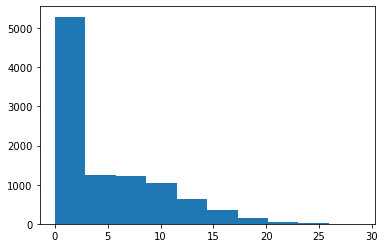

In [38]:
list_loss = np.sort(list_loss)[::-1]
plt.hist(list_loss)